# Appendix XIII. 

## CNN binary classification on Trend or Flat
## Probability prediction 
### Convolutional Neural Network

## Forex EURUSD 

### Tick Data With Dukastcopy
### Data for 2020 year


#### We use ONE-DIMENSIONAL convolutional Neural network
#### (Choosing the best version of training - a variable number of epochs - ModelCheckpoint Callback)

##### Normalisation of volumes - based on a maximum of 10 lots (the main number of lots). The interval (from 10 to 5000 lots) are equated to 10 lots (those to 1 after normalisation)
##### We normalise the intervals between ticks - based on a maximum of 20,000 milliseconds (20 seconds) (the main number of intervals). The interval (from 20,000) are equated to 20,000 milliseconds (those to 1 after normalization)
##### Broken into pieces of 200 ticks

#### The GOAL: Prediction of the Vector of Probabilities
#### We use a csv file with Dukastcopy and Keras which ALREADY normalised

In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

import numpy as np                  
import pandas as pd  

import random

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
print(tf.__version__)

2.10.0-dev20220604


In [3]:
# Progress bar
from tqdm import tqdm

In [ ]:
# COLABORATE
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

In [4]:
# Set seed to repeat results for random number generator
# tk we use stachostic optimization methods
np.random.seed(42)

### Data 

In [ ]:
# COLABORATE
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import drive
drive.mount('/content/grive', force_remount=True)

In [ ]:
# COLABORATE
!ls

In [5]:
data = pd.read_csv('/Users/vital/Python_Code/_PhD_Code/Experiment-2/Results3/EURO_data_raw_common_norm_.csv')

print(data.head(n=5)) 
print(data[-5:]) 

       Ask      Bid  Vol_Bid_N  Vol_Ask_N  DateDelta1_N  Goal  Point  Point1
0  1.12160  1.12106      0.075    0.00937       0.00000     8      1       8
1  1.12160  1.12120      0.075    0.00937       0.21775     8      0       0
2  1.12160  1.12117      0.075    0.00937       0.06845     8      0       0
3  1.12161  1.12123      0.075    0.08400       0.03000     8      0       0
4  1.12161  1.12120      0.075    0.08400       0.00505     8      0       0
              Ask      Bid  Vol_Bid_N  Vol_Ask_N  DateDelta1_N  Goal  Point  \
16586025  1.12337  1.12333      0.506      0.075       0.00505     8      0   
16586026  1.12338  1.12333      0.394      0.157       0.00505     8      0   
16586027  1.12337  1.12333      0.394      0.075       0.32845     8      0   
16586028  1.12338  1.12333      0.394      0.202       0.22760     8      0   
16586029  1.12338  1.12334      0.037      0.150       0.19405     8      0   

          Point1  
16586025       0  
16586026       0  
165860

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float64
 1   Bid           float64
 2   Vol_Bid_N     float64
 3   Vol_Ask_N     float64
 4   DateDelta1_N  float64
 5   Goal          int64  
 6   Point         int64  
 7   Point1        int64  
dtypes: float64(5), int64(3)
memory usage: 1012.3 MB


In [7]:
# downsising

data['Ask']          =pd.to_numeric(data['Ask'],downcast='float')
data['Bid']          =pd.to_numeric(data['Bid'],downcast='float')
data['Vol_Bid_N']    =pd.to_numeric(data['Vol_Bid_N'],downcast='float')
data['Vol_Ask_N']    =pd.to_numeric(data['Vol_Ask_N'],downcast='float')
data['DateDelta1_N'] =pd.to_numeric(data['DateDelta1_N'],downcast='float')

data['Goal']         = pd.to_numeric(data['Goal'],downcast='integer')
data['Point']        = pd.to_numeric(data['Point'],downcast='integer')
data['Point1']       = pd.to_numeric(data['Point1'],downcast='integer')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float32
 1   Bid           float32
 2   Vol_Bid_N     float32
 3   Vol_Ask_N     float32
 4   DateDelta1_N  float32
 5   Goal          int8   
 6   Point         int8   
 7   Point1        int8   
dtypes: float32(5), int8(3)
memory usage: 363.8 MB


In [8]:
data['Point'].value_counts()

0    16533604
1       52426
Name: Point, dtype: int64

In [9]:
number1 = data['Point'].value_counts()
number1 

0    16533604
1       52426
Name: Point, dtype: int64

In [10]:
number1.iloc[1]

52426

In [11]:
# n_small - size of the numpy 
n_small = number1.iloc[1]
n_small

52426

In [12]:
type(n_small)

numpy.int64

In [13]:
n_small = np.int32(n_small)

In [14]:
type(n_small)

numpy.int32

In [15]:
data.shape[0] 

16586030

In [16]:
type(data.shape[0])

int

In [17]:
n_small

52426

In [18]:
data.head()

,Ask,Bid,Vol_Bid_N,Vol_Ask_N,DateDelta1_N,Goal,Point,Point1
0,1.12160,1.12106,0.075,0.00937,0.00000,8,1,8
1,1.12160,1.12120,0.075,0.00937,0.21775,8,0,0
2,1.12160,1.12117,0.075,0.00937,0.06845,8,0,0
3,1.12161,1.12123,0.075,0.08400,0.03000,8,0,0
4,1.12161,1.12120,0.075,0.08400,0.00505,8,0,0


In [ ]:
# The index of the first enter should be up than 200


data['Point'].loc[0]  = 0
data['Point1'].loc[0] = 0

data.head()

In [20]:
# cheking data

data['Point'].value_counts()

0    16533605
1       52425
Name: Point, dtype: int64

In [21]:
# checking the first enter

for i in tqdm(range(0,data.shape[0])):
    if (data['Point'].iloc[i] == 1):
        print(i)
     #   print(data['Point'].index[i])
        break
    continue


  0%|          | 76/16586030 [00:00<07:15, 38098.14it/s]

76


In [22]:
# Delete all indexes which are less than 200

for i in tqdm(range(0,data.shape[0])):
    if (i > 200):
        break
    else: 
        if (data['Point'].iloc[i] == 1):
            print(i)
         #   print(data['Point'].index[i])
    continue

  0%|          | 201/16586030 [00:00<02:48, 98430.25it/s]

76
108
109


In [23]:
print(data['Point1'].iloc[76], '\n')
print(data['Point1'].iloc[108], '\n')
print(data['Point1'].iloc[109])

10 

5 

11


In [ ]:
data['Point'].loc[76]  = 0
data['Point1'].loc[76] = 0

data['Point'].loc[108]  = 0
data['Point1'].loc[108] = 0

data['Point'].loc[109]  = 0
data['Point1'].loc[109] = 0

In [25]:
# double check

for i in tqdm(range(0,data.shape[0])):
    if (data['Point'].iloc[i] == 1):
        print(i)
        break
    continue


  0%|          | 222/16586030 [00:00<02:56, 93883.39it/s]

222


In [26]:
number1 = data['Point'].value_counts()
number1 

0    16533608
1       52422
Name: Point, dtype: int64

In [27]:
n_small = number1.iloc[1]
n_small = np.int32(n_small)
n_small

52422

### Create numpy 

In [28]:
# Delete 'Goal' column
columns1 = ['Goal']
data_for_array = data.drop(columns1, inplace=False, axis=1)

data_for_array.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float32
 1   Bid           float32
 2   Vol_Bid_N     float32
 3   Vol_Ask_N     float32
 4   DateDelta1_N  float32
 5   Point         int8   
 6   Point1        int8   
dtypes: float32(5), int8(2)
memory usage: 348.0 MB


In [30]:
# create a three-dimensional data tensor: [n_small, N, 5] and
# one-dimensional array(vector) of answers [n_small, 1] with a value of the Probability vector for these planes,
# where N is the number of ticks for analysis at each step (those are looking backward)

In [29]:
n = data_for_array.shape[0]    
p = data_for_array.shape[1] 


data_a = np.array(data_for_array[:]) 

print("data_a:")
print(data_a[:4])  
print('\n')
print(data_a[-4:]) 

print('\n', "Row number for training:  n = ", n, '\n',
      "Column number:                  p = ", p)
print(" numpy type:              ", type(data_a), '\n',
      
      "numpy size:              ", data_a.shape)
print('Example: data_a[1,0] = ', data_a[1,0])

data_a:
[[1.1216  1.12106 0.075   0.00937 0.      0.      0.     ]
 [1.1216  1.1212  0.075   0.00937 0.21775 0.      0.     ]
 [1.1216  1.12117 0.075   0.00937 0.06845 0.      0.     ]
 [1.12161 1.12123 0.075   0.084   0.03    0.      0.     ]]


[[1.12338    1.12333    0.394      0.157      0.00505    0.
  0.        ]
 [1.12337    1.12333    0.394      0.075      0.32845    0.
  0.        ]
 [1.12338    1.12333    0.394      0.20199999 0.2276     0.
  0.        ]
 [1.12338    1.12334    0.037      0.15       0.19405    0.
  0.        ]]

 Row number for training:  n =  16586030 
 Column number:                  p =  7
 numpy type:               <class 'numpy.ndarray'> 
 numpy size:               (16586030, 7)
Example: data_a[1,0] =  1.1216


#### we form the output matrix Y with the value of Probability vector
#### and imputs matrix data_b

In [30]:
N = 200   # N - the depth of analysis at each step of the training (how many ticks we look back) - about 10 minutes

# numpy size (L, N, 5)
L = n_small
print('Size of a three-dimensional data array for training: ', L, N, 5)

Size of a three-dimensional data array for training:  52422 200 5


In [31]:
data_b = np.zeros( (L, N, 5), dtype= 'float32' ) 

print('data_b:', '\n', data_b)
print('data_b shape:', '\n', data_b.shape)

# create a one-dimensional vector of answers - Probability vector
Y = np.zeros((L, 1), dtype= 'float32') # We predict valure of Probability vector
                                      
print('Y:', '\n', Y)
print('Y shape:', '\n', Y.shape)


data_b: 
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
data_b shape: 
 (52422, 200, 5)
Y: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Y shape: 
 (52422, 1)


In [32]:
print('n = ', n, '\n')
print('n_small = ', n_small, '\n')
print('N = ', N, '\n')
print('L = ', L, '\n')

n =  16586030 

n_small =  52422 

N =  200 

L =  52422 



In [33]:
# fill the array for training data_b and 
# the array of answers Y from the data_for_array

q=0 

for k in tqdm(range(n)):
    if data_a[k,5] == 1:   
                         
        data_b[q, :, :] = data_a[k-N+1:k+1, 0:5]
        
        Y[q,0] = data_a[k,6]   # value of the Probability vector 
        q = q +1
    else:
        continue

print(k) # end index value (for checking)

print('Счетчик плоскостей q= ', q, '\n')
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:,:])

print(      "Numpy size:         ", Y.shape)

100%|██████████| 16586030/16586030 [00:29<00:00, 555968.60it/s]

16586029
Счетчик плоскостей q=  52422 

data_b: 
 [[[1.12172    1.12125    0.15       0.056      0.15005   ]
  [1.12172    1.12134    0.075      0.056      0.2372    ]
  [1.12172    1.12135    0.075      0.056      0.00505   ]
  ...
  [1.12154    1.12151    0.075      0.075      1.        ]
  [1.12169    1.12151    0.075      0.075      0.2472    ]
  [1.12154    1.12151    0.075      0.075      0.0026    ]]

 [[1.12212    1.1221     0.075      0.15       0.0025    ]
  [1.12212    1.12211    0.075      0.15       0.01015   ]
  [1.12213    1.12211    0.075      0.15       0.0067    ]
  ...
  [1.12205    1.12199    0.075      0.075      0.00255   ]
  [1.12201    1.12198    0.075      0.075      0.4355    ]
  [1.12199    1.12197    0.082      0.075      0.0025    ]]

 [[1.12206    1.12203    0.382      0.075      0.0026    ]
  [1.12208    1.12203    0.30699998 0.375      0.00255   ]
  [1.12207    1.12203    0.232      0.262      0.1249    ]
  ...
  [1.12208    1.12206    0.075      0.15   

In [36]:
# double check

In [34]:
np.set_printoptions(suppress=True) 
data_a[16580890,:]        

array([1.12373, 1.12372, 0.075  , 0.082  , 0.16545, 1.     , 9.     ],
      dtype=float32)

In [35]:
data_b[n_small-1,N-1,:]

array([1.12373, 1.12372, 0.075  , 0.082  , 0.16545], dtype=float32)

In [37]:
# The upper two raws Should be the same

In [40]:
# index array
for i in tqdm(range(n)):
    if (data['Point'].iloc[i] == 1):
        print(i)
        continue

    continue


  0%|          | 9058/16586030 [00:00<03:04, 90016.93it/s]

222
2078
4469
6894
7652
10755
11953
15000
15521
15523


  0%|          | 28632/16586030 [00:00<02:55, 94091.36it/s]

17545
17546
19790
20327
22460
22562
22563
24546
24630
25730
26862
26863
27467
29306
30000
30245
31312
31313
32336
34087
35368
36115
36137


  0%|          | 49828/16586030 [00:00<02:46, 99203.68it/s]

38162
38421
40331
40509
42596
42927
44689
44850
44851
44852
44853
44856
44857
44881
44883
45000
45282
45283
45284
45285
45315
45317
45398
46717
47568
48749
49827
51238
51956
53758
54016
55134
55135
55136
55137
55370
55372
55374
55375
55376
55377
55514
55785
56252
57192
57802
58254


  0%|          | 81766/16586030 [00:00<02:39, 103358.25it/s]

59727
59876
59879
59880
59881
59882
59883
60000
60833
60848
61013
61015
61017
61019
61304
61434
61435
61630
61631
61632
61634
63565
63609
63729
63731
63733
63734
64054
65595
65726
69453
69641
71813
72008
74032
74496
75000
76567
77421
79818
79819


  1%|          | 102081/16586030 [00:01<02:44, 100032.60it/s]

82722
83120
84726
86930
88132
90000
92810
96007
96028
98412
98673
98674
98675
98676
98677
98742
98744
98781
98782
98951
99109
99110
99111
99112
99113
99115
99435
99554
99581
99582
100651
101273


  1%|          | 122904/16586030 [00:01<02:41, 102017.19it/s]

102716
103695
105000
105379
105698
107626
108547
109352
109354
109356
110821
110822
110876
110877
110878
113043
113404
113405
113521
113719
113720
113866
113926
116334
116336
118425
118830
120000
120844
121304
121503
121703
122967
123575
125012
125235
125236
125238
125239
125240
125241
125242
125346
125347
125348
125349
125350
125351
125352
125942
127904
129353
129354
131486
131487


  1%|          | 155358/16586030 [00:01<02:34, 106125.21it/s]

132926
133737
134206
135000
135682
135683
135733
135735
135737
135738
135739
136508
136509
136915
138958
139085
139904
140961
141053
141071
141095
143383
143974
145678
146693
147567
147722
147723
147732
148058
148059
148060
148062
148834
149972
150000
151220
152015
153352
153356
153357
154029
154108


  1%|          | 187395/16586030 [00:01<02:35, 105407.50it/s]

156029
157024
158823
158824
158825
158826
158827
159103
159104
161228
161231
161714
163250
163331
165000
165875
167134
168495
168529
169142
170744
171417
173251
173912
178948
179700
180000
180866
181706
181707
185158
185756


  1%|▏         | 229355/16586030 [00:02<02:37, 103940.89it/s]

188014
188320
190162
190163
190435
190474
190475
190476
192658
195000
195253
195254
196231
196232
196233
196234
196236
196237
196771
196773
196804
196805
196819
196820
196821
197504
200100
200102
200103
200104
200105
200757
200758
200759
201216
201217
201220
201488
201676
205033
205238
207827
207842
210000
210281
210322
211882
212628
213035
214850
215406
217444
217446
217653
217654
219156
219158
219159
219160
219161
219162
219163
219755
219756
220582
221831
223294
224120
224491
225000
226168
227010
228691
229055


  2%|▏         | 250036/16586030 [00:02<02:42, 100780.78it/s]

231135
231136
233266
234990
235731
235732
237530
237531
240000
240238
241032
244465
245318
245546
245878
246546
249546
249549
255000
256130
256131
258291


  2%|▏         | 280724/16586030 [00:02<02:41, 101202.49it/s]

259202
260360
261292
261561
262418
263973
264533
266331
267262
267347
269427
270000
270035
272327
273046
275218
277266
278098
279452
279453
279454
279455
279628
279699
280258
280600
280625


  2%|▏         | 301574/16586030 [00:02<02:39, 102287.64it/s]

282755
284336
285000
286356
286375
289868
289869
289870
290179
290181
292608
292619
294624
294626
296769
296949
298507
298509
298510
298511
298512
298854
298856
298857
298858
298859
298951
299115
299116
299118
299119
299120
299523
300000
301032
302198
302199
302200
302258
303321
303323
303324
303326
303327
303351
303392
303393
303395
304226
304435
305426
306257


  2%|▏         | 333041/16586030 [00:03<02:38, 102337.54it/s]

307629
308281
309505
309695
310466
311895
313674
314078
315000
315868
316210
317494
317495
318045
318058
319447
320282
321734
323676
324460
324500
326289
326693
329652
329796
329797
329927
330000
331942
331943
332297
332298
332628
332629
332686
332687
335287
335717
335719
337980
337981
339105
339106
339457
339460
340203
340368


  2%|▏         | 354253/16586030 [00:03<02:37, 103307.92it/s]

342034
343753
345000
346318
347804
348815
349985
350846
353472
355589
355590
360000
360673
360674
361011
361012


  2%|▏         | 386538/16586030 [00:03<02:33, 105841.22it/s]

364231
365819
367331
368386
368591
369469
370728
371334
371996
373511
373724
373725
373726
374353
375000
375276
375282
375521
376370
377621
378774
380045
381288
382705
383331
383491
384777


  2%|▏         | 408280/16586030 [00:03<02:31, 106753.51it/s]

386690
387032
388690
388924
388925
388926
388927
389502
390000
390910
393179
394445
395117
395788
397392
398532
399537
401175
401195
401560
403212
403949
405000
405228
406176
406515
407380
409538
409539
411856
411902
414138
414570
415042
416610
416940


  3%|▎         | 440332/16586030 [00:04<02:32, 105735.08it/s]

418018
418377
418387
418389
418390
418391
418392
418393
418394
418395
418680
419115
420001
420684
421160
422705
423597
425100
426328
427480
428500
429436
429687
430682
431713
432168
432831
433921
434015
435001
435437
436387
439089
439093


  3%|▎         | 472414/16586030 [00:04<02:33, 105196.17it/s]

441980
443227
445577
445579
445595
445884
446126
448574
448577
450001
452296
454181
455144
460083
460515
462556
462962
465001
465362
466645
467667
468786
470051
471829
472071


  3%|▎         | 493424/16586030 [00:04<02:37, 102470.43it/s]

473940
473941
473942
474158
474183
474490
476552
476692
479069
479070
480001
480596
481933
481934
485828
486486
486952
488444
489015
490903
491379
493466
493569
494031
495001
495879
496211
496582
497020
497021
497022
498771
499353


  3%|▎         | 514571/16586030 [00:04<02:35, 103594.02it/s]

503665
503668
503675
505627
505684
505687
506166
507705
508856
510001
510293
510928
511284
513898
513899
514845
516390
516391
519350


  3%|▎         | 545810/16586030 [00:05<02:35, 103447.94it/s]

523424
524343
524357
524364
525001
526922
529123
529325
533022
535431
535432
538570
539106
540001
540096
540097
540098
540755
541000
541182
543000
543354
545026
545426


  3%|▎         | 566843/16586030 [00:05<02:33, 104067.53it/s]

546909
549722
550695
551857
551869
555001
555929
557277
558343
558494
559314
560429
560537
560726
561315
561351
561352
561354
561355
561356
561488
561490
562416
562743
563631
563828
564673
565938
566016


  4%|▎         | 598370/16586030 [00:05<02:33, 104093.69it/s]

568432
568436
569482
569484
569486
569487
569488
569489
569662
569664
569666
569667
569668
569669
569670
569900
570001
570605
570744
572690
572969
573465
573881
574739
575375
575379
575445
576388
576389
576390
576391
576395
576396
576397
576471
576472
576473
577113
577537
578317
578318
578319
578379
579166
579762
581254
581773
584281
584440
585001
585640
586829
587156
589129
589574
593689
593690
595781
596247
596557
596619
596625
596626
596627


  4%|▎         | 618940/16586030 [00:06<02:43, 97507.85it/s] 

600001
601419
602022
605018
605019
605162
607269
608103
609693
610890
612828
613124
614584
614766
614767
614768
614769
614916
614919
614920
614921
614954
615001
615794
615904
616996
617964


  4%|▍         | 639921/16586030 [00:06<02:38, 100883.78it/s]

619162
621787
621788
622047
624909
625053
627293
627642
629304
629721
630001
631732
632394
633912
634973
636504
637110
638593
639710
639711
639761
642916
642920
645001
645840
646310
647321
647438
647974
648555


  4%|▍         | 670505/16586030 [00:06<02:37, 101044.57it/s]

650584
652732
653530
654802
656852
656853
657438
657519
658858
658859
660001
661962
662655
664598
666075
667052
668932


  4%|▍         | 691780/16586030 [00:06<02:33, 103447.48it/s]

671388
672492
673605
674533
675001
676943
676944
679067
679317
681299
681465
683586
683861
683862
683863
684465
685704
686525
689686
690001
690383
692397
693841
694529


  4%|▍         | 712905/16586030 [00:06<02:32, 104286.53it/s]

695913
696572
697544
697991
698890
700067
700914
700944
702127
702944
704220
705001
705623
706572
706605
707864
707865
707866
707879
708329
710722
711576
713406
713690
715463
715464
715520
715690
716576
717918
717931
717936
720001
720534
721139


  4%|▍         | 745488/16586030 [00:07<02:28, 106527.92it/s]

722622
724274
726918
731367
731369
731796
735001
741484
744381
745157


  5%|▍         | 767102/16586030 [00:07<02:29, 106130.93it/s]

745616
747274
748291
749362
750001
750898
751542
753397
756273
756965
756966
756993
758635
758738
759201
761136
761541
765001
765349
765350
767506
767536
768280
768282
768471
768472
768473
768862
768871
768872
768873
768874
769592


  5%|▍         | 788701/16586030 [00:07<02:28, 106584.63it/s]

771017
771717
773223
775046
775272
775273
777565
778027
779436
780001
780027
780382
782272
782544
784436
784783
784786
786841
786842
788961
788965
790984
791161
791982
793161
794714
795001
795404


  5%|▍         | 810474/16586030 [00:07<02:26, 107406.48it/s]

797065
798753
799066
800802
801411
810001
810588
810589
813001
814105
815222
817463
817464
817465
820763

  5%|▌         | 842389/16586030 [00:08<02:30, 104856.00it/s]


822071
822513
822614
822848
825001
825011
825012
827038
827039
830144
830907
831408
831778
831780
831781
831782
832202
832203
833963
834265
836742
836824
837128
837176
838990
839128
840001
841401
841719
841795


  5%|▌         | 863575/16586030 [00:08<02:30, 104652.91it/s]

843749
844465
844467
844497
844991
846244
846486
846487
846686
848015
849096
849151
851548
851933
853948
854019
855001
855338
856054
856111
856210
858555
858809
860739
862323
864878
865109
870001
870195
870196
870261
870263


  5%|▌         | 895539/16586030 [00:08<02:29, 105035.92it/s]

878836
881849
881850
884442
884443
885001
886479
887398
889151
889152
890753
890811
890920
890924
890925
890926
890927
891773
891774
891785
892933
895237
895596
895597
896602
897213
897425
897833
897834


  6%|▌         | 917203/16586030 [00:08<02:27, 106510.07it/s]

899887
900001
900756
902675
903403
904966
906485
906763
907049
909615
909616
911770
911771
913774
914323
915001
916154
916316
916430
918348
918835


  6%|▌         | 950511/16586030 [00:09<02:23, 109220.04it/s]

921375
921376
921735
922047
924167
924949
926214
927003
929327
930001
931426
932475
934773
937892
937900
937934
940906
944000
945001
949025
949383


  6%|▌         | 972226/16586030 [00:09<02:25, 107218.78it/s]

951532
951737
953585
953586
953587
953588
953589
954114
954119
954330
957856
958281
960001
960159
961006
961009
962424
963242
964823
967050
968948
970597
971324
973630
974935
975001
976148


  6%|▌         | 993662/16586030 [00:09<02:29, 104292.49it/s]

979396
979429
979434
979479
981908
981927
983220
984764
986086
990001
996362
998469
998665
1000644
1001019


  6%|▌         | 1025841/16586030 [00:09<02:26, 106074.45it/s]

1003328
1003337
1005001
1005682
1005683
1008091
1008658
1010835
1010901
1010902
1010903
1010904
1012356
1012656
1012657
1012752
1012753
1012754
1012759
1012760
1012780
1012781
1012783
1012887
1014666
1015098
1017339
1017947
1019360
1020001
1020198
1022305
1022727
1023646
1024897
1024961


  6%|▋         | 1058488/16586030 [00:10<02:24, 107454.69it/s]

1027654
1027655
1027656
1027657
1028758
1028806
1029067
1031760
1031856
1034425
1034579
1035001
1036134
1036517
1036520
1038465
1038599
1041284
1041522
1044037
1044042
1050001
1050051
1050052
1051318
1053032
1054162
1054181
1054192
1055054
1057221


  7%|▋         | 1080070/16586030 [00:10<02:24, 107279.47it/s]

1059112
1065001
1065872
1066030
1066937
1069379
1069382
1072485
1072486
1074944
1075279
1076358
1077874
1077921
1080001
1080327
1081615
1082315
1085336


  7%|▋         | 1101537/16586030 [00:10<02:25, 106247.15it/s]

1088474
1088685
1090119
1090964
1093730
1095001
1096918
1097131
1097562
1097563
1097584
1097585
1097586
1097587
1097588
1097589
1097590
1097707
1097708
1097710
1099144
1099207
1100539
1100725
1101682
1102401
1103170
1104456
1104669
1104671
1104672
1104673
1104674
1108247
1108248


  7%|▋         | 1123283/16586030 [00:10<02:24, 107017.32it/s]

1110001
1110051
1110619
1110621
1112663
1113481
1115551
1116019
1118524
1122312
1123313
1123329
1123938
1125001
1125961
1126262
1127548
1128361
1128585


  7%|▋         | 1155388/16586030 [00:11<02:25, 106001.43it/s]

1135041
1139114
1139116
1140001
1140002
1141578
1141813
1143631
1144259
1146438
1146440
1148202
1148203
1149034
1149477
1151668
1153246
1154438
1155001
1156754
1158491
1158857
1159380
1159381
1159382
1159383
1159385
1159386
1159482
1159483
1161156
1161269
1162414
1162865
1162868
1162869
1162870
1162871
1162872
1162889
1162890
1162891
1162892
1162893
1162894
1162895
1162896
1162897
1162898
1162993
1163204
1163270
1163990
1164124
1164126
1164127
1164128
1164129
1164130
1164131

  7%|▋         | 1186745/16586030 [00:11<02:29, 102937.70it/s]


1164132
1164142
1164163
1164164
1164172
1164173
1164174
1164177
1164307
1164594
1164595
1164596
1165233
1165278
1167308
1167338
1169378
1169381
1169400
1169401
1169402
1169403
1169404
1169405
1169406
1169407
1170001
1170079
1170472
1171413
1171447
1171695
1171696
1171697
1171710
1171711
1171712
1171713
1171714
1171715
1171807
1171809
1171811
1171812
1171839
1171840
1171841
1171842
1173419
1173750
1173942
1175491
1175888
1176624
1177556
1178304
1179068
1179605
1180581
1180966
1180968
1180969
1180971
1180973
1180974
1181080
1181081
1181082
1181084
1182247
1182961
1183080
1183081
1183083
1183154
1183155
1183156
1183158
1183159
1183160
1183161
1183299
1183300
1183710
1184524
1184991
1185001
1187051
1187126
1189261
1189398
1190032
1190734
1191286
1191476
1193524
1194273


  7%|▋         | 1207720/16586030 [00:11<02:28, 103425.67it/s]

1196045
1196047
1196410
1197001
1198683
1199902
1200001
1202197
1202198
1206064
1206395
1206397
1206814
1209523
1209527
1215001


  7%|▋         | 1239079/16586030 [00:11<02:29, 102634.80it/s]

1216130
1216131
1218826
1219437
1219441
1221511
1221614
1223245
1223526
1223666
1223941
1223942
1223943
1223945
1223947
1223948
1225162
1226158
1226159
1228307
1228489
1229787
1229791
1229964
1230001
1230014
1230015
1230016
1230017
1230018
1230019
1230020
1230173
1230504
1230862
1231887
1232505
1232590
1233903
1234620
1236553
1237378
1238045
1238981


  8%|▊         | 1260063/16586030 [00:12<02:27, 103557.09it/s]

1241296
1241297
1243701
1243702
1243732
1245001
1248589
1249272
1249946
1252084
1252085
1254460
1254603
1255615
1256808
1258161
1258829
1260001
1260285
1261314
1262474
1263341
1264064
1264065
1264706


  8%|▊         | 1303919/16586030 [00:12<02:21, 107906.49it/s]

1272407
1272408
1272750
1275001
1275158
1275159
1275725
1277232
1278884
1279379
1280884
1281579
1283613
1286096
1287484
1288777
1290001
1295509
1296010
1298225
1298226
1300712
1301050
1301051
1302954
1303051


  8%|▊         | 1336527/16586030 [00:12<02:22, 107363.46it/s]

1305001
1305098
1305195
1307565
1307877
1309290
1309583
1309889
1312746
1312747
1314859
1316593
1317545
1318661
1319716
1320001
1322178
1322382
1325757
1325758
1328566
1328971
1329557
1330942
1333047
1333048
1334902
1335001
1335172
1335342


  8%|▊         | 1368322/16586030 [00:13<02:32, 99886.96it/s] 

1338104
1338105
1341861
1341863
1344501
1344589
1349951
1350001
1352290
1354609
1354610
1355446
1357249
1365001
1366217
1366220


  8%|▊         | 1388650/16586030 [00:13<02:31, 100315.98it/s]

1368561
1369224
1370686
1372286
1372990
1375580
1376647
1379704
1380001
1381133
1381683
1381945
1384374
1384810
1384813
1386595
1387516
1389572
1389573
1393450
1393454
1395001
1395684
1396291


  8%|▊         | 1409110/16586030 [00:13<02:29, 101259.17it/s]

1398764
1400958
1400959
1403031
1403276
1406474
1406621
1408545
1408825
1410001
1412543
1413155
1414832


  9%|▊         | 1440630/16586030 [00:13<02:25, 103932.27it/s]

1419580
1419750
1421827
1421947
1424554
1424559
1425001
1433529
1434035
1434727
1436654
1437438
1438966
1440001
1440676
1441311
1441807


  9%|▉         | 1472509/16586030 [00:14<02:23, 105296.86it/s]

1444361
1444363
1446608
1447334
1452394
1452399
1455001
1456410
1456411
1458761
1458762
1460379
1460964
1460966
1463685
1463686
1464715
1465947
1466070
1468152
1468971
1468972
1468973
1469800
1470001


  9%|▉         | 1494590/16586030 [00:14<02:20, 107249.70it/s]

1472524
1472649
1475008
1476889
1477041
1477313
1477314
1477315
1477404
1477405
1478892
1479241
1479386
1480965
1481220
1481970
1483246
1484039
1485001
1485108
1485876
1486048
1488287
1488291
1490616
1490661
1492785
1496469
1496623
1499401
1499402
1500001
1500202
1501645
1502800
1504072

  9%|▉         | 1527026/16586030 [00:14<02:22, 105721.37it/s]


1505700
1507479
1507885
1510503
1510504
1513867
1513868
1515001
1517027
1517029
1521135
1522049
1523160
1525098
1525175
1525426


  9%|▉         | 1558982/16586030 [00:14<02:22, 105622.00it/s]

1527827
1529022
1530001
1530459
1530807
1531644
1533781
1533865
1535881
1539407
1539458
1542351
1542652
1544460
1544877
1545001
1546946
1546947
1549220
1549641
1552300
1552301
1554204
1555511
1557156
1558278
1558281


 10%|▉         | 1591019/16586030 [00:15<02:21, 105876.07it/s]

1559484
1560001
1560258
1560481
1560891
1562065
1562997
1566969
1566970
1570373
1572370
1572924
1573374
1575001
1575956
1577455
1579202
1580044
1581880
1582122
1583989
1585791
1586418
1588497
1590001
1590220
1590221
1590222
1590301
1590364
1590365
1590366
1590367
1590401
1590403
1590405
1590799


 10%|▉         | 1612165/16586030 [00:15<02:22, 105310.24it/s]

1592849
1592925
1593507
1593508
1594547
1594549
1594550
1594551
1594552
1594553
1594856
1595257
1595258
1595259
1595262
1595263
1597690
1597813
1600431
1602134
1603682
1604145
1604174
1604175
1605001
1606088
1607334
1607355
1608858
1609550
1610901
1611642


 10%|▉         | 1623126/16586030 [00:15<02:20, 106325.69it/s]

1612722
1612725
1612727
1613525
1613526
1613527
1613528
1613529
1613914
1613915
1614228
1615625
1615729
1616412
1618361
1618497
1620001
1620395
1620629
1622868
1624280
1625497
1626958
1626981
1627610
1627974
1629376
1631125
1632204


 10%|█         | 1666019/16586030 [00:15<02:20, 106091.47it/s]

1634313
1635001
1635598
1637734
1637735
1637736
1637761
1639759
1639762
1644813
1645113
1647491
1647513
1650001
1650407
1652293
1653376
1653609
1653633
1656059
1656311
1658354
1659277
1660764
1661099
1661300
1662394
1663292
1664651
1664828
1665001


 10%|█         | 1698298/16586030 [00:16<02:19, 106714.39it/s]

1666393
1667871
1668401
1670549
1670828
1672834
1672835
1674842
1674843
1677860
1678513
1680001
1680191
1680832
1681087
1681721
1682972
1682975
1683250
1684082
1685342
1685642
1685722
1685723
1685724
1685736
1685737
1685740
1685762
1685763
1685822
1685830
1685832
1685833
1685834
1685835
1685836
1685837
1686060
1686061
1686062
1686063
1686064
1686065
1687666
1687670
1688671
1690066
1690113
1692598
1692950
1692951
1693055
1694761
1695001
1696283
1697351


 10%|█         | 1731152/16586030 [00:16<02:18, 107122.61it/s]

1698622
1700238
1701281
1702896
1703303
1705695
1708313
1708317
1708331
1710001
1713607
1713608
1717354
1717355
1719430
1720899
1721469
1723675
1723677
1724158
1725001
1726075
1726814
1728559
1730672
1730673


 11%|█         | 1763999/16586030 [00:16<02:16, 108204.11it/s]

1732860
1733782
1735711
1737157
1739451
1739718
1740001
1742289
1742290
1744373
1744376
1745166
1745167
1747831
1750315
1750542
1751482
1753415
1753569
1755001
1755445
1755621
1757745
1757925
1758063
1760090
1760091
1762263
1762982


 11%|█         | 1785653/16586030 [00:17<02:17, 108016.31it/s]

1765328
1765329
1767878
1767879
1767918
1770001
1770601
1773207
1778958
1778959
1780431
1781124
1781125
1783859
1784154
1785001
1785962
1785995
1785996
1785997
1785998
1785999
1786469
1788008
1788011
1788519
1788520
1788521
1790154
1790156
1790157
1790158
1790159
1790160
1790163
1790191
1790195
1792424
1792519


 11%|█         | 1818445/16586030 [00:17<02:19, 106199.57it/s]

1795484
1796097
1796455
1798217
1798220
1798761
1800001
1800888
1800889
1800890
1800891
1801296
1803445
1804987
1804988
1805004
1805488
1806565
1807611
1807612
1809656
1810222
1812066
1812436
1814788
1814974
1815001
1815180
1817530
1817531
1818213


 11%|█         | 1851885/16586030 [00:17<02:15, 108392.85it/s]

1819640
1820267
1820760
1822020
1822666
1824199
1828181
1828185
1828721
1830001
1831828
1831830
1834407
1838773
1840757
1840910
1843292
1843717
1843852
1843929
1845001
1845619
1845785
1848298
1848678
1850497
1851035


 11%|█▏        | 1873564/16586030 [00:17<02:18, 106382.59it/s]

1852809
1853721
1856753
1859349
1860001
1860312
1861504
1862253
1862255
1863051
1864825
1864826
1864827
1864829
1864830
1864831
1865046
1865236
1865237
1865238
1865239
1865241
1865242
1865243
1865261
1865262
1865263
1865264
1865265
1865266
1865267
1865268
1865269
1865270
1865271
1865384
1866521
1866523
1866524
1866525
1866526
1867725
1867727
1867781
1870198
1870217
1871122
1871447
1872278
1872279
1874305
1874658
1875001
1875263
1877132
1877407
1879745
1879746
1882756


 11%|█▏        | 1905965/16586030 [00:18<02:20, 104827.46it/s]

1883501
1883962
1890001
1898563
1900352
1900353
1900354
1900664
1901460
1901463
1903607
1903898
1905001
1905900


 12%|█▏        | 1927201/16586030 [00:18<02:19, 105197.34it/s]

1906017
1907306
1908435
1908550
1910585
1910677
1911808
1911811
1911813
1911814
1911815
1911816
1912663
1912664
1913081
1913082
1915097
1915364
1917160
1917161
1918165
1919719
1920001
1920110
1920356
1921783
1922985
1923888
1925331
1925525
1925889
1926354
1926355
1926356
1926357
1926359
1927494
1927908
1928569
1929046
1930520
1931480
1932714
1932893
1933509
1934491
1934839
1935001
1935816


 12%|█▏        | 1960021/16586030 [00:18<02:19, 105065.77it/s]

1936888
1937013
1937597
1937750
1937754
1937871
1938151
1938152
1938153
1938154
1938165
1938167
1938168
1938169
1938209
1938244
1938258
1938324
1939023
1939627
1940120
1940121
1940122
1940123
1940273
1941044
1942477
1944746
1945089
1946792
1947893
1950001
1951144
1951145
1951160
1951360
1951685
1957519
1960776
1962388
1962550
1962551
1964588
1965001
1965016
1967731
1967732


 12%|█▏        | 1992790/16586030 [00:19<02:16, 106620.11it/s]

1971227
1971429
1973235
1974116
1976650
1976651
1978955
1980001
1981360
1981753
1982885
1982958
1983207
1983317
1984030
1984044
1986090
1986379
1988334
1989376
1989377
1990062
1990421
1992002
1992004
1992006
1992007
1992009
1992307
1992309
1992777
1992778


 12%|█▏        | 2025692/16586030 [00:19<02:15, 107670.94it/s]

1992954
1992955
1994496
1995001
1995324
1995325
1997751
1997976
1999934
2002007
2002041
2004042
2004045
2006590
2006591
2010001
2014969
2016185
2017076
2018659
2019647
2021199
2021861
2023741
2025001


 12%|█▏        | 2058752/16586030 [00:19<02:13, 108438.60it/s]

2025960
2025962
2025963
2025965
2025966
2025967
2026545
2028305
2028852
2029599
2030254
2030641
2031716
2032704
2033883
2034331
2035206
2035207
2035208
2035209
2035210
2035211
2035212
2035213
2035290
2036362
2036506
2037477
2038390
2038391
2040001
2040015
2040203
2041335
2042440
2043336
2044089
2044859
2045448
2046994
2047535
2047973
2049296
2049575
2050345
2051351
2051708
2053378
2054256
2055001
2055544
2055548
2055934
2056304
2058426


 13%|█▎        | 2080899/16586030 [00:19<02:12, 109320.42it/s]

2060908
2061066
2061097
2063177
2063332
2063334
2063335
2063336
2063337
2063524
2063695
2063699
2063722
2065460
2065909
2067559
2067732
2067922
2069632
2070001
2071540
2071818
2072000
2073283
2073284
2073286
2073287
2073627
2074758
2076612
2076613
2076697
2076698
2076885
2076888
2079120
2081771
2082181
2083677
2084701
2085001
2085087


 13%|█▎        | 2102685/16586030 [00:20<02:14, 107720.92it/s]

2087523
2087524
2087525
2087526
2087527
2088146
2089476
2089477
2089486
2089855
2090359
2092089
2092365
2094184
2094532
2096343
2097244
2098541
2099715
2099875
2100001
2101684
2101685
2101686
2101687
2101689
2101690
2101700
2101701
2101901
2101902
2102013
2104854
2106027
2108329
2108354
2108366
2110516
2110574


 13%|█▎        | 2134317/16586030 [00:20<02:28, 97385.89it/s] 

2115001
2115158
2115455
2118141
2118413
2121355
2121357
2130001
2133545
2133614


 13%|█▎        | 2164411/16586030 [00:20<02:28, 97383.74it/s]

2136148
2136150
2138331
2139308
2141308
2141567
2142573
2145001
2145740
2147810
2148008
2149297
2150423
2151266
2151495
2152453
2153278
2154043
2155923
2155924
2158681
2158832
2159889
2160001
2160775
2161023
2161266
2162775
2163080
2164484
2165122
2165123
2166688
2167631
2167632
2168973
2168974
2168975
2169236
2169647
2169664
2171489
2171748
2171794
2171958


 13%|█▎        | 2183925/16586030 [00:20<02:29, 96384.45it/s]

2174404
2174405
2175001
2176641
2176644
2179017
2179018
2181162
2181279
2186306
2190001
2192620

 13%|█▎        | 2211856/16586030 [00:21<02:43, 87828.08it/s]


2192624
2192631
2192918
2196401
2196402
2196455
2198640
2201072
2205001
2209086
2209087


 13%|█▎        | 2231397/16586030 [00:21<02:35, 92338.50it/s]

2212773
2213053
2213254
2213584
2218927
2218929
2220001
2222561
2228351
2229892
2230963
2231010
2231930
2232974
2234192
2234193
2234194
2234195
2234198
2234265
2234266
2234267
2235001
2235980
2236532
2238081
2239309
2240118


 14%|█▎        | 2261938/16586030 [00:21<02:26, 97997.24it/s]

2242076
2242298
2243859
2244887
2245073
2246444
2246491
2247220
2247221
2249330
2249331
2250001
2251330
2251436
2254905
2255104
2258444
2258445
2260786
2260791
2262232
2262938


 14%|█▍        | 2291789/16586030 [00:22<02:30, 95007.37it/s]

2264243
2264957
2265001
2266252
2271075
2273306
2274697
2275642
2276891
2279678
2280001
2280717
2281884
2282916
2282917
2284937
2285737
2285738
2287662
2288107
2290283
2290519


 14%|█▍        | 2310860/16586030 [00:22<02:32, 93720.93it/s]

2292472
2293807
2295001
2295232
2298661
2298687
2299220
2300697
2300701
2303081
2303142
2304248
2305082
2305946
2306955
2308883
2309064
2310001
2311946
2311951


 14%|█▍        | 2329535/16586030 [00:22<02:35, 91864.06it/s]

2314869
2318471
2320414
2322022
2322659
2325001
2325108
2325162
2325659
2327481
2328471
2330607
2331348
2333467
2333470
2333650


 14%|█▍        | 2348180/16586030 [00:22<02:42, 87733.46it/s]

2335487
2335586
2336601
2336602
2336607
2337551
2337928
2339568
2340001
2341596
2341599
2342163
2342164
2342165
2342166
2342167
2344193
2344194
2345024
2345025
2345479
2345481
2346551
2347637
2348496
2348497
2348786
2349349
2349350
2349684
2349685
2349686
2349688
2349690
2349691
2349692
2349700
2349780
2350882
2351927


 14%|█▍        | 2375224/16586030 [00:23<02:41, 88107.94it/s]

2352887
2354206
2354239
2354240
2354241
2354891
2355001
2355848
2356342
2357010
2357698
2357700
2357701
2358325
2358327
2358328
2358329
2358330
2358331
2358332
2358608
2358609
2358620
2359122
2361594
2361856
2363757
2363972
2364130
2364131
2364132
2364133
2364134
2365533
2365535
2365537
2365564
2365565
2365879
2366171
2366411
2366710
2367978
2367979
2368397
2369531
2369532
2370001
2370065
2373112
2373131


 14%|█▍        | 2393797/16586030 [00:23<02:37, 90241.64it/s]

2375473
2375633
2375920
2376216
2377553
2378559
2382251
2383291
2385001
2385519
2385523
2386277
2388410
2388700
2391224
2393542
2393544
2395907
2396650
2397890
2397892
2397894
2397895
2397896
2398273
2398975
2399723
2400001
2400957
2401487
2402100


 15%|█▍        | 2413750/16586030 [00:23<02:29, 94605.14it/s]

2403961
2404114
2406571
2406609
2406610
2408676
2409171
2410973
2411276
2413508
2413591
2414445
2415001
2415031
2415703
2415704
2417733
2417734
2419750
2419824
2421894
2422150


 15%|█▍        | 2445082/16586030 [00:23<02:20, 100739.92it/s]

2424036
2424489
2425268
2425269
2425270
2427580
2427641
2429269
2429270
2429772
2430001
2430334
2431796
2432374
2434036
2434310
2434521
2436554
2436818
2438866
2439762
2439763
2439764
2439765
2440174
2440204
2440961
2441766
2443253
2444008
2445001


 15%|█▍        | 2465427/16586030 [00:23<02:21, 100074.54it/s]

2447217
2447218
2447663
2449384
2449538
2449582
2450087
2450469
2450470
2450471
2450472
2451538
2452177
2453683
2454246
2454603
2455997
2456405
2457998
2458013
2458057
2459479
2460001
2460278
2461688
2462922
2463987
2465456
2466364
2467314
2467777
2468178
2468182
2468183
2468477
2469995
2471126
2471640
2471641
2471642
2472295
2472296
2472874
2472875
2472876
2473400
2473676
2473678
2473679
2473680
2473796
2473797
2473798
2473799
2473800
2473802
2473803
2473804
2473886
2474308
2475001

 15%|█▍        | 2485438/16586030 [00:24<02:27, 95751.24it/s] 


2475406
2476776
2477021
2477309
2477310
2477311
2477312
2477313
2477410
2479028
2479437
2480882
2481120
2481561
2482033
2482035
2482036
2482037
2482199
2482200
2482244
2483143
2483889
2485224
2485605
2485606
2485613
2486336
2487056
2487057
2487288
2488365
2489353
2490001
2490622


 15%|█▌        | 2504646/16586030 [00:24<02:36, 90180.76it/s]

2491520
2491552
2493654
2493679
2497312
2498406
2500174
2500432
2503519
2503736
2503737
2505001
2505727
2506151
2507769
2507824
2510781

 15%|█▌        | 2522793/16586030 [00:24<02:40, 87473.14it/s]


2512949
2513455
2516319
2516338
2518620
2519897
2520001
2522684
2523203
2524390
2524391
2524392
2524393
2524394
2524413
2524414
2525038
2525074
2525075
2525076
2525077
2525078
2525079
2525229
2525392
2525393
2526116
2526117
2526118
2527082
2527083
2527085
2527086
2527087
2527088
2527276
2528529
2529169

 15%|█▌        | 2550313/16586030 [00:24<02:41, 86726.55it/s]


2529789
2530290
2532413
2532414
2534910
2534911
2535001
2536758
2537382
2537475
2539852
2540488
2541058
2541997
2542641
2544307
2544687
2546405
2546945
2547542
2548749
2549043
2549769
2550001


 16%|█▌        | 2581255/16586030 [00:25<02:25, 96011.13it/s]

2550786
2551235
2552442
2552444
2552445
2552499
2552830
2553285
2553984
2553985
2554052
2554053
2554055
2554056
2554057
2554903
2554905
2554906
2554917
2554918
2554919
2554920
2554921
2554922
2554924
2554925
2554929
2554931
2554932
2555162
2555164
2555180
2555181
2555296
2555337
2555338
2555339
2555340
2555454
2555459
2555460
2555461
2555462
2555507
2555508
2555523
2555570
2555571
2555608
2555716
2555776
2557202
2557307
2557902
2558280
2558282
2558283
2558284
2558334
2558335
2558342
2558357
2558358
2558359
2558360
2558410
2558411
2558412
2558413
2558414
2558415
2558416
2558417
2558443
2558444
2558445
2558446
2558466
2558467
2558468
2558469
2558470
2558471
2559202
2559669
2560718
2561348
2561934
2563432
2564061
2565001
2565324
2565884
2566397
2566613
2567893
2568547
2569916
2570572
2572019
2573334
2574718
2575351
2575355
2575424
2577464
2577465
2579821
2579824
2580001


 16%|█▌        | 2601922/16586030 [00:25<02:20, 99397.31it/s]

2581911
2582262
2582852
2584292
2584361
2586336
2586637
2588703
2588893
2591602
2591604
2591605
2591607
2591608
2591645
2593925
2595001
2596206
2596207
2596208
2596210
2596212
2596213
2597259
2598129
2600802
2601377
2603627
2603704
2604012
2604986
2604988
2604989
2604990
2604991
2604992
2604999
2605000
2605002
2605003
2605004
2605005
2605274
2605275
2605856
2605956
2606600
2606601
2606604
2608832


 16%|█▌        | 2621801/16586030 [00:25<02:23, 97478.05it/s]

2609725
2610001
2611142
2611772
2614506
2614529
2615054
2616542
2616668
2616760
2617621
2617663
2617664
2617665
2617788
2617789
2617790
2618775
2618777
2618779
2620956
2621667
2623040
2623050
2624170
2625001
2625139
2625383
2626311
2627441
2629244

 16%|█▌        | 2641141/16586030 [00:25<02:28, 94125.20it/s]


2629245
2629833
2631733
2632282
2634127
2634855
2635370
2636369
2637179
2639273
2639275
2640001
2641396
2641398
2643830
2643833
2644533
2644534
2645318
2646042
2646043
2647409
2647410
2647412
2647471
2648110

 16%|█▌        | 2660137/16586030 [00:26<02:28, 93855.95it/s]


2648175
2649954
2649956
2649958
2650110
2650157
2650158
2650159
2650160
2650161
2650162
2650509
2650617
2652858
2653019
2655001
2655015
2655195
2657024
2657424
2658917
2659184
2659443
2660600
2661405
2661550
2663412
2663699
2666167
2666265
2666266
2668190

 16%|█▌        | 2679489/16586030 [00:26<02:26, 95249.08it/s]


2668400
2670001
2670560
2670968
2673806
2673948
2673949
2673950
2674373
2674739
2674740
2674741
2674742
2674744
2674745
2675544
2675545
2676191
2676648
2678208
2678364
2678754
2680976
2681093
2683242
2683618
2683651
2685001
2685267
2685777


 16%|█▋        | 2698216/16586030 [00:26<02:36, 88831.91it/s]

2688577
2689366
2690660
2691728
2691729
2691730
2691731
2692295
2693073
2696745
2696856
2698492
2700001
2700183
2701127
2702307
2704019
2704693
2706157
2706971


 16%|█▋        | 2728175/16586030 [00:26<02:24, 95908.14it/s]

2709024
2709048
2710781
2711066
2711070
2713120
2713656
2715001
2715391
2715801
2717550
2718341
2719444
2720464
2720516
2720869
2720870
2720872
2720873
2721313
2721314
2721315
2721316
2721317
2721318
2721540
2721541
2721542
2722465
2722822
2722999
2724800
2725819
2728603
2728630
2728703
2730001


 17%|█▋        | 2748385/16586030 [00:26<02:20, 98337.18it/s]

2730796
2730872
2733249
2733433
2735968
2737487
2737488
2738035
2739942
2740481
2741177
2742614
2742801
2744813
2744958
2745001
2746862
2747117
2748864
2749267
2749351
2749381
2751278
2751291
2751292
2751329
2751338
2751341
2751342
2751359
2751360
2753780

 17%|█▋        | 2778525/16586030 [00:27<02:20, 98044.71it/s]


2753782
2754707
2754708
2754709
2754710
2754801
2754802
2754893
2754927
2755798
2755872
2757543
2757545
2757546
2757566
2757567
2758034
2758035
2759193
2760003
2760047
2760075
2760634
2760635
2760636
2760637
2760638
2760675
2760917
2760965
2760966
2760967
2760968
2762243
2762287
2763602
2764291
2764294
2766644
2766645
2767464
2768649
2768713
2768805
2768806
2768807
2768808
2768809
2768810
2768811
2768823
2768824
2768825
2769022
2769023
2769024
2770472
2770955
2771407
2772959
2774495
2775003
2775741
2778124


 17%|█▋        | 2798158/16586030 [00:27<02:20, 97984.48it/s]

2779120
2779435
2780490
2782054
2782531
2783048
2784429
2784948
2786989
2786990
2789502
2789503
2790003
2791582
2791583
2791821
2792791
2792792
2793427
2793592
2793829
2795649
2797940
2799249

 17%|█▋        | 2818731/16586030 [00:27<02:17, 100485.31it/s]


2801588
2801590
2803357
2804026
2804038
2805003
2809236
2809296
2812115
2812158
2812210
2814337
2814338
2817017
2818919
2820003
2820043
2820941
2821981
2821982
2821983
2822016
2822018
2822357
2822358
2822359
2822360
2822361
2822941


 17%|█▋        | 2839078/16586030 [00:27<02:17, 99905.22it/s] 

2825212
2825213
2826221
2826222
2827871
2828507
2830286
2830668
2832328
2832686
2834516
2835003
2835398
2835980
2836745
2838393
2838557
2838789
2840417
2840832
2841224
2842502
2843820
2844752
2844756
2844757
2844758
2844776
2844777
2844778
2844846
2844847
2845057
2845777
2846094
2846095
2846096
2846097
2846098
2846099
2846101
2846151
2846152
2846153
2846154
2846155
2846220
2846221
2846222
2846223
2846225
2846352
2846469
2846470
2846471


 17%|█▋        | 2859312/16586030 [00:28<02:22, 96613.22it/s] 

2847806
2847919
2847920
2847921
2847922
2847923
2847924
2847925
2847926
2847927
2847929
2847931
2848002
2848003
2848025
2848026
2848027
2848122
2848123
2848124
2848264
2848428
2848429
2848430
2848433
2848434
2848491
2848492
2848493
2848494
2848539
2848540
2848541
2848573
2848574
2848575
2848577
2848624
2848625
2848707
2848708
2848782
2848805
2848806
2848852
2848855
2848856
2848857
2850003
2850489
2851047
2851539
2851540
2851541
2851542
2851544
2851638
2852601
2852691
2852692
2852693
2852694
2852695
2852696
2852697
2852699
2852706
2852707
2852708
2852709
2852710
2852722
2852723
2852724
2852736
2852737
2852738
2852739
2852800
2852801
2852909
2853129
2855132
2855193
2857030
2857156
2857304
2859428
2859430
2861218
2861516
2861517
2863531
2863667
2864605
2865003
2866182

 17%|█▋        | 2879513/16586030 [00:28<02:20, 97636.37it/s]


2866306
2868514
2868515
2870582
2870583
2870764
2870765
2870766
2870768
2871312
2872731
2872987
2874877
2875088
2875753
2876818
2876976
2877614
2879206
2879207
2879209
2879210
2879211
2879213
2879325
2879326
2879329
2879407
2879582
2879583
2879857
2880003
2880119
2881869
2881870
2882133
2883933
2884231
2885966
2886405
2887110
2888181

 18%|█▊        | 2910055/16586030 [00:28<02:18, 98875.89it/s]


2888967
2890678
2890680
2890745
2892017
2892923
2894097
2894331
2894332
2894335
2894336
2895003
2896262
2896327
2899546
2899764
2899765
2899781
2903607
2905052
2906684
2906686
2907466
2907680
2907682
2907684
2907685
2907930
2908242
2908243
2908244
2908302
2908303
2908304
2908305
2908306
2908347
2908630
2909588
2910003


 18%|█▊        | 2930253/16586030 [00:28<02:21, 96724.72it/s]

2914541
2916364
2919008
2921606
2925003
2926934
2929662
2929663
2929665
2929666
2929667
2929669
2933493

 18%|█▊        | 2950383/16586030 [00:28<02:18, 98543.84it/s]


2934791
2934792
2934793
2934794
2934795
2934796
2935239
2935240
2935241
2935242
2936131
2936376
2936377
2936384
2936385
2936386
2936520
2936521
2936522
2936523
2936524
2940003
2945137


 18%|█▊        | 2970900/16586030 [00:29<02:15, 100329.63it/s]

2955003
2959211
2959667
2959668
2959669
2959893
2959898
2959899
2959959
2959961
2959962
2959963
2959964
2959965
2960201
2960202
2960203
2960205
2960233
2960234
2960268
2960269
2963324
2963326
2963327
2963328
2965831
2965832
2965833
2966835
2966836
2966837
2966838
2966855
2966856
2966857
2966858
2966859
2966860
2966861
2966862
2966863
2967124
2967296
2967297
2967299
2968714
2970003
2974312


 18%|█▊        | 2990808/16586030 [00:29<02:18, 97892.59it/s] 

2980762
2980958
2981051
2981055
2981056
2981501
2981502
2981503
2981504
2981505
2981506
2981507
2981508
2981509
2981510
2981511
2981512
2981513
2981534
2985003
2987195
2989511
2989710
2989711
2990100
2990101
2990102
2990103
2990104
2990105
2990119
2990131
2990256
2990257
2990263
2990266
2990267
2990268
2990269
2990270
2990357
2990369
2990508
2990707
2990708
2990709
2990710
2990711
2990712
2995642
2998794
2998951
2998952
2998953
2998954
2998955
2998956
2998977
2998978
2998979
2998980
2998981
2998982
2998984
2998985
2999131
2999410
2999415
2999416
2999417
2999487
2999488
2999489
3000003


 18%|█▊        | 3021446/16586030 [00:29<02:16, 99167.38it/s] 

3001106
3001107
3001108
3001109
3001110
3001111
3001113
3001114
3001115
3001117
3001118
3001378
3003675
3004242
3010435
3013651
3013652
3013653
3013654
3015003
3016112
3016113
3016115
3016116
3016393
3016394
3016395
3017683
3017980
3017981
3018006
3018007
3018009
3018011
3018013
3018014
3018016
3018017
3018018
3018033
3023222
3023897


 18%|█▊        | 3041992/16586030 [00:29<02:14, 100880.25it/s]

3030003
3031260
3033713
3035605
3040602
3041031
3041033
3041034
3041035
3045003
3047867


 19%|█▊        | 3072682/16586030 [00:30<02:13, 101149.38it/s]

3059391
3060003
3070738
3072152
3075003
3075539
3075541
3075542
3075543
3075544
3075545
3075642
3075644
3075645
3075646
3075647
3075648
3075657
3075658
3075660
3076011
3076012
3076013
3076014
3076015
3076018
3076033
3076597
3076742
3076839
3076840
3076842
3076845
3077471
3077472
3077474
3077475
3077476
3077700


 19%|█▊        | 3092601/16586030 [00:30<02:18, 97587.35it/s] 

3081380
3083013
3083014
3084456
3084457
3084493
3085630
3087245
3087837
3090003
3092830
3092919
3093216
3093265
3093266
3093267
3093268
3096969
3098410


 19%|█▉        | 3122018/16586030 [00:30<02:21, 94924.51it/s]

3104671
3104748
3104749
3104870
3105003
3105078
3105081
3105082
3105084
3105154
3105155
3105156
3105158
3105186
3105909
3105910
3105911
3105912
3105914
3105916
3106221
3106222
3106223
3106224
3106365
3106558
3106559
3106560
3106703
3106705
3106851
3106870
3106880
3106990
3106992
3106993
3106994
3107052
3107053
3107054
3107195
3107202
3107203
3107237
3107238
3107239
3108765
3108766
3108767
3108931
3108932
3110182
3110183
3110184
3111962
3113602
3118345
3118349
3118350
3118603
3118605
3118606
3118607
3118608
3118609
3118610
3118820
3118822
3118824
3118825
3119156
3119157
3120003
3122090
3122091
3122092
3122104
3122105
3122106
3122107
3122109
3122112
3122158
3122159
3122160
3122161
3122162
3122163
3122859


 19%|█▉        | 3150901/16586030 [00:31<02:24, 92892.85it/s]

3124243
3126027
3126028
3126570
3126571
3126572
3126573
3126574
3126577
3126578
3128255
3131552
3131553
3131554
3131555
3131556
3131557
3131558
3131559
3132474
3133363
3133364
3133366
3133881
3133882
3133947
3133948
3133949
3135003
3135094
3136113
3136115
3136117
3136118
3136119
3136120
3136121
3136302
3136304
3136305
3136720
3136722
3136723
3136724
3136725
3136726
3136737
3139571
3139867
3139870
3139871
3142343
3145006
3145007
3145008
3145009
3145010
3145011
3145012
3146335
3147010
3149868
3150003


 19%|█▉        | 3169677/16586030 [00:31<02:25, 92200.07it/s]

3153615
3153690
3153726
3153727
3153733
3153734
3153747
3153748
3153770
3153771
3153772
3153773
3153774
3153775
3153785
3154043
3154077
3155432
3156065
3156066
3156067
3156068
3156069
3156070
3156072
3156073
3156074
3156076
3156077
3156078
3156079
3156080
3156081
3159311
3160533
3160534
3160535
3160589
3160591
3160940
3160941
3160942
3160943
3163619
3165003
3166074
3171496
3177403


 19%|█▉        | 3199365/16586030 [00:31<02:19, 96138.55it/s]

3180003
3182519
3183300
3183301
3184250
3184252
3184253
3184254
3184276
3184303
3184304
3184305
3184306
3184307
3184308
3184331
3184332
3184333
3184334
3184335
3184348
3184349
3184352
3184353
3184363
3184364
3184367
3184368
3184369
3184370
3184371
3184372
3184373
3184375
3184376
3184702
3184703
3184704
3184705
3184706
3184707
3184709
3184710
3184711
3184715
3184716
3184717
3184824
3184825
3184827
3184828
3184829
3184830
3184934
3184936
3184974
3184975
3184976
3184979
3184980
3184981
3184982
3185007
3185011
3185012
3185013
3185209
3185210
3185211
3185212
3185213
3185214
3185215
3185216
3185217
3185218
3185234
3185237
3185238
3185239
3188990
3188991
3190494
3194791
3194820
3195003
3197261
3200020
3200075
3200581
3200583
3200584
3200585
3200586
3200587
3200588
3200589
3201013
3201014
3201015
3201017
3201415
3201417
3201455
3201456
3201457
3201458
3201459
3201508

 19%|█▉        | 3219251/16586030 [00:31<02:17, 97541.86it/s]


3201514
3201761
3202271
3203811
3203895
3204038
3204039
3204040
3204042
3204043
3204044
3204045
3204046
3204047
3204129
3204181
3204182
3204374
3204375
3204376
3204659
3204660
3204663
3204664
3204801
3204803
3204816
3205254
3205446
3206915
3208242
3208272
3208273
3208274
3208276
3208277
3208278
3208279
3209079
3209517
3209518
3209519
3209520
3209522
3209523
3209524
3209525
3209652
3210003
3210365
3214447
3222626
3225003


 20%|█▉        | 3239252/16586030 [00:31<02:15, 98362.68it/s]

3230291
3238713
3238714
3238715
3238716
3238717
3238866
3240003
3240680
3241331
3241332
3241333
3242341
3242342
3242343
3242344
3242345
3242457
3242458
3242459
3242792
3242794
3242795
3242796
3242797
3242798
3242799
3242800
3243016
3243018
3243295
3243296
3243297
3243298
3243314
3243315
3243316
3243317
3243319
3243320
3243321
3243322
3244443
3244444
3244445
3244446
3244447
3244448
3244449
3244450
3244451
3248447


 20%|█▉        | 3269888/16586030 [00:32<02:12, 100290.10it/s]

3250317
3250496
3250497
3250498
3250499
3250500
3250501
3250586
3250599
3250643
3250917
3250919
3250920
3251050
3251089
3251091
3251092
3251196
3251271
3255003
3259667
3261688
3261689
3261690
3261691
3261706
3261751
3262436
3262439
3262609
3262610
3262611
3264692
3266059
3266194
3270003
3271433
3271434
3271436
3271437
3271438
3271440
3271462
3271463
3272537
3272538
3272888
3273599

 20%|█▉        | 3300252/16586030 [00:32<02:13, 99627.54it/s] 


3281110
3281196
3285003
3285417
3286077
3286078
3286079
3287214
3287241
3287243
3287244
3287264
3287265
3287267
3287471
3287547
3287548
3287549
3287550
3287551
3287552
3287727
3287746
3287748
3287751
3288107
3291545
3291600
3291601
3291602
3292250
3294070
3294073
3294431
3294432
3294433
3297668
3297669
3297706
3297708
3297709
3297710
3297711
3297722
3297723
3297724
3297937
3298059
3300003
3302302
3302304
3302305
3302742
3302772
3302773
3302774
3302775
3302779
3302914
3303781
3305982
3305984
3305985
3305988
3305989
3305990
3306003
3306004
3306005
3306200
3306201
3306202
3306231
3306281
3306282
3306284
3306285
3306286
3306287
3306288
3306289
3306290
3306291
3306292
3306293
3306294
3306493
3306494
3306495
3306496
3306508
3306996

 20%|██        | 3330657/16586030 [00:32<02:12, 100405.30it/s]


3306998
3306999
3307000
3307001
3307354
3307356
3307371
3307374
3307375
3307377
3307535
3307537
3307538
3307539
3307540
3307541
3307547
3307548
3307549
3307550
3307551
3307553
3307554
3307573
3307577
3307578
3307579
3307580
3307581
3307583
3307584
3307585
3307586
3307587
3307588
3307624
3307625
3307891
3307892
3307893
3308115
3308958
3308959
3308960
3308961
3308963
3309001
3309002
3309003
3309318
3309319
3309323
3309332
3309333
3309336
3309337
3309338
3309339
3309340
3309385
3309387
3309416
3309417
3309418
3309419
3309420
3309457
3309461
3309561
3309618
3309620
3309621
3309622
3309624
3309639
3309641
3309642
3309689
3309690
3309691
3309692
3309693
3309703
3309705
3309706
3309707
3309708
3309748
3309749
3309750
3309751
3309752
3309753
3309754
3309755
3309922
3309923
3309924
3311128
3311131
3311133
3311134
3311139
3311140
3311141
3312323
3312324
3312405
3312407
3312408
3312409
3312410
3312411
3312435
3312582
3312598
3312599
3312601
3312602
3312696
3312697
3312698
3312699
3312700
3312701

 20%|██        | 3350726/16586030 [00:33<02:13, 99107.46it/s] 

3338255
3338257
3338258
3338271
3338272
3339115
3340929
3340952
3340953
3341095
3341121
3341123
3341124
3341125
3341181
3341182
3341183
3341184
3341185
3341186
3341187
3341188
3341228
3341229
3341230
3341231
3341232
3341464
3344262
3344263
3344264
3344266
3344267
3344268
3344269
3344270
3344271
3344273
3344279
3344280
3344285
3344286
3344287
3344290
3344291
3344292
3344293
3344320
3344321
3344331
3344332
3344333
3344334
3344344
3344345
3345008
3346029
3346483
3346556
3351425
3353592
3353616
3353657
3353682
3353683
3353684
3353685
3353747
3353748
3353749
3353750
3353751
3353752
3353770
3353957
3353958
3353959
3353960
3354314
3354315
3354360
3354361
3354362
3354478
3355038
3355091
3355093
3355094
3355095
3355096
3355097
3355098
3355099
3355101
3355102
3355103
3355104
3355243
3355251
3355252
3355253
3357164


 20%|██        | 3370425/16586030 [00:33<02:17, 96391.05it/s]

3360008
3361148
3363236
3363239
3363240
3363241
3363254
3363303
3363333
3363338
3363339
3364213
3364364
3364367
3364368
3364369
3364428
3364429
3364430
3364431
3364432
3365354
3365356
3365357
3365359
3365360
3369261
3369263
3369264
3369265
3369266
3369301
3369803
3369804
3369805
3369984
3369985
3369987
3369988
3369989
3369990
3369991
3369992
3370009
3370010
3370011
3370040
3370042
3370043
3370044
3370285
3370286
3370287
3370288
3370289
3371166
3371232
3371233
3371234
3371236
3371237
3371239
3371240
3371765
3371770
3371772
3371890
3371891
3371892
3371893
3371894
3371896
3371897
3371898
3372117
3372128
3372129
3372154
3372155
3372791
3372792
3372793
3372871
3372872
3372874
3372925
3372926
3372927
3372928
3373031
3374805
3374905
3375008
3377401


 21%|██        | 3400695/16586030 [00:33<02:13, 99091.76it/s]

3384169
3384170
3384229
3384230
3384231
3384232
3384234
3384386
3386850
3387315
3387316
3390008
3392259
3395296
3395864
3397877
3398421
3398422
3398423
3403160
3403749
3403752
3403753
3403754
3405008
3405768


 21%|██        | 3421682/16586030 [00:33<02:09, 101579.82it/s]

3407519
3407866
3407867
3407868
3407869
3407870
3407915
3407917
3407918
3412631
3413334
3414931
3414932
3414933
3417220
3417368
3417369
3417370
3417371
3417549
3417550
3417708
3417709
3417710
3418323
3420008
3421657
3423192
3423193
3423194
3423319
3423320
3423885
3423886
3423887
3423889
3423890
3423891
3423892
3423906
3424459
3424514
3424582
3425959
3426004
3426005
3426006
3426007
3426008
3426174
3426175
3426178


 21%|██        | 3453023/16586030 [00:34<02:08, 102363.71it/s]

3429600
3429863
3431329
3431331
3431332
3431333
3431334
3431343
3431344
3431345
3431346
3431347
3431348
3431425
3431426
3431427
3431428
3431429
3431481
3431482
3431483
3431484
3431485
3431486
3431487
3431801
3431804
3431805
3431872
3431873
3432041
3432042
3432422
3432423
3432424
3432425
3432426
3432443
3432444
3432482
3432483
3432485
3432487
3432488
3432593
3434952
3435008
3439937
3444003
3446013
3446014
3446022
3446023
3446083
3446110
3446111
3446333
3446334
3446336
3446337
3446643
3446685
3446686
3446688
3446726
3450015
3450236


 21%|██        | 3474171/16586030 [00:34<02:08, 102392.10it/s]

3453741
3454818
3454865
3454867
3454868
3455120
3455121
3455122
3455123
3455155
3455157
3455159
3455160
3455455
3455456
3455457
3455458
3455459
3455460
3456997
3457039
3457140
3457141
3457142
3461019
3461454
3461457
3461458
3461489
3461490
3461492
3461493
3461596
3461721
3461722
3461746
3461748
3462948
3462949
3463105
3463106
3463107
3463108
3463109
3464219
3464220
3464264
3464265
3464295
3464296
3464299
3464662
3464663
3464665
3464666
3465015
3467883
3468638
3473297
3473348
3473349
3473398
3473451
3473452
3473453
3473454
3473455
3473456
3473457
3473458
3474535
3474537
3474539
3474540
3474541
3474566
3474567
3474637
3474638
3474641
3474688
3474689
3474692
3474701
3474704
3474705
3474706
3474707
3474708
3474709
3474710
3474712
3474713
3474714
3474716
3474717
3474727
3474728
3474729
3474730
3474731
3474732
3474733
3474734
3474740
3474741
3474745
3474746
3474747
3474748
3474749
3474750
3474751
3474752
3474753
3474754
3474755
3474776
3474777
3474779
3474780
3474781
3474793
3474794
3474795


 21%|██        | 3495708/16586030 [00:34<02:05, 104704.67it/s]


3476999
3477000
3477001
3477024
3477025
3477066
3477068
3477069
3477082
3477083
3477084
3480023
3480051
3481688
3483332
3483333
3483336
3483337
3483351
3483354
3483355
3483365
3483394
3483395
3483397
3483399
3483400
3483401
3483402
3483403
3483656
3483659
3483661
3483662
3483811
3483812
3483849
3483850
3483852
3483853
3483854
3483855
3483856
3483857
3483858
3483944
3483945
3484078
3484083
3484084
3484787
3484788
3484916
3484950
3484951
3484952
3484953
3484955
3485007
3485019
3485021
3485022
3485082
3485162
3485267
3485268
3485270
3485271
3485272
3485273
3485274
3485275
3485320
3485321
3485322
3486646
3488700
3490526
3490669
3490673
3490674
3490675
3490680
3490683
3490684
3490685
3490686
3490711
3490712
3490714
3490715
3490716
3490717
3490718
3490898
3490899
3490900
3490970
3490971
3490972
3490973
3491040
3491041
3491042
3491057
3491058
3491059
3491061
3491063
3491064
3491065
3491066
3491067
3491069
3494033
3494889
3495023
3496720
3498874
3498875
3498964
3499341
3499370
3499371
3499373

 21%|██▏       | 3528380/16586030 [00:34<02:02, 106183.95it/s]

3507146
3507147
3507148
3507149
3507166
3507167
3507223
3507224
3507225
3507325
3507326
3507390
3507391
3507392
3507393
3507394
3507397
3507398
3508635
3508636
3508637
3509070
3509087
3509097
3509098
3509099
3509100
3509101
3509102
3509103
3509113
3509114
3509115
3509363
3509364
3509365
3509366
3509368
3509369
3509408
3509410
3509411
3509412
3509413
3509414
3509415
3509416
3509417
3509418
3509464
3509465
3509466
3509534
3509535
3509537
3509542
3509709
3509710
3509711
3509712
3509727
3510023
3510363
3513282
3513303
3514922
3516007
3516972
3516973
3516974
3516976
3516977
3516978
3516979
3516980
3516981
3516983
3516984
3516985
3520196
3520197
3520198
3520199
3520200
3520219
3520220
3520223
3520323
3520331
3520332
3520333
3520334
3520335
3520336
3520337
3520372
3520373
3520413
3520600
3520601
3520602
3520603
3520604
3520605
3520874
3521046
3521047
3521048
3521050
3521329
3521330
3521332
3521333
3523638
3523639
3523640
3523641
3525023
3525173
3525177
3525179
3525180
3525181
3525183
3525184


 21%|██▏       | 3560919/16586030 [00:35<02:03, 105892.45it/s]

3534218
3534603
3534604
3534605
3534606
3534607
3534608
3534609
3534610
3534693
3534695
3534696
3540023
3544206
3544210
3545654
3545821
3547746
3547756
3547790
3547791
3547792
3547794
3547795
3550179
3555023
3560022
3560023


 22%|██▏       | 3582085/16586030 [00:35<02:03, 104993.96it/s]

3563403
3565015
3570023
3570377
3571679
3571681
3571682
3571683
3571684
3571686
3571687
3571721
3571722
3571723
3571724
3571725
3571726
3571727
3572067
3572069
3573134
3573135
3573136
3574041
3574153
3574156
3574157
3577458
3577459
3577571
3577648
3577649
3577661
3577726
3579424
3580546
3580547
3580548
3580549
3580558
3580559
3580561
3580632
3580633
3580634
3580863
3580864
3580867
3580868
3580900
3580901
3580902
3580903
3580954
3580956
3580957
3581589
3581647
3581650
3581651
3581652
3581702
3584506
3585023
3586718
3589902


 22%|██▏       | 3625163/16586030 [00:35<02:03, 105078.29it/s]

3594054
3594055
3594056
3594158
3594159
3594216
3594217
3594255
3594561
3594562
3594563
3594603
3594604
3594605
3594685
3594686
3594687
3594860
3594861
3594862
3594863
3594864
3594960
3599380
3600023
3602313
3602315
3602319
3604137
3604141
3604142
3604143
3604144
3604145
3604204
3604206
3604207
3604208
3604676
3604677
3604678
3604875
3605070
3605071
3605240
3606320
3607271
3608095
3608096
3608097
3608104
3611541
3611545
3611644
3611645
3611646
3611647
3611648
3611649
3611650
3611651
3613762
3615023
3616602
3616603
3618586
3618587
3618588
3618589
3618638
3618640
3618670
3618671
3619332
3619333
3619334
3619336
3619337
3619338
3619422
3619423
3619424
3619425
3619426
3619448
3619450
3619573
3619594
3619595
3619596
3619598
3619600
3619648
3619649
3619650
3619651
3619652
3619655
3619656
3619657
3619658
3619659
3619661
3619662
3619663
3620698
3623398
3624685


 22%|██▏       | 3646410/16586030 [00:35<02:07, 101490.30it/s]

3625820
3627554
3627555
3627580
3627687
3627688
3627689
3627703
3628574
3630023
3630192
3630299
3630300
3630302
3630303
3630304
3630305
3630315
3630316
3630317
3630318
3630319
3630320
3630321
3630721
3630722
3630723
3630726
3630730
3630731
3630734
3630827
3630828
3630829
3630830
3631238
3631239
3631240
3633026
3633943
3635613
3639305
3639325
3639326
3640343
3640344
3640345
3640346
3640348
3640350
3640351
3640370
3640372
3640419
3640420
3640422
3640507
3640508
3640510
3640511
3640512
3640513
3640514
3640970
3640971
3640973
3641195
3641196
3641198
3641199
3641201
3641202
3641315
3643617
3643771
3643772
3643774
3643775
3643776
3643777
3643778
3643855
3643856
3643857
3643858
3645023
3648099
3649801


 22%|██▏       | 3667338/16586030 [00:36<02:06, 102246.19it/s]

3655343
3655835
3655836
3655838
3655839
3655840
3655916
3656154
3656155
3656191
3660023
3660957
3667911
3675023


 22%|██▏       | 3698926/16586030 [00:36<02:04, 103794.18it/s]

3682309
3685275
3687349
3688729
3688730
3688731
3688991
3688992
3688993
3689028
3689029
3689873
3690023
3690243
3690244
3690249
3693230
3693231
3693232
3693233
3693259
3693260
3694158
3694159
3694160
3694162
3694163
3694164
3694165
3694488
3694489
3694490
3694491
3694493
3694725
3694726
3694727
3694730
3694731
3694732
3694969
3694970
3694971
3694979
3695176
3695178
3695179
3695390
3695391
3695545
3696822
3702800


 22%|██▏       | 3729508/16586030 [00:36<02:09, 99607.07it/s] 

3705023
3707554
3707936
3707937
3707938
3707998
3708173
3708174
3708207
3708209
3708210
3708657
3708728
3708729
3708730
3708731
3708732
3708733
3708749
3708750
3708889
3708951
3709565
3709566
3709567
3709569
3709570
3709572
3710101
3710102
3710163
3710164
3710165
3710166
3710167
3710472
3710473
3710474
3712655
3715296
3720023
3722573
3725080
3727726
3727731
3732761
3732829
3733342
3733814
3733815
3733816
3733817
3733818
3733819
3735023


 23%|██▎       | 3770072/16586030 [00:37<02:08, 99838.29it/s]

3738235
3739334
3739335
3739727
3739730
3739731
3739732
3739895
3739902
3739997
3739998
3739999
3740001
3740039
3740041
3740453
3740454
3740455
3740456
3740467
3740468
3740469
3740470
3740471
3740472
3744809
3744810
3746214
3747042
3750023
3752248
3752696
3753341
3753342
3753343
3753344
3753724
3753746
3753747
3753749
3753750
3753751
3753752
3753753
3753754
3753756
3753757
3753767
3753768
3753769
3753770
3753823
3757852
3758021
3758022
3758023
3758024
3758025
3758026
3758207
3759956
3759958
3759960
3759961
3759962
3759963
3759964
3759965
3759966
3759967
3760123
3760125
3760126
3760127
3760128
3760129
3760130
3761082
3761083
3761388
3761389
3761414
3761416
3761797
3763145
3765023
3765471
3767630
3767631
3767862
3768171


 23%|██▎       | 3800586/16586030 [00:37<02:06, 100684.55it/s]

3772874
3774786
3774787
3774789
3774791
3774792
3775083
3775084
3775085
3775087
3775088
3775089
3775104
3775106
3775108
3775109
3775110
3775111
3775112
3775113
3775115
3775117
3775147
3775149
3775150
3775151
3775152
3775153
3775154
3775155
3775389
3775948
3775949
3775950
3775951
3775952
3775975
3775981
3776263
3776264
3776265
3776266
3776280
3776281
3776282
3776342
3776415
3776416
3776417
3776418
3776715
3776717
3776718
3776719
3776720
3776721
3776722
3776737
3776739
3776998
3776999
3777001
3777003
3777005
3777082
3777084
3777085
3777086
3777087
3777229
3777230
3779144
3779146
3779168
3779169
3779170
3780003
3780023
3782399
3782558
3782609
3785196
3785287
3785288
3785319
3785320
3785325
3785326
3785328
3785330
3785350
3785354
3785475
3787634
3791291
3791293
3791294
3791295
3791296
3791297
3791298
3791358
3791359
3791360
3791372
3791373
3791489
3791538
3791539
3791540
3791541
3791768
3791774
3791775
3792598
3792599
3792600
3792601
3792602
3792603
3792604
3792605
3792662
3792663
3792705


 23%|██▎       | 3821645/16586030 [00:37<02:04, 102561.38it/s]

3807785
3808678
3808884
3808885
3808886
3808887
3808888
3808890
3808891
3810023
3813867
3815932
3818156
3819670
3821673
3821701
3821702
3821806
3821807
3821810
3821811
3821849
3821850
3821851
3821852
3821853
3821854
3821855
3821856
3821857
3821954
3821955
3821956
3822125
3822126
3822127
3822128
3822129
3822130
3822559
3822564
3822574
3822576
3822577
3822597
3822598
3822845
3822853
3822855
3822858
3822859
3822860
3822861
3822862
3822863
3822864
3822865
3822866
3822886
3822887
3822888
3822889
3822890
3822892
3822893
3822944
3822945
3822946
3823035
3823036
3823037
3823270
3823271
3823272
3823273
3823274
3823456
3823457
3823458
3823459
3823460
3823461
3825022
3825028
3825438


 23%|██▎       | 3842113/16586030 [00:37<02:06, 100368.88it/s]

3830846
3830847
3830849
3830851
3830852
3830893
3832358
3832359
3832360
3832361
3835273
3835274
3835321
3835322
3835324
3835466
3836431
3836434
3836435
3839223
3839476
3839477
3839478
3839494
3839507
3839515
3839628
3839706
3840028
3843044
3844993
3844994
3844995
3844996
3844997
3845023
3845354
3845505
3845506
3845507
3845516
3845517
3845519
3845520
3845522
3845660
3845661
3845662
3845663
3845664
3845665
3845666
3846348
3846349
3846350
3846351
3846568
3846569
3846570
3846571
3846572
3846578
3846579
3846634
3849672
3849673
3849674
3849676
3849677
3849678
3849737
3849966
3849968
3849969
3849970
3849971
3849972
3849973
3851082
3851083
3851084
3851086
3851087
3851088
3851089


 23%|██▎       | 3872509/16586030 [00:38<02:08, 99023.62it/s] 

3854077
3855028
3855339
3855340
3855341
3855346
3855347
3855348
3855472
3855591
3855593
3855594
3855595
3855596
3855597
3855598
3855648
3855649
3855650
3855651
3857659
3860017
3860020
3860021
3860022
3860023
3860054
3860055
3860057
3860058
3860059
3860060
3860061
3860062
3860150
3860151
3860152
3860171
3860175
3860176
3860177
3860198
3860199
3860201
3860203
3860214
3860268
3860269
3860270
3862131
3862842
3862843
3863842
3865299
3868669
3870028
3870842
3870844
3870845
3870846
3870847
3871226
3871227
3871228
3871229
3871230
3871231
3871232
3871234
3871236
3871253
3871255
3871256
3871257
3871258
3871260
3871261
3871262
3871289
3871290
3871292
3871293
3871294
3871295
3871296
3871297
3871819
3871820
3871821
3871822
3871823
3871986
3871987
3871988


 24%|██▎       | 3904588/16586030 [00:38<02:02, 103895.17it/s]

3874121
3876008
3880744
3880745
3880746
3880808
3880809
3880810
3880811
3880883
3880884
3880885
3880886
3880887
3880888
3880889
3880942
3880943
3880944
3881037
3881039
3881040
3881041
3881042
3881043
3881075
3882140
3883514
3883515
3883516
3883531
3883533
3883534
3885028
3886255
3886458
3886459
3886460
3887150
3887401
3887402
3887403
3887404
3887405
3887406
3887493
3888824
3888898
3888899
3888901
3888932
3888934
3888935
3888949
3888950
3888951
3888952
3891820
3892112
3892147
3892148
3892149
3892451
3892452
3892453
3892454
3892455
3892456
3892495
3892496
3892497
3892498
3892535
3892536
3892537
3892538
3892580
3894791
3896919
3897146
3897147
3897149
3897164
3897166
3897167
3897473
3897474
3897475
3897477
3897478
3897494
3897495
3897496
3897497
3897498
3897499
3897500
3897553
3897555
3897556
3897589
3897591
3897592
3897593
3897595
3897596
3897685
3897688
3897689
3897690
3897691
3897720
3900028
3901542
3904322


 24%|██▎       | 3926363/16586030 [00:38<02:01, 104481.00it/s]

3908649
3910159
3914444
3914445
3914876
3914877
3914878
3914879
3914880
3914962
3915028
3915094
3915095
3915096
3915097
3915098
3915099
3915100
3915283
3915284
3915295
3915296
3915335
3915336
3915337
3915338
3915340
3915341
3915342
3915514
3915529
3915530
3915531
3915532
3915685
3915686
3915687
3915688
3915689
3915720
3915721
3915722
3915740
3915741
3915742
3917017
3917931
3917932
3917933
3917934
3917935
3918074
3918075
3918076
3918101
3918102
3918103
3918104
3918105
3918106
3918107
3918108
3918119
3918122
3918123
3918125
3918359
3918454
3918455
3918456
3919061
3919062
3919063
3919064
3919065
3919071
3919072
3919074
3919075
3919076
3919077
3919078
3919079
3919108
3919109
3919112
3919174
3919175
3919177
3919178
3919179
3919180
3919181
3919182
3919183
3919184
3919185
3919186
3919187
3919281
3919282
3919283
3919284
3919285
3919286
3919287
3919491
3919524
3919529
3919530
3919555
3919556
3919557
3919558
3919559
3919560
3919561
3919562
3919565
3919566
3919568
3919572
3919573
3919574
3919575


 24%|██▍       | 3958170/16586030 [00:39<02:00, 104497.70it/s]

3935478
3935500
3935505
3935506
3935507
3935508
3937752
3937753
3937754
3937755
3937759
3937760
3940010
3940124
3940125
3940126
3940127
3940128
3940129
3940200
3940216
3940217
3942280
3942281
3942345
3942904
3942905
3942915
3942917
3942918
3942919
3943433
3943491
3943492
3943493
3943494
3943495
3943496
3943498
3943500
3943501
3943528
3943530
3943531
3943963
3943964
3943965
3943966
3943967
3943968
3943969
3943970
3943999
3944000
3944004
3944197
3944198
3944327
3944328
3944459
3944460
3944461
3944462
3944463
3944464
3944465
3944466
3944471
3944473
3944475
3944476
3944477
3944521
3944563
3944564
3944566
3944567
3944568
3944569
3944570
3944572
3944574
3944575
3944576
3944577
3944646
3945033
3946054
3946211
3946212
3946213
3946464
3946465
3946515
3946516
3950025
3950513
3950514
3951146
3954069
3954070
3954071
3954072
3954073
3954112
3954113
3954114
3954115
3954116
3957324
3957325
3957326
3957327
3957364
3957366
3957407
3957954
3957955
3957956


 24%|██▍       | 3979124/16586030 [00:39<02:01, 103395.35it/s]

3958586
3958587
3958588
3958589
3958590
3958591
3958631
3958632
3958633
3958634
3958652
3958653
3959861
3959862
3959863
3960033
3960048
3960050
3960051
3960052
3960309
3965197
3965915
3968162
3968577
3968578
3968583
3970881
3973767
3974380
3974384
3974385
3975033
3975303
3975305
3975306
3975307
3975340
3975342
3975343
3975344
3975345
3975346
3975347
3975348
3975353
3975354
3975355
3975357
3975358
3975391
3975393
3975394
3975723
3975724
3975725
3975726
3975727
3975732
3975733
3975735
3975736
3975737
3975738
3975925
3977489
3979429
3981009
3981014
3981016
3981017
3981018
3981019
3981022
3981023
3981989
3981990
3981991
3981992
3981996
3981997
3982230
3982261
3982264
3982266
3982267
3982456
3982457
3982461
3982462
3982463
3982491
3982604
3982606
3982607
3982631
3982633
3982634
3982638
3982639
3982640
3982641
3982770
3982771
3982773
3982777
3982778
3982780
3982781
3982899
3982900
3983014
3983016
3983021
3983275
3983280
3983281
3983283
3983284
3983528
3983547
3983563
3983564
3983565
3983700


 24%|██▍       | 4000384/16586030 [00:39<02:01, 104010.05it/s]


3987121
3987122
3987123
3987124
3988222
3988224
3988233
3988236
3988238
3988239
3988240
3990033
3990201
3990202
3990203
3990214
3990215
3990217
3990218
3990219
3990471
3990472
3990473
3990474
3990475
3991129
3991130
3991190
3991224
3991225
3991226
3991305
3991306
3991409
3991410
3991457
3991458
3991460
3991462
3991465
3991466
3991468
3991469
3991470
3991471
3993156
3993216
3993217
3993218
3993219
3993220
3993269
3993270
3993271
3994892
3994894
3994896
3996626
3998304
3998655
3998656
3998657
3998711
3998714
3998715
3998717
3998718
3998719
3998721
3998722
3998761
3998774
3998777
3998778
3998780
3998817
3998818
3998820
3998821
3998822
3998864
3998869
3998870
3998871
4001910
4001911
4001913
4001914
4001915
4001917
4001918
4001919
4001920
4001921
4001922
4001968
4001969
4001970
4002341
4002370
4002371
4002374
4002375
4002376
4002377
4002426
4002671
4002695
4002696
4002732
4002733
4002735
4002783
4002784
4002785
4002836
4002864
4002866
4002867
4002868
4003727
4004015
4004016
4004017
4004018

 24%|██▍       | 4031435/16586030 [00:39<02:12, 94754.13it/s] 

4007187
4007188
4007189
4007190
4007191
4007192
4007194
4007195
4007274
4007275
4007284
4007285
4007286
4007287
4007288
4007289
4007314
4007315
4007355
4007357
4007358
4007359
4007362
4007366
4007368
4007369
4007370
4007371
4007372
4007429
4007431
4007432
4007444
4007445
4007446
4007448
4007449
4007450
4007451
4007452
4007453
4007454
4007455
4007456
4007457
4007458
4007459
4007460
4007488
4007518
4007519
4007521
4007522
4007523
4007525
4007526
4007528
4007529
4007530
4007531
4007532
4007533
4007534
4007561
4007566
4007570
4007598
4007599
4007600
4007601
4007602
4007603
4007604
4007624
4007625
4007626
4007633
4007634
4007637
4007640
4007641
4007642
4007643
4007644
4007645
4007647
4007648
4007650
4007651
4007652
4007653
4007654
4007655
4007656
4007657
4007663
4007664
4007665
4007666
4007667
4007668
4007670
4007671
4007672
4007674
4007675
4007676
4007677
4007678
4007679
4007682
4007683
4007684
4007686
4007719
4007720
4007727
4007733
4007735
4007739
4007740
4007741
4007744
4007745
4007746


 25%|██▍       | 4074654/16586030 [00:40<02:03, 101472.16it/s]

4031496
4031497
4031498
4031499
4032466
4032468
4032469
4034619
4035047
4035215
4036365
4036367
4036369
4036370
4036371
4036372
4036373
4036374
4036375
4036381
4036382
4036384
4036516
4036517
4036521
4036523
4036558
4036561
4036782
4036784
4036785
4036786
4037699
4037701
4037707
4037708
4037711
4037712
4037713
4037735
4037738
4037739
4037742
4037743
4037768
4037769
4037770
4037772
4037773
4037774
4037776
4037780
4038038
4038039
4038041
4038345
4038348
4038350
4038351
4038354
4038386
4038387
4038390
4038392
4038407
4038408
4038409
4038412
4038413
4038442
4038443
4038447
4038562
4038563
4038640
4038641
4038645
4038646
4038647
4038692
4038771
4038773
4038827
4038832
4038834
4038926
4038927
4039063
4039064
4039350
4039397
4039398
4039399
4039403
4039405
4039459
4039461
4039463
4039464
4039466
4039467
4039468
4039469
4040012
4040242
4040998
4040999
4041002
4041003
4041211
4041212
4041213
4041214
4041216
4041217
4041218
4041399
4041400
4041401
4041404
4041405
4045302
4045391
4046397
4046405


 25%|██▍       | 4096133/16586030 [00:40<01:59, 104161.34it/s]

4077692
4077693
4077694
4077710
4077711
4077712
4077713
4078389
4078391
4078393
4078427
4078428
4078429
4078430
4078431
4078432
4078433
4078435
4078436
4078514
4078516
4078517
4078518
4078519
4078520
4078539
4079305
4080051
4083213
4083470
4083471
4083472
4083473
4083483
4083496
4083497
4083499
4083500
4083554
4083555
4083556
4083567
4083579
4083580
4083581
4083582
4083996
4083997
4084140
4084339
4084357
4084358
4084359
4084720
4085386
4085574
4085575
4085578
4085712
4085713
4085715
4085716
4086694
4086695
4086696
4086697
4086698
4086699
4086701
4086702
4086704
4086705
4086706
4086707
4086708
4086709
4086745
4086747
4086755
4086758
4086760
4086761
4086770
4086843
4086845
4086846
4086847
4086848
4086849
4086910
4086911
4086934
4086935
4086936
4086938
4086941
4087048
4087050
4087052
4087053
4087054
4087055
4087144
4087148
4087149
4087169
4087170
4087171
4087172
4087175
4087176
4087177
4087178
4087287
4087345
4087346
4087347
4087467
4087468
4087469
4087470
4087473
4087474
4087570
4087571


 25%|██▍       | 4127764/16586030 [00:40<02:05, 99135.57it/s] 

4105555
4105561
4105591
4105592
4105593
4105658
4105659
4105660
4105661
4105662
4105674
4105675
4105676
4105920
4105922
4105924
4105925
4105967
4105968
4105969
4105970
4105972
4106067
4106068
4106113
4106115
4106116
4106117
4106118
4106119
4106120
4106121
4106325
4106330
4106331
4106332
4106458
4106459
4106463
4106464
4106465
4106466
4106467
4106468
4106469
4106539
4106542
4106766
4106767
4106897
4106899
4106900
4106901
4106903
4107116
4107117
4107257
4107259
4107261
4107262
4107263
4107264
4107273
4107276
4107277
4107278
4107318
4107319
4107320
4107347
4107348
4107369
4107370
4107371
4107372
4107373
4107374
4107376
4107539
4107540
4107541
4107542
4107565
4107566
4107567
4107568
4107578
4107724
4107725
4107728
4107729
4107730
4107731
4107869
4107870
4107871
4107872
4107873
4107936
4107937
4107938
4107939
4107940
4107941
4107942
4107944
4109236
4109641
4109643
4109644
4109647
4109682
4109683
4109684
4109685
4109686
4109817
4110054
4112869
4113537
4113595
4113596
4113597
4113600
4113601


 25%|██▌       | 4160258/16586030 [00:41<01:58, 104779.80it/s]

4128985
4128986
4128987
4128988
4128989
4128990
4128992
4128993
4128994
4129079
4129080
4129081
4129251
4129539
4132171
4138967
4140054
4141040
4143547
4143548
4143582
4143583
4143584
4143705
4143707
4143708
4143743
4143788
4143790
4143791
4143792
4143793
4143794
4143847
4143848
4143849
4143850
4143852
4143865
4143866
4143869
4143870
4143872
4143873
4145502
4146083
4147922
4147923
4147924
4147925
4147927
4147936
4148135
4148149
4148150
4148151
4148152
4148153
4148182
4148183
4148185
4148187
4148188
4148426
4148427
4148428
4148429
4148430
4148431
4148440
4148441
4148506
4148508
4148510
4148511
4148512
4148513
4148514
4148541
4148542
4148543
4148551
4148552
4148701
4148702
4148704
4148705
4148706
4148707
4148708
4148716
4148717
4148718
4148719
4148750
4148782
4148783
4148797
4148838
4148839
4148840
4148841
4148842
4148843
4148844
4148845
4150688
4152510
4152961
4152962
4152963
4152964
4152965
4152966
4152967
4152968
4153034
4153035
4153056
4153057
4153095
4153096
4153098
4153099
4153101


 25%|██▌       | 4191505/16586030 [00:41<02:09, 96004.60it/s] 


4171025
4171026
4171027
4171028
4171029
4171030
4171031
4171131
4171133
4171168
4171169
4171173
4171174
4171175
4171176
4171177
4171178
4171179
4171180
4171181
4171211
4171212
4171213
4171214
4171215
4171216
4171315
4171319
4171323
4171363
4171364
4171365
4171366
4171367
4171368
4171369
4171400
4171401
4171402
4171414
4171720
4171722
4171723
4171724
4172260
4172261
4172263
4172264
4172268
4172269
4172270
4172271
4172330
4172331
4172336
4172337
4172340
4172341
4172342
4172343
4172344
4172345
4172346
4172348
4172349
4172351
4172486
4172487
4172490
4172491
4172513
4172514
4172515
4172516
4172517
4172518
4172519
4172520
4172522
4172523
4172524
4172527
4172528
4172529
4172530
4172531
4172532
4172533
4172543
4172544
4172545
4172576
4172577
4172581
4172582
4172583
4172584
4172585
4172621
4172622
4172630
4172631
4172632
4172633
4172634
4172636
4172637
4172638
4172657
4172658
4172659
4172660
4172661
4172662
4172677
4172678
4172684
4172685
4172686
4172687
4172688
4172710
4172711
4172713
4172714

 25%|██▌       | 4223301/16586030 [00:41<02:07, 96976.52it/s]

4198307
4199085
4199371
4200054
4200437
4200438
4200439
4200441
4203409
4203410
4203411
4203412
4203413
4204085
4205175
4209337
4209771
4209887
4209888
4209923
4209925
4209926
4209927
4209961
4209962
4209963
4209964
4209965
4209966
4209973
4209974
4209975
4209976
4210095
4210096
4210100
4210101
4210102
4210164
4210165
4210169
4210170
4210171
4210172
4210173
4210174
4210175
4210176
4210177
4210195
4210196
4210197
4210198
4210199
4210202
4210203
4210365
4210369
4210370
4210371
4210618
4210619
4210642
4210763
4210773
4210774
4210775
4215054
4215765
4217951
4217952
4220796
4221311
4221312
4221483
4221484
4221485
4221486
4221527
4221528
4221529
4221908
4221910
4221911
4221913
4221923
4221924
4221925
4221926
4222021
4222027
4222028
4222333
4223160
4223161
4223164
4223211
4223212
4223213
4223253
4223254
4223256
4223257
4223258
4223259
4223260
4223261


 26%|██▌       | 4244062/16586030 [00:41<02:03, 99840.80it/s]

4223344
4223345
4223358
4225312
4225313
4226189
4226190
4226191
4226192
4226193
4226194
4226195
4226196
4226197
4226198
4226199
4226201
4226202
4226203
4226204
4226205
4226214
4226216
4226217
4226219
4226220
4226231
4226809
4226811
4226812
4226815
4227041
4227042
4227895
4227899
4227915
4227918
4227919
4227920
4227921
4227922
4227923
4227924
4227965
4228026
4228027
4228029
4228030
4228031
4228032
4228033
4228034
4228035
4228073
4228074
4228078
4228079
4228080
4228228
4228229
4228230
4228231
4228232
4228233
4228238
4228239
4228261
4228362
4228364
4228366
4228368
4228401
4228434
4229919
4230071
4233985
4234706
4234707
4234719
4234720
4234721
4235048
4235049
4235050
4235051
4235052
4235166
4235167
4235168
4235169
4235170
4235171
4235172
4235254
4235256
4235257
4235258
4235261
4235262
4235263
4235275
4235279
4235280
4235310
4235311
4235312
4237325
4237326
4237328
4237329
4237330
4237365
4237366
4237367
4237368
4237369
4237370
4237371
4237372
4237373
4237412
4237413
4237414
4237415
4237416


 26%|██▌       | 4265165/16586030 [00:42<02:00, 102087.67it/s]

4244317
4245071
4246589
4246595
4246596
4246597
4246624
4246625
4246630
4246631
4246632
4246633
4246634
4246678
4246680
4246681
4246788
4246789
4246790
4246792
4246793
4247854
4247855
4247856
4248102
4248103
4248104
4248197
4248198
4248199
4248503
4249568
4249652
4249653
4249654
4249655
4249656
4249658
4249659
4249662
4249663
4249668
4249671
4249672
4249673
4249674
4249675
4249754
4249755
4249756
4249757
4249758
4249769
4249771
4249776
4249812
4249813
4249886
4249887
4249888
4249917
4249918
4249919
4249920
4249929
4249930
4249931
4249933
4249944
4249949
4249955
4249956
4249965
4249967
4249988
4250020
4250021
4250022
4250025
4250026
4250027
4250042
4250043
4250044
4250064
4250065
4250068
4250069
4250070
4250082
4250084
4250085
4250086
4250087
4250088
4250089
4250090
4250160
4250162
4250163
4250178
4250179
4250180
4250181
4250182
4250184
4250185
4250236
4250760
4252504
4252617
4252875
4252925
4252926
4252928
4252929
4252930
4252932
4252934
4252953
4252954
4252962
4252963
4252965
4252966


 26%|██▌       | 4296321/16586030 [00:42<02:01, 101515.47it/s]

4274340
4274342
4274343
4274344
4274345
4274346
4274392
4274395
4274399
4274408
4274411
4274413
4274415
4274438
4275071
4275139
4276513
4276514
4276698
4276701
4276809
4276810
4276813
4278649
4278650
4278651
4278686
4279392
4280786
4281465
4281466
4281590
4281641
4281644
4281645
4281661
4281679
4281680
4281708
4281709
4281713
4281714
4281715
4281716
4281970
4281992
4281994
4281995
4281996
4282008
4282010
4282011
4282012
4282238
4282239
4282241
4282243
4282244
4282245
4282246
4282566
4282568
4282569
4282973
4282974
4282976
4282978
4282979
4283049
4283050
4283051
4283052
4283053
4283054
4283055
4283056
4283210
4283211
4283230
4283231
4283233
4283234
4283235
4283236
4283238
4283239
4283240
4283483
4283484
4283485
4284074
4284078
4284079
4284081
4284082
4284223
4284234
4284235
4284941
4285025
4285026
4285030
4285032
4285033
4285034
4285036
4285038
4285039
4285111
4285112
4285113
4285114
4285589
4285591
4285592
4285593
4285695
4285696
4285702
4285703
4285704
4285705
4286055
4286057
4286058


 26%|██▌       | 4317381/16586030 [00:42<02:04, 98419.99it/s] 

4298992
4298993
4298994
4298995
4298996
4298997
4298998
4298999
4299000
4299001
4299002
4299025
4299026
4299028
4299029
4299030
4299036
4300863
4302567
4302568
4302569
4302570
4302669
4302670
4302930
4303007
4303008
4303009
4303010
4303011
4303013
4303082
4303083
4303085
4303088
4303089
4303090
4303091
4303564
4303606
4303608
4303610
4303611
4303690
4303776
4303777
4303779
4303780
4303912
4303913
4303914
4303915
4303916
4303917
4303918
4303919
4303922
4303924
4305078
4306300
4307451
4309416
4313773
4313821
4313822
4313823
4313824
4313825
4314113
4314114
4314115
4314118
4314120
4314121
4314192
4314193
4314194
4314195
4314196
4314197
4314203
4314204
4314205
4314207
4314477
4314478
4317921
4317923
4317924
4317925
4317926
4317927
4317928
4318367
4318544
4320078
4320494
4321312
4321337
4321338
4321339
4321395
4321400
4321401
4321402
4321413
4321414
4321415
4321417
4321418
4322001
4322003
4322052
4322055
4322057
4322058
4322059
4322060
4322061
4322075
4322076
4322077
4322080
4322081
4322176


 26%|██▌       | 4338158/16586030 [00:42<02:01, 100577.67it/s]

4326374
4326376
4326377
4326378
4326379
4326845
4326846
4326848
4326850
4326851
4327922
4327979
4327980
4327981
4327982
4328484
4328502
4328559
4329881
4329883
4329886
4329887
4330197
4330198
4330199
4330200
4330201
4330202
4330678
4330680
4330681
4330682
4330683
4330684
4330685
4330687
4330688
4330689
4330690
4330691
4330692
4330781
4330783
4330784
4330785
4330798
4330801
4330805
4330967
4330968
4330969
4330970
4332216
4332217
4332218
4332219
4332220
4332221
4332222
4332223
4332224
4332225
4332226
4332227
4332228
4332229
4332230
4332231
4332232
4332233
4332234
4332235
4332237
4332238
4332239
4332240
4332242
4332243
4332244
4332245
4332246
4332247
4332248
4332310
4332311
4332312
4332314
4332315
4332316
4332317
4332318
4332319
4332334
4332347
4332348
4332349
4332368
4332369
4332370
4332371
4332373
4332377
4332378
4332379
4332518
4332520
4332522
4332934
4332935
4332936
4332937
4332938
4332939
4332940
4332941
4332942
4332945
4332946
4332947
4332948
4333022
4333023
4333028
4333936
4333938


 26%|██▋       | 4381770/16586030 [00:43<01:55, 105608.04it/s]

4349552
4350081
4351212
4351213
4351214
4352007
4354189
4354191
4354193
4354245
4354249
4354250
4354251
4354252
4354253
4354254
4354255
4354259
4354594
4357042
4357047
4357048
4357049
4357137
4357424
4357425
4357426
4357477
4357478
4357525
4357526
4357531
4357532
4357589
4357590
4357591
4357592
4357593
4357594
4357595
4357596
4357597
4357631
4357633
4357634
4357635
4357636
4357637
4357638
4357674
4357689
4357690
4357691
4357692
4357694
4357695
4357696
4357698
4357700
4357701
4357702
4357716
4357717
4357721
4357731
4357732
4357734
4357737
4357738
4357739
4357740
4357741
4357817
4359017
4359018
4359019
4359021
4359350
4359351
4359352
4359353
4359354
4359355
4359356
4359793
4359846
4359847
4359848
4359849
4359907
4359911
4359913
4359914
4359915
4359924
4360210
4360211
4360212
4360510
4360514
4360515
4361046
4361087
4362245
4362247
4362248
4362252
4362253
4362445
4362446
4362447
4362448
4362449
4362462
4362463
4362468
4362469
4362470
4362471
4362472
4362476
4362863
4365037
4365081
4367549


 27%|██▋       | 4402877/16586030 [00:43<01:57, 103865.14it/s]

4382832
4382833
4382836
4382837
4382838
4382839
4382855
4382856
4382857
4382858
4382859
4382860
4382861
4382863
4382870
4382871
4382873
4382874
4382875
4383444
4383445
4383447
4383448
4383449
4383450
4383535
4383536
4383539
4383540
4383541
4383542
4383569
4383570
4383716
4383832
4383833
4383834
4388984
4390836
4395086
4395857
4399611
4400174
4400348
4400496
4400498
4400499
4400597
4400600
4400601
4400614
4400615
4400616
4400617
4400618
4400696
4400697
4400698
4404110
4406289
4406290
4406291
4406292
4406293
4409166


 27%|██▋       | 4423597/16586030 [00:43<02:00, 101181.12it/s]

4410086
4411501
4415387
4415388
4415389
4415390
4415391
4415392
4415393
4415394
4415395
4415410
4415411
4415412
4415413
4415434
4415435
4415436
4415438
4415439
4415440
4415465
4415467
4415468
4415469
4415470
4415471
4415472
4415473
4415474
4415486
4415487
4415489
4415490
4415491
4415511
4415512
4415556
4415557
4415558
4415559
4415560
4415561
4415562
4415782
4416724
4418437
4422189
4424432
4425086
4427256
4427869


 27%|██▋       | 4444592/16586030 [00:43<01:59, 101309.29it/s]

4430199
4432518
4433624
4433625
4433692
4433693
4433694
4433828
4433829
4433830
4433831
4433832
4433835
4433841
4433851
4433853
4433980
4435368
4438025
4440086
4443077
4445405
4446093
4446095
4446255
4446257
4446258
4446259
4446260
4447113
4447114
4447115
4447116
4447117
4447135
4447136
4447137
4447138
4447139
4447140
4447152
4448467
4450352
4450353
4450442


 27%|██▋       | 4475829/16586030 [00:44<01:59, 101389.71it/s]

4454439
4455086
4455442
4459440
4460798
4461506
4462068
4462407
4462409
4462410
4462500
4462503
4462504
4463871
4463872
4463873
4463874
4463888
4463889
4463890
4466953
4467195
4467196
4467760
4467763
4467783
4467784
4468563
4468564
4468768
4469197
4469200
4469649
4469650
4470086
4470105
4471656
4471660
4471661
4471662
4471663
4471664
4471665
4471666
4471667
4471676
4471677
4471678
4471679
4471680
4471681
4473666
4473667
4473672
4473673
4473674
4473698
4473699
4473703
4473717
4473718
4473719
4473720
4473721
4473745
4473800
4473801
4473803
4473804
4473818
4473819
4473921
4473922
4473925
4473926
4473927
4473928
4473929
4474033
4474034
4474035
4474036
4474233
4474367
4474368
4474369
4474370
4474371
4474501
4474502
4475004
4475222
4475223
4475450
4475451


 27%|██▋       | 4507285/16586030 [00:44<01:56, 103249.35it/s]

4478338
4479366
4479367
4479368
4479381
4479384
4479385
4479648
4479649
4479650
4479651
4479652
4479653
4479654
4479666
4479667
4479696
4479697
4479698
4479802
4479804
4479905
4479906
4479907
4480803
4480854
4480855
4480856
4480858
4480859
4480861
4480862
4480863
4480882
4480883
4480884
4480891
4480892
4480928
4480929
4480932
4480942
4480943
4480986
4481043
4481045
4481046
4481047
4481050
4481139
4481140
4481141
4481154
4481292
4481695
4481699
4481700
4481701
4481710
4481725
4481726
4481727
4481729
4481730
4481731
4481732
4481738
4481742
4481743
4481744
4481745
4481746
4481747
4481748
4481749
4481767
4481768
4481769
4481770
4481771
4482467
4482469
4482470
4482472
4482473
4482474
4482475
4482620
4482621
4482622
4482623
4484740
4484741
4484870
4484871
4484872
4484873
4484874
4484928
4485086
4486586
4486608
4486610
4486612
4487320
4487321
4487440
4487441
4487484
4487498
4487499
4487500
4487501
4487601
4487602
4487603
4487624
4487628
4487629
4487630
4487752
4487753
4487807
4487808
4487809


 27%|██▋       | 4538857/16586030 [00:44<01:57, 102838.24it/s]

4508423
4509070
4511061
4511098
4511099
4511100
4511151
4511164
4511167
4511168
4511177
4511178
4511179
4511180
4511183
4511184
4511345
4511346
4511347
4511349
4511351
4511352
4511353
4511377
4511378
4511400
4511401
4511402
4511403
4511404
4511422
4511423
4511424
4511425
4511426
4511427
4511428
4511447
4511448
4511449
4511450
4511451
4511453
4511810
4511811
4511812
4511813
4511814
4511815
4511816
4511838
4511840
4511940
4511942
4511943
4511944
4511955
4511960
4513693
4515086
4515798
4516101
4516102
4516103
4516104
4516105
4516124
4516126
4516127
4516160
4516161
4516162
4516163
4516181
4516182
4516183
4517117
4517176
4517177
4517178
4517179
4517180
4519494
4520906
4524360
4524671
4527562
4527563
4527564
4527565
4527615
4527618
4527619
4527620
4527621
4527622
4527624
4527625
4527626
4527627
4527695
4527711
4528188
4528189
4528191
4528192
4528193
4528223
4528258
4530086
4530917
4534571
4535253
4535254
4535325
4535326
4536291
4537247
4537248
4537249
4537250
4537252
4537254
4537349
4537354


 27%|██▋       | 4560267/16586030 [00:45<01:54, 104753.62it/s]

4540413
4541799
4541973
4542038
4542045
4542537
4542539
4545086
4545675
4547226
4547227
4547228
4547229
4547230
4547882
4548237
4548239
4548798
4548799
4548800
4548839
4548840
4548842
4550733
4550735
4550736
4550737
4550738
4550739
4550740
4550855
4551249
4551250
4551251
4551252
4551253
4551254
4551255
4551256
4553912
4556394
4560086
4561050


 28%|██▊       | 4581656/16586030 [00:45<01:53, 105401.84it/s]

4565387
4565894
4565896
4565950
4565951
4565952
4565953
4565977
4565978
4566190
4569373
4569374
4569375
4569376
4569377
4569378
4569379
4570337
4570338
4570340
4570341
4570826
4570827
4570829
4570830
4572069
4572071
4572072
4572073
4572074
4572075
4572811
4572823
4572825
4572827
4572829
4575086
4578578
4581015
4583639
4586034
4586278
4586279
4586280
4586281
4586295
4586298
4586317
4586319
4586320
4586321
4586322
4586323
4586339
4586340
4586356
4586358
4587544
4587545
4587546
4587571
4587606
4587607
4587685
4590086


 28%|██▊       | 4613485/16586030 [00:45<01:53, 105512.45it/s]

4591116
4591529
4595219
4596512
4596607
4596754
4596755
4596757
4596758
4596759
4596760
4596761
4596762
4596763
4596764
4596765
4596993
4598486
4598918
4599016
4599018
4599401
4599402
4599403
4599405
4599503
4599504
4599505
4599507
4599705
4599843
4599844
4599846
4599847
4599848
4599900
4599901
4600742
4600850
4600851
4602017
4604038
4605086
4608287
4609079
4613136
4613138
4613140
4613141
4613142


 28%|██▊       | 4634573/16586030 [00:45<01:54, 104156.22it/s]

4613563
4613564
4613566
4613580
4613581
4613582
4613605
4613607
4613608
4613609
4613610
4614324
4618914
4619516
4620086
4620411
4620412
4620413
4620414
4620415
4620428
4620430
4620431
4620432
4620475
4620479
4620480
4620499
4620654
4620725
4620726
4620918
4620922
4620923
4620924
4620925
4620940
4620941
4620985
4621109
4621110
4621111
4621112
4621114
4621145
4621146
4621147
4621218
4621219
4621220
4623502
4623505
4623506
4624544
4624714
4624857
4624859
4624860
4624861
4624862
4624863
4624864
4624964
4624965
4624968
4629682
4631486
4632450
4632565
4632588
4632589
4632590
4632591
4632593
4632594
4634783
4635089
4639899
4641420


 28%|██▊       | 4676551/16586030 [00:46<01:54, 104024.48it/s]

4643882
4643893
4643898
4644113
4644114
4644115
4644116
4644117
4644118
4644119
4644120
4644121
4644122
4644123
4646473
4648632
4648633
4648636
4648637
4648638
4650089
4651643
4656745
4659739
4662194
4664562
4664656
4664657
4664661
4664662
4664730
4664731
4664734
4664741
4664743
4664746
4664747
4665089
4665382
4665383
4665436
4665437
4665438
4665439
4665441
4665442
4665443
4665444
4665446
4665447
4665448
4665449
4665472
4665473
4665475
4665476
4665487
4665488
4665493
4665498
4665499
4665500
4665557
4665558
4665623
4665624
4665625
4665626
4665627
4665628
4665629
4665640
4665641
4665642
4665643
4665651
4665655
4665656
4665688
4665691
4665692
4665693
4665695
4665724
4665725
4665726
4665727
4665728
4665729
4666449
4669274
4671589
4672506
4672507
4672508
4672509
4672510
4673946
4673993
4673995
4673997
4674015
4674016
4674034
4674035
4674036
4674037
4674038
4674039
4674040
4674170
4674369
4674370
4674371
4674372
4674456
4674496
4674497
4674822
4674824
4674825
4674827
4674828
4674829
4675804


 28%|██▊       | 4697288/16586030 [00:46<01:57, 101484.25it/s]

4676644
4677041
4677042
4678408
4678409
4678410
4678648
4678649
4678726
4678777
4678783
4678784
4678832
4678834
4678835
4678836
4678837
4678838
4678839
4678840
4678841
4678842
4678843
4679002
4679004
4679005
4679006
4679007
4679009
4679010
4679091
4679454
4679615
4679616
4679855
4679858
4679961
4680089
4680906
4682592
4683070
4683071
4683072
4683982
4683983
4683985
4683986
4683987
4683988
4683989
4684029
4684030
4684054
4684055
4684056
4684057
4684525
4684595
4684597
4684598
4684599
4684600
4684601
4684602
4684603
4685136
4685139
4685140
4685141
4685142
4685143
4685144
4685145
4685147
4685161
4685164
4685165
4685187
4685188
4685189
4685190
4685192
4685193
4685194
4685209
4685210
4685211
4685212
4685213
4685214
4685216
4685255
4686058
4689479
4689480
4689482
4689483
4689484
4689485
4689486
4689487
4689488
4689532
4689534
4689535
4689536
4689537
4689538
4689539
4689540
4689636
4689637
4689638
4690802
4690857
4690858
4690859
4690861
4690862
4690863
4690864
4690889
4690913
4691104
4694214


 28%|██▊       | 4718068/16586030 [00:46<02:05, 94754.76it/s] 

4706750
4707146
4708223
4710089
4713195
4719135
4720442


 29%|██▊       | 4738047/16586030 [00:46<02:02, 96953.57it/s]

4725089
4725884
4728560
4732879
4734729
4735187
4740089
4741430
4741431
4741432
4742161
4742220


 29%|██▉       | 4768516/16586030 [00:47<01:58, 99972.46it/s]

4747899
4748452
4748453
4748520
4748521
4748522
4748523
4748524
4748525
4748526
4748527
4748621
4748622
4748623
4748657
4748665
4748669
4748670
4748671
4748672
4748673
4748840
4748842
4748844
4748845
4748980
4748981
4749057
4749058
4749059
4749060
4749062
4749063
4749113
4749673
4749674
4749677
4749680
4749681
4749682
4749683
4749714
4749715
4749744
4749746
4749748
4749831
4749833
4749834
4749835
4749850
4749851
4749853
4749854
4749855
4749856
4749857
4749858
4749874
4749875
4749876
4749997
4749999
4750000
4750001
4750036
4750038
4750039
4750052
4750053
4750054
4750057
4750058
4750059
4750060
4750089
4750105
4750106
4750109
4750111
4752865
4752866
4752867
4752868
4752869
4752902
4752925
4752926
4753025
4753027
4753056
4753057
4753083
4753084
4753085
4753214
4753241
4753242
4753243
4753247
4753248
4753249
4753250
4753251
4753253
4753254
4753255
4753256
4753292
4753293
4753294
4753295
4753296
4753415
4753416
4753417
4753418
4753449
4753450
4753451
4753452
4753453
4753454
4753455
4753456


 29%|██▉       | 4789127/16586030 [00:47<01:56, 101343.09it/s]

4773557
4775645
4775646
4775648
4775750
4775751
4775752
4775882
4775883
4775884
4775970
4775972
4776499
4776686
4776941
4777447
4777451
4777469
4777472
4778223
4778250
4778252
4778903
4778967
4778968
4778969
4785089
4785566
4788437
4793488


 29%|██▉       | 4809407/16586030 [00:47<01:58, 99095.61it/s] 

4798446
4799163
4800089
4802029
4802030
4802193
4802194
4802195
4802221
4802222
4802223
4802224
4802225
4802226
4802227
4802228
4802229
4802267
4802268
4802269
4802320
4802321
4802341
4802342
4802343
4804950
4805492
4805493
4806301
4808443
4810592
4810595
4810596
4810597
4810672
4810673
4810704
4810705
4810724
4810725
4810726
4810727
4810811
4810812
4810813
4810815
4810816
4810817
4810818
4810840
4810841
4810842
4810873
4810904
4810905
4810993
4810994
4810997
4810998
4811029
4811030
4811031
4811032
4811033
4811034
4811035
4811173
4811174
4811176
4811178
4811179
4811180
4811182
4811184
4811185
4811186
4811227
4811229
4811230
4811300
4811301
4811393
4811394
4811395
4811396
4811406
4811411
4811412
4811431
4811434
4811625
4811627
4811628
4811629
4811630
4811631
4811704
4811705
4811717
4811719
4811720
4811722
4811723
4811840
4811841
4811854
4811861
4811862
4811863
4811864
4811963
4811964
4811966
4811984
4811986
4811987
4811988
4811989
4811991
4811992
4811993
4812007
4812008
4812009
4812010


 29%|██▉       | 4838665/16586030 [00:47<02:04, 94242.63it/s]

4817141
4817221
4817222
4817277
4817278
4817452
4817454
4819488
4820784
4820786
4820787
4820788
4820789
4820790
4820791
4820810
4820811
4820812
4821380
4821382
4821549
4821550
4821551
4821553
4821554
4821555
4821556
4821558
4821581
4823693
4825105
4825106
4825107
4825108
4825109
4825122
4825124
4825126
4825127
4825133
4825134
4825209
4825211
4825213
4825214
4825215
4825216
4825243
4825245
4825246
4825247
4825248
4825259
4825260
4825261
4825262
4825263
4825326
4825375
4825460
4825897
4825898
4825900
4825901
4825903
4825904
4825905
4825906
4826037
4826038
4826039
4826624
4826700
4826701
4826702
4826704
4826705
4826706
4828725
4828726
4828750
4828753
4829258
4829259
4830099
4835147
4836419


 29%|██▉       | 4848149/16586030 [00:47<02:04, 93936.25it/s]

4840531
4840533
4840534
4840535
4840544
4840547
4840548
4840549
4840550
4840551
4840832
4840845
4840846
4840847
4840848
4840957
4840958
4840996
4841320
4841321
4841322
4841368
4841370
4841371
4841372
4841406
4841430
4841467
4841468
4841470
4841471
4841472
4841473
4841474
4841507
4845068
4845099
4845184
4845186
4845188
4845189
4845190
4845191
4845193
4845204
4845205
4845206
4845207
4845208
4845209
4845210
4845211
4845284
4845285
4845286
4845288
4845289
4845599
4845600
4845601
4845602
4845603
4845604
4845725
4845727
4846083
4846084
4846086
4846088
4846090
4846091
4846092
4847365
4847366
4847367
4847530
4847531
4847532
4847550
4847552
4847554
4847555
4847556
4847557
4847594
4847595
4847596
4847597
4847598
4847765
4847768
4847770
4847771
4847772
4847773
4847774
4847775
4847821
4847824
4847825
4847826
4847827
4847828
4847829
4847830
4847831
4847832
4847834
4847835
4847836
4847837
4847838
4847839
4847840
4847862
4847863
4847865
4847866
4847873
4847874
4847876
4847902
4847903
4847904
4847905


 29%|██▉       | 4867268/16586030 [00:48<02:09, 90314.20it/s]

4857554
4857555
4857556
4857557
4857558
4857559
4857560
4857561
4857562
4857563
4857564
4857566
4857567
4857568
4857569
4857570
4857571
4857572
4857586
4857587
4857591
4857592
4857593
4857594
4857595
4857596
4857597
4857598
4857613
4857614
4857615
4857623
4857625
4857626
4857627
4857628
4857629
4857630
4857631
4857777
4857786
4857787
4857790
4857791
4857801
4857802
4857855
4857858
4857869
4857870
4857871
4857876
4857877
4857878
4857881
4857883
4857884
4857886
4857887
4857894
4857896
4858385
4858386
4858387
4858388
4858389
4858390
4858391
4858392
4860099
4861430
4862121
4862122
4862198
4862199
4862201
4862202
4862203
4862244
4862384
4862385
4863790
4864171
4864172
4864173
4864174
4864184
4864185
4864186
4864187
4864188
4864189
4864190
4864191
4864196
4864198
4864213
4864218
4864243
4864250
4864251
4864252
4864256
4864270
4864271
4864281
4864296
4864298
4864309
4864311
4864325
4864326
4864327
4864332
4864338
4864339
4864352
4864355
4864356
4864364
4864383
4864390
4864391
4864538
4864539


 30%|██▉       | 4896646/16586030 [00:48<02:03, 94671.62it/s]

4873526
4873527
4873535
4873536
4873538
4873540
4873541
4873542
4873543
4873544
4873545
4873546
4873553
4873560
4873727
4873729
4873730
4874033
4874034
4874035
4875099
4875507
4876582
4876583
4876603
4876609
4876610
4876611
4876644
4876647
4876649
4876650
4876702
4876703
4876704
4876705
4876707
4876709
4876710
4876714
4876715
4876716
4876718
4876719
4876720
4876834
4876835
4876851
4876852
4876856
4876900
4876901
4876902
4877889
4877891
4877892
4877893
4877894
4877895
4877896
4877897
4877899
4877900
4877901
4877903
4879952
4879953
4879954
4880387
4880388
4880391
4880392
4880482
4880484
4880485
4880486
4880487
4880488
4880489
4880542
4880544
4880545
4880546
4880640
4880663
4880708
4880709
4880735
4880736
4880740
4880745
4880746
4880747
4880748
4880749
4880750
4880751
4881402
4881403
4881405
4881563
4881953
4881972
4882085
4882086
4882093
4882104
4882110
4882134
4882135
4882154
4882183
4882184
4882185
4882186
4882187
4882497
4882498
4882499
4882802
4882803
4883059
4883061
4883062
4883063


 30%|██▉       | 4927357/16586030 [00:48<01:59, 97395.74it/s]


4900043
4900044
4900049
4900050
4900055
4900056
4900057
4900058
4900063
4900065
4900066
4900067
4900540
4900541
4900543
4900544
4900546
4900547
4900561
4900562
4900563
4900564
4900566
4900568
4900569
4900574
4900575
4900576
4900577
4900578
4900580
4900581
4900582
4900583
4900585
4900587
4900588
4900589
4900590
4900593
4900594
4900595
4900611
4900614
4900616
4900617
4900618
4900619
4900627
4900628
4900629
4900630
4900631
4900632
4902041
4903188
4903190
4903191
4903192
4903193
4903197
4903198
4903220
4903221
4904062
4904063
4904064
4904065
4904066
4904067
4904068
4904069
4904070
4904098
4904105
4904119
4904120
4904121
4904122
4904732
4905099
4905183
4905184
4905185
4905186
4905188
4905189
4905190
4906726
4906728
4906730
4906744
4906745
4906748
4906749
4906750
4906751
4906752
4906753
4906754
4906755
4906778
4906788
4906789
4906790
4906796
4906800
4906880
4906881
4906883
4906884
4906885
4906886
4906887
4906889
4906890
4906900
4906902
4906928
4906931
4906988
4906989
4906997
4906998
4907028

 30%|██▉       | 4937599/16586030 [00:48<01:58, 98592.84it/s]

4927364
4927365
4930368
4930713
4930714
4930734
4930735
4930736
4930747
4930748
4930750
4930752
4930753
4930754
4931118
4931121
4931125
4931126
4932427
4932431
4932432
4932433
4932434
4932435
4932437
4932438
4932439
4932651
4932653
4932654
4932655
4932656
4932657
4932658
4932668
4932669
4932671
4932672
4932673
4932674
4932676
4932705
4932711
4932712
4932713
4932736
4932737
4932738
4932740
4932741
4932764
4932765
4932768
4932769
4932770
4932771
4932772
4932784
4932785
4933592
4933594
4933596
4933597
4933598
4933599
4933608
4933613
4933622
4933623
4933624
4933656
4933658
4933660
4934958
4934959
4934962
4935051
4935052
4935054
4935055
4935056
4935057
4935099
4935101
4935107
4935108
4935109
4935110
4935111
4935112
4935113
4935137
4935138
4935139
4935140
4935433
4936650
4936674
4936675
4936931
4936932
4936933
4936934
4936935
4936937
4936938
4936939
4936940
4937066
4937068
4937712
4940168
4940169
4940171
4940173
4940174
4940175
4940176
4940417
4940432
4940433
4940434
4940435
4941729
4942969


 30%|██▉       | 4957697/16586030 [00:49<02:00, 96652.46it/s]

4947323
4947325
4947326
4947351
4947352
4947353
4947354
4947377
4947378
4947379
4947380
4947569
4947765
4947769
4947770
4947771
4947772
4947774
4947775
4947860
4947861
4947862
4950106
4950266
4950267
4950268
4950442
4950444
4950446
4950447
4950448
4950449
4950450
4950464
4950795
4950866
4950867
4950888
4950890
4950897
4950900
4950901
4950946
4950967
4950969
4950970
4950971
4950972
4951049
4951050
4951428
4952555
4953795
4953989
4953990
4953991
4953995
4953996
4953997
4953998
4953999
4954000
4954001
4954002
4954003
4956287
4956288
4956417
4956431
4956434
4956435
4956436
4956437
4956438
4956439
4956440
4956442
4956443
4956444
4956445
4956446
4956497
4956498
4956499
4956500
4956501
4956502
4956512
4956513
4956514
4956659
4956660
4956713
4956716
4956717
4956720
4956721
4956734
4956739
4956740
4956741
4956752
4956754
4956758
4956759
4956760
4956761
4956762
4956763
4956778
4956779
4956782
4956783
4956784
4956785
4956786
4956875
4956880
4956881
4956882
4956964
4956965
4956967
4957141
4957142


 30%|███       | 4978157/16586030 [00:49<02:01, 95527.64it/s]


4966020
4966021
4966058
4966074
4966075
4966076
4966078
4966132
4966352
4966353
4966355
4966447
4966448
4966449
4966450
4966502
4966551
4966552
4966556
4966557
4966558
4966559
4966570
4966573
4966574
4966695
4966696
4966697
4966698
4966699
4966700
4966701
4966703
4966704
4966705
4966706
4966707
4966774
4966775
4966779
4966780
4966795
4966797
4966800
4966802
4966803
4966804
4966805
4966806
4966810
4966811
4966812
4966840
4966842
4966843
4966844
4966911
4966912
4966913
4966917
4966918
4966921
4966923
4966924
4966925
4966926
4966930
4966933
4966934
4966959
4966962
4966963
4966984
4966985
4966986
4967014
4967015
4967016
4967018
4967019
4967020
4967021
4967022
4967048
4967049
4967050
4967051
4967052
4967055
4967066
4967080
4967331
4967337
4967338
4967339
4970712
4970981
4970987
4970998
4971000
4971001
4971002
4971003
4971379
4971380
4971381
4971382
4971383
4972522
4972562
4972565
4972566
4972567
4972647
4972649
4972650
4973084
4973085
4973096
4973254
4973255
4973320
4973321
4973322
4973324

 30%|███       | 4997799/16586030 [00:49<02:02, 94253.95it/s]

4987173
4987174
4987175
4987197
4987199
4987209
4987210
4987211
4987213
4987214
4987215
4988219
4989884
4989888
4989889
4989928
4989929
4990165
4990166
4990167
4990168
4990239
4990240
4990289
4990290
4990561
4992562
4992563
4992581
4992582
4992583
4992584
4992585
4992587
4992588
4992589
4992590
4992592
4992593
4992594
4992597
4992598
4992599
4993211
4993212
4993279
4993280
4993282
4993284
4993285
4993286
4993324
4993337
4993339
4993340
4993341
4993342
4993343
4993344
4993462
4993583
4993584
4993585
4993586
4993597
4993598
4993599
4993600
4993601
4993602
4993606
4993607
4994120
4994121
4994192
4994193
4994203
4994206
4994207
4994210
4994211
4994213
4994214
4994335
4994338
4994339
4994340
4995114
4995284
4996053
4996054
4996055
4996056
4996735
4996736
4996737
4996781
4996782
4996783
4996784
4996925
4996962
4996964
4996976
4996977
4996978
4996980
4996981
4998033
4998036
4998037
4998058
4998061
4998062
4998064
4998072
4998073
4998074
4998076
4998077
4998078
4998080
4998081
4998082
4998083


 30%|███       | 5027800/16586030 [00:49<01:59, 96455.89it/s]

5006151
5009519
5009520
5009521
5009522
5009523
5009524
5009526
5009527
5009528
5009529
5009530
5009535
5009537
5009538
5009539
5009540
5009541
5009578
5009579
5009580
5009582
5009583
5009584
5009585
5009586
5009619
5009620
5009621
5009637
5009638
5009639
5009640
5009761
5009762
5009763
5009764
5009765
5009766
5009767
5009768
5009787
5009789
5009790
5009791
5009792
5010122
5012081
5012253
5013899
5013900
5013901
5013931
5013932
5013933
5013938
5013939
5013987
5013988
5013990
5013991
5014089
5014174
5014175
5014187
5014188
5014290
5014291
5014435
5016111
5016112
5016155
5016156
5016193
5016194
5016195
5016196
5016197
5016198
5016199
5016200
5016233
5016234
5016235
5016236
5016237
5016238
5016239
5016240
5016241
5016260
5016261
5016262
5016263
5016264
5016267
5016268
5016269
5016270
5016316
5016321
5016412
5016413
5016414
5016415
5016417
5016418
5016434
5016437
5016438
5016439
5016441
5016561
5016564
5016565
5016571
5016572
5016720
5016721
5016722
5016723
5016724
5016787
5016798
5016801


 30%|███       | 5047916/16586030 [00:50<01:58, 97159.78it/s]

5028387
5028536
5031354
5034320
5036650
5040122
5040233
5041535
5041536
5042369
5042370
5042371
5042375
5042376
5042488
5042489
5042490
5042758
5042759
5042761
5042762
5042763
5042764
5042792
5042793
5043058
5043059
5043062
5043063
5043064
5043135
5045335
5048129
5048130
5048131
5048132
5048133
5048134
5048135
5048136
5048137
5049562
5050441


 31%|███       | 5090602/16586030 [00:50<01:49, 104751.60it/s]

5053359
5053628
5053629
5053630
5053631
5053633
5053634
5053635
5055084
5055085
5055086
5055087
5055088
5055089
5055090
5055091
5055101
5055102
5055122
5055138
5055139
5055141
5055142
5055143
5055146
5055147
5055148
5055150
5055151
5055628
5055629
5056524
5056527
5056528
5056529
5056626
5056627
5056628
5056629
5056630
5056632
5056681
5056684
5056685
5056686
5056695
5060869
5065112
5065124
5065125
5065127
5065128
5065129
5065150
5066615
5067944
5067946
5068193
5068196
5068197
5068199
5068200
5068236
5068239
5068350
5068355
5068356
5069837
5070122
5073277
5077933
5078883
5078884
5078886
5078887
5078888
5078889
5078890
5078891
5078951
5078952
5079012
5079013
5079015
5079016
5079017
5079019
5079061
5079064
5079082
5079083
5079084
5081499
5081501
5081503
5083169
5083255
5085122
5088190


 31%|███       | 5111481/16586030 [00:50<01:54, 100567.81it/s]

5092459
5092606
5093006
5093007
5095325
5095326
5095328
5096696
5096698
5096699
5096700
5096912
5096957
5096958
5097108
5099901
5100122
5102615
5105423
5107875
5110771
5113840


 31%|███       | 5132470/16586030 [00:50<01:52, 102166.95it/s]

5115122
5118424
5118758
5118761
5119973
5120140
5120141
5120496
5122742
5122744
5122845
5122847
5122848
5122849
5122850
5122851
5122902
5122904
5122905
5122906
5122908
5124076
5124078
5124590
5124591
5124592
5124593
5124594
5124595
5124596
5124611
5124612
5124654
5124655
5124656
5124770
5125211
5127064
5127363
5127364
5127439
5130122
5132069
5134941
5134942
5134943
5134944
5134945
5134946
5134947
5134948
5135005
5135009
5135010
5135011
5135012
5135013
5135039
5135041
5135099
5135100
5135102
5135103
5136279
5136281
5136282
5136283
5136288
5136292
5136293
5136295
5136296
5136298
5136340
5136341
5136342
5136343
5136346
5136347
5136348
5136884
5136885
5136888
5136889
5136890
5136912
5136913
5136923
5139789


 31%|███       | 5164189/16586030 [00:51<01:49, 104177.23it/s]

5141527
5141547
5141548
5141549
5141551
5141553
5141554
5141633
5141680
5141681
5141682
5141684
5141685
5141686
5141687
5141688
5141689
5141690
5141691
5141692
5141808
5141837
5141840
5141841
5141842
5141843
5141844
5141845
5141924
5143290
5143291
5143292
5143293
5143296
5143297
5143298
5143299
5143300
5143301
5143302
5143303
5143304
5143316
5143317
5143411
5143414
5143415
5143416
5143417
5143418
5143419
5143420
5143421
5143477
5143480
5143481
5145121
5145122
5145123
5145127
5145148
5145149
5145150
5145151
5145153
5145154
5145155
5145156
5145158
5145167
5145168
5145169
5145170
5145201
5145202
5145203
5145204
5145205
5145403
5145416
5145432
5145433
5145434
5145435
5145436
5145437
5145438
5145862
5145863
5145894
5145895
5145896
5145897
5145928
5145929
5145930
5145931
5145932
5145933
5145934
5146890
5146891
5146892
5147094
5147501
5147506
5147507
5147508
5147509
5147587
5147588
5147589
5147590
5147592
5147593
5147594
5147595
5147647
5147648
5147649
5147650
5147651
5150305
5150306
5150307


 31%|███▏      | 5196104/16586030 [00:51<01:47, 105533.21it/s]

5168222
5168739
5170704
5170969
5170970
5170983
5171263
5171264
5171265
5171295
5171297
5171298
5171299
5171300
5171301
5171401
5171403
5171404
5171405
5171455
5171456
5171457
5171459
5171518
5171519
5171523
5171524
5171525
5171530
5171532
5172412
5172414
5172416
5172425
5172426
5172427
5172428
5172429
5173141
5173176
5173177
5173178
5173179
5173211
5173212
5173213
5173214
5173215
5173216
5173217
5173452
5173462
5173463
5173464
5173465
5173466
5173473
5173476
5173477
5173479
5173637
5173638
5173639
5173640
5173641
5173642
5173783
5173784
5173785
5173786
5173787
5173788
5173789
5174007
5174026
5174027
5174029
5174030
5174031
5174032
5174033
5174034
5174035
5174036
5174146
5174281
5174282
5174284
5174285
5175127
5177007
5177008
5177009
5177010
5177011
5177074
5177075
5177077
5177118
5177120
5177121
5177243
5177547
5177551
5177552
5177553
5177554
5177795
5177825
5177826
5178446
5178447
5178479
5178481
5178553
5178554
5178555
5179074
5179075
5179087
5179088
5179178
5179182
5179183
5179184


 31%|███▏      | 5217816/16586030 [00:51<01:46, 106690.08it/s]

5196193
5196579
5196580
5196581
5196582
5196583
5196584
5196585
5196586
5196587
5196589
5196590
5196591
5196598
5196617
5196620
5196621
5196622
5196623
5196979
5199260
5202284
5204267
5205127
5207297
5211668
5212172
5212254
5217815
5219414
5220127
5221883
5221885
5221886
5221887
5221889
5221890
5221891
5221892
5221893
5222002
5223076
5224781
5226075
5226076
5226077
5226078
5226641
5226642
5226643
5226693
5226694
5226695
5226696
5226698
5226699
5226700
5226702
5226704
5226716
5226717
5226719

 32%|███▏      | 5249824/16586030 [00:51<01:49, 103866.83it/s]


5226720
5226745
5226747
5226749
5226750
5226752
5226757
5226773
5226904
5226905
5226906
5226907
5229431
5233541
5234454
5235127
5239595
5240488
5242431
5242528
5242858
5242859
5242861
5242863
5242864
5243137
5243555
5243560
5243561
5243562
5243563
5243565
5243566
5243567
5243568
5243993
5243998
5243999
5244000
5244009
5244010
5244115
5244126
5244128
5244129
5244130
5244131
5244132
5244133
5244134
5244135
5244136
5244137
5244138
5245383
5245386
5245387
5245388
5245543
5247372
5248094
5248095
5248096
5248097
5248098
5248099
5248100
5248303
5248587
5248588
5248590
5248591
5249350
5249351
5249352
5249369
5249370
5249371
5249372
5249375
5249376
5249513
5249514
5249516
5249517
5249531
5249533
5249536
5249537
5249538
5249550
5249552
5249554
5249556
5249557
5249558
5249559
5249560
5249565
5249566
5249579
5249582
5249584
5249652
5249654
5249656
5249658
5249659
5249660
5249812
5249813
5249814
5249816
5249817


 32%|███▏      | 5281959/16586030 [00:52<01:47, 104817.14it/s]

5249853
5249854
5249855
5249856
5249857
5249858
5249859
5249860
5249861
5249862
5249863
5249865
5249866
5249956
5249957
5249958
5249959
5249978
5249980
5249981
5249982
5249991
5249993
5249994
5249996
5249997
5249998
5249999
5250000
5250001
5250002
5250003
5250005
5250026
5250027
5250028
5250029
5250030
5250031
5250032
5250033
5250127
5250149
5250150
5250152
5250154
5250155
5250156
5250184
5250204
5250227
5250278
5250281
5250282
5250283
5250284
5250285
5250309
5250310
5250311
5250313
5250494
5250495
5250496
5250497
5250498
5250500
5250603
5250663
5250664
5250667
5250668
5250669
5250670
5250764
5252488
5252610
5252613
5252615
5252635
5255767
5257647
5260452
5260458
5260459
5260461
5260605
5260606
5260607
5260626
5260696
5260697
5260698
5260699
5260706
5260707
5260708
5260709
5260710
5260718
5260720
5260722
5260723
5260724
5260746
5260747
5260795
5263445
5265078
5265127
5266536
5267074
5267075
5267076
5267170
5267171
5267172
5267173
5267174
5267175
5267177
5267178
5267179
5267180
5267472


 32%|███▏      | 5303093/16586030 [00:52<01:51, 101305.34it/s]

5282194
5282196
5282197
5282198
5282199
5282200
5282215
5282217
5282233
5282234
5282236
5282237
5282255
5282256
5282257
5282258
5282259
5282266
5282267
5282268
5282683
5285506
5285510
5285511
5285512
5285513
5285527
5285529
5285531
5285816
5285827
5285829
5285831
5285832
5285833
5285864
5285867
5285868
5285869
5285870
5286172
5286278
5286310
5286313
5286314
5286316
5286317
5286318
5286416
5286450
5286454
5286455
5286463
5286464
5286465
5286467
5286468
5286469
5286470
5286653
5286654
5286656
5286657
5286658
5286671
5286672
5286673
5286676
5286677
5286678
5286679
5286680
5286723
5286724
5286725
5286726
5286727
5287078
5287079
5287080
5287435
5287436
5287437
5287489
5287491
5287492
5287493
5287494
5287510
5287512
5287513
5287514
5287515
5287516
5287517
5287518
5287941
5287969
5287970
5287971
5289568
5289882
5289883
5289885
5289886
5289887
5289888
5289889
5290137
5290141
5290142
5290143
5290789
5290790
5290798
5290801
5290802
5290809
5290810
5290812
5290813
5290815
5290816
5290817
5290818


 32%|███▏      | 5323601/16586030 [00:52<01:51, 101262.65it/s]

5303984
5307591
5309437
5309438
5309442
5309444
5309445
5309454
5309455
5309459
5309460
5310131
5311068
5311388
5311390
5311401
5311403
5311404
5311488
5311489
5311508
5311509
5311510
5311511
5311512
5311513
5311557
5311558
5311559
5311578
5311579
5311580
5311585
5311586
5311587
5311588
5311589
5311591
5311593
5311594
5311595
5311614
5311615
5311616
5311617
5311618
5311619
5311726
5311727
5311728
5311729
5311748
5311750
5311751
5311753
5311768
5311769
5311775
5311776
5311777
5311778
5311781
5311782
5311783
5311795
5311848
5311862
5311863
5311864
5311921
5311922
5311923
5311924
5311926
5311984
5311985
5311986
5311987
5311988
5311989
5311990
5311991
5311992
5311998
5312025
5312089
5312091
5312092
5312093
5312094
5312112
5312113
5312114
5312119
5312120
5312122
5312123
5312124
5312125
5312126
5312127
5312129
5312983
5312989
5312990
5312991
5312992
5312994
5312995
5312997
5312998
5313013
5313014
5313015
5313017
5313018
5313019
5313055
5313056
5313057
5313514
5314083
5314085
5314086
5314087


 32%|███▏      | 5364947/16586030 [00:53<01:49, 102013.00it/s]

5330547
5334114
5334289
5334296
5334540
5334605
5334608
5334609
5334610
5334924
5334962
5336334
5337383
5340131
5345463
5345642
5346631
5346641
5347536
5349257
5349324
5349325
5349326
5349327
5349400
5349799
5349900
5349901
5349991
5349992
5354741
5355131
5360705
5362439
5362440
5362441
5363331
5363333
5363334
5363336
5363924
5363926
5363928
5363929
5363937
5363938
5363980
5364145
5364155
5364166
5364182
5364186


 33%|███▎      | 5407371/16586030 [00:53<01:48, 103085.91it/s]

5365764
5366710
5368904
5368988
5368990
5369026
5369045
5369048
5369051
5369053
5369054
5369080
5369137
5369160
5369163
5369164
5369165
5369167
5369168
5370131
5370941
5372472
5372608
5372609
5373260
5373336
5373337
5374191
5374556
5378917
5378959
5378960
5379020
5379021
5379862
5379994
5379996
5379997
5379999
5380000
5380001
5381205
5381206
5381209
5381214
5381215
5381219
5381220
5381221
5381226
5381227
5381228
5381229
5381230
5381231
5381232
5381331
5381332
5381374
5381375
5381376
5381379
5381380
5381382
5381383
5381390
5381394
5381401
5381404
5381406
5381407
5381451
5381456
5381458
5381459
5381610
5381924
5381928
5381949
5381950
5384671
5385131
5385450
5389105
5389107
5389110
5389112
5389113
5389115
5389116
5390377
5392867
5394121
5394151
5394197
5394253
5394255
5394256
5394257
5394258
5394259
5394260
5394307
5394308
5394310
5394312
5394313
5394314
5394394
5394396
5394419
5394420
5394421
5394422
5394553
5395313
5395315
5395316
5395392
5397448
5397450
5397451
5397452
5397611
5397612


 33%|███▎      | 5428175/16586030 [00:53<01:50, 101116.72it/s]

5409336
5411874
5414836
5415131
5415806
5416526
5416528
5416529
5416531
5416533
5416534
5416559
5416561
5416563
5416571
5416573
5416684
5416686
5416688
5416690
5416719
5416727
5416787
5416788
5416789
5416791
5416965
5417020
5417021
5417022
5417023
5417024
5421047
5422160
5422161
5422162
5422163
5422165
5422166
5422167
5422219
5425241
5425242
5425243
5427289
5427580
5427582
5427583
5427585
5427586
5427587
5427588
5427589
5427590
5427795
5427797
5427798
5427799
5427800
5427801
5427802
5428526
5428527
5428529
5428530
5428580
5430131


 33%|███▎      | 5448434/16586030 [00:53<01:50, 100519.38it/s]

5431971
5431973
5431988
5432046
5432047
5432048
5432049
5432051
5432052
5432053
5432054
5432055
5432225
5432227
5432229
5432230
5432232
5432328
5433070
5435688
5440157
5441013
5441553
5441555
5441556
5441634
5441815
5441817
5441818
5441819
5441835
5441836
5441837
5441839
5441841
5441842
5441843
5441844
5441845
5441863
5441866
5441868
5441888
5441892
5441894
5445131
5446121
5451507
5451508
5451509
5451510


 33%|███▎      | 5469916/16586030 [00:54<01:47, 103813.15it/s]

5455633
5459820
5460131
5464030
5465614
5470507
5470633
5472703
5472704
5472705
5472707
5472708
5472710
5472711
5472712
5472718
5472720
5472746
5473092
5473093
5473187
5474800
5474801
5474803
5474805
5474806
5475051
5475055
5475131
5475497
5475498
5475499
5475501
5475502
5475504
5475506
5475510
5475512
5475609
5475610
5475622
5475623
5475624
5475627
5475628
5475642
5475643
5475644
5475645
5475678
5475683
5475759
5475761
5475762
5475954
5475964
5475966
5475969
5475970
5475972
5475986
5476262
5476263
5476264
5476265
5476266
5476382
5476384
5476390
5476391
5476393
5476396
5476397
5476398
5476411
5476413
5476415
5476416
5476418
5476419
5476420
5476480
5476482
5476566
5476659
5476660
5476661
5476662
5476663
5476664
5476665
5476666
5476695
5476748
5476749
5476750
5476770
5476772
5476773
5476774
5476779
5476782
5476784
5476786
5476915
5476916
5476920
5477007
5477008
5477010
5477011
5477012
5477013
5477014
5477017
5477018
5477019
5477027
5477040
5477043
5477045
5477047
5477056
5477060
5477061


 33%|███▎      | 5501375/16586030 [00:54<01:48, 101963.03it/s]

5481429
5481430
5481431
5481432
5481433
5481434
5481444
5481445
5481447
5483686
5483687
5483689
5483690
5483722
5483723
5483724
5483725
5483727
5483728
5484218
5484305
5484315
5484317
5484318
5484319
5484320
5484321
5484322
5484323
5484836
5484837
5485428
5485429
5485430
5485431
5485432
5485433
5485479
5485480
5485481
5485482
5485484
5485485
5485486
5485487
5485488
5485535
5485536
5485541
5485542
5485543
5485544
5485545
5485548
5488692
5488693
5488694
5488696
5489614
5490131
5493113
5493114
5493130
5493132
5493133
5493134
5493135
5493372
5493683
5493684
5493685
5493723
5493726
5493850
5494121
5494125
5494135
5494137
5494157
5494435
5494436
5494572
5494574
5494575
5494763
5494764
5494765
5494767
5494768
5494769
5494770
5494771
5494772
5494928
5495867
5496081
5499264
5499279
5499411
5499444
5499446
5499447
5499471
5499472
5499477
5501032


 33%|███▎      | 5532039/16586030 [00:54<01:50, 99898.42it/s] 

5504862
5504864
5504870
5504871
5504873
5504874
5504875
5504877
5504878
5504879
5504995
5505131
5505736
5505737
5505738
5505741
5505915
5505916
5505918
5505919
5505938
5505939
5505944
5505998
5506001
5506004
5506005
5506015
5506016
5506093
5506340
5506341
5506342
5506343
5506353
5506354
5506355
5506356
5506359
5506360
5508041
5509836
5513205
5514544
5516346
5516632
5516633
5516634
5516635
5516636
5516637
5516638
5516796
5516797
5516798
5517226
5517229
5517230
5517231
5517232
5517234
5517235
5517245
5517246
5517247
5517277
5517445
5517621
5517623
5517624
5517625
5517626
5517627
5517747
5517748
5517750
5517752
5517753
5517754
5518618
5518619
5518906
5518907
5519205
5519206
5519368
5519369
5519371
5519372
5519373
5519457
5519459
5519460
5519461
5519471
5519472
5519473
5519638
5519639
5519640
5519642
5519643
5519644
5519647
5519675
5519677
5519680
5520131
5520707
5520708
5520804
5521113
5521293
5521294
5521296
5521297
5521298
5523560
5528604
5528605
5528606
5528738
5528739
5528844
5528845


 34%|███▎      | 5563890/16586030 [00:55<01:45, 104029.72it/s]

5532039
5532123
5532147
5532148
5532150
5532210
5532211
5533079
5533081
5533082
5533083
5533084
5533085
5533086
5533123
5533125
5533126
5533127
5533128
5533129
5533130
5533131
5533132
5533133
5533134
5533135
5533180
5533181
5533182
5533183
5533184
5533218
5533219
5533220
5533242
5533243
5533245
5533579
5533581
5533583
5533586
5533587
5533591
5533592
5533594
5533595
5533599
5533601
5533604
5533605
5533606
5533607
5533627
5533628
5533629
5533630
5533631
5533632
5533633
5533634
5533635
5533636
5533637
5533659
5533660
5533661
5533662
5533663
5533807
5533808
5533809
5533810
5533811
5533813
5533814
5533815
5533816
5533839
5533840
5533843
5533917
5533918
5533970
5533971
5534161
5534163
5534164
5534183
5534185
5534187
5534188
5534211
5534296
5534297
5534298
5534325
5534326
5534509
5535131
5536084
5536085
5536087
5536088
5536121
5536133
5536134
5536167
5536170
5536171
5536172
5536173
5536174
5536175
5536195
5536196
5536197
5536198
5536199
5536200
5536201
5536202
5536203
5536215
5536216
5536217


 34%|███▎      | 5585075/16586030 [00:55<01:45, 103835.79it/s]

5564124
5565133
5565360
5566285
5567972
5567992
5567994
5567995
5568097
5568098
5568101
5570432
5570709
5573442
5573680
5573692
5573763
5573765
5573803
5573855
5573856
5573857
5573858
5573859
5574236
5574237
5574238
5574239
5574243
5574245
5574246
5574247
5574248
5574249
5574250
5574251
5575933
5577781
5580133
5580564
5580567
5580812
5580813
5580817
5580818
5580819
5582711
5582712
5582713
5582714
5582715
5582716
5582717
5582719
5582720
5582730
5582731
5582732
5582884
5582885
5583121
5583613
5583614
5583615
5583616
5583617
5583618
5583802
5583803
5583804
5585004


 34%|███▍      | 5605968/16586030 [00:55<01:45, 103725.45it/s]

5588145
5588149
5588151
5588152
5588153
5588184
5588185
5589288
5589289
5589302
5589305
5589370
5589371
5589372
5589374
5589375
5589376
5589377
5590792
5591688
5591743
5591746
5591747
5591748
5591752
5591980
5591982
5592916
5592917
5592919
5592920
5592940
5592943
5592946
5592947
5593127
5593128
5593293
5593296
5593313
5593314
5593316
5593317
5593318
5593319
5593320
5593322
5593323
5593326
5593331
5593332
5593351
5593352
5593402
5593405
5593520
5593522
5593524
5593525
5593526
5593539
5594077
5594078
5594079
5594080
5594102
5594103
5594104
5594105
5594106
5594107
5594108
5594447
5595133
5596492
5596493
5596495
5596496
5596497
5596498
5596499
5596520
5596521
5596522
5596524
5596525
5596526
5596528
5596529
5596530
5596531
5596600
5598023
5598024
5598025
5598026
5598028
5598029
5598030
5598049
5598050
5598051
5598168
5598169
5598170
5598171
5598173
5598174
5598175
5598198
5598199
5598200
5598201
5598202
5598360
5598383
5598385
5598389
5598390
5598415
5598448
5598489
5598589
5598590
5598591


 34%|███▍      | 5638032/16586030 [00:55<01:45, 104054.80it/s]

5615765
5616565
5616608
5616609
5616610
5616611
5616612
5616613
5616614
5616615
5616634
5616635
5616709
5616877
5616878
5616881
5616882
5616885
5616886
5616888
5616890
5616891
5616892
5616893
5616894
5616895
5616900
5617114
5617136
5617138
5617140
5617172
5617173
5617176
5617177
5617178
5617179
5617180
5617181
5617196
5617197
5617198
5617200
5617204
5617225
5617229
5617230
5617231
5617266
5617269
5617270
5617271
5617272
5617273
5617370
5617371
5617373
5617375
5617396
5617422
5617423
5617424
5617905
5618962
5618964
5620031
5620255
5620256
5620258
5620260
5620781
5620980
5620981
5621597
5621598
5621600
5621601
5621654
5621655
5621660
5621661
5621662
5621663
5621664
5621665
5621814
5621815
5623359
5623614
5624115
5624116
5624119
5624121
5624142
5624163
5624164
5624165
5624168
5624169
5624170
5625133
5628112
5628113
5628114
5628115
5628116
5628117
5628118
5629429
5629431
5629432
5629453
5629454
5629456
5629457
5629458
5629459
5629460
5629461
5629462
5629513
5629514
5629516
5629519
5629520


 34%|███▍      | 5669659/16586030 [00:56<01:46, 102109.78it/s]

5646780
5646781
5647310
5647311
5647313
5647317
5647483
5647484
5647611
5647615
5647753
5647754
5647755
5647757
5647758
5647759
5647760
5647761
5647762
5648020
5648021
5648022
5648583
5648585
5648587
5648588
5648589
5648590
5648591
5648592
5648593
5648594
5648595
5648597
5648598
5652192
5653083
5655133
5656859
5656860
5657042
5657043
5657051
5657052
5657388
5658952
5658969
5658976
5658980
5658981
5658982
5659197
5659198
5659199
5659200
5659202
5659203
5659204
5659205
5659222
5659223
5659224
5659225
5659226
5659227
5659228
5659229
5659230
5659231
5659232
5659244
5659247
5659283
5659288
5659289
5659290
5659291
5659292
5659293
5659295
5659296
5663993
5665181
5668176
5668500
5668548
5668549
5668550
5668551
5668753
5668757
5668758
5668759
5668808
5668809
5668810
5668826
5668828
5668889
5669687
5669688
5669689
5669691
5669692
5669693
5669694
5669695
5669696
5669764
5669937
5669940
5669941
5669942
5669943
5669944
5669945
5669946
5669971
5669972
5669995
5670134
5670181


 34%|███▍      | 5690546/16586030 [00:56<01:48, 100407.46it/s]

5672762
5673078
5675889
5675942
5678568
5680643
5680644
5680657
5681662
5683554
5683557
5683558
5683559
5683656
5683657
5685134
5686067
5691293
5691350
5691832
5693019
5693020
5693023
5693024
5693093
5693094
5693095
5693137
5693138
5693139
5693140
5693141
5693396
5693397
5693399
5693400
5693401
5693429
5693430
5693431
5693606
5693679
5693681
5693682
5693683
5693684


 34%|███▍      | 5710505/16586030 [00:56<01:52, 96456.24it/s] 

5697866
5700134
5701054
5702612
5703290
5703482
5706182
5715134
5717170


 35%|███▍      | 5743049/16586030 [00:56<01:44, 103465.68it/s]

5722996
5730134
5730350
5737906
5737907
5737909
5737910
5737911
5737912
5737913
5737914


 35%|███▍      | 5764443/16586030 [00:56<01:43, 104884.92it/s]

5744983
5745125
5745127
5745128
5745129
5745130
5745134
5748819
5748820
5749419
5750605
5756157
5756159
5757947
5758834
5760134
5765022


 35%|███▍      | 5785827/16586030 [00:57<01:42, 105403.39it/s]

5775134
5778557
5778558
5779163
5779165
5779166
5779168
5779169
5788251
5788252
5788253
5788254
5788255
5788256
5788257
5788322
5788990
5790134


 35%|███▌      | 5807425/16586030 [00:57<01:41, 106422.22it/s]

5795580
5797113
5797115
5797443
5797663
5798081
5801235
5802012
5802013
5802114
5802118
5802119
5802120
5802121
5802122
5802187
5802188
5802189
5802190
5802555
5802636
5802637
5802641
5802642
5802643
5802644
5802839
5805134
5807043
5809432
5809506
5810032
5810034
5812930
5813019
5813020
5813021
5813022
5813349
5813350
5814434


 35%|███▌      | 5828443/16586030 [00:57<01:44, 102983.40it/s]

5817779
5819576
5820144
5822982
5824688
5825556
5827361
5827758
5827759
5827762
5827763
5827764
5827765
5827766
5827767
5827768
5827769
5827770
5827802
5827803
5827804
5827805
5827806
5827807
5827808
5827809
5827827
5827828
5827829
5827830
5830284
5831069
5831072
5831073
5831074
5831075
5831715
5832886
5832887
5832888
5832890
5832891
5834829
5835144
5835756
5835757
5835759
5835761
5835763
5835764
5835765
5835851
5835852
5835853
5835854
5835855
5835856
5835857
5835873
5835875
5836163
5836164
5836165
5836166
5836783
5836894


 35%|███▌      | 5860257/16586030 [00:57<01:43, 103377.26it/s]

5842031
5843283
5843284
5843416
5843418
5843419
5843421
5843422
5844455
5847168
5847175
5847181
5847182
5847208
5847209
5847211
5847213
5847247
5847250
5847251
5847252
5847253
5848501
5850144
5850164
5850272
5850274
5850275
5850276
5850277
5850278
5850279
5851139
5851140
5851158
5851159
5851160
5851161
5851162
5851304
5851353
5851354
5851355
5851356
5851357
5851358
5851359
5851639
5851640
5851641
5851695
5851696
5851698
5851699
5851700
5851701
5851749
5851750
5851751
5851752
5851753
5853823
5854613
5854642
5854645
5854646
5855393
5855394
5855395
5855396
5855397
5855811
5855812
5855813
5855814
5855821
5855826
5855827
5855828
5855829
5855830
5855831
5855832
5855833
5855844
5855845
5855846
5855847
5855945
5855946
5855948
5855949
5856042
5856043
5856048
5856049
5856050
5856053
5856054
5856064
5857411
5857412
5857413
5857415
5857416
5857417
5857418
5857435
5857437
5857439
5857441
5857442
5857443
5857444
5857614
5857615
5857616
5857617
5857623
5857629
5857630
5857632
5857633
5857634
5857635


 35%|███▌      | 5880904/16586030 [00:58<01:44, 102062.21it/s]

5862696
5862697
5862701
5862706
5862929
5865051
5865052
5865054
5865055
5865056
5865057
5865058
5865063
5865064
5865065
5865066
5865067
5865068
5865069
5865070
5865071
5865144
5865218
5865265
5865266
5865268
5865269
5865270
5865271
5865272
5865371
5865372
5865373
5865374
5865408
5865409
5865465
5865467
5865468
5865469
5865470
5865607
5865608
5865765
5865766
5865767
5865841
5865842
5865843
5865856
5865857
5865859
5865861
5865862
5865863
5865864
5866017
5866019
5866020
5866021
5866022
5866023
5866113
5866114
5866115
5866116
5866335
5866336
5866338
5866345
5867527
5867572
5867573
5867574
5867575
5867921
5867925
5867926
5867927
5867928
5867929
5868104
5868175
5868176
5868177
5868178
5868179
5868180
5868182
5868183
5868184
5868231
5868232
5868236
5868237
5868238
5868239
5868366
5868521
5868522
5868523
5868524
5868526
5868527
5868528
5868800
5868855
5869063
5869440
5871398
5871400
5872522
5872607
5872650
5872651
5872653
5872655
5872659
5872660
5872661
5872662
5872663
5872664
5872665
5872666


 36%|███▌      | 5912866/16586030 [00:58<01:42, 104139.89it/s]

5886960
5886961
5886964
5886965
5886966
5886967
5887016
5887085
5887104
5887107
5887108
5887128
5887403
5887590
5887591
5887592
5887593
5887594
5887604
5887605
5887606
5887614
5887618
5887619
5887880
5892992
5895144
5897069
5898672
5900929
5900930
5900946
5900947
5900948
5900949
5900950
5900997
5900999
5901089
5901090
5901091
5901094
5901095
5901096
5901153
5901154
5901155
5901863
5901864
5901925
5901927
5901928
5901929
5901930
5901931
5901932
5901933
5901934
5901935
5902857
5902858
5902917
5902918
5902919
5902920
5902955
5902956
5902967
5902968
5902969
5902970
5902971
5902972
5902984
5903003
5903005
5903445
5904370
5905777
5905778
5905781
5905782
5905786
5908066
5908068
5908069
5908070
5908071
5908072
5908073
5908074
5908075
5908076
5908077
5908750
5909722
5909726
5909727
5909728
5909729
5909730
5909731
5909879
5910144
5911086
5911087
5911088
5911599
5911797
5911798
5911822
5911823
5911922
5911923
5911924
5911984
5911985
5911986
5911987
5911988
5911989
5912067
5912068
5912208
5912257


 36%|███▌      | 5943856/16586030 [00:58<01:44, 101545.31it/s]

5916715
5916716
5918005
5918006
5918007
5918010
5918011
5918047
5918049
5918050
5918111
5918112
5918113
5918153
5918178
5918179
5918181
5918182
5918184
5918185
5918186
5918256
5918258
5918277
5918278
5918359
5918360
5918361
5918363
5918364
5918365
5918366
5918396
5918496
5918497
5918498
5918508
5918509
5918510
5918511
5918665
5918792
5918794
5918795
5918796
5918797
5918798
5918799
5918814
5918815
5918816
5918820
5918844
5918848
5918849
5918851
5918898
5918900
5918917
5918919
5918920
5918923
5919171
5919172
5919177
5919178
5919179
5919185
5919195
5919197
5919199
5919200
5919201
5919461
5919462
5920183
5920184
5920186
5920188
5920396
5920397
5920398
5920399
5920400
5920489
5920490
5920491
5920492
5920553
5920554
5920555
5920556
5920557
5920558
5920559
5920644
5920645
5920647
5920648
5920650
5920651
5920652
5920661
5921084
5921085
5921087
5921088
5921090
5921091
5921092
5921317
5921318
5921319
5921320
5921340
5921343
5921344
5921345
5921440
5921441
5921443
5921444
5921485
5921489
5921490


 36%|███▌      | 5964248/16586030 [00:58<01:45, 100983.94it/s]

5946688
5946690
5946691
5946779
5946780
5946781
5946782
5946960
5946961
5946962
5947027
5950496
5952215
5952216
5952219
5952220
5952365
5952368
5952369
5954376
5954377
5954603
5954604
5954605
5954639
5955146
5955756
5955776
5955777
5960656
5960809
5962383
5962384
5962385
5962387
5962398
5962399
5962422
5962423
5962424
5962425
5962658
5962706
5962707
5962708
5962709
5962710
5963266
5963267
5963268
5963272
5963273
5963274
5964703
5964704
5964706
5964707
5964708
5964925
5964926
5964928
5964929
5964930
5964931
5964932
5964933
5964948
5964949
5964950
5964952
5964954
5964955
5964956
5964973
5964974
5964975
5964977
5964980
5964981
5965010
5965042
5965043
5965044
5965045
5965046
5965047
5965088
5965091
5965092
5965150
5965151
5965892
5968339
5969065
5969066
5969067
5969222

 36%|███▌      | 5995413/16586030 [00:59<01:43, 102584.05it/s]


5969224
5969225
5969260
5969298
5969299
5969302
5970146
5970914
5972194
5972195
5972197
5972198
5972199
5972200
5972208
5972210
5972211
5972212
5972213
5972248
5972250
5972252
5972272
5972273
5972274
5972302
5972303
5972315
5972355
5972356
5972402
5972403
5972450
5972452
5972453
5972476
5972477
5972478
5972479
5972480
5972481
5972500
5973802
5973805
5973806
5973807
5976522
5977493
5980544
5980545
5980546
5980676
5980716
5980717
5980718
5980770
5980853
5980854
5982096
5982097
5982098
5982099
5982120
5982121
5982123
5982124
5982798
5985146
5985578
5985579
5985589
5985590
5985645
5985646
5985649
5985650
5985651
5985652
5985700
5986102
5986103
5986110
5986111
5986342
5986343
5986345
5986347
5986348
5986349
5986350
5986351
5986352
5986465
5986466
5986528
5986529
5986873
5986903
5986904
5986906
5986907
5986908
5986909
5986910
5987020
5987024
5987025
5987026
5987054
5987056
5987058
5987059
5987060
5987061
5987092
5987122
5987123
5987166
5987167
5987168
5987169
5987178
5987181
5987182
5987856

 36%|███▋      | 6015950/16586030 [00:59<01:48, 97851.34it/s] 

5997949
5997950
5998198
5998221
5998237
5998238
5998262
5998263
5998264
5998265
5998266
5998302
5998304
5998306
5998333
5998334
5998335
5998336
5998413
5998415
5998416
5998419
5998420
5998491
5998493
5998494
5998495
5998496
5998497
5998498
5998499
5998500
5998501
5998565
5999083
6000146
6002336
6002337
6005344
6005345
6005346
6005873
6005888
6005896
6007458
6007550
6008071
6008715
6008716
6008717
6008723
6008734
6008736
6008738
6008739
6013468
6015146
6018652
6020465
6020466
6020480
6020486
6020488


 36%|███▋      | 6047105/16586030 [00:59<01:43, 101590.40it/s]

6023515
6030146
6030967
6031585
6033859
6033860
6033861
6033879
6033880
6033881
6033882
6033884
6033885
6033886
6034835
6034836
6034837
6034839
6034936
6034939
6034941
6036314
6036315
6036316
6036414
6036416
6036418
6036665
6039512
6039604
6040949
6040955
6041011
6041012
6041017
6041892
6045146
6048033
6048034
6048035
6048036
6048037
6048090
6048142
6048143
6048144
6048148
6048149
6048725

 37%|███▋      | 6067284/16586030 [00:59<01:46, 98435.29it/s] 


6048726
6048727
6048728
6048729
6048924
6048926
6048927
6048928
6048929
6048930
6048931
6048957
6048958
6048962
6049866
6055652
6055653
6055655
6055756
6055758
6056469
6056471
6056495
6056521
6057536
6057539
6057541
6057542
6057543
6058549
6060034
6060036
6060038
6060039
6060040
6060146
6064546
6064710
6066107
6066109
6066111
6071417


 37%|███▋      | 6097927/16586030 [01:00<01:46, 98724.94it/s]

6075146
6076549
6077879
6077933
6077934
6077935
6077936
6077937
6078678
6078679
6078740
6079951
6079953
6079954
6079964
6079965
6080168
6080169
6080171
6080172
6080173
6080174
6080175
6080201
6080202
6080203
6080204
6080205
6080206
6080313
6080716
6080719
6080720
6081897
6082854
6082890
6082891
6082892
6083045
6083046
6083218
6083220
6083221
6083277
6083279
6084866
6084870
6084960
6086819
6090146
6094072
6097643
6097829


 37%|███▋      | 6118505/16586030 [01:00<01:44, 99918.18it/s] 

6099182
6101325
6101326
6101327
6101328
6101473
6101599
6101600
6101604
6101605
6101606
6102780
6102781
6102842
6102866
6102867
6102868
6102869
6102889
6102890
6102891
6104254
6105146
6105205
6105206
6105207
6105233
6105234
6105235
6105236
6105344
6105345
6105346
6105347
6105348
6105349
6105351
6105404
6105415
6105476
6105478
6105479
6105480
6105481
6105482
6105596
6105597
6106103
6106105
6106132
6106133
6106336
6106338
6106339
6106340
6106341
6106342
6106368
6106371
6106372
6106399
6106713
6107503
6107508
6107510
6107511
6107512
6107514
6107515
6107579
6107583
6111397
6111400
6111401
6111402
6111403
6111407
6111408
6111820
6111821
6114788
6115617
6117967
6117968
6117970
6117971
6118109
6118110
6118111
6118112
6118113
6118114
6118216
6118218
6118219
6118220
6119857
6120146
6122293
6123461
6123463
6123467
6123649
6123650
6123651
6123652
6123653
6123767
6123768
6123769
6123770
6123772
6123773
6123774
6123775
6123777
6123779
6123846
6123859
6123862
6123863
6123994
6123995
6123996
6123998


 37%|███▋      | 6149453/16586030 [01:00<01:42, 101814.89it/s]

6127538
6127735
6132115
6132179
6132227
6132229
6132230
6132231
6132232
6132233
6132303
6132305
6132306
6132308
6132309
6132310
6132652
6132653
6132654
6132655
6133164
6133766
6135034
6135035
6135146
6135309
6135310
6135311
6135312
6135313
6135330
6135331
6135354
6135359
6135360
6135547
6135748
6135753
6135867
6135870
6135871
6135872
6136025
6136029
6136030
6136031
6136032
6136072
6136126
6136131
6136132
6136133
6136134
6136135
6136136
6136137
6136238
6138237
6140931
6140933
6140956
6140957
6141068
6141069
6141072
6141073
6141074
6141075
6141076
6144679
6146074
6146075
6146076
6146077
6146078
6146079
6146080
6146081
6146082
6146096
6146097
6146098
6146100
6146101
6146102
6146103
6146104
6146105
6146191
6146227
6146228
6146229
6146231
6149187
6149189
6149190
6149191


 37%|███▋      | 6169784/16586030 [01:00<01:43, 101043.18it/s]

6150146
6150368
6151263
6151292
6151293
6151307
6151308
6151497
6151498
6151499
6151503
6151509
6151519
6151520
6151522
6151794
6151796
6151797
6151798
6151799
6151802
6151804
6151940
6151941
6152121
6152122
6152311
6154864
6154865
6154866
6154867
6155979
6155980
6155981
6155983
6155984
6155985
6155986
6155987
6155988
6155989
6156033
6156042
6156043
6156044
6156045
6157332
6158978
6163011
6165146
6168136
6168368
6170645
6174435
6175733


 37%|███▋      | 6190005/16586030 [01:01<01:44, 99873.28it/s] 

6177726
6177728
6177730
6177732
6177733
6177734
6178462
6178463
6178464
6178466
6178467
6178468
6178469
6178470
6179594
6179595
6179596
6179665
6179666
6179667
6179689
6179691
6179694
6179695
6179696
6179697
6179721
6180146
6180338
6180341
6180342
6180344
6180354
6180357
6180474
6180523
6180524
6180525
6180527
6180528
6180565
6180566
6180567
6180568
6180569
6180570
6180572
6180575
6180576
6180577
6181073
6181074
6181081
6182322
6187023
6190600
6193081
6193218
6193220
6193221
6193222
6193223
6193224
6193227
6193228
6193229
6193230
6193231
6195146
6196784
6199032
6199033
6199034
6199117
6199118
6199119
6199120
6199121
6199152
6199153
6199154
6199156
6199158
6199159
6199172
6199173
6199174

 38%|███▊      | 6221371/16586030 [01:01<01:40, 102833.55it/s]


6199175
6199176
6199180
6199359
6199360
6199361
6199362
6199363
6199364
6199365
6199579
6199614
6199616
6199617
6199619
6199620
6199621
6199622
6199623
6199624
6199629
6200900
6200901
6200905
6200906
6200907
6200908
6200909
6200912
6200913
6200914
6202859
6204525
6204706
6208969
6208973
6208975
6209035
6209036
6209037
6209038
6209107
6209114
6209115
6209116
6209117
6209119
6209120
6209563
6209564
6209617
6209620
6209621
6209622
6209799
6209800
6210146
6210359
6210362
6210363
6210364
6210365
6210366
6210367
6210368
6210389
6210390
6210391
6210392
6210399
6210403
6210405
6210453
6210455
6210456
6210457
6210458
6210460
6210461
6210462
6210463
6211072
6211073
6211376
6211377
6211385
6211386
6211420
6211421
6211422
6211425
6211426
6211427
6211430
6211431
6211432
6211436
6211548
6211549
6211552
6211558
6211560
6211561
6211562
6211563
6211565
6211566
6213022
6215838
6215839
6215857
6215859
6215860
6215861
6215862
6215877
6216209
6216846
6216914
6216916
6216925
6221453
6221592
6221596
6221597

 38%|███▊      | 6275369/16586030 [01:02<01:36, 106866.69it/s]

6228848
6229073
6230296
6231639
6231642
6231643
6231644
6231645
6231646
6231648
6231702
6231703
6231922
6231923
6231926
6231927
6231928
6231956
6231957
6231958
6231959
6231960
6231961
6232953
6232954
6232969
6234181
6235329
6235477
6235478
6235500
6235501
6235502
6235503
6235549
6235550
6235552
6235554
6235555
6235556
6235557
6235558
6235560
6235561
6235687
6235725
6235729
6235731
6235732
6235739
6235814
6235815
6237637
6237638
6237639
6237640
6237707
6237709
6239423
6240146
6241239
6241773
6242116
6242117
6242119
6242198
6242199
6242200
6242201
6242203
6242227
6242228
6242229
6242230
6242245
6246141
6247810
6249030
6249031
6249032
6249035
6249049
6249050
6249051
6249052
6249053
6249581
6249582
6249618
6249633
6249636
6249657
6249658
6249674
6249676
6249677
6249679
6249698
6249699
6249701
6249702
6249725
6249728
6249730
6249731
6249732
6249748
6249755
6249758
6249761
6249762
6249896
6249897
6249898
6249900
6249901
6249902
6249903
6249904
6250531
6250534
6250586
6250589
6250590
6250592


 38%|███▊      | 6307832/16586030 [01:02<01:41, 101522.17it/s]

6281035
6282425
6282427
6282428
6282488
6282490
6282492
6282494
6282585
6282586
6282587
6282588
6282589
6282590
6282625
6282626
6282627
6282628
6282629
6282630
6282632
6282633
6283240
6283241
6283242
6283244
6283245
6283246
6283247
6283248
6283249
6283250
6283251
6283252
6283253
6283254
6283255
6283256
6283257
6283258
6283259
6283260
6283261
6283262
6283265
6285146
6285589
6285590
6285591
6285592
6285595
6285596
6285633
6285634
6285635
6285636
6285637
6285638
6285639
6285640
6285651
6285652
6285654
6285655
6285656
6285657
6285658
6285659
6285678
6285679
6285680
6285684
6285685
6285686
6285687
6285688
6285697
6285711
6285712
6285721
6285722
6285724
6285725
6285806
6285807
6285808
6285809
6285810
6285818
6285877
6285878
6285935
6285937
6285940
6285941
6285942
6285943
6285944
6285945
6285947
6285948
6285949
6285950
6285951
6285952
6285955
6285956
6285957
6285958
6286123
6286124
6286125
6286126
6286201
6286213
6286231
6286232
6286233
6286234
6286313
6286314
6286315
6286316
6286317
6286318


 38%|███▊      | 6328983/16586030 [01:02<01:39, 102601.88it/s]

6308102
6308103
6308104
6308107
6308108
6308110
6308111
6308112
6308113
6308127
6308139
6308140
6308142
6308143
6308144
6308145
6308146
6308222
6308223
6308225
6308227
6308228
6308268
6308269
6308270
6308271
6308279
6308282
6308283
6308284
6308318
6308324
6308326
6308330
6308331
6308428
6308431
6308432
6308680
6308681
6308682
6308683
6308798
6308799
6308800
6308801
6308836
6308837
6308838
6308974
6308976
6308977
6308986
6308989
6308991
6308992
6309021
6309430
6309448
6309451
6309452
6309454
6309533
6309537
6309538
6309539
6309540
6309541
6309580
6309582
6309583
6309584
6309585
6309688
6309689
6309692
6309693
6309694
6309695
6309903
6309904
6309906
6309907
6309942
6309944
6309953
6309955
6309956
6309957
6309958
6309959
6310062
6310093
6310095
6310096
6310097
6310098
6310099
6310100
6310101
6310102
6310103
6310104
6310105
6310114
6310115
6310173
6310174
6310175
6310176
6310177
6310178
6310182
6310189
6310190
6310192
6310193
6310194
6310195
6310196
6310197
6310225
6310228
6310229
6310230


 38%|███▊      | 6350392/16586030 [01:02<01:37, 104673.00it/s]

6328983
6328984
6328986
6329007
6329008
6329009
6329076
6329077
6329148
6329150
6329151
6329152
6329153
6330146
6330748
6330749
6331402
6331403
6331404
6331405
6332122
6332157
6333967
6334811
6336659
6336660
6336662
6336664
6336666
6336667
6336668
6336746
6336747
6336750
6336753
6336967
6336969
6336970
6336971
6337077
6337078
6337082
6337343
6337344
6338141
6338143
6338367
6338369
6338370
6338371
6338528
6338529
6338555
6338556
6338557
6338558
6338664
6338665
6338666
6338667
6338668
6339429
6339934
6339936
6339937
6339965
6340049
6340070
6340073
6340074
6340075
6340076
6340094
6340095
6343669
6345146
6345374
6347193
6347906
6349843
6349844
6349845
6349983
6349984
6349985
6350119
6350120
6350121
6350122
6350123
6350175
6350183
6350187
6350189
6350210
6350211
6350212
6350213
6350214
6350307
6350308
6350310
6350311
6350334
6350336
6350337
6350338
6350349
6350351
6350353
6350354
6350356
6350357
6350369
6350370
6350454
6350455
6350456
6350601
6350602
6350603
6350604
6350630
6350631
6350633


 38%|███▊      | 6382704/16586030 [01:03<01:37, 105180.31it/s]

6363690
6363740
6363741
6363742
6363743
6363744
6363746
6363772
6363791
6363793
6363794
6363795
6363796
6363797
6363906
6363938
6363940
6363941
6363943
6363944
6364045
6364046
6364049
6364050
6364122
6364124
6364125
6364173
6364176
6364177
6364180
6364184
6364185
6364202
6364203
6364786
6364789
6364790
6364792
6364794
6364796
6364800
6365041
6365661
6368380
6368381
6368590
6368952
6368992
6368993
6368994
6370850
6370852
6370853
6370854
6370865
6370877
6370880
6371970
6371971
6371973
6371974
6372002
6372004
6372012
6372015
6372152
6372153
6372249
6372250
6372251
6372336
6373183
6375146
6375774
6375775
6376622
6376625
6376726
6376782
6377421
6380500
6381703
6381706
6381707
6381739
6381740
6381741
6381743
6381744
6381745
6381746
6381754
6381758
6381760
6381761
6381795
6381796
6381797
6381798
6381809
6381828
6381829
6381830
6381834
6381837
6381861
6382436


 39%|███▊      | 6403836/16586030 [01:03<01:39, 102291.32it/s]

6383216
6383217
6383219
6383220
6383222
6383244
6383245
6383247
6383248
6383252
6383253
6383254
6383255
6383256
6383689
6383736
6383814
6384292
6384293
6385970
6386007
6386008
6386009
6386010
6386011
6386012
6387921
6388661
6388662
6388664
6388666
6388667
6390146
6391284
6392401
6392404
6393464
6393467
6393468
6393470
6393471
6393474
6393708
6393710
6393713
6393714
6393715
6393716
6393717
6393949
6393950
6393952
6393953
6394253
6394690
6394748
6394749
6395663
6395668
6395876
6395877
6395878
6396007
6396008
6396009
6396014
6396015
6396019
6396020
6396021
6396022
6396023
6396024
6396028
6396040
6396041
6396042
6396043
6396044
6396045
6396046
6396067
6396074
6396076
6396078
6396079
6396080
6396088
6396875
6398540
6398571
6398572
6398573
6398574
6399842
6401174
6401175
6401176
6401177
6401178
6401179
6401180
6401201
6401205
6401308
6401368
6401369
6401373
6401387
6401389
6401452
6401453
6401457
6401458
6402066
6402227
6402662
6402698
6404869
6405146
6405913
6405914
6405915
6405928
6405929


 39%|███▉      | 6435236/16586030 [01:03<01:38, 103242.29it/s]

6411560
6413642
6418848
6419740
6419746
6419747
6419909
6419910
6419911
6420147
6421405
6421407
6421408
6421409
6421410
6421420
6421421
6421422
6422655
6422902
6423101
6423103
6423104
6423105
6423106
6423107
6423108
6423113
6423129
6423130
6423131
6423164
6423166
6423181
6423258
6423259
6423261
6423324
6423325
6423454
6423455
6423523
6423888
6423889
6423966
6424130
6424131
6424132
6424217
6424218
6424272
6424273
6424276
6424277
6424278
6424279
6424280
6424281
6424282
6424283
6424302
6424303
6424306
6424308
6424309
6424311
6424339
6424343
6424344
6424375
6425658
6426026
6426166
6426575
6426576
6426577
6426578
6426579
6426581
6426583
6426584
6426585
6426586
6427622
6427625
6427626
6427627
6427663
6427667
6427668
6427703
6427704
6427740
6427741
6427934
6427936
6427938
6427939
6428023
6428024
6428025
6428026
6428028
6428029
6428070
6428071
6428073
6428074
6428075
6428117
6428118
6428119
6428120
6429066
6429067
6429144
6429145
6429148
6429617
6429619
6430023
6430026
6430028
6430139
6430141


 39%|███▉      | 6467388/16586030 [01:03<01:36, 105278.35it/s]

6440163
6442663
6442664
6442777
6442778
6442780
6442782
6442783
6442784
6442878
6442889
6442890
6442891
6442892
6442893
6442894
6442923
6442935
6442936
6442938
6442939
6442940
6442959
6442962
6442963
6442965
6443219
6443224
6443230
6443231
6444605
6444607
6444608
6444609
6444610
6444611
6445045
6445047
6445049
6445050
6445051
6445327
6445514
6445515
6445541
6446371
6448451
6448452
6448498
6448501
6448503
6448504
6448516
6448531
6448576
6448577
6448578
6448688
6448689
6448690
6448739
6448740
6448741
6448743
6450147
6450904
6450951
6450954
6450957
6450958
6450959
6451002
6451003
6451015
6451016
6451017
6451019
6451021
6451022
6451023
6451031
6451032
6451033
6451042
6451043
6451044
6451045
6451046
6451047
6451311
6451312
6451313
6451360
6451361
6451362
6451365
6451366
6451367
6451368
6451519
6451520
6451521
6451522
6451558
6451559
6451867
6451871
6451872
6451874
6451875
6451876
6452077
6452212
6452215
6452216
6452561
6452850
6452851
6452852
6452853
6452854
6452855
6452856
6452857
6452899


 39%|███▉      | 6488414/16586030 [01:04<01:39, 101809.17it/s]

6470370
6471124
6471125
6471132
6471134
6471136
6471137
6471138
6471139
6471140
6471142
6471164
6471165
6471173
6471230
6471275
6471276
6471277
6471278
6471281
6471282
6471284
6471285
6471303
6471304
6471305
6471306
6471434
6471435
6471436
6471441
6471446
6471489
6471531
6471532
6471533
6471563
6471564
6471571
6471629
6471633
6471634
6471636
6471637
6471655
6471661
6471662
6471668
6471670
6471676
6471677
6471678
6471679
6471680
6471681
6471737
6471741
6471753
6474413
6474418
6474419
6474423
6474425
6474430
6474501
6474503
6474505
6474535
6474537
6474539
6474542
6474602
6474603
6474737
6474782
6474783
6474784
6474785
6474980
6475016
6475017
6475126
6475128
6475129
6475178
6475423
6475424
6475434
6475436
6475437
6475439
6475440
6475442
6475444
6475445
6475446
6476029
6476031
6476034
6476036
6476122
6476969
6477905
6478860
6478862
6478863
6478864
6478882
6479493
6479494
6479495
6480147
6480751
6480752
6480753
6480754
6480755
6480756
6480757
6480760
6480761
6480770
6480772
6480895
6480896


 39%|███▉      | 6508534/16586030 [01:04<01:43, 97537.42it/s] 


6491566
6491579
6491609
6491613
6491614
6491615
6491616
6491617
6491619
6491981
6492087
6492089
6492090
6492091
6492094
6492099
6492109
6492110
6492144
6492146
6492158
6492159
6492669
6492670
6492672
6493511
6493512
6493519
6493524
6493525
6494274
6494275
6494276
6494277
6494278
6494464
6494466
6494943
6494945
6494947
6495068
6495069
6495070
6495071
6495072
6495073
6495074
6495075
6495076
6495126
6495128
6495129
6495130
6495131
6495132
6495147
6495156
6498608
6498793
6498794
6498795
6498801
6498802
6498821
6498822
6498823
6498824
6498825
6498826
6498827
6500198
6500368
6500420
6500421
6504031
6504844
6505348
6505472
6505474
6505635
6505637
6505719
6505720
6505721
6505723
6505725
6505726
6507076
6507628
6507629
6507630
6507631
6507659
6507682
6507683
6507684
6507685
6507686
6507692
6507708
6507744
6507745
6507746
6507747
6509863
6509865
6510148
6510778
6510779
6510782
6510783
6510784
6510785
6510786
6510787
6510788
6510811
6510812
6510814
6510885
6510945
6510946
6510948
6510950
6510951

 39%|███▉      | 6540179/16586030 [01:04<01:37, 102754.42it/s]

6516826
6516827
6516828
6516868
6516869
6516890
6516894
6516895
6516896
6516897
6516912
6516917
6516918
6516922
6516949
6516955
6516956
6516958
6516959
6516961
6517017
6517867
6518452
6519347
6519348
6519560
6519561
6519562
6519563
6519564
6519565
6519566
6519585
6519586
6519587
6519589
6519590
6519642
6519643
6519646
6519647
6519648
6519649
6519650
6519663
6519676
6519677
6519678
6519679
6519680
6519681
6519682
6519683
6519685
6519793
6519794
6519795
6519876
6519877
6519878
6519879
6519895
6519897
6519898
6519899
6519900
6519901
6519902
6520263
6520264
6520266
6520267
6522152
6522153
6522250
6522251
6522252
6522254
6522255
6522256
6522257
6522258
6522259
6522260
6522290
6523074
6523075
6523076
6523077
6523090
6523092
6523093
6523094
6523095
6523097
6523099
6523101
6523222
6523237
6523238
6525148
6527725
6528332
6528333
6528334
6528335
6528336
6531980
6531983
6531986
6531987
6531988
6532111
6532112
6532113
6532114
6532115
6532116
6532117
6532118
6532122
6532123
6532124
6532125
6532155


 40%|███▉      | 6571801/16586030 [01:04<01:38, 101557.13it/s]

6542572
6542573
6542574
6542646
6542648
6542649
6542650
6542823
6542826
6542827
6542828
6542829
6543250
6543705
6543706
6545141
6545142
6545144
6545146
6545147
6545148
6545149
6545167
6545168
6545169
6545170
6545172
6545174
6545175
6545176
6545177
6545307
6545696
6545697
6545698
6545699
6545701
6545702
6545703
6545707
6545709
6545710
6545739
6545742
6545743
6545744
6545824
6545915
6545916
6546747
6546748
6547601
6547603
6547604
6547605
6547747
6547749
6547750
6547751
6547752
6547753
6547754
6547755
6547832
6547845
6547848
6547849
6547856
6548143
6548144
6548145
6548243
6548244
6548245
6548246
6548265
6551420
6551421
6551424
6551425
6551426
6551517
6551521
6551523
6551689
6551690
6551693
6551694
6551695
6551696
6551697
6551768
6551769
6551787
6551792
6551795
6551798
6551799
6551833
6552052
6552060
6552062
6552063
6552667
6552668
6552669
6552673
6552675
6552677
6552679
6552680
6552736
6552737
6552742
6552743
6552744
6552745
6552750
6552751
6552752
6552753
6552754
6552756
6552757
6552758


 40%|███▉      | 6603594/16586030 [01:05<01:35, 104140.52it/s]


6572852
6572853
6572854
6572855
6572856
6572858
6572859
6572927
6572928
6572929
6572930
6572932
6572933
6572934
6572940
6572941
6572954
6572955
6573031
6573033
6573034
6573036
6573037
6573038
6573039
6573040
6573202
6573204
6573205
6573206
6573207
6573208
6573209
6573210
6573221
6573224
6573225
6573226
6573247
6573253
6573294
6573298
6573299
6573682
6573683
6573684
6573743
6573744
6573745
6573747
6573748
6573749
6574230
6574231
6574232
6574403
6574404
6574405
6574513
6574514
6574590
6574614
6574615
6574622
6574626
6574628
6575518
6576468
6576494
6576499
6576500
6576512
6579934
6581726
6585149
6585536
6586512
6586513
6586514
6586515
6586526
6586570
6586648
6586651
6586911
6586946
6586947
6586948
6586976
6591708
6591729
6591733
6591734
6591735
6591757
6591758
6591760
6591761
6591762
6591763
6592579
6592585
6592586
6592592
6592593
6592851
6592852
6592990
6592991
6592992
6593161
6593175
6593176
6593177
6593178
6593180
6593181
6596142
6596143
6596148
6596149
6596150
6596777
6596778
6596779

 40%|███▉      | 6624649/16586030 [01:05<01:47, 93089.64it/s] 

6609753
6611819
6612485
6614364
6614365
6614367
6614368
6614369
6614371
6614372
6614373
6614374
6614380
6614384
6614392
6614393
6614397
6614398
6614432
6614450
6614451
6614453
6614454
6614455
6614456
6614457
6614460
6614461
6614731
6614733
6614734
6614780
6614783
6614784
6614832
6614834
6614835
6614836
6614943
6614944
6614948
6614949
6614971
6614972
6614973
6614978
6614979
6615078
6615079
6615080
6615084
6615085
6615086
6615087
6615150
6615524
6616867
6616868
6616869
6616870
6616871
6616872
6616973
6616974
6616975
6616977
6616978
6616979
6616981
6617028
6617486
6620684
6620685
6620714
6621014
6621015
6621018
6621030
6621031
6621032
6621033
6621034
6621035
6621036
6621122
6621123
6621366
6621838
6621844
6621914
6621945
6622003
6622004
6623117
6623118
6623120
6623121
6623123
6623124
6624463
6624464
6624465
6624468
6624470
6624471
6624472
6624473
6624496
6624499
6624500
6624501
6624502
6624503
6624504
6624943
6625123
6625884
6626166
6626167
6626187
6626188
6626189
6626190
6626193
6626194


 40%|████      | 6657171/16586030 [01:05<01:37, 102071.47it/s]

6635080
6635753
6636575
6636576
6636577
6636578
6636579
6636580
6636581
6636582
6636584
6636589
6636590
6636591
6636592
6636593
6636594
6636597
6636604
6636605
6636606
6636607
6636658
6636659
6636660
6636661
6636664
6636666
6636670
6636683
6636684
6636927
6636928
6636931
6636932
6636953
6637016
6637037
6637058
6637060
6637102
6637103
6637104
6637106
6637212
6637218
6637669
6637671
6637672
6637673
6637674
6637685
6637766
6638014
6638015
6638016
6638121
6638122
6638123
6638124
6638125
6638128
6638129
6638171
6638172
6638173
6638174
6638364
6638365
6638371
6638372
6638399
6638412
6638415
6638416
6638417
6638418
6638419
6638421
6638422
6638423
6638424
6638425
6638516
6638565
6638567
6638569
6638629
6638631
6638632
6638633
6638634
6638635
6638636
6638637
6638655
6638682
6638683
6638684
6638704
6638709
6638711
6638715
6638716
6638720
6638721
6638722
6638725
6638726
6638730
6639025
6639092
6639093
6639094
6639097
6639109
6639137
6639139
6639140
6639141
6639142
6639144
6639145
6639146
6640193


 40%|████      | 6689654/16586030 [01:06<01:33, 105586.04it/s]

6658340
6658341
6658343
6658344
6658346
6658347
6658503
6658506
6658507
6658508
6658595
6658597
6658599
6658600
6658601
6658602
6658603
6658604
6658605
6659674
6659675
6659676
6659677
6659678
6659680
6659682
6659683
6659684
6659719
6660158
6660254
6660255
6660257
6660258
6660326
6661374
6662639
6662640
6662642
6662643
6662644
6662645
6662654
6662656
6662657
6662658
6662662
6662668
6662789
6662790
6662840
6662863
6662865
6662867
6662877
6662878
6662897
6662901
6662902
6662903
6662904
6662927
6662928
6663032
6663116
6663117
6663118
6663120
6663121
6663122
6663123
6663129
6663131
6663133
6663135
6663356
6663421
6663423
6663425
6663426
6664549
6665186
6665765
6665767
6665768
6665815
6665818
6665820
6665821
6665822
6667006
6667941
6667942
6667943
6667944
6667947
6667966
6667969
6668051
6668083
6668085
6668086
6668088
6668089
6668095
6668096
6668097
6668099
6668100
6670376
6671762
6671763
6671765
6671769
6671770
6671773
6671774
6671775
6671776
6671777
6671778
6671779
6671954
6671959
6671960


 40%|████      | 6700265/16586030 [01:06<01:33, 105187.60it/s]

6690168
6690205
6690206
6690455
6690456
6690457
6692969
6692985
6692986
6692987
6692988
6692990
6692991
6692992
6692993
6693012
6693014
6693015
6693074
6693075
6693077
6693079
6693359
6693360
6693363
6693364
6693365
6693367
6693368
6693478
6693479
6693481
6693482
6693557
6693639
6693641
6693642
6693643
6695272
6697315
6697316
6697318
6697319
6698027
6698028
6698029
6698030
6698031
6698032
6698545
6698546
6698550
6698551
6699083
6699994
6703159
6704414
6704416
6704417
6704419
6704420
6704421
6704687
6704688
6704690
6704691
6705162
6705168
6708176


 41%|████      | 6743933/16586030 [01:06<01:31, 107474.71it/s]

6712341
6712342
6712343
6712394
6712422
6712423
6712441
6712442
6712443
6712444
6712445
6712446
6712458
6712461
6712462
6712463
6712464
6712465
6712576
6712578
6712579
6712584
6712594
6712595
6712596
6712597
6712598
6712599
6712600
6713067
6713071
6713198
6713202
6713356
6713358
6713360
6713361
6713362
6713363
6713395
6713396
6713409
6713413
6713414
6713416
6713523
6713591
6713592
6713593
6713594
6713595
6713618
6713851
6713852
6713853
6713854
6713904
6713905
6714294
6714295
6714296
6714297
6714303
6714305
6714310
6714311
6714312
6715374
6716807
6716809
6716811
6716812
6716823
6716827
6716841
6716842
6716844
6716846
6716847
6718147
6719246
6719332
6720168
6720494
6727529
6733225
6734660
6735168
6739458
6739460
6739462
6739463
6739464
6739853


 41%|████      | 6765300/16586030 [01:06<01:33, 104944.45it/s]

6744949
6749726
6749728
6749730
6749731
6750168
6753573
6753782
6753798
6753799
6753800
6753801
6753899
6754098
6754099
6754100
6754104
6754273
6754277
6754278
6754279
6754606
6754608
6754609
6754611
6754612
6754613
6754614
6754615
6754616
6754688
6755212
6755216
6755219
6755220
6755224
6755270
6755271
6755273
6755274
6755275
6755276
6755277
6755290
6755291
6755349
6755350
6755351
6755354
6755355
6755629
6755630
6755633
6755733
6755742
6755814
6755815
6755816
6755818
6755819
6755820
6755821
6755822
6756671
6756673
6756674
6756688
6756690
6757286
6760071
6760343
6760346
6760347
6760639
6760640
6760641
6760643
6760645
6760647
6760666
6760668
6760669
6760670
6760671
6760672
6760673
6760674
6760675
6760676
6760677
6761800
6761802
6761803
6761806
6761807
6761808
6762008
6762010
6762011
6762012
6762029
6762521
6762522
6762523
6762524
6762525
6762527
6762529
6763316
6763469
6763470
6763474
6763475
6764448
6764449
6764450
6764806
6764808
6764810
6764812
6765074
6765075
6765076
6765077
6765078


 41%|████      | 6797692/16586030 [01:07<01:34, 103616.14it/s]

6773288
6774463
6774498
6774500
6774501
6774519
6774584
6774969
6774971
6774972
6780168
6782155
6783930
6783931
6785293
6785294
6785295
6785315
6785436
6785487
6785643
6786087
6786407
6786412
6786413
6786414
6786415
6786416
6786417
6786418
6788973
6789031
6789032
6789033
6789035
6789036
6789037
6789571
6789572
6789573
6789574
6789575
6789620
6791247
6791356
6791358
6791359
6791360
6791362
6791363
6791364
6795168
6796166


 41%|████      | 6818803/16586030 [01:07<01:34, 103026.32it/s]

6802051
6807932
6810168
6815440
6815441
6815445
6815446
6815590
6815591
6815592
6816040
6816041
6816264
6816756
6816758
6816760
6816761
6816762
6816763
6816764
6816766
6816767
6816768
6816769
6816770
6816771
6816772
6816773
6816774
6816983
6816984
6818497
6818498
6818501
6818618
6818677
6818678
6818679
6818680
6818683
6818684
6818685
6818988
6818989
6819261
6819262
6819263
6819349


 41%|████      | 6839581/16586030 [01:07<01:35, 101647.58it/s]

6823933
6824421
6825168
6829269
6829537
6829539
6829541
6829542
6829543
6829544
6829545
6829546
6829547
6829901
6829902
6829903
6830124
6831488
6834685
6834852
6834854
6834855
6834856
6834857
6834858
6834859
6834860
6836488
6837088
6838411
6838413
6838474
6838475
6838476
6838477
6840168
6844973


 41%|████▏     | 6871373/16586030 [01:07<01:33, 104243.01it/s]

6849378
6853307
6853308
6853309
6853311
6853312
6853313
6853314
6853331
6853332
6853368
6853415
6853470
6853471
6853472
6853518
6853525
6853693
6853694
6853696
6853697
6853698
6853699
6853700
6853933
6855168
6855707
6855708
6855709
6855781
6855785
6855831
6855950
6859076
6860625
6861672
6861673
6861675
6861676
6861677
6861678
6861821
6861822
6862026
6866313
6866316
6866317
6866318
6866319
6866321
6866323
6866324
6866362
6866363
6866364
6866365
6866366
6866367
6866402
6866404
6866406
6866407
6866408
6866409
6867857
6867858
6867935
6867963
6867999
6869301
6869356
6869358
6869359
6869361
6869362
6869436
6869438
6869439
6869440
6869441
6869451
6869452
6869529
6869530
6869531
6869532
6869535
6869536
6869561
6869563
6869564
6869565
6869566
6869567
6869568
6869569
6869570
6870168


 42%|████▏     | 6892441/16586030 [01:08<01:33, 103150.87it/s]

6874673
6875723
6879248
6879249
6879250
6879267
6879283
6879466
6879471
6879472
6879473
6879474
6881091
6881093
6881251
6881252
6881273
6881283
6881284
6881286
6881287
6881654
6881658
6881659
6881660
6881661
6881664
6881665
6881666
6881985
6881986
6882009
6882010
6882069
6882131
6882134
6882135
6882147
6882171
6882172
6882173
6882174
6882175
6882176
6882177
6882251
6882255
6882256
6882257
6882258
6882259
6882282
6882285
6882286
6882287
6882353
6882355
6882356
6882357
6882358
6882359
6882360
6882364
6882371
6882391
6882392
6882395
6882396
6882398
6882399
6882466
6882470
6882480
6882481
6882637
6882650
6882652
6882656
6882658
6882659
6882669
6882697
6883488
6885168
6885898
6887264
6887265
6887266
6887318
6887320
6887321
6887324
6887365
6887366
6887368
6887369
6887370
6887373
6887374
6887375
6887376
6888141
6888142
6888221
6888222
6888223
6888246
6888248
6888249
6888263
6888264
6888283
6888593
6890188
6890189
6890208
6890222
6890223
6890228
6890229
6890231
6890233
6890234
6890235
6890236


 42%|████▏     | 6913090/16586030 [01:08<01:39, 97028.09it/s] 


6896064
6896065
6896066
6896067
6896074
6896078
6896079
6896098
6896206
6896207
6896302
6896303
6896304
6896306
6896308
6896309
6896351
6896410
6896434
6896435
6896436
6896437
6896975
6896976
6896977
6896978
6896979
6896980
6896981
6896982
6897154
6897155
6897156
6897157
6897171
6897172
6897173
6897176
6897177
6897182
6897183
6897374
6897444
6897445
6897446
6897447
6897448
6897449
6897832
6897833
6897834
6897844
6897845
6897873
6897885
6897886
6897887
6897888
6897889
6897890
6897891
6898443
6898542
6898702
6898703
6898704
6898705
6898706
6898707
6898709
6898710
6899743
6900168
6901385
6901688
6901690
6901693
6901694
6901745
6901770
6901820
6905366
6906855
6910615
6912419
6912420
6912423
6912424
6914638
6914661
6915168
6915287


 42%|████▏     | 6933990/16586030 [01:08<01:36, 100201.87it/s]

6919662
6919663
6921189
6925814
6925986
6926060
6926089
6926090
6926157
6926159
6926559
6926560
6926561
6926562
6926563
6926573
6926574
6926575
6926576
6926577
6926645
6926948
6926949
6926954
6927705
6927760
6927761
6927796
6927797
6927798
6927799
6927800
6927801
6927802
6927803
6927828
6927993
6927994
6927995
6927996
6928248
6928249
6928250
6928251
6928252
6928253
6928269
6928275
6928276
6928277
6928281
6928282
6929959
6929961
6929962
6929963
6929964
6929982
6929985
6930019
6930020
6930168
6930847
6930849
6930850
6930851
6930885
6930886
6930889
6930890
6930891
6930892
6930893
6930894
6930895
6930931
6932046
6932048
6932051
6932052
6932053
6932054
6932056
6932124
6932153
6932154
6932155
6932156
6932157
6932160
6932161
6932632
6932757
6932758
6932759
6932762
6932784
6932787
6932788
6933908
6933909
6934112
6934113
6934128
6934129
6934130
6934170
6934171
6934183
6934184
6934185
6934186
6934187
6934205
6934207
6934209
6934210
6934212
6934450
6934451
6934452
6934453
6934614
6934615
6934624


 42%|████▏     | 6964081/16586030 [01:08<01:37, 98854.90it/s] 

6939164
6939165
6939254
6939255
6939275
6939344
6939346
6939348
6939370
6939375
6939376
6939377
6939535
6939536
6939537
6939538
6939539
6939541
6939542
6939543
6939544
6939545
6939737
6939755
6939757
6939758
6939759
6939763
6939764
6939765
6939812
6939813
6942790
6942791
6942794
6942795
6943033
6943034
6943035
6943036
6943037
6943038
6943116
6943135
6943136
6943137
6943139
6943140
6944502
6944570
6944571
6944572
6944573
6944574
6945058
6945168
6947576
6947602
6947603
6947604
6947605
6947606
6947607
6947608
6947896
6947927
6947942
6948467
6948560
6948839
6948840
6948842
6948843
6948844
6948845
6948910
6948911
6948912
6948913
6948914
6948915
6948916
6948917
6948918
6948919
6948920
6949238
6949239
6949342
6949344
6949345
6949347
6949348
6949414
6949415
6949416
6949417
6949418
6949419
6949491
6949492
6949493
6949496
6949536
6949537
6949538
6949539
6949540
6949541
6949568
6949575
6949578
6949603
6950787
6953238
6953239
6953260
6953261
6953262
6953263
6953264
6953265
6953386
6953476
6953477


 42%|████▏     | 6984334/16586030 [01:08<01:36, 99287.50it/s]

6966466
6966467
6966469
6966526
6966529
6966530
6966531
6966532
6966533
6966536
6966537
6966538
6966649
6966652
6966653
6966654
6966655
6967225
6967228
6967267
6967268
6967269
6967270
6967309
6967355
6967357
6967358
6967380
6967381
6967383
6967384
6967393
6967398
6967399
6967400
6967401
6968358
6968545
6968546
6968769
6968771
6968946
6968948
6968949
6968951
6968952
6968953
6968954
6969971
6969972
6969973
6969974
6969993
6969994
6969995
6969996
6970008
6970021
6970022
6970023
6970024
6970027
6970028
6970029
6970030
6970059
6970061
6970062
6970063
6970700
6970703
6970704
6970708
6970712
6970726
6970730
6970778
6970779
6970780
6970781
6970783
6970803
6970804
6970805
6970807
6970808
6970833
6970840
6970841
6970842
6972117
6972118
6972120
6972121
6972122
6972160
6972161
6972196
6972197
6972198
6972200
6972201
6972241
6972246
6972286
6972288
6972289
6972306
6972307
6972308
6972309
6972394
6972395
6972396
6972494
6972495
6972596
6972597
6972598
6972599
6972611
6972612
6972613
6972614
6972615


 42%|████▏     | 7004197/16586030 [01:09<01:37, 98619.44it/s]


6992951
6992952
6992954
6992955
6994752
6997241
6997643
6997644
6997646
6997647
6997648
6997650
6997653
6997713
6997714
6997717
6998113
6998114
6998115
6998116
6998117
6998119
6998120
6998121
6998134
6998391
6998395
6998558
6998560
6998594
6998595
6998638
6998640
6998641
6998642
6998645
7000500
7000501
7000502
7000503
7000763
7000764
7000765
7000766
7000767
7002505
7002515
7002799
7002800
7002801
7002899
7002908
7002909
7002971
7002972
7002973
7002975
7002995
7003000
7003006
7003007
7003008
7003010
7003011
7003012
7003013
7003014
7003015
7003031
7003032
7003033
7003034
7003035
7003036
7003037
7003038
7003088
7003117
7003118
7003119
7003120
7003161
7003162
7003163
7003164
7003246
7003247
7003454
7003455
7003547
7003638
7003656
7003657
7003658
7003659
7003660
7003749
7004929
7004930
7004931
7004933
7004934
7005076
7005078
7005079
7005080
7005168
7005994
7005995
7006019
7006020
7006021
7006022
7006023
7006024
7006040
7006299
7006300
7006301
7006367
7006369
7006370
7006371
7006373
7006374

 42%|████▏     | 7034547/16586030 [01:09<01:37, 98034.93it/s]


7012685
7012686
7012691
7012692
7012693
7012694
7012695
7012696
7012697
7012710
7012715
7012726
7013183
7013185
7013186
7013187
7013188
7013189
7015193
7016172
7017716
7018088
7018089
7018090
7018094
7018095
7018096
7018097
7018109
7018110
7018111
7018112
7018113
7018129
7018130
7018132
7018134
7018135
7018136
7018137
7018138
7018139
7018201
7018202
7018203
7018204
7018205
7018206
7018344
7018345
7018346
7018347
7018462
7018463
7018464
7018465
7018466
7018468
7018470
7018471
7018472
7018473
7018474
7018475
7018550
7018552
7018553
7018554
7018685
7018686
7018687
7018688
7018689
7018690
7018691
7018692
7018693
7018694
7018702
7018703
7018705
7018706
7018707
7018713
7018715
7018716
7018717
7018718
7018719
7018720
7018721
7018722
7018723
7018724
7018725
7018726
7018762
7018764
7018765
7018766
7018825
7018827
7018828
7018829
7018830
7018831
7018832
7018833
7019436
7019448
7019661
7019676
7019677
7019678
7019679
7019681
7019683
7019684
7019692
7019693
7019695
7019696
7019697
7019698
7019699

 42%|████▏     | 7044390/16586030 [01:09<01:43, 92434.95it/s]


7035169
7035241
7035242
7035243
7035244
7035245
7035246
7035247
7035248
7035279
7035361
7035363
7035364
7035365
7035366
7035558
7035559
7035560
7035562
7035563
7035564
7037610
7041002
7041472
7041473
7041474
7041475
7042046
7042064
7042073
7042074
7042148
7042591
7042592
7042593
7042594
7042595
7042596
7042597
7042598
7042665
7042666
7042692
7042693
7042704
7042705
7042732
7042733
7042742
7042743
7042744
7042745
7042746
7042747
7042748
7042749
7042750
7042751
7042801
7042802
7042803
7042804
7042805
7042807
7042808
7042809
7042843
7042844
7042852
7042854
7042855
7042856
7042857
7042901
7042902
7042904
7042906
7042907
7042908
7042926
7042931
7042932
7042933
7042934
7042944
7042947
7042949
7042950
7042961
7042962
7043013
7043014
7043015
7043045
7043049
7043050
7043056
7043057
7043058
7043059
7043061
7043062
7043063
7043116
7043117
7043118
7043119
7043640
7043922
7043923
7043924
7043925
7043936
7043937
7043938
7043939
7043940
7043941
7043942
7043944
7043945
7043947
7043948
7043949
7043950

 43%|████▎     | 7074065/16586030 [01:09<01:41, 94004.74it/s]

7050169
7050427
7053789
7053791
7053792
7054583
7054613
7054614
7054615
7054616
7054617
7054618
7054619
7054620
7054621
7054623
7054625
7054626
7054627
7057064
7057523
7057525
7057526
7057527
7057528
7057529
7057530
7057531
7057634
7057693
7057694
7057695
7057831
7058463
7058465
7058487
7058488
7058489
7058510
7058512
7058513
7058514
7058532
7058537
7058538
7058539
7058540
7059045
7059046
7059047
7059048
7059049
7059050
7059051
7059052
7059204
7060291
7061816
7061819
7061821
7061838
7061840
7061841
7064977
7065169
7066338
7066340
7066341
7066342
7066343
7066344
7066379
7066381
7066382
7066383
7066384
7066385
7066386
7066387
7067665
7067668
7067669
7067685
7067686
7067689
7067705
7067707
7067708
7067710
7067711
7067712
7067713
7067727
7067728
7067730
7067731
7067732
7067733
7067734
7067735
7067736
7067883
7067885
7067887
7067888
7068020
7068021
7068022
7068023
7068024
7068025
7068042
7068043
7068045
7068046
7068049
7068050
7068051
7068052
7068257
7068258
7068291
7068292
7068293
7068295


 43%|████▎     | 7105024/16586030 [01:10<01:34, 99932.48it/s]

7074170
7074429
7074431
7074432
7074433
7074434
7074435
7074452
7077994
7078299
7080169
7080510
7080511
7080585
7080602
7080604
7080606
7080608
7080609
7080610
7080615
7080616
7080973
7080975
7080976
7080977
7080978
7080979
7081331
7081332
7081333
7083321
7083323
7083325
7083326
7083592
7089280
7091535
7091668
7091669
7091670
7092167
7092168
7092169
7092172
7092173
7092174
7092388
7092389
7094209
7094211
7094274
7094388
7094389
7094427
7094428
7094431
7094432
7094433
7094434
7094435
7094436
7094437
7094438
7094439
7094443
7094473
7094474
7095169
7095542
7095543
7095544
7095739
7095740
7095777
7095778
7095779
7095780
7095781
7095899
7095900
7097190
7097607
7097761
7097764
7097765
7097766
7097767
7097768
7097843
7097845
7097846
7097847
7097887
7098021
7098023
7098024
7098081
7099443
7099504
7102712
7102714
7102716
7102717
7102718
7102719
7102720
7102721
7103015
7103017
7103234
7103236
7103237
7103238
7103466
7103467
7103470
7103472
7103473
7103474


 43%|████▎     | 7125180/16586030 [01:10<01:36, 97565.25it/s]

7105110
7106265
7110169
7111579
7112720
7116533
7116603
7116605
7116606
7116607
7116608
7117515
7117517
7118092
7118093
7118094
7118095
7118097
7118271
7118272
7118273
7118277
7118342
7118346
7118347
7118348
7118349
7118350
7118351
7118374
7118375
7118376
7118377
7118378
7118379
7118380
7118381
7118560
7118561
7118563
7118565
7118566
7118567
7118568
7118615
7118617
7118618
7118619
7118620
7118689
7118690
7118724
7118725
7118726
7118727
7118728
7118729
7118730
7118732
7118733
7118735
7118736
7118737
7118754
7118770
7118771
7118772
7121354
7121876
7121877
7121881
7121882
7121953
7124259
7125169
7126301
7126303
7126304
7126305
7126519
7126570
7126571
7126573
7127173
7127369
7127371
7127373
7127375
7127377
7127378
7127391
7127392
7127393
7127394
7127395
7127396
7127397
7127399
7127400
7128606
7128767
7128769
7128788
7128789
7128790
7128792
7128793
7128823
7128825
7128827
7128829
7128831
7128832
7128833
7128847
7128849
7128850
7128851
7128853
7128904
7128997
7129029
7129034
7129040
7129110


 43%|████▎     | 7157322/16586030 [01:10<01:31, 103314.48it/s]

7131929
7132482
7132484
7132489
7132490
7132491
7132492
7132494
7132594
7132611
7132614
7132615
7132616
7132617
7132668
7132669
7132670
7132672
7132674
7132717
7132725
7132755
7132758
7132835
7133048
7133050
7133054
7133056
7133057
7133060
7133161
7133181
7133465
7133467
7133469
7133675
7133676
7133677
7133679
7133680
7133682
7133683
7133684
7133685
7133687
7133690
7133709
7133729
7133730
7133731
7133732
7133879
7133939
7133971
7133973
7134011
7134013
7134052
7134053
7134055
7134067
7134070
7134071
7134073
7134074
7134093
7134095
7134096
7134097
7134098
7134099
7134100
7134101
7134142
7134146
7134147
7134742
7135095
7135096
7135097
7135101
7135102
7135104
7135135
7135461
7135536
7136039
7136040
7136041
7136042
7136043
7136045
7136052
7136054
7136055
7136058
7136059
7136380
7136381
7136382
7136386
7136387
7136388
7136389
7136390
7136391
7136392
7136409
7136410
7136415
7136463
7136464
7136465
7136535
7136589
7136590
7136601
7136605
7136606
7136608
7136609
7136610
7139383
7139385
7139654


 43%|████▎     | 7178506/16586030 [01:10<01:30, 104130.06it/s]

7157552
7157554
7157555
7160327
7161286
7163654
7166736
7166981
7166983
7166984
7167014
7168729
7168763
7168764
7168765
7168886
7168887
7168888
7168934
7169017
7169018
7169099
7169100
7169101
7169115
7169172
7169173
7169330
7169482
7169484
7169486
7169487
7169489
7169492
7169493
7169495
7169496
7169497
7169499
7169500
7169581
7169583
7169585
7169587
7169588
7169625
7169646
7169647
7169649
7169652
7169653
7169694
7169696
7169698
7169699
7169700
7169701
7169702
7169822
7169828
7169829
7169861
7169863
7170169
7171763
7172264
7172265
7172642
7172643
7172645
7175150
7175330
7175331
7175334
7175335
7175336
7175337
7175338
7175758
7175764
7176283
7176284
7176286
7176289
7176290
7176471
7177850
7177995
7177996
7177997
7177999
7178208
7178209
7178269
7178271
7178289
7178290
7178291
7178293
7178294
7178296
7178298
7178299
7178300
7178301
7178302
7178303
7178395
7178401
7178402
7178404
7178567
7178569
7178573
7178574
7178575
7178576
7178589
7178613


 43%|████▎     | 7210434/16586030 [01:11<01:29, 105143.53it/s]

7182866
7182868
7182871
7182872
7182874
7183485
7183490
7183491
7184302
7185169
7188424
7189546
7189548
7189550
7189552
7189580
7189581
7189582
7189583
7189584
7189585
7189849
7189851
7189853
7189854
7189967
7189969
7189970
7189971
7189972
7189974
7189975
7190020
7190022
7190024
7190026
7190116
7190117
7190118
7190119
7190120
7190121
7190122
7190123
7190124
7190125
7190126
7190148
7190150
7190342
7190343
7190344
7190345
7190372
7190373
7190374
7191049
7191051
7191052
7191053
7191054
7191068
7191075
7191076
7191077
7191113
7191114
7191115
7191116
7191117
7191118
7191226
7191227
7191228
7191230
7191233
7191234
7191246
7191249
7191250
7191251
7191252
7191254
7191303
7194188
7194189
7194202
7194203
7194270
7194541
7194542
7196818
7199007
7200169
7202743
7204133
7210330


 44%|████▎     | 7231433/16586030 [01:11<01:29, 103964.84it/s]

7214370
7215169
7217202
7222675
7222676
7223416
7224131
7224364
7224366
7224368
7224369
7224389
7224391
7224392
7224429
7224527
7225078
7225137
7225138
7225193
7225647
7225648
7226031
7226035
7226036
7226232
7226233
7226234
7230169
7234117
7234118
7234119
7234120
7234121


 44%|████▍     | 7263321/16586030 [01:11<01:29, 103837.69it/s]

7239225
7239227
7239229
7239230
7239301
7239303
7239304
7240463
7240468
7240469
7240470
7240471
7240472
7241260
7245169
7249064
7252545
7253383
7253436
7253438
7253439
7253440
7253441
7253442
7253452
7253470
7253472
7253473
7253476
7253477
7253550
7253552
7253554
7253555
7253556
7253557
7253575
7253577
7253872
7253874
7253875
7254115
7256041
7256042
7256043
7256044
7256045
7256046
7256050
7256186
7256188
7256190
7256512
7256515
7256516
7256518
7258087
7258101
7258102
7258103
7258359
7258360
7258383
7258384
7258486
7259090
7259092
7259214
7259216
7259218
7259219
7259220
7259221
7259222
7259238
7259240
7259241
7259242
7259243
7259244
7259245
7259246
7259247
7259248
7259289
7259290
7259291
7259292
7259305
7259306
7259307
7259308
7259309
7259318
7259319
7259344
7259347
7259348
7259350
7259608
7259629
7259631
7259632
7259634
7259636
7259637
7259638
7259639
7259692
7259693
7259694
7259695
7259696
7259698
7259737
7259746
7260173
7261131
7261133
7261134
7261135
7261136
7261144
7261145
7261147


 44%|████▍     | 7296083/16586030 [01:12<01:26, 107061.25it/s]

7275173
7276240
7277393
7278426
7278427
7278433
7278593
7278594
7278623
7278625
7278776
7279063
7280971
7280973
7281449
7281450
7281451
7281452
7281455
7281456
7281468
7281469
7281588
7281593
7281594
7281598
7281599
7281600
7281601
7281698
7281703
7281817
7281818
7282125
7282126
7282127
7282158
7282159
7282222
7283305
7284666
7288111
7290173
7292014
7295876
7298085


 44%|████▍     | 7317345/16586030 [01:12<01:29, 103253.93it/s]

7303276
7303277
7304092
7304337
7305014
7305174
7307806
7307807
7307842
7307843
7307844
7307847
7307848
7307886
7307888
7307889
7307890
7308000
7308001
7308002
7308003
7309000
7309001
7309002
7309003
7309004
7309005
7309006
7309007
7309023
7309024
7309027
7309028
7309077
7309078
7309079
7309080
7309163
7309454
7309515
7309516
7309518
7309519
7309520
7309629
7309657
7309658
7309659
7309660
7309661
7309707
7309719
7310237
7310926
7310928
7310929
7310931
7310932
7316822
7318241
7320174


 44%|████▍     | 7338253/16586030 [01:12<01:30, 102751.90it/s]

7324326
7325756
7326769
7326770
7326771
7326773
7326774
7327169
7327171
7327172
7327173
7327174
7327177
7327179
7327688
7327689
7327690
7327691
7327692
7327737
7327738
7327762
7327838
7327839
7327840
7327931
7327932
7327933
7328002
7328182
7328521
7328523
7328524
7328525
7328526
7328527
7328528
7328529
7328530
7328550
7328551
7328552
7328553
7328554
7328555
7328577
7328578
7328579
7328616
7328617
7328618
7328619
7329477
7332902
7333460
7333461
7333462
7333516
7333814
7333816
7333817
7333818
7333819
7333990
7334008
7334009
7334010
7334011
7334012
7334013
7334015
7334016
7335174
7335416
7341122
7342624
7342625
7342626
7342627
7342628
7342629
7342630
7342631
7342632
7342633
7342634
7342635
7342642
7342698
7342699
7342700
7342701
7342702
7342703
7342704
7342816
7342817
7342818
7342819
7342820
7342821
7342829
7342830
7342831
7342832
7342833
7342835
7342836
7342837
7342838
7342839
7342840
7342841
7342842
7342845
7343001
7343002
7343016
7343017
7343598
7343599
7343600
7343601
7343602
7343603


 44%|████▍     | 7358790/16586030 [01:12<01:31, 101267.46it/s]


7347588
7347589
7347590
7347591
7347592
7347614
7347616
7347618
7347619
7347761
7347762
7347777
7347781
7347782
7347784
7347785
7347787
7347788
7347789
7347796
7347809
7347820
7347822
7347823
7347824
7347839
7348867
7350174
7352118
7352119
7352120
7352122
7352165
7352166
7352168
7352169
7352170
7352174
7352176
7352177
7352178
7352179
7352186
7352189
7352190
7352191
7352192
7352330
7352331
7352332
7352333
7352334
7352335
7352337
7352339
7352340
7352983
7352987
7352989
7352990
7352991
7352994
7353035
7353036
7353106
7353107
7353108
7353109
7353110
7353111
7353112
7353113
7353166
7353167
7353168
7353195
7353196
7353197
7353198
7353199
7353200
7353201
7353202
7353203
7353214
7353215
7353217
7353218
7353219
7353220
7353221
7353246
7353258
7353259
7353260
7353261
7353263
7353264
7353747
7353749
7353751
7353752
7353753
7353754
7353755
7353756
7353757
7353758
7353759
7353760
7353761
7353765
7353774
7353775
7353777
7353782
7353783
7353784
7353785
7353786
7353787
7353788
7353789
7353790
7353844

 45%|████▍     | 7389848/16586030 [01:12<01:29, 102615.68it/s]

7369549
7369552
7369553
7369554
7369555
7369556
7369557
7369558
7369559
7369945
7369947
7369949
7369950
7369971
7369982
7370026
7370027
7370159
7370160
7370161
7370162
7370195
7370198
7370199
7370200
7370201
7370202
7370203
7370204
7370205
7370206
7370207
7370208
7370210
7370359
7370373
7370375
7370379
7370442
7370443
7370444
7370448
7370479
7370480
7370483
7370994
7371157
7371158
7371159
7371182
7371184
7371185
7371186
7371187
7371211
7371215
7371216
7371217
7371237
7371238
7371272
7371273
7371321
7371323
7371325
7371326
7371327
7371328
7371373
7371374
7371375
7371378
7371380
7371381
7371412
7371420
7371422
7371423
7371424
7371431
7371434
7371485
7371486
7371487
7371488
7371489
7371490
7371492
7371493
7371494
7371513
7371517
7372060
7372145
7376210
7376230
7376231
7376232
7376233
7376635
7377359
7378002
7378006
7378007
7378008
7378022
7378023
7378025
7378026
7378027
7378028
7378029
7378030
7378031
7378032
7378033
7378035
7378036
7378046
7378047
7378048
7378050
7378051
7378077
7378078


 45%|████▍     | 7410718/16586030 [01:13<01:30, 101744.34it/s]

7392999
7393043
7394625
7394628
7394629
7394630
7394631
7394632
7394633
7394634
7394635
7394636
7394637
7394650
7394651
7394654
7394685
7394686
7394687
7394689
7394690
7394692
7394760
7394761
7394774
7394811
7394812
7394814
7394815
7394818
7394819
7394837
7394838
7394914
7394915
7394927
7394928
7394929
7395049
7395054
7395055
7395056
7395057
7395174
7395228
7395229
7395233
7395237
7395240
7395241
7395499
7395501
7395502
7395503
7395504
7395505
7395515
7395516
7395531
7395532
7395533
7395534
7395665
7395680
7395681
7395683
7395686
7395687
7395688
7395689
7395713
7395715
7395718
7395719
7395720
7395742
7395753
7395755
7395758
7395760
7395796
7395797
7395798
7395799
7395800
7395801
7395802
7395803
7395804
7395805
7396600
7396601
7398081
7398534
7398708
7399220
7399221
7399222
7399223
7399818
7399820
7399821
7399822
7399885
7399886
7399887
7399888
7399889
7399890
7399891
7399892
7399893
7399897
7399901
7399902
7399903
7399904
7399905
7399906
7399927
7399928
7399930
7399931
7399934
7399935


 45%|████▍     | 7431383/16586030 [01:13<01:32, 98559.93it/s] 

7418246
7421928
7422954
7424635
7425103
7425104
7425105
7425106
7425107
7425174
7425194
7425195
7425196
7425197
7425198
7425199
7425200
7425329
7425426
7425427
7425515
7425519
7425520
7425727
7425728
7425729
7425737
7425742
7425743
7425746
7425747
7425748
7425758
7425762
7425763
7425765
7425766
7425767
7425768
7425769
7425770
7425860
7425861
7425862
7425863
7425865
7425866
7425867
7425868
7425869
7425890
7425891
7425956
7425957
7425958
7425959
7426098
7426099
7426100
7426103
7426263
7426335
7426355
7426357
7426442
7426443
7426444
7426445
7426446
7426447
7426858
7426860
7426864
7426877
7426878
7426879
7426880
7427186
7427332
7427333
7427410
7427998
7427999
7428000
7428001
7428002
7428036
7428037
7428038
7428039
7428040
7428041
7428042
7428113
7428114
7428115
7428118
7428119
7428120
7428124
7428664
7428665
7428666
7428868
7428872
7428873
7428874
7428875
7428876
7428877
7431345
7433929
7436519
7437179
7437181
7437182
7437191
7437192
7437207
7437208
7437246
7437247
7437248
7437250
7437251


 45%|████▍     | 7451896/16586030 [01:13<01:31, 99601.94it/s]

7439818
7440174
7442607
7444879
7447574
7447903
7447956
7447957
7448576
7448577
7448578
7448579
7448580
7448602
7448603
7448604
7448676
7448677
7448679
7448681
7448683
7448732
7448734
7448737
7448766
7448767
7448768
7448769
7448770
7448805
7448806
7448807
7448808
7448823
7448827
7448829
7448845
7448846
7448848
7448849
7449191
7449192
7449193
7449195
7449196
7449197
7449235
7449238
7449240
7449244
7449246
7449247
7449248
7449250
7449251
7452316
7453641
7453642
7453644
7455174
7456265
7456267
7456303
7456442
7456443
7456444
7456445
7456482
7456520
7456523
7456524
7456525
7458062
7458119
7459099


 45%|████▌     | 7483062/16586030 [01:13<01:31, 99606.50it/s] 

7464677
7464678
7464679
7464680
7464681
7464682
7464683
7464684
7464728
7464729
7464730
7464731
7464758
7464760
7464761
7464762
7464763
7464764
7464787
7464788
7464789
7464790
7464791
7464792
7464793
7464795
7464796
7464797
7464813
7464922
7464923
7464924
7464925
7464926
7464927
7464928
7465072
7465073
7465075
7465076
7465078
7465082
7465111
7465112
7465113
7465116
7465117
7465118
7465119
7465171
7465172
7465279
7465281
7465283
7465284
7465285
7465286
7465287
7465288
7465289
7465290
7465291
7465292
7465339
7465340
7465341
7465344
7465345
7465346
7465347
7465348
7465366
7465401
7465402
7465437
7465439
7465441
7465442
7465443
7465444
7468193
7470174
7472159
7472369
7472370
7472432
7472434
7472436
7472437
7472438
7472659
7472661
7472662
7472663
7473592
7473608
7473609
7473610
7473611
7473663
7473690
7473691
7473696
7473697
7473698
7473699
7473700
7473702
7473757
7473759
7473760
7473761
7473762
7473763
7475051
7477915
7478413
7478414
7478493
7478494
7478495
7478496
7478497
7478498
7478501


 45%|████▌     | 7503382/16586030 [01:14<01:32, 98398.44it/s] 

7488006
7489795
7491752
7493195
7495712
7495714
7495716
7495718
7495719
7495720
7495750
7495751
7495752
7495753
7495755
7495756
7495787
7495794
7500174
7502087
7502088
7502089
7502091
7502103
7508953
7512354
7512356
7512360
7512361
7512362

 45%|████▌     | 7534597/16586030 [01:14<01:28, 101799.11it/s]


7512367
7512369
7512370
7512386
7512387
7512395
7512396
7512435
7512436
7512439
7512449
7512454
7512456
7512611
7512614
7513023
7513024
7513026
7513027
7513692
7513697
7514000
7514001
7514042
7514043
7514044
7514046
7514047
7514323
7514325
7514328
7514329
7514331
7514474
7514475
7514484
7515174
7516555
7516558
7516559
7516560
7516561
7516562
7516563
7516711
7516712
7516713
7516715
7516716
7516717
7516718
7517245
7517246
7517247
7517249
7517336
7517338
7517340
7517341
7517342
7517371
7517373
7517374
7517377
7517378
7517448
7517449
7517450
7517451
7517522
7517567
7517569
7517571
7517573
7517625
7517626
7517629
7517651
7520028
7520030
7520032
7520119
7520120
7520133
7520134
7520136
7520137
7520138
7520142
7520143
7520144
7520149
7520150
7520167
7520173
7520209
7521138
7521141
7521144
7521225
7521227
7521229
7523015
7523016
7523018
7523019
7523020
7523021
7523026
7523057
7523060
7523061
7523062
7523364
7523920
7523921
7523922
7523923
7524364
7524803
7524805
7524806
7524807
7524809
7524810

 46%|████▌     | 7566390/16586030 [01:14<01:28, 102122.54it/s]

7537082
7537085
7537086
7537087
7537088
7537089
7537090
7537182
7540887
7540888
7540922
7543038
7544912
7544913
7544914
7544918
7544919
7544920
7544921
7544922
7544923
7544924
7544990
7544993
7544994
7544995
7544996
7545174
7545491
7548322
7554086
7554398
7554417
7555269
7555270
7556770
7556771
7556772
7556811
7556823
7559003
7560174
7563572
7564257


 46%|████▌     | 7599044/16586030 [01:15<01:26, 103524.34it/s]

7571483
7572693
7575174
7575338
7575339
7575342
7575497
7575499
7575500
7575954
7577110
7577112
7577113
7577114
7577115
7577116
7578129
7578131
7578132
7578133
7578134
7578138
7578139
7578169
7578195
7578196
7578198
7578199
7578200
7578201
7578202
7578211
7578212
7578213
7578215
7578216
7578217
7578233
7578258
7578259
7578273
7578274
7578275
7578276
7578607
7578609
7578610
7578611
7578612
7578614
7579197
7579444
7579472
7579474
7579479
7579554
7579555
7579557
7579558
7579559
7579560
7580095
7580097
7580099
7580100
7580101
7580102
7580132
7580133
7580134
7580136
7580137
7580138
7580139
7580140
7580141
7580203
7583075
7583076
7583077
7583078
7583470
7583472
7583474
7583518
7583520
7583523
7583525
7583526
7583569
7583570
7583571
7584333
7584334
7584335
7584374
7584443
7584466
7584468
7584486
7584488
7585264
7585266
7585268
7585270
7585271
7585272
7585385
7585387
7585388
7585389
7585391
7585405
7585406
7585477
7585487
7585493
7585494
7585495
7585510
7585511
7585514
7585516
7585517
7585518


 46%|████▌     | 7620685/16586030 [01:15<01:24, 105535.13it/s]

7599524
7599879
7600357
7600359
7600360
7603547
7605186
7606008
7606140
7606141
7606142
7609210
7611102
7612715
7612716
7614700
7614701
7614702
7614781
7614806
7614809
7614844
7614847
7614848
7614850
7614851
7614857
7614858
7614860
7614861
7615832
7616463
7619269
7619271
7619272
7619280
7619282
7619283
7619285
7619286
7619287
7619288
7619289
7619358
7619360
7619362
7619434
7619435
7619551
7619553
7619554
7619555
7619556
7619557
7619619
7619620
7619621
7619688
7619694
7619695
7619696
7619697
7620186


 46%|████▌     | 7642133/16586030 [01:15<01:24, 105910.65it/s]

7620883
7621481
7621482
7621483
7621484
7621485
7621486
7621487
7621488
7621489
7621503
7621504
7622927
7625883
7628404
7628970
7628971
7628972
7628973
7628974
7628994
7628995
7628996
7628997
7629000
7629002
7629003
7629029
7629030
7629039
7629040
7629043
7629044
7629045
7629046
7629047
7629057
7629059
7629065
7629066
7629067
7629068
7629069
7629891
7629892
7629996
7629997
7629998
7630000
7630001
7630002
7630183
7630184
7630185
7630186
7630187
7630188
7630192
7630265
7630267
7630268
7630269
7630290
7630291
7630293
7630294
7630295
7630296
7630327
7630328
7630329
7630330
7630331
7630332
7630333
7630334
7630335
7630377
7630378
7630490
7630491
7630492
7630493
7630494
7630518
7630519
7630535
7630538
7630539
7630540
7630541
7630644
7630645
7630646
7630647
7630648
7630649
7630650
7630688
7630689
7630690
7630717
7630747
7631614
7631998
7632000
7632001
7633917
7634611
7634612
7634613
7634614
7634615
7634617
7634618
7634619
7634620
7634886
7634888
7634898
7634903
7634904
7634905
7634906
7634969


 46%|████▋     | 7673984/16586030 [01:15<01:24, 105343.66it/s]

7645239
7645240
7645241
7645242
7645244
7645245
7645246
7645247
7645248
7645503
7645505
7645510
7645511
7645515
7645516
7645517
7645527
7645528
7645529
7645530
7645531
7645540
7645541
7645565
7645566
7645567
7645568
7645569
7645570
7645571
7645572
7645573
7645610
7645613
7645614
7645615
7645616
7645617
7645618
7645619
7645820
7646011
7646014
7647353
7647354
7648923
7650186
7650501
7650502
7650503
7650975
7651086
7651087
7651088
7652088
7652089
7652092
7652183
7652209
7652211
7652213
7652214
7652249
7652250
7652251
7652252
7652253
7652254
7652255
7652256
7652258
7652259
7652260
7652261
7652275
7652276
7652277
7652294
7652295
7654452
7654497
7654501
7654502
7654503
7654534
7654535
7654541
7654567
7654568
7654570
7654600
7654733
7655264
7655265
7655266
7655267
7655279
7656521
7656523
7656536
7656537
7656538
7656539
7656540
7656541
7656583
7656961
7656963
7656964
7656965
7657024
7657026
7657027
7657028
7657085
7657086
7657087
7657088
7657845
7657846
7657969
7657972
7657975
7657976
7657977


 46%|████▋     | 7694915/16586030 [01:16<01:30, 98553.28it/s] 

7675343
7677806
7678803
7678804
7678806
7678807
7678809
7678896
7678897
7678898
7678899
7678963
7678964
7678966
7678967
7678969
7678970
7678976
7678977
7678978
7678979
7678980
7678981
7678982
7678983
7678986
7679561
7679750
7679751
7679756
7679757
7679758
7679759
7679760
7679792
7679794
7679795
7679839
7679841
7679868
7679870
7679871
7679872
7679891
7679892
7679893
7679894
7679895
7679898
7679899
7680186
7680430
7680431
7680432
7680433
7680434
7680444
7680446
7680478
7680479
7680480
7680481
7680482
7680483
7680484
7680485
7680486
7680487
7680503
7680504
7680505
7680506
7680509
7680510
7680511
7680512
7680513
7680523
7680539
7680659
7680660
7680661
7680662
7680663
7680664
7680665
7680666
7680667
7680668
7680786
7683527
7683529
7683532
7683534
7683535
7683540
7683545
7683576
7683577
7683578
7683696
7683697
7683698
7683699
7683700
7683701
7683702
7683771
7685809
7686489
7686490
7686491
7686492
7686493
7686494
7686495
7686496
7686497
7686506
7686509
7686597
7686599
7686750
7686751
7686752


 47%|████▋     | 7727676/16586030 [01:16<01:26, 102932.73it/s]

7695186
7695667
7695693
7695694
7695695
7695696
7695697
7695698
7695700
7695793
7695796
7695797
7697060
7697064
7697065
7697133
7697716
7697734
7697735
7697736
7697740
7697741
7701578
7701769
7701772
7701773
7701775
7701776
7701777
7703903
7704900
7704901
7704902
7704903
7704904
7704906
7704907
7704909
7704910
7704911
7704980
7704983
7705154
7705156
7705637
7705638
7705639
7705640
7705642
7705643
7706016
7706017
7706669
7706670
7706821
7706822
7706824
7706825
7706834
7706865
7706866
7707092
7707093
7707376
7707380
7707382
7707403
7707781
7708809
7708810
7708845
7708860
7708861
7708862
7708863
7708865
7708870
7709536
7710186
7711290
7711291
7711794
7711795
7711796
7711797
7711799
7711800
7711802
7711978
7711992
7712010
7712011
7712012
7712013
7712014
7712015
7712016
7712030
7714767
7715018
7716961
7716962
7716964
7716965
7716966
7716967
7716969
7716970
7716971
7716985
7716990
7716992
7717003
7717004
7717005
7717038
7717040
7717042
7717043
7717044
7717045
7717046
7717047
7717048
7717061


 47%|████▋     | 7759000/16586030 [01:16<01:29, 98720.03it/s] 

7736357
7736582
7736583
7736584
7736585
7736586
7736587
7736616
7736617
7736618
7736619
7736621
7736622
7736623
7736639
7736644
7736645
7736646
7736647
7736696
7736697
7736698
7736704
7736705
7736710
7736711
7736712
7736754
7736755
7736757
7736758
7736846
7736867
7736868
7736869
7736870
7736871
7738050
7738054
7738120
7738950
7738951
7738955
7738956
7738957
7738958
7738959
7738961
7739048
7739049
7739060
7739080
7739081
7739100
7739104
7739368
7739485
7739717
7740187
7740933
7740934
7740937
7740938
7740966
7740967
7740968
7740969
7740970
7740985
7740986
7741084
7742677
7743188
7744499
7744501
7744502
7744503
7744642
7744643
7744646
7744647
7744648
7744649
7747387
7747388
7747389
7747390
7747391
7747392
7747393
7747394
7748234
7749247
7749512
7749513
7749514
7749515
7750845
7750846
7750848
7750849
7750850
7750851
7753489
7753609
7753789
7753790
7753791
7754003
7754009
7754010
7754011
7754012
7754014
7754015
7754016
7754139
7754141
7754143
7754144
7754145
7754603
7754674
7754675
7754676


 47%|████▋     | 7801186/16586030 [01:17<01:24, 104190.86it/s]

7762852
7763269
7763270
7763271
7764655
7766595
7766596
7766597
7766674
7766972
7766973
7766974
7766992
7767052
7767054
7767055
7767056
7767073
7767104
7767167
7767168
7767348
7767349
7767350
7767352
7767354
7767355
7767356
7767357
7767358
7770187
7770786
7776344
7776351
7776353
7778076
7778077
7778079
7778080
7778082
7778083
7778084
7778156
7778161
7778162
7778163
7778164
7778165
7778166
7778167
7778169
7778656
7778657
7778658
7778659
7778660
7778820
7778821
7778822
7778823
7778825
7778826
7778874
7778875
7778876
7778921
7778925
7778926
7778927
7779126
7779127
7779226
7779228
7779229
7779230
7779231
7779232
7779292
7781578
7781580
7781582
7781584
7781636
7781637
7781638
7781852
7782167
7783371
7785055
7785187
7785909
7785916
7785966
7786107
7786108
7786109
7786110
7786112
7786114
7786115
7786859
7787335
7793224
7793226
7793228
7793229
7793231
7793232
7793355
7793430
7793431
7793432
7793608
7793621
7793624
7793626
7793627
7793628
7798960
7798961
7798964
7798967
7798969
7798970
7798974


 47%|████▋     | 7832469/16586030 [01:17<01:27, 100341.62it/s]

7803225
7803305
7803342
7803344
7803345
7803346
7803347
7803349
7803355
7803356
7803357
7803360
7803362
7803363
7803366
7803367
7803400
7803401
7803412
7803414
7803415
7803417
7803418
7803419
7803421
7803423
7803424
7803425
7803426
7803427
7803428
7803469
7804551
7804552
7804556
7804557
7804558
7804559
7804560
7804562
7804563
7804592
7804593
7804594
7804595
7804596
7804597
7804598
7804622
7804623
7804625
7804626
7804627
7804628
7804629
7804630
7804631
7804632
7804673
7804675
7804676
7804677
7804678
7804679
7804680
7804681
7804682
7804683
7804727
7804900
7805210
7805211
7805212
7805213
7805269
7805451
7805452
7805453
7805454
7810107
7810999
7811000
7811002
7811003
7811005
7811006
7811007
7811008
7811009
7811080
7811271
7811272
7811273
7811274
7814151
7815187
7821581
7822796
7822855
7822856
7822859
7822860
7822861
7822862
7822863
7822865
7823646
7826696
7830158
7830187
7833349


 47%|████▋     | 7864265/16586030 [01:17<01:24, 102761.98it/s]

7844137
7844367
7844380
7844381
7844383
7844800
7845187
7848934
7848935
7849073
7849074
7849076
7849077
7849724
7849726
7849727
7849728
7849729
7850135
7850137
7850138
7850140
7850141
7850142
7850143
7850338
7850339
7850361
7850363
7850365
7850366
7850367
7850738
7851177
7851876
7851903
7852160
7852161
7852162
7860187
7860444
7864081
7864082
7864083
7864106
7864190
7864251
7864286
7865197
7865198
7865200
7865201
7865202
7865203
7865204
7865205
7865206
7865208
7865209
7865238
7865239
7865242
7865243
7865277
7865278
7865279
7865280
7865281
7865283
7865284
7865285
7865286
7865287
7865288
7865331
7865332
7865333
7865334
7865335
7865336
7865337
7865385
7865387
7865389
7866342
7866343
7867248
7867251
7867283
7867284
7867285
7867286
7867954
7872585
7872586
7872587
7872588
7872589
7872636
7872637
7872638
7872643
7872644
7872645
7872650
7872651
7872652
7872653
7872654
7872771
7872772
7872834
7872838
7872839
7872840
7872841
7872842
7872843
7872844
7872885
7872886
7872903
7872904
7872906
7872907


 48%|████▊     | 7896118/16586030 [01:17<01:24, 103289.28it/s]

7875113
7875187
7876700
7876701
7876702
7876703
7876883
7876963
7876964
7877022
7877023
7877024
7877025
7877026
7877084
7877085
7877086
7877087
7877088
7877089
7877090
7877091
7877092
7877117
7877118
7877119
7877256
7877257
7877258
7877366
7877453
7877455
7877456
7877457
7877458
7877479
7877480
7877481
7877500
7877703
7877704
7877705
7877706
7877707
7878684
7879675
7879676
7879677
7879678
7879755
7879775
7879776
7880852
7881141
7881142
7883601
7883602
7883603
7883606
7883653
7883654
7883655
7883656
7883657
7883658
7884582
7884583
7884584
7884585
7884612
7884615
7884616
7884617
7884618
7884755
7884756
7884757
7884758
7884761
7884770
7884771
7884772
7884773
7884774
7884931
7884983
7885032
7885033
7885036
7885045
7885047
7885048
7885049
7885050
7885051
7885052
7885053
7885082
7885083
7885084
7885085
7889912
7890187
7891484
7893340
7893341
7893421
7893422
7894912
7898253


 48%|████▊     | 7928450/16586030 [01:18<01:24, 102701.46it/s]

7901300
7904411
7905187
7908087
7915110
7917848
7917849
7917850
7918032
7918034
7918182
7918184
7918185
7918186
7918187
7918188
7918246
7918247
7918248
7918317
7918318
7918320
7918405
7918406
7918734
7918737
7918738
7918741
7918742
7918743
7918744
7918818
7918820
7918858
7918859
7918860
7918861
7918862
7918863
7918864
7918910
7918912
7918977
7918979
7918980
7918981
7919045
7919629
7919929
7919930
7919931
7919981
7919983
7919984
7919985
7919986
7919987
7919988
7920187
7920636
7922185
7922186
7922314
7922315
7922441
7922442
7922443
7922549
7922552
7922624
7922629
7922630
7922640
7922641
7922642
7923024
7923038
7923039
7923295
7923296
7923297
7923359
7925259
7927689
7927690
7927691
7927692
7927693
7927694
7927695
7927696
7927698
7927699
7927700
7927701
7927702
7927703
7927704
7927705
7927706
7927763


 48%|████▊     | 7960496/16586030 [01:18<01:23, 103823.00it/s]

7930326
7932532
7932533
7932707
7932708
7932709
7932764
7935187
7935388
7939009
7939010
7939108
7939110
7939112
7939113
7939114
7939115
7939116
7939118
7939119
7939120
7940404
7942328
7948548
7949045
7950187
7951533
7951534
7953456
7953457
7953460
7953461
7953462
7953463
7953464
7953466
7953467
7953604
7954758
7954884
7954885
7954886
7954888
7954889
7954890
7954891
7954900
7954902
7954903
7954904
7955046
7955049
7955050
7955990
7956015
7956016
7956017
7956018
7956019
7956058
7959256


 48%|████▊     | 7981689/16586030 [01:18<01:22, 103782.97it/s]

7963305
7964737
7964739
7964740
7964742
7964743
7964744
7965187
7966200
7966201
7966203
7966204
7966205
7967397
7967398
7967400
7967401
7967402
7967409
7967411
7967412
7967413
7967464
7967465
7967466
7967467
7967468
7967469
7967936
7968876
7973995
7975142
7980187
7980195
7980407
7985554
7986555
7988855
7988856
7988857
7988858
7988871
7988872
7988875
7988876
7988877
7988920
7988921
7988923
7988924


 48%|████▊     | 8013530/16586030 [01:19<01:22, 103643.85it/s]

7991624
7991783
7991785
7991786
7991787
7992771
7992810
7992812
7995187
7997753
7998325
7998326
7998328
7998347
7998348
7998349
7998360
7999127
7999171
7999172
7999174
7999175
7999209
7999210
7999211
7999212
7999213
7999214
7999215
7999251
7999252
7999253
7999254
7999293
7999294
7999295
7999296
7999297
7999298
7999299
7999300
7999334
7999461
7999463
7999465
7999466
7999471
7999472
7999473
7999474
7999522
7999523
7999524
7999526
7999527
7999528
7999529
7999535
7999536
7999572
7999786
7999788
7999789
7999792
7999793
7999794
7999795
7999796
7999798
7999799
7999802
7999803
7999817
7999818
7999819
7999820
7999821
7999822
7999841
8000074
8000075
8000076
8000077
8000122
8000129
8000141
8000142
8000143
8000144
8000145
8000147
8000148
8000149
8000150
8000151
8000152
8000586
8000587
8000588
8000672
8000673
8000674
8000678
8003326
8006201
8008377
8010187
8010486
8010487
8010488
8010617
8010875
8010876
8010877
8010879
8011370
8011486


 48%|████▊     | 8035075/16586030 [01:19<01:21, 105225.42it/s]

8014491
8017895
8017897
8017898
8017899
8017900
8017901
8018156
8018190
8018220
8018223
8018226
8018228
8018229
8018249
8018252
8018346
8018363
8018365
8018366
8018367
8018368
8018369
8018523
8020619
8025187
8025539
8025540
8025544
8025796
8026499
8026546
8026895
8026917
8026918
8026919
8026921
8026922
8026923
8026925
8029852
8033775
8033779
8035708
8036869
8036870
8037796
8037800
8037802
8037803
8038105
8038106
8038107
8038108
8039156


 49%|████▊     | 8066382/16586030 [01:19<01:22, 102751.36it/s]

8040187
8040720
8044123
8044195
8046576
8046977
8049386
8051182
8055187
8057347
8057671
8058293
8058295
8058296
8059072
8059074
8059076
8059077
8059078
8059125
8059126
8059127
8059129
8059133
8059154
8059155
8059156
8059157
8059170
8059171
8059172
8059173
8059174
8059175
8059176
8059177
8059178
8059179
8060085
8060224
8060225
8060226
8060227
8060228
8060261
8060262
8060264
8060276
8060279
8060280
8060281
8060304
8060305
8060596
8060601
8060603
8060604
8060606
8060607
8060608
8060609
8060610
8060647
8060649
8060961
8060964
8060965
8060978
8060979
8060980
8060982
8060984
8061040
8061061
8061065
8061390
8061393
8061394
8061395
8061447
8061448
8061450
8061452
8061453
8061470
8061471
8061472
8061473
8061507
8061508
8061509
8062421
8062934
8062936
8062937
8062938
8062939
8062940
8062941
8062942
8062969
8062970
8062972
8062973
8063012
8063013
8063014
8063015
8063016
8063017
8063048
8063052
8063053
8063054
8063132
8063133
8063134
8063135
8063192
8064298
8064299
8064377
8064378
8064669
8064672


 49%|████▉     | 8098718/16586030 [01:19<01:19, 106092.44it/s]

8070187
8070949
8072784
8075293
8075605
8075607
8075608
8075610
8075611
8075612
8075613
8075614
8075686
8075687
8075688
8075689
8075690
8075691
8075692
8075693
8075929
8075930
8075931
8075932
8075953
8075954
8075956
8075957
8075958
8075975
8075977
8075978
8075979
8076035
8076036
8076037
8082969
8085187
8086029
8088351
8088784
8089071
8089072
8089073
8089074
8092211
8092280
8093744
8094724
8094816
8094818
8094819
8094821
8094822
8094823
8094824
8094871
8094874
8094899
8094900
8094902
8094903
8095134
8095136
8095137
8097249
8097914
8097915
8098055
8098057
8098058
8098059
8098072
8098073
8098074
8098107
8098215
8098216
8098217
8098218


 49%|████▉     | 8119802/16586030 [01:20<01:24, 99632.44it/s] 

8098830
8098831
8098832
8098833
8098834
8098835
8098836
8098923
8098927
8098928
8098929
8098930
8099008
8099032
8099034
8099035
8099036
8099037
8099063
8099064
8099065
8099067
8099105
8099106
8099108
8099109
8100118
8100187
8100880
8105285
8105563
8105564
8105565
8105580
8105581
8105742
8105743
8107842
8108574
8108575
8108579
8108602
8108603
8110404
8110406
8110474
8110475
8110476
8110478
8110497
8110498
8111619
8111621
8113589
8115190
8118232
8118390
8118391
8118392
8118489
8118490
8118492
8118493
8118494
8118495
8118515
8118517
8118518
8118519
8118547
8118548
8118549
8118550
8118551
8118552
8118918
8118920
8118921
8118922
8118923
8118924
8118925
8118926


 49%|████▉     | 8139765/16586030 [01:20<01:30, 93609.11it/s]

8124057
8124375
8129254
8130198
8131448
8133935
8133936
8133937
8133939
8133940
8134106
8134107
8134108
8134168
8134169
8134170
8134171
8134172
8134173
8134178
8134179
8134180
8134181
8134316
8134317
8136665
8137535
8142952

 49%|████▉     | 8159378/16586030 [01:20<01:28, 94696.90it/s]


8143593
8143595
8143596
8143597
8143598
8143599
8144197
8144199
8144201
8144202
8145198
8145512
8145513
8145514
8145515
8145541
8145542
8145543
8145544
8145576
8145578
8145579
8145580
8145586
8145587
8145589
8145590
8145591
8145592
8145593
8145629
8145630
8145631
8145632
8145998
8146000
8146001
8146075
8146076
8146078
8146079
8146080
8146081
8148909
8150781
8151568
8151578
8151589
8151592
8151593
8154959
8155029
8155074
8155075
8155113
8155114
8155116
8155118
8155119
8156006
8156008
8156009
8156105
8156172
8156180
8158212
8158216
8158217
8158218
8158288
8158289
8158349
8158350
8158351
8158352
8158353
8158540
8158541
8158542
8158543
8158557
8158558
8158559
8158580
8158582
8158701
8158703
8158704
8158705
8158706
8158707
8158708
8159219
8159220
8159221
8159962
8159963
8159964
8159965
8159966
8159967
8160055
8160056
8160057
8160198
8160230
8160231
8160547
8161372
8161373
8161374
8161657
8161659
8161660
8161661
8161662
8161663
8161664
8161868
8161869
8161893
8161899
8162898
8163478
8163522

 49%|████▉     | 8178264/16586030 [01:20<01:30, 93177.00it/s]


8166907
8166934
8166935
8166937
8166938
8167259
8167260
8167261
8167263
8168582
8168631
8168687
8168690
8168691
8168692
8168693
8168694
8168695
8169782
8170821
8170823
8170824
8170825
8170831
8170833
8170834
8170908
8170912
8170923
8170927
8170928
8170930
8170931
8170932
8170933
8170947
8170964
8170965
8170966
8170968
8170969
8170970
8170971
8170974
8170975
8170976
8170977
8170981
8170982
8170983
8172420
8172683
8172684
8172685
8172686
8172687
8172694
8172697
8172719
8172720
8172721
8172780
8172781
8172812
8172813
8172815
8172816
8172817
8172818
8172836
8172837
8172838
8172839
8172840
8172841
8172867
8172922
8172923
8172924
8172925
8172927
8172929
8172930
8173132
8173136
8173137
8175203
8176044
8177199
8178801
8178803
8178804
8178805
8178806
8178807
8178820
8178821
8178823
8178824
8178876
8178919
8178920
8178921
8178939
8179313
8179315
8179316
8179333
8179358
8179390
8179391
8179392
8179393
8179394
8179395
8179440
8179441
8179442
8179445
8179446
8179447
8179448
8179449
8179450
8179451

 50%|████▉     | 8216835/16586030 [01:21<01:28, 94838.30it/s]

8188471
8188472
8188478
8188480
8188841
8188842
8189125
8189127
8189128
8189129
8189130
8189131
8189267
8189268
8189270
8189292
8189294
8189295
8189296
8189297
8189333
8189334
8189335
8189336
8189337
8189423
8189424
8189425
8190203
8191030
8191257
8191258
8191259
8191260
8191261
8191262
8191282
8191283
8191284
8191285
8191287
8194982
8197225
8198894
8198895
8198905
8198910
8198911
8198976
8198977
8198979
8199049
8199051
8199053
8199054
8199706
8199707
8199708
8199709
8199710
8199711
8199815
8199817
8199819
8200078
8200079
8200080
8200081
8200082
8200083
8202243
8205203
8207295
8207523
8207534
8207535
8210949
8211043
8211046
8211048
8211049
8211050
8211235
8212198
8212306
8212307
8212308
8212309
8212502
8212503
8212504
8212505
8212506
8212508
8214682
8216230
8216232
8216234
8216236
8216237
8216238
8216239
8216260
8216263
8216264
8216355
8216356
8216357
8216358
8216359


 50%|████▉     | 8236708/16586030 [01:21<01:26, 96204.18it/s]

8216957
8216958
8217002
8217003
8217004
8217289
8217292
8218307
8218308
8218310
8218311
8218360
8218362
8218655
8218656
8218657
8218658
8218680
8218682
8218684
8218685
8218759
8218823
8218824
8218825
8218828
8218829
8218847
8218849
8218850
8218852
8218876
8218877
8218878
8218879
8218901
8218902
8218913
8218916
8219016
8219017
8219057
8219058
8219059
8219061
8219062
8219063
8219065
8219103
8219104
8219105
8219111
8219112
8219118
8219119
8219152
8219153
8219154
8219156
8219157
8219374
8219376
8219377
8219379
8219446
8219447
8219475
8219476
8219477
8219518
8219519
8219520
8219522
8219523
8219525
8219526
8219527
8219528
8219529
8219530
8219531
8219532
8219854
8220203
8221130
8224356
8224432
8224433
8224434
8224435
8224438
8224720
8224721
8224722
8224723
8225193
8225250
8225252
8225253
8225254
8225256
8226097
8226098
8226103
8226104
8226105
8226110
8226111
8226161
8226162
8226163
8226164
8226165
8226169
8226181
8226182
8226313
8226316
8226317
8226318
8226404
8226691
8227963
8227965
8227966


 50%|████▉     | 8256944/16586030 [01:21<01:24, 98255.77it/s]

8240736
8242649
8242935
8242936
8242937
8242938
8242940
8242941
8242942
8242943
8243017
8246265
8246431
8247461
8247462
8247464
8247465
8247466
8247467
8247492
8247584
8247586
8247587
8247588
8247641
8247645
8247646
8247655
8247656
8247657
8247660
8247719
8247758
8247760
8247761
8247762
8250216
8250622
8250623
8250624
8250635
8250636
8250637
8250638
8250656
8250661
8250662
8250663
8251475
8255273
8256986
8256987
8259009
8259010
8259012
8259013
8259063
8259064
8259065
8259449
8263258
8263259
8263260
8263261
8263275
8263276
8263735
8263933
8263934
8263935
8265216


 50%|████▉     | 8287891/16586030 [01:21<01:22, 100968.17it/s]

8268180
8269235
8272985
8272986
8272990
8272991
8272992
8272993
8273064
8273065
8273067
8273170
8273172
8273173
8273174
8274441
8274597
8274598
8274599
8277712
8277713
8277776
8277781
8277862
8277962
8279472
8279940
8280217
8280406
8280407
8280408
8280409
8280410
8280411
8280413
8280414
8280442
8280443
8280444
8280473
8280474
8280507
8280508
8280510
8280511
8283435
8284903
8286280
8287000
8287178
8287198
8287244
8287245
8287247
8287249
8287252
8287270
8287272
8287273
8287275
8287277
8287278
8287295
8287297
8287337
8287338
8287339
8287340
8287341
8287794
8287923
8287924
8287925
8287926
8287929
8287930
8287933
8287934
8288468
8288470
8288471
8288483
8288495
8288516
8288517
8288521
8288523
8288524


 50%|█████     | 8308303/16586030 [01:22<01:23, 99359.85it/s] 

8289936
8290908
8290910
8290911
8290936
8290938
8290940
8290941
8290942
8290943
8290952
8290953
8290954
8290955
8290956
8290957
8291007
8291032
8291033
8291034
8291035
8291036
8291037
8291412
8291413
8291415
8291416
8291417
8292474
8295219
8297431
8297432
8297434
8297435
8297437
8297441
8297442
8297443
8297444
8297445
8297447
8297454
8297455
8301407
8304992
8304995
8304997
8305122
8305123
8305124
8305125
8305126
8305127
8305170
8305226
8305229
8305230
8305231
8305232
8305233
8305234
8305235
8305567
8305568
8305824
8305828
8305829
8305938
8305939
8305940
8305960
8306545
8306607
8306610
8306613
8306614
8306615
8306828
8306830
8306831
8306832
8306834
8307211
8307215
8307217
8307218
8307219
8307379
8307700
8307701
8307704
8307705
8307810
8307813
8307815
8307816
8307817
8307837
8307838
8308029
8308030
8308032
8308033
8308049
8308154
8308155
8308378
8308558
8308559
8308952
8308954
8308955
8308956
8308957
8308958
8308959
8310219


 50%|█████     | 8339094/16586030 [01:22<01:22, 99474.56it/s]

8312343
8312353
8312372
8312375
8312376
8312378
8312379
8312381
8312383
8312388
8312590
8312591
8312592
8312593
8312594
8312596
8312628
8312629
8312659
8312660
8312662
8312910
8312913
8312915
8312916
8312942
8312944
8312945
8312946
8312947
8312948
8313295
8313296
8313297
8313298
8313564
8313955
8315090
8315129
8315130
8315131
8315234
8315235
8315248
8315250
8315251
8315379
8315382
8315383
8315568
8315569
8315728
8315730
8315731
8315732
8315733
8315734
8315735
8315736
8315737
8315738
8315739
8315740
8315741
8315742
8315744
8315865
8315867
8315868
8315884
8315905
8315908
8318687
8319398
8324178
8325219
8325703
8327813
8327814
8327844
8327846
8328033
8328034
8328035
8328037
8328038
8328105
8328107
8328124
8328126
8328127
8328129
8328130
8328237
8328238
8328239
8328240
8328555
8328556
8328557
8328559
8328560
8328561
8328593
8328594
8328595
8328596
8328597
8328600
8328601
8328633
8328634
8328635
8328636
8328653
8328655
8328656
8328657
8328659
8328660
8328670
8328671
8330144
8333038
8335084


 50%|█████     | 8359221/16586030 [01:22<01:23, 98180.76it/s]

8347270
8347272
8347273
8347700
8347731
8347741
8347743
8347745
8350270
8350271
8350481
8350482
8351589
8351590
8351592
8351593
8351594
8355219
8355586
8356827
8356828
8356857
8356859
8356861
8356862
8356863
8356865
8356866
8359383
8359384
8359460
8359461
8359511
8359513
8359515
8359516
8359517
8360521
8361381


 51%|█████     | 8389579/16586030 [01:22<01:22, 99593.18it/s]

8366399
8367295
8367360
8367362
8367363
8367364
8367365
8367366
8367367
8367408
8367409
8367410
8367411
8367412
8367413
8370219
8371889
8372662
8373329
8373330
8373331
8373333
8373334
8373389
8373390
8373391
8373392
8375282
8377081
8379208
8379210
8379211
8379218
8379219
8379220
8379221
8379222
8379328
8379329
8379330
8379475
8379476
8379609
8379612
8379613
8379614
8379615
8379716
8379749
8379750
8379751
8379752
8379871
8379874
8379875
8379876
8379877
8379952
8379955
8379956
8379958
8381039
8385219
8386178
8387017
8387960
8387961
8387962
8387963
8388140
8388141
8388142
8388143
8388144
8388189
8388192
8388193
8388194
8388214
8388270
8388271
8388288
8388290
8388291
8388295
8389903
8389904
8389905
8389925
8389926
8389927
8389930
8389931
8389948
8389964
8391647


 51%|█████     | 8409452/16586030 [01:23<01:23, 98443.92it/s]

8393501
8393894
8393895
8393897
8393898
8393905
8393909
8393910
8397074
8398041
8398042
8398043
8398060
8398061
8398083
8398084
8398086
8398087
8398089
8398106
8398107
8398108
8398109
8398112
8398113
8398114
8398116
8398147
8398148
8398149
8398201
8398215
8398460
8398461
8398462
8398473
8398474
8398475
8398476
8398477
8398478
8398505
8398770
8398771
8398773
8400219
8403568
8404322
8404324
8404325
8404353
8404356
8405765
8405766
8405767
8405772
8405773
8405777
8405779
8405780
8405854
8405855
8405857
8405858
8405859
8405860
8405861
8405862
8405863
8405864
8405922
8405934
8405936
8405937
8405938
8405976
8405978
8405979
8405980
8405981
8405982
8406119
8406194
8406195
8406213
8406214
8406215
8406217
8406218
8406219
8406237
8406238
8406267
8406343
8406344
8406468
8406488
8406489
8406490
8406491
8407219
8411072
8412759
8415219
8415942
8415944
8415945
8416013
8416016
8416017
8416018
8416019
8416021
8416022
8416097
8416098
8416102
8416108
8416130
8416131
8416410
8416411
8416976
8417105
8417106


 51%|█████     | 8429641/16586030 [01:23<01:27, 92823.43it/s]

8418848
8420699
8420701
8420705
8420728
8420729
8421912
8421913
8423024
8423026
8423027
8423062
8423065
8423066
8423097
8423664
8423665
8423735
8423737
8423738
8425040
8425041
8425042
8425043
8425047
8425048
8425121
8425155
8425245
8425249
8425250
8425251
8425252
8425253
8425254
8425882
8425883
8425922
8425923
8425924
8425926
8425927
8425928
8425929
8425930
8425931
8425932
8425933
8425934
8425935
8425936
8426064
8426065
8426537
8426648
8426649
8426692
8426693
8426694
8426695
8426696
8426697
8426698
8426796
8426797
8426799
8426801
8426802
8426804
8426805
8426806
8426807
8426808
8427085
8427087
8427687
8427688
8427690
8427691
8427692
8427693
8427694
8427789
8427790
8427791
8427793
8427794
8427795
8427796
8427813
8427815
8427816
8427817
8427818
8427839
8427840
8427841
8427844
8427845
8427846
8427847
8427897
8427898
8427899
8427900
8428074
8428198
8428199
8428200
8428201
8428265
8428266
8428267
8428293
8428294
8430219
8430930
8430932
8430933
8430935
8430936
8431946
8437074


 51%|█████     | 8450114/16586030 [01:23<01:23, 97217.88it/s]

8437902
8437942
8439159
8439559
8439560
8439561
8439586
8439589
8439590
8439591
8439649
8439717
8439718
8439719
8439720
8439721
8439723
8439725
8439726
8439742
8440634
8440635
8440637
8440639
8440640
8440646
8440649
8440672
8440673
8440674
8440675
8440678
8440679
8440680
8440681
8440682
8440683
8443243
8443663
8443791
8443792
8443794
8443795
8443808
8443810
8443811
8443812
8443813
8443814
8443841
8443842
8443843
8443844
8445054
8445163
8445182
8445202
8445203
8445204
8445219
8445297
8445299
8445300
8445301
8445302
8445330
8445333
8445334
8445337
8445338
8445367
8445368
8445510
8445511
8445921
8445922
8446223
8447760
8447761
8447762
8447764
8447765
8448700
8449785
8453651
8453820
8453835
8453836
8453837
8453838
8453839
8453877
8453878
8453879
8453882
8453883
8453884
8453885
8453935
8453936
8453937
8453938
8453939
8453955
8453956
8453958
8453959
8454060
8454231
8454277
8454278
8454303
8455803
8456142
8456143
8456786
8456787
8456788
8457217
8457218
8457219
8457220
8457221
8457222
8457223


 51%|█████     | 8470328/16586030 [01:23<01:23, 97706.41it/s]

8459954
8459955
8459956
8459960
8459961
8459962
8459965
8459967
8459969
8459970
8459971
8460219
8460875
8463546
8463547
8463550
8463551
8463636
8463637
8463639
8463640
8463641
8463642
8463643
8463644
8463666
8463667
8463692
8463693
8463734
8463737
8463743
8463938
8463939
8463940
8463941
8463942
8463943
8463956
8464138
8464139
8464461
8464870
8466219
8469775
8471497
8472081
8472082
8472083
8472622
8474841
8474842
8474844
8474845
8474869
8474870
8474871
8475113
8475117
8475118
8475119
8475126
8475219
8476820
8476821
8476836
8476840
8477038
8477040
8477041
8477076
8477077


 51%|█████▏    | 8500454/16586030 [01:24<01:21, 99330.94it/s]

8479128
8479252
8479257
8479501
8479502
8479504
8479506
8479507
8479860
8479861
8479886
8480571
8480572
8480573
8480575
8480576
8483057
8483059
8483061
8483063
8483345
8483347
8483348
8483349
8483499
8483748
8483749
8483752
8484155
8484161
8484189
8484193
8484194
8484224
8484226
8484227
8484896
8484924
8484926
8484928
8484929
8487601
8490219
8491547
8491548
8491550
8491551
8491552
8491603
8491604
8491605
8491606
8494427
8494428
8494429
8494431
8495419
8495420
8495421
8495422
8495423
8495424
8495425
8495434
8495437
8495441
8495685
8495687
8495688
8495689
8496019
8496020
8496022
8496023
8496024
8496633
8496634
8496635
8496637
8496638
8496687
8496892
8496893
8496894
8496896
8496897
8496898
8498499
8499850


 51%|█████▏    | 8521057/16586030 [01:24<01:21, 99371.66it/s] 

8504745
8505219
8506291
8508445
8508446
8508448
8508449
8508481
8508483
8508486
8508487
8508505
8511268
8511309
8511320
8511322
8511354
8511357
8511419
8511955
8511957
8511959
8512047
8512048
8512049
8512091
8512100
8512199
8512201
8512202
8512203
8512204
8512205
8512206
8512207
8512279
8513172
8513173
8517415
8517418
8517423
8517572
8517573
8517574
8517576
8517577
8517578
8517622
8517623
8519722
8520008
8520219
8520748
8520785
8520794
8520867
8520868
8520869
8520870
8520875
8520876
8520877
8520878
8520879
8520880
8520890
8520892
8520894
8520895
8520896
8520928
8521090
8521095
8521295
8521296
8521334
8521335
8521336
8521337
8521338
8521352
8521353
8521355
8521361
8521501
8521677
8521680
8521681
8521682
8521943
8521945
8521946
8522522
8522523
8522524
8522525
8522526
8522660
8522661
8522662
8522663
8522664
8522665
8522667
8522668
8522683
8522800
8522803
8522804
8524356
8524357
8524358
8524359
8524360
8524649
8524697
8524698
8524699
8524918
8524919
8524920
8524921
8524979
8524982
8524983


 51%|█████▏    | 8540943/16586030 [01:24<01:24, 95409.06it/s]

8529345
8529352
8529353
8529354
8529356
8529358
8529359
8529360
8529363
8529364
8529365
8530480
8530489
8530830
8530831
8530832
8530833
8530834
8530835
8530836
8530837
8530838
8530839
8530840
8530841
8534165
8534167
8534168
8534169
8534202
8534203
8534205
8534206
8534207
8534208
8534209
8534210
8534256
8534257
8534264
8535219
8535265
8535288
8535373
8535374
8535394
8535395
8535396
8535397
8535398
8535406
8535407
8535408
8535409
8535413
8535600
8535602
8535603
8535604
8535668
8535669
8535672
8535673
8535674
8535675
8535710
8535711
8535712
8535713
8535714
8535715
8535729
8539950
8539951
8539953
8541382
8541383
8541384
8541420
8541421
8541422
8541726
8541728
8541729
8541730
8541731
8541902
8541904
8541967
8541968
8541969
8541970
8541971
8541972
8542005
8542006
8542007
8542010
8542020
8547061
8547983

 52%|█████▏    | 8560186/16586030 [01:24<01:28, 90280.88it/s]


8550219
8551340
8552118
8553064
8553066
8553067
8553069
8553070
8553071
8553098
8553099
8553148
8553149
8553175
8553176
8553177
8553178
8553573
8553574
8553576
8553577
8553578
8553579
8553581
8553600
8553601
8553602
8553603
8553604
8553606
8553607
8553614
8553615
8553618
8553619
8553652
8553653
8553654
8553655
8553656
8553657
8553658
8553659
8553660
8553661
8553670
8553671
8553672
8553673
8553674
8553675
8553717
8555093
8555094
8555095
8555096
8555097
8555098
8555099
8555100
8555114
8555115
8555116
8555739
8555740
8555741
8555742
8555743
8555769
8555770
8555771
8555772
8555773
8555774
8555775
8555776
8555777
8555778
8555808
8555810
8558886
8558915
8558916
8558942
8559125
8559126
8559127
8559128
8559129
8559130
8559147
8559428
8559474
8559475
8559512
8559513
8559517
8559518
8559519
8559521
8559522
8559596
8559843
8559845
8559846
8559876
8559877
8559878
8560002
8560003
8562108
8564407
8564413
8564414
8564415
8564418
8564420
8564487
8564488
8564504
8564505
8564546
8564611
8564612
8564613

 52%|█████▏    | 8578957/16586030 [01:24<01:29, 89461.01it/s]

8565605
8565606
8565607
8565623
8565653
8565654
8565655
8565659
8565660
8565661
8565743
8565757
8565758
8565759
8565851
8565852
8565875
8565877
8565899
8565900
8569057
8569761
8569921
8569923
8569971
8569972
8569974
8570054
8570079
8570080
8570081
8570082
8570083
8570084
8570085
8570561
8570562
8570563
8575814
8575971
8575972
8576001
8576002
8576004
8579361
8580219
8581929
8582356
8583924
8583925
8583926
8583927
8584640
8584641
8584642
8584643
8584644
8584645
8584646
8584647
8584648
8584649
8584650
8584651


 52%|█████▏    | 8598672/16586030 [01:25<01:25, 93955.55it/s]

8586942
8590642
8590643
8590656
8590657
8590658
8590659
8590661
8590662
8590663
8590716
8590717
8590718
8590719
8590720
8590721
8591431
8591433
8591434
8591435
8591436
8591637
8593180
8594130
8594132
8594133
8594210
8594211
8594212
8594213
8594214
8594215
8595219
8597325
8598342
8602816


 52%|█████▏    | 8618361/16586030 [01:25<01:26, 91786.54it/s]

8607639
8607640
8607703
8607704
8607770
8607772
8607773
8607774
8608642
8608643
8609263
8609264
8609266
8609334
8609636
8609707
8609708
8609749
8609750
8609791
8609792
8609793
8609795
8609796
8610219
8611786
8616630
8616646
8617237
8617238
8617332
8617333
8617335
8617336
8617337
8617338
8617339
8617340
8617342
8617653
8617654
8617655
8617656
8617657
8617686
8617689
8617817
8617818
8617825
8617826
8617827
8617828
8617829
8617832
8617833
8617838
8617839
8617840
8617843
8617844
8617878
8617879
8617880
8617883
8617884
8617885
8617888
8618029
8618030
8618031
8618089
8618090
8618120
8618121
8618122
8618123
8618171
8618437
8618490
8618492
8618493
8618494
8618528
8618544
8618577
8618578
8618621
8618664
8618665
8618666
8618667
8618668
8618670
8618671
8619219
8619250
8619251
8619252
8619253
8622284
8622287
8622289
8622290
8622291
8622292
8622293


 52%|█████▏    | 8647320/16586030 [01:25<01:24, 94505.58it/s]

8624755
8624950
8624954
8624955
8624956
8624957
8624958
8624973
8624985
8625209
8625210
8625213
8625214
8625219
8627052
8627054
8627055
8627056
8627232
8627233
8627234
8627357
8627447
8627456
8627458
8627459
8632527
8634149
8638398
8638399
8638400
8638778
8638780
8638781
8638783
8638784
8639136
8639137
8639141
8639142
8639228
8640219
8641938
8641962
8645591
8646392
8646393
8646394
8646395
8646454
8646455


 52%|█████▏    | 8667059/16586030 [01:25<01:22, 96199.06it/s]

8648085
8651471
8653219
8653744
8653751
8655219
8658266
8660985
8660986
8660988
8660991
8660992
8660993
8660994
8661018
8661162
8661196
8661197
8661198
8661199
8661200
8661201
8661202
8661220
8661221
8661222
8661223
8661225
8661226
8661251
8661272
8661329
8661330
8661331
8661333
8661335
8661336
8661863
8661864
8661865
8661866
8661867
8661929
8661930
8662113
8662114
8662115
8662116
8662117
8662127
8662129
8662130
8662131
8662132
8662133
8662134
8662229
8663381
8665245
8668594
8668597
8670219
8674258


 52%|█████▏    | 8686531/16586030 [01:26<01:21, 96550.41it/s]

8675339
8675580
8675581
8675582
8676128
8676129
8676805
8676808
8676841
8676842
8676844
8676845
8676847
8676848
8676858
8676859
8677049
8677050
8677051
8677052
8677053
8677054
8679928
8681155
8681752
8681816
8681817
8681818
8681823
8681824
8681825
8681828
8681829
8681966
8681967
8682000
8682004
8682005
8682142
8682185
8682202
8682203
8682204
8682205
8682206
8682207
8685219
8687085
8687910
8688526
8689774
8690330
8690331
8693321
8693755
8693756
8693757
8693758
8693760
8693761
8693762
8693763
8694294

 52%|█████▏    | 8706383/16586030 [01:26<01:26, 90948.19it/s]


8694372
8694373
8694374
8694375
8694376
8694377
8694378
8694379
8694380
8694381
8698463
8700219
8700555
8700556
8700557
8700558
8700559
8700560
8700561
8700562
8700563
8700587
8700589
8700591
8700616
8700617
8700618
8700629
8700853
8700889
8701028
8701059
8701060
8701061
8701062
8701063
8701076
8701399
8701400
8701401
8701403
8701448
8701449
8701450
8701451
8701452
8701507
8701508
8701509
8701510
8701512
8701513
8701514
8701540
8701543
8701544
8701548
8701549
8701550
8701551
8701552
8701595
8701596
8701641
8701643
8701644
8701645
8701663
8701664
8701666
8701667
8701669
8701697
8701765
8701766
8701980
8701981
8701982
8701983
8701986
8701987
8701988
8701989
8701998
8701999
8702001
8702002
8702003
8702004
8702005
8702006
8702007
8702008
8702009
8702010
8702011
8702012
8702025
8702026
8702061
8702063
8702064
8702065
8702066
8702067
8702068
8702069
8702115
8702116
8702117
8702119
8702120
8702121
8702122
8702123
8702125
8702126
8702127
8702128
8702129
8702130
8702131
8702132
8702204
8702205

 53%|█████▎    | 8725282/16586030 [01:26<01:24, 92559.92it/s]


8715219
8715744
8719672
8720726
8720732
8720812
8720987
8720988
8720989
8720990
8725435
8728615
8728616
8728617
8728642
8730219
8730715
8730716
8730717
8730718
8730849
8732675
8733734

 53%|█████▎    | 8744703/16586030 [01:26<01:23, 94463.53it/s]


8733735
8733736
8733786
8733788
8733918
8733920
8733922
8733923
8733924
8733925
8733926
8733927
8733934
8733936
8733938
8733939
8733940
8733979
8733981
8733982
8739095
8740129
8745219
8749420
8752045


 53%|█████▎    | 8774442/16586030 [01:26<01:20, 97277.12it/s]

8756953
8756955
8756957
8756958
8756959
8757007
8757008
8757009
8757010
8757012
8757084
8757085
8757086
8757131
8757132
8757277
8757280
8757281
8757326
8758499
8758500
8758501
8758502
8758503
8758602
8760219
8761677
8763788
8764175
8764177
8764178
8764179
8764191
8764192
8764193
8764194
8764234
8768921
8771669
8771670
8771693
8771694
8771696
8771698
8771699
8771700
8771865
8771867
8771869
8771870
8771871
8771902
8771903
8771904
8771905
8773846
8773850
8773874
8773875
8773907
8773908
8773909
8773910
8773911
8773981
8773982
8773983
8773984
8773985
8774035


 53%|█████▎    | 8794823/16586030 [01:27<01:18, 99325.49it/s]

8775219
8775474
8775476
8775477
8776513
8776514
8776515
8776516
8776596
8776597
8776598
8776599
8776643
8777302
8777654
8777655
8777657
8777658
8777675
8777676
8777677
8777678
8777710
8777713
8777714
8779258
8779302
8779303
8779308
8779309
8779310
8779799
8779800
8779884
8779885
8780051
8780052
8780057
8780058
8780061
8780062
8780063
8780064
8780216
8780219
8780368
8780369
8780370
8780431
8783231
8783232
8783233
8783234
8783235
8783238
8783239
8783240
8783241
8783328
8788043
8788044
8788045
8788046
8788047
8788048
8788105
8788106
8788107
8788111
8788112
8788585
8788586
8788635
8788636
8790219
8795260
8795272
8795804
8795806
8795807
8795808
8795831
8795832
8795834
8795835
8797162
8797163
8797164
8797165
8797166
8797314
8797315
8797316
8797318
8797319
8797320
8797321
8797498
8797499
8797500
8797501
8797502
8797571
8797572
8797573
8797574
8797575
8797576
8797577
8797578
8797579
8797580
8797606
8797607
8797608
8797609
8797611
8797612
8797613
8797614
8797615
8797620
8797621
8797622
8797624


 53%|█████▎    | 8814898/16586030 [01:27<01:17, 99714.71it/s]

8803317
8805219
8806549
8808470
8812028
8816754
8816755
8816778
8816779
8816780
8817000
8817001
8817002
8817003
8817004
8817005
8817392
8817393
8817450
8817451
8817452
8817471
8817472
8817473
8817474
8817674
8817675
8817686
8817687
8817688
8817689
8817690
8817692
8817699
8818333
8819954
8819955
8820023
8820082
8820112
8820113
8820180
8820181
8820182
8820183
8820184
8820219
8820534
8820535
8820536
8820537
8820538
8820539


 53%|█████▎    | 8834914/16586030 [01:27<01:19, 97016.92it/s]

8823010
8823791
8823792
8823793
8823794
8823795
8823796
8823797
8823798
8823799
8823856
8823862
8823863
8823864
8824136
8824138
8824140
8824141
8824183
8824184
8824185
8824188
8824189
8824190
8824191
8824192
8824212
8824213
8824387
8824388
8824415
8824416
8824417
8824418
8824419
8824425
8824426
8824427
8824429
8824448
8824449
8824481
8824642
8824667
8825792
8825793
8825794
8825842
8826037
8826080
8826081
8826082
8826083
8826084
8826085
8826087
8826088
8826130
8826132
8826134
8826214
8826215
8826216
8826235
8826236
8826238
8826239
8826326
8826327
8826328
8828010
8829354
8829355
8829356
8829357
8829613
8829734
8829735
8829736
8830146
8830147
8830148
8830150
8830151
8830264
8830265
8830266
8830709
8830710
8830711
8830820
8830821
8830822
8830825
8830826
8830827
8830828
8830846
8830847
8830848
8830849
8830850
8830955
8830956
8830959
8830960
8830961
8830983
8831006
8831007
8831009
8831010
8831011
8831023
8831029
8831030
8831031
8831032
8831033
8831034
8831035
8831036
8831074
8831075
8831076


 53%|█████▎    | 8854623/16586030 [01:27<01:20, 96198.21it/s]

8841557
8841686
8841687
8841688
8841689
8841737
8841738
8841739
8841740
8841742
8841743
8841744
8841745
8841746
8846716
8847810
8848426
8848427
8848429
8850226
8851833
8851850
8851851
8851852
8851855
8851856
8851857
8851858
8852446
8852447
8852448
8852450
8852451
8852452
8852453
8852477
8852478
8852479
8852481
8852482
8852483
8852546
8852547
8852550
8852551
8852552
8853152
8853153
8853154
8853155
8853156
8853157
8854830
8855371
8855373
8855374
8855375
8855376
8855377
8855378
8855379
8855380
8857019
8857020
8857022
8857023
8857024
8857568
8857629
8857630
8857631
8857634
8857635
8857698
8857724
8857727
8857728
8857734
8857735
8857738
8857739
8858243
8858244
8858277
8858912
8858943
8858947
8858948
8859052
8859118
8862462


 54%|█████▎    | 8874413/16586030 [01:27<01:19, 97337.85it/s]

8865062
8865065
8865066
8865067
8865068
8865070
8865072
8865073
8865148
8865150
8865198
8865199
8865226
8865682
8865791
8865792
8865793
8865798
8865815
8865819
8865820
8865882
8865886
8865887
8865898
8865900
8865901
8865909
8865910
8865911
8865912
8865939
8865940
8865941
8866162
8866173
8866175
8866176
8866178
8866179
8866180
8866181
8866190
8866448
8866559
8866621
8869336
8873996
8876630
8876631
8876666
8876667
8876668
8877336
8878285
8878286
8878288
8878352
8878384
8878386
8878388
8878389
8878579
8878582
8878583
8878585
8878586
8878590
8878607
8878608
8878610
8878611
8878612
8878622
8878623
8878624
8878635
8878636
8878638
8878639
8878669
8878670
8878671
8878672
8878686
8878690
8878691
8878747
8878748
8878749
8878750
8878784
8878785
8878786
8878787
8878788
8878789
8878790
8878818
8878819
8878820
8878821
8878906
8879057
8879058
8879059
8879060
8879061
8879062
8879063
8879079
8879081
8879082
8879083
8879084
8879085
8879086
8879089
8879092
8879094
8879103
8879104
8879107
8879108
8879110


 54%|█████▎    | 8903613/16586030 [01:28<01:19, 96619.04it/s]


8882638
8882680
8882681
8882682
8882683
8882684
8882685
8882686
8882689
8882690
8882691
8886917
8886918
8888491
8893519
8893543
8894870
8894871
8894872
8895227
8895814
8895815
8895816
8895817
8895932
8895933
8895936
8895937
8895995
8896414
8896415
8896416
8896417
8896442
8896616
8898720
8899719
8901537
8901538
8901539
8902967
8904721

 54%|█████▍    | 8923613/16586030 [01:28<01:18, 97861.91it/s]


8906524
8910227
8911873
8914743
8914880
8914881
8914883
8914885
8915326
8915327
8915329
8915330
8915331
8915332
8915333
8915334
8915953
8915956
8915957
8916565
8916567
8916568
8916569
8916570
8916571
8916572
8916573
8916574
8917317
8917318
8917532
8917534
8917537
8919271
8923627
8924803
8924806
8925046
8925227
8930435
8931460


 54%|█████▍    | 8954014/16586030 [01:28<01:16, 99844.49it/s]

8935599
8936713
8936736
8938385
8938386
8938387
8938388
8938389
8938390
8940200
8940201
8940202
8940204
8940205
8940206
8940227
8940522
8940688
8940693
8940694
8942084
8943592
8943593
8943594
8943595
8943597
8943598
8943599
8943629
8943630
8943631
8943632
8945162
8945163
8945164
8945481
8945482
8945483
8945484
8945496
8945498
8945499
8945500
8945501
8945502
8945503
8945504
8949021
8949560
8949561
8952638
8955034
8955235


 54%|█████▍    | 8984272/16586030 [01:29<01:16, 98903.48it/s]

8957752
8957753
8957754
8957755
8957756
8957757
8957758
8957759
8957760
8957762
8957763
8957767
8957768
8957769
8957770
8957771
8957773
8959125
8959126
8959127
8959128
8959129
8959158
8959159
8959160
8960113
8960116
8960165
8960166
8960167
8960170
8960171
8960172
8961620
8961631
8961632
8961633
8961639
8961723
8961724
8961725
8961726
8961727
8961728
8961729
8961730
8961731
8961807
8961808
8961809
8961862
8961863
8961864
8961904
8963465
8963466
8963468
8963524
8963525
8963526
8963527
8963529
8963530
8963984
8963991
8963994
8963995
8964080
8964081
8964082
8964086
8964087
8964295
8964297
8964299
8964301
8964302
8964303
8964336
8966404
8966405
8966407
8966410
8966411
8966412
8966576
8966577
8966578
8966592
8966594
8966595
8966596
8967178
8967461
8967623
8967624
8967625
8967629
8967647
8967649
8970235
8972025
8972026
8972027
8972088
8972090
8972091
8972092
8972093
8972094
8972095
8972096
8972097
8972098
8972099
8972100
8972101
8972102
8972103
8972169
8972170
8972171
8972335
8972336
8972337


 54%|█████▍    | 9003925/16586030 [01:29<01:18, 97157.59it/s]

8993343
8993344
8993345
8993430
9000235


 54%|█████▍    | 9034832/16586030 [01:29<01:15, 100357.94it/s]

9015235
9020675
9020676
9020778
9020779
9020780
9020782
9020783
9030235
9031597
9031598
9031691
9031723
9031724
9031725
9031829
9031830
9031831
9036366
9036367
9037253
9037254
9037255
9037256
9037258


 55%|█████▍    | 9054766/16586030 [01:29<01:18, 95761.39it/s] 

9039554
9039555
9039557
9039558
9039559
9040028
9040029
9040030
9040033
9040153
9040156
9040158
9040160
9040926
9040929
9040930
9043077
9043078
9043079
9043470
9043471
9043472
9045235
9045855
9045858
9045862
9045863
9045902
9045903
9045904
9045905
9045907
9048870
9048871
9048872
9048873
9048874
9048876
9048904
9048906
9048921
9048922
9049115
9049116
9049117
9049119
9049120
9049162
9049163
9049174
9049175
9049176
9049177
9049393
9049397
9049399
9049400
9049401
9049578
9049579
9049580
9049581
9049582
9049583
9049584
9049690
9049736
9049843
9049844
9049845
9049951
9049952
9050068
9050313
9050314
9050475
9050476
9050478
9050479
9050480
9051294
9051296
9051297
9051298
9051299
9051300
9051301
9054163
9054164
9054165
9054166
9054167
9054168
9054169
9054201
9054567
9054568
9054571
9054574
9054575
9054588
9054590
9056748
9057600
9057623
9057624
9057625
9057626
9057646
9057647
9057648
9057649
9057657
9057658
9057659
9058594
9058597
9058598
9058599
9058600
9058619
9058620
9058621
9058622
9058623


 55%|█████▍    | 9074275/16586030 [01:30<01:18, 95388.83it/s]

9063400
9063420
9063422
9063423
9063424
9063426
9063427
9063863
9063864
9063917
9063918
9063920
9063921
9064043
9064046
9064150
9064151
9065650
9066086
9068820
9068822
9068823
9068846
9068852
9071089
9071090
9075235
9078143
9078144
9078145
9078146
9080204
9080206
9080207
9080208
9080209
9080210
9080211
9080222
9080223
9080226
9080493
9080494
9080495
9080496
9080631
9080632
9080648
9080649
9080650
9080651
9080652
9080653
9081317
9081318
9081319


 55%|█████▍    | 9112945/16586030 [01:30<01:17, 96327.91it/s]

9087258
9087259
9087260
9087321
9087322
9087323
9087324
9087414
9087415
9090235
9090438
9090443
9090444
9090445
9090446
9091196
9091197
9094371
9094372
9095931
9096116
9096136
9096148
9096149
9096213
9096215
9096216
9096218
9096219
9096697
9096700
9096901
9098234
9098235
9098237
9098238
9098239
9099457
9099458
9099460
9099461
9105235
9106467
9106468
9106469
9106470
9106821
9106997
9106998
9107629
9107630
9107631
9107632
9107888
9107889
9107915
9107921
9107922
9107923
9107924
9107926
9108027
9108028
9108045
9108046
9108455
9108456
9109343
9109705
9109706


 55%|█████▌    | 9132674/16586030 [01:30<01:17, 95576.02it/s]

9119956
9119957
9119959
9119960
9120042
9120043
9120044
9120045
9120046
9120235
9120736
9120737
9120738
9120827
9123516
9131776
9131777
9131778
9131782
9131783
9131784
9131785
9131786
9131787
9135235
9137397
9137398
9137399
9137400
9137432
9137433
9137443
9137724
9137725
9137726
9137727
9137728
9137729
9137730
9137731
9137732
9138049

 55%|█████▌    | 9151561/16586030 [01:30<01:20, 91969.02it/s]


9138051
9138052
9138053
9138054
9138807
9138810
9138811
9138812
9139119
9139121
9139772
9139773
9139774
9139775
9139776
9139777
9140598
9140601
9140602
9141429
9141430
9141431
9141432
9150235
9151490
9151491
9151492
9151493
9151558
9151559
9151560
9151561
9151600
9151603
9151604
9151605
9151921
9152003
9152004
9152068
9152069
9152070
9152071
9152072
9152075
9152191
9152192
9152193
9152194
9152499
9152500
9152501
9152513
9152514
9153138
9153139
9153141
9153142
9153143
9153144
9153157
9153158
9153207
9153208
9153211
9153212
9153213
9153214
9153227
9153228
9153229
9153230
9153972
9153974
9153975
9153976
9154227
9154228
9154388
9154425
9155683
9155684
9155749
9155750
9156896
9156897
9156898
9156899
9156900
9156901
9156902
9156903
9156904
9157769
9157770
9157900
9157906
9157907
9157908
9157909
9158187
9159085
9159086
9159221
9159222
9159275


 55%|█████▌    | 9170310/16586030 [01:31<01:19, 92874.48it/s]

9160957
9163779
9163782
9163783
9163785
9163786
9163787
9163788
9163799
9163801
9163857
9163858
9163859
9164746
9164747
9164748
9164749
9164750
9164752
9164753
9164754
9164825
9164865
9164945
9165023
9165235
9169109
9169110
9169111
9169112
9169114
9169115
9169116
9169251
9169253
9169254
9169255
9169256
9169268
9169302
9169303
9169304
9169305
9169306
9169307
9169309
9169369
9169370
9169371
9169399
9169401
9169402
9169403
9169404
9169405
9169415
9169417
9169419
9169555
9169556
9169573
9170183
9170185
9175601
9175602
9175665
9175666
9175709
9175742
9175743
9176186
9176188
9176189
9176190
9176195
9176200
9177084
9177089
9177139
9177170
9177174
9177175
9177177
9177178
9177180
9177235
9177236
9177237
9177421
9177459
9177464
9177465
9177467
9177714
9177717
9177718
9177719
9177741
9177743
9177744
9177745
9177746
9177747
9177749
9177821
9177823
9177824
9177981
9177992
9178117
9178118
9178119
9178874

 55%|█████▌    | 9188760/16586030 [01:31<01:30, 81712.02it/s]


9178875
9178876
9178912
9178939
9178940
9178941
9178942
9178964
9179492
9179657
9179658
9180253
9180479
9180481
9180495
9180496
9180509
9180510
9180512
9180513
9180514
9180515
9180516
9180517
9180518
9180519
9180520
9180521
9180522
9180528
9180727
9180774
9180783
9180786
9180787
9180788
9180789
9180790
9180859
9180862
9180863
9180864
9180865
9180866
9180867
9180969
9181237
9181238
9181727
9181728
9181730
9181731
9181736
9181737
9181751
9181753
9181754
9181770
9182669
9182670
9182673
9182674
9182675
9182676
9183022
9183603
9183604
9184128
9184129
9184144
9184145
9184146
9184147
9184148
9184149
9184150
9184151
9184152
9184153
9184154
9184155
9184305
9184306
9184310
9184311
9184312
9184313
9184314
9184345
9184531
9184532
9184538
9184539
9184700
9184702
9184745
9184746
9184914
9184915
9184916
9184917
9184947
9184948
9184949
9184950
9184951
9185843
9185844
9185845
9186027
9186028
9186029
9186032
9186078
9186080
9186081
9186082
9186083
9186085
9186086
9186106
9186107
9186108
9186109
9186217

 56%|█████▌    | 9205821/16586030 [01:31<01:29, 82336.90it/s]

9191650
9191654
9192266
9192267
9192268
9192269
9192318
9192320
9192321
9192322
9192323
9194887
9194890
9194891
9195253
9195782
9195784
9195978
9195980
9195981
9195983
9195984
9195990
9195991
9195992
9195993
9195994
9196015
9196016
9196018
9196019
9196020
9196137
9196140
9196141
9196142
9196143
9196144
9196145
9196148
9196149
9196172
9196173
9196174
9196175
9196804
9196805
9196807
9196812
9196831
9196834
9196840
9196841
9196842
9196862
9196894
9197007
9197008
9197011
9197012
9197013
9197014
9198719
9198720
9198721
9198722
9198723
9198724
9198725
9198819
9198821
9198822
9198823
9198824
9198825
9198826
9198827
9198861
9198862
9198879
9198880
9198882
9198884
9198885
9198886
9198891
9198892
9198910
9198911
9198912
9198913
9198915
9198916
9199444
9199445
9199446
9199531
9199558
9199560
9199561
9199562
9199563
9199564
9199565
9200080
9200081
9200083
9200084
9200085
9200086
9200087
9200088
9200089
9200090
9203161
9205183
9205184
9205193
9205194
9205213
9205214
9205304
9205307
9205308
9205309


 56%|█████▌    | 9234031/16586030 [01:31<01:22, 89182.42it/s]

9215642
9215643
9215644
9215645
9215646
9215647
9216445
9216448
9216449
9216450
9219713
9219714
9223398
9223860
9223861
9223862
9225255
9226121
9226122
9226123
9226124
9226125
9226126
9226127
9226168
9226169
9226271
9226299
9226301
9226304
9226359
9226360
9226365
9226367
9226368
9231203


 56%|█████▌    | 9261370/16586030 [01:32<01:22, 89206.97it/s]

9235649
9235650
9235652
9235654
9235655
9237015
9238379
9238737
9238739
9238740
9239917
9240255
9240396
9240398
9240993
9240994
9240995
9247794
9247796
9247874
9247875
9247876
9247877
9247878
9255255
9255880
9263728
9263729
9263907
9263908
9263909
9263910
9263911
9263912
9264229

 56%|█████▌    | 9280704/16586030 [01:32<01:18, 92968.29it/s]


9264232
9264233
9264234
9264235
9270015
9270016
9270017
9270018
9270019
9270020
9270255
9270770
9271328
9271330
9271634
9271635
9271636
9272976
9272977
9272978
9273015
9273019
9273020
9273035
9273036
9273037
9273043
9273082
9273083
9273085
9273095
9273096
9273097
9273098
9273099
9273130
9273131
9273231
9273232
9273472
9273473
9273474
9273477
9273479
9273480
9273481
9273511
9273512
9273617
9273618
9273620
9273811
9273812
9273813
9273814
9273815
9273929
9274146
9274147
9274206
9274207
9285255


 56%|█████▌    | 9311144/16586030 [01:32<01:13, 98386.69it/s]

9298378
9298379
9298486
9298487
9298488
9298490
9298491
9298492
9300255
9308259
9308260
9308559
9308560
9308561
9308562
9308563
9308586
9308587
9308588
9308589
9308657
9308658
9308659
9308660
9308701
9308703
9308706
9308713
9308715
9309125
9309127
9309128
9309129
9315255


 56%|█████▋    | 9330938/16586030 [01:32<01:14, 97969.19it/s]

9320961
9320965
9320966
9321289
9321290
9321291
9323958
9323959
9323962
9323964
9323965
9323966
9323967
9323970
9323971
9323972
9323973
9323974
9323975
9323976
9323995
9323996
9323997
9323998
9323999
9324002
9324003
9324005
9324050
9324052
9324053
9324054
9324055
9324062
9324063
9324177
9324178
9324179
9324180
9324181
9324182
9324201
9324202
9324203
9324204
9324205
9325094
9325095
9325096
9325098
9325099
9325244
9325245
9325246
9325247
9327519
9327520
9327521
9327533
9327534
9327536
9327537
9328221
9328222
9328223
9328224
9328289
9328290
9328291
9330255
9334048
9335439
9335440
9335441


 56%|█████▋    | 9370674/16586030 [01:33<01:13, 98168.20it/s]

9345255
9348173
9348175
9348176
9348177
9352624
9352625
9352626
9352627
9352628
9352629
9352630
9352662
9352691
9352692
9352693
9352694
9352724
9352757
9352759
9352760
9352761
9352763
9352764
9352765
9352766
9352767
9352768
9352770
9352771
9352772
9352869
9352871
9352872
9352873
9352874
9352875
9352876
9352911
9352912
9352918
9352922
9352923
9353042
9353043
9353044
9353045
9353047
9353048
9353160
9353206
9353207
9353209
9353276
9353279
9356778
9356779
9357188
9357533
9357534
9357535
9357536
9357537
9357722
9357723
9357724
9357725
9357770
9357781
9357782
9357783
9360255
9362798
9362799
9362800
9362801
9362802
9362803
9362804
9362805
9365237


 57%|█████▋    | 9380673/16586030 [01:33<01:13, 98504.87it/s]

9372232
9372233
9372234
9372268
9372300
9372301
9372302
9372303
9372304
9372305
9372514
9372515
9372516
9372518
9372519
9372520
9372521
9372522
9372811
9372812
9372815
9372816
9372817
9372818
9372857
9373842
9373844
9373845
9373847
9373848
9373977
9373991
9373993
9373994
9374619
9374620
9374621
9374623
9374625
9374628
9374663
9374664
9374665
9375255
9375726
9375732
9376114
9376116
9376117
9376118
9376119
9376121
9376203
9377991
9377992
9378023
9378025
9378026
9378027
9383151
9383156
9383330
9383331
9383332
9383333
9383335
9383336
9383337
9390255


 57%|█████▋    | 9411254/16586030 [01:33<01:11, 100124.97it/s]

9394439
9394440
9401976
9401977
9401978
9402002
9402050
9402052
9402054
9402055
9402056
9403513
9403514
9403749
9405255


 57%|█████▋    | 9442108/16586030 [01:33<01:10, 101652.79it/s]

9420255
9423133
9423135
9423137
9424541
9428878
9428879
9428882
9428883
9428884
9429339
9429340
9429342
9429343
9429344
9435255
9438000
9438001


 57%|█████▋    | 9463306/16586030 [01:34<01:09, 102890.14it/s]

9444751
9444752
9444753
9444760
9444761
9444762
9444763
9444764
9444766
9444767
9444768
9445217
9445218
9445220
9445396
9445397
9445548
9445550
9445572
9445573
9445574
9445575
9445811
9445812
9445943
9446036
9446622
9446623
9446624
9446626
9450255
9450256
9450332
9450338
9450339
9450340
9450342
9450343
9450344
9450345
9450371
9450373
9450374
9450375
9450376
9453325
9454616
9454617
9454618
9456167
9456168
9456169
9456170
9457065
9457066
9457067
9457070
9457071
9457072
9457768
9465255


 57%|█████▋    | 9484430/16586030 [01:34<01:09, 102211.12it/s]

9472122
9472123
9472124
9473031
9473032
9473033
9473034
9473035
9479190
9480255
9487565
9487566
9487588
9487589
9487590
9487591
9487592
9487594
9487595
9487625
9487628
9487629
9487630
9490641
9490642
9490643
9490646
9490647
9490787
9490788
9490789
9490790
9490791
9490792
9490793
9490794
9491047
9491282
9491810
9491811
9491877
9491879
9491881
9491882

 57%|█████▋    | 9505315/16586030 [01:34<01:08, 102870.15it/s]


9491883
9491884
9491885
9491886
9491887
9491889
9491898
9495255
9497819
9497820
9498935
9498936
9498937
9498939
9498940
9499059
9499152
9499155
9499156
9499157
9499158
9499210
9499211
9499212
9499213
9499312
9501035
9501036
9501203
9501204
9501205
9501206
9501224
9501226
9501227
9504598
9504599
9504601
9504602
9504604
9504605
9504606
9504995
9505012
9505015
9505016
9505017
9505018
9505039
9505041
9505519
9505522
9505616
9505619
9505620
9505621
9505622
9505623
9505624
9505712
9505749
9505786
9505787
9505788
9505789
9505790
9505836
9505839
9505840
9505943
9505944
9505945
9505946
9505949
9505958
9505971
9505972
9505973
9505974
9506026
9506027
9506028
9506029
9506030
9506031
9506083
9506086
9506087
9506088
9506089
9506156
9506157
9506158
9506159
9506160
9506161
9506163
9506164
9506165
9506167
9506168
9506169
9506170
9506171
9506224
9506225
9506339
9506340
9506341
9506342
9506469
9506470
9506839
9506840
9506841
9506842
9506843
9506844
9506846
9506847
9510255
9511472
9511473
9511476
9511478

 58%|█████▊    | 9546966/16586030 [01:34<01:08, 102827.48it/s]

9525255
9526512
9532546
9534453
9539991
9539992
9539993
9539994
9540255


 58%|█████▊    | 9567488/16586030 [01:35<01:08, 102110.96it/s]

9548320
9548321
9548322
9548323
9548466
9548605
9548608
9548610
9548611
9548612
9548713
9548715
9548716
9548851
9548853
9548854
9548867
9548868
9548870
9548871
9548872
9548873
9550209
9550210
9550211
9550568
9550569
9550570
9550571
9550572
9550741
9550743
9550744
9550756
9550757
9553717
9553720
9553721
9553722
9553723
9553724
9553725
9554418
9554419
9554420
9554421
9554422
9554450
9554451
9555255
9555462
9555463
9555467
9555468
9555469
9555472
9555474
9555528
9555529
9559212
9559213
9559214
9559215
9559216
9559308
9559310
9559311
9559872
9559873
9559874
9559875
9559876
9559879
9563656
9570256
9571766
9571767
9571777
9571778
9571779
9572696
9572697
9572876
9572877
9572936
9573421
9573422
9573425
9573426
9573427
9573564
9573565
9573566
9573567
9573568
9573577
9573578
9573579
9573580
9573643
9573644
9573648
9573649
9573803
9573805
9573809
9573810
9573811
9573812
9574321
9574322
9574439
9574440
9574443
9574444
9574445
9574963
9574964
9574965
9574966
9574994
9574995
9575026
9575102
9575103


 58%|█████▊    | 9588847/16586030 [01:35<01:07, 104284.96it/s]

9577425
9577569
9577570
9577571
9577796
9577797
9577798
9585256
9586052
9586053
9586055
9586056
9586057
9586058
9586059
9586092
9586093
9586585
9586586
9586588
9586589
9586590
9586901
9586904
9586905
9586937
9586938
9591057
9591058
9591059
9591061
9591062
9591073
9591200
9591201
9591202
9591203
9591204
9591205
9591206
9591207
9591208
9591209
9591308
9591309
9591310
9591392


 58%|█████▊    | 9620210/16586030 [01:35<01:08, 101446.19it/s]

9596666
9596668
9596670
9596671
9596672
9596673
9596674
9599304
9599305
9599306
9599307
9599308
9599309
9599310
9599311
9599312
9599313
9599464
9599466
9599687
9599688
9599689
9599690
9599691
9599692
9599693
9599694
9599747
9599748
9599749
9599750
9599751
9599752
9599753
9599754
9599931
9599932
9599933
9599934
9599935
9599936
9599937
9599938
9599939
9599972
9599973
9599974
9599978
9599979
9600256
9600558
9600559
9600560
9600561
9600562
9600861
9600862
9600863
9600864
9600866
9600885
9605193
9605195
9605196
9607777
9607781
9607782
9607783
9607784
9607900
9607902
9607904
9607905
9607906
9607907
9607941
9607943
9607944
9607945
9607946
9607947
9607948
9607949
9608240
9608241
9608242
9608456
9613809
9614167
9614170
9614171
9614172
9614173
9614174
9614444
9614445
9614447
9614448
9614449
9614675
9614676
9615256
9617670
9617671
9617704
9617705
9617866
9617867
9617868
9617869
9617870
9618126
9618127
9618371
9618373
9618374
9618376
9618377
9618378
9618798
9618800
9618801
9618802
9618803
9618824


 58%|█████▊    | 9641553/16586030 [01:35<01:07, 103414.09it/s]

9630256
9638924
9638925
9638936
9638941
9638942
9638943
9638944
9638946
9638947
9638948
9639012
9639014
9639015
9639016
9639017
9639018
9639030
9639034
9639035
9639753
9639754
9639755
9639756
9639757
9639766
9639767
9639769
9639875
9640359
9640360
9640362
9640363
9642779
9642810
9642812
9642813
9642814
9642815
9642819
9642825
9642826
9643023
9643025
9643026
9643028
9643029
9643030
9643699
9643753
9643755
9643756
9644441
9644442
9644443
9644445
9644446
9644447
9644448
9644764
9644765
9644872
9644875
9644876
9645250
9645251
9645258
9645686
9645688
9645689
9645691
9645692
9648171


 58%|█████▊    | 9673140/16586030 [01:36<01:06, 103256.65it/s]

9656509
9656520
9656521
9656522
9656523
9656534
9656536
9656537
9656871
9657171
9657172
9657173
9657174
9657175
9660258
9660601
9660603
9660604
9668686
9675258
9677837


 58%|█████▊    | 9694437/16586030 [01:36<01:08, 100713.21it/s]

9683926
9683927
9683928
9684436
9684437
9684438
9684439
9684440
9684441
9684500
9684501
9684503
9684504
9684505
9684507
9684508
9684510
9684511
9684521
9684522
9685767
9686261
9686512
9686806
9686807
9686808
9686809
9686810
9687343
9687344
9687345
9687346
9687347
9687348
9687790
9687791
9687792
9687793
9687794
9687795
9690258
9701724
9701725
9701726
9701727
9701883
9701885
9701886
9701887
9701888
9701889
9701949
9701951
9701953
9701954
9701955
9701957
9701958


 59%|█████▊    | 9715189/16586030 [01:36<01:07, 101740.12it/s]

9704946
9704947
9705258
9708869
9708871
9708953
9708954
9708955
9708956
9708959
9708960
9708961
9709029
9709031
9709032
9709033
9709114
9709118
9709222
9709223
9709244
9709245
9709246
9709247
9709248
9709292
9709293
9709294
9709296
9709297
9709306
9709307
9709308
9709309
9709310
9709311
9709312
9709375
9709376
9709377
9709378
9709381
9709382
9709383
9709384
9709385
9709644
9709648
9709649
9709650
9709652
9709653
9709658
9709659
9709660
9709661
9709670
9709671
9709674
9709675
9709676
9709682
9709683
9709684
9709688
9709689
9709690
9709749
9709752
9709912
9709913
9709914
9709915
9709916
9709917
9709919
9709920
9709921
9709922
9709924
9709926
9709927
9709928
9709929
9709949
9709951
9712539
9712540
9712541
9712542
9712543
9713156
9713157
9713158
9713159
9713385
9713386
9713387
9715569
9715570
9715572
9715573
9715574
9715575
9715833
9715839
9715840
9715949
9715950
9715951
9715952
9715953
9715954
9715955
9715956
9715957
9715958
9716692
9716739
9716740
9718145
9718147
9718149
9718150
9718151


 59%|█████▉    | 9746832/16586030 [01:36<01:06, 102392.92it/s]

9733448
9733449
9733450
9733451
9733469
9733492
9733493
9733522
9733523
9733524
9733525
9733527
9733528
9733529
9734926
9734927
9734929
9734930
9734931
9735127
9735128
9735129
9735130
9735258
9735355
9735357
9735358
9735359
9735360
9735361
9735362
9735477
9735479
9735480
9735481
9735482
9750258


 59%|█████▉    | 9767859/16586030 [01:37<01:06, 102950.22it/s]

9753652
9753654
9753655
9753689
9753690
9753691
9753693
9753703
9753894
9753895
9753991
9753993
9753994
9754043
9754044
9754045
9754046
9754047
9754048
9765258
9766654
9775796
9775797
9775798
9775799
9775818
9775868
9775869
9775870

 59%|█████▉    | 9788938/16586030 [01:37<01:05, 103358.47it/s]


9775871
9775907
9775908
9775910
9775911
9775942
9775943
9775944
9775945
9775946
9775947
9775948
9775949
9775950
9775951
9775952
9775953
9775954
9775985
9775986
9775987
9775988
9775989
9775991
9775992
9776894
9776899
9776900
9776929
9776930
9776931
9776932
9776934
9776935
9776960
9776961
9776962
9776974
9776975
9776976
9776977
9776978
9776979
9777559
9779703
9779704
9779705
9779707
9779708
9779709
9779710
9779712
9780258
9781952
9782267
9782270
9783600
9783602
9783603
9783604
9783806
9784081
9784083
9784084
9784085
9784110
9784112
9784114
9784116
9784117
9784118
9784244
9784424
9784425
9784429
9784430
9784724
9784726
9784815
9784816
9784872
9784873
9785045
9789645
9789646
9789647
9789648
9789651
9789652
9795258


 59%|█████▉    | 9820816/16586030 [01:37<01:04, 105099.94it/s]

9799092
9799093
9799094
9799426
9800474
9804496
9805951
9805952
9805953
9805954
9805956
9805957
9805965
9805966
9805978
9805979
9805980
9809393
9809395
9809396
9809397
9809398
9809402
9809403
9809404
9810258
9812369
9813685
9813686
9813803
9813804
9813805
9813806
9813808
9813818
9813819
9813820
9813822
9813823
9813824


 59%|█████▉    | 9841758/16586030 [01:37<01:04, 103800.83it/s]

9825258
9825844
9825846
9828223
9828224
9828225
9828226
9828229
9828230
9828232
9828235
9828236
9828237
9828238
9828412
9831592
9834086
9834375
9834376
9834377
9834378
9834379
9834380
9834388
9834390
9834416
9834417
9835885
9837129
9837130
9837131
9837132
9837197
9837198
9837199
9837201
9837202
9837231
9837232
9840258


 59%|█████▉    | 9862966/16586030 [01:38<01:04, 104697.09it/s]

9850805
9850806
9850807
9850808
9850809
9850829
9850830
9850832
9855258
9856762
9856763
9856789
9856790
9856946
9856947
9856948
9856949
9857421
9857472
9857475
9857477
9857478
9857868
9857925
9858460
9858488
9858489
9858491
9858557
9858558
9858560
9858561
9858613
9858614
9858696
9858773
9858848
9859008
9859010
9865885
9865886
9865888
9865889
9865936
9865937
9865938
9866060
9866061
9866062
9866063
9866064
9866065
9866066
9866305
9866307
9866340
9866341
9866456
9867526
9868293
9868294
9868296
9868297
9868298
9868299
9868300
9868356
9868357
9868358
9868419
9868420
9868421
9868519
9868521
9868522
9868523
9868524
9869047
9869048
9870258
9870941
9870942
9870947
9870948
9871010
9871057
9871058
9871059
9871060
9871061
9871082
9871083
9871086


 60%|█████▉    | 9884298/16586030 [01:38<01:05, 102850.36it/s]

9873342
9873343
9873344
9873345
9874034
9874342
9874343
9874344
9874854
9875120
9875122
9875123
9875124
9875260
9875261
9875620
9875623
9875624
9875658
9875659
9875660
9875661
9875662
9875663
9875664
9875665
9875666
9875667
9875668
9875669
9875670
9875671
9878861
9878864
9878865
9878866
9878871
9878873
9878921
9878923
9878924
9879198
9879199
9879200
9879204
9879205
9879206
9879254
9879255
9879256
9879257
9879258
9879259
9879260
9879335
9879337
9879338
9879339
9879342
9879345
9879663
9879667
9879670
9879732
9879734
9880090
9880091
9880092
9880093
9880131
9880135
9880913
9881888
9881889
9882312
9882313
9882314
9882315
9882316
9882317
9882319
9882320
9882321
9882322
9882323
9882401
9882413
9882414
9882441
9882442
9882443
9882445
9882446
9882447
9882506
9882507
9882508
9882512
9882513
9882514
9882515
9882618
9882643
9885258


 60%|█████▉    | 9904896/16586030 [01:38<01:06, 100530.56it/s]

9893529
9900259
9901309
9901311
9901312
9901313
9901314
9901315
9901316
9901317
9901523
9901524
9901525
9901526
9901527
9901528
9901530
9901531
9901545
9901546
9901547
9901548
9901549
9901550
9901551
9901563
9901564
9913422
9913664
9913665
9913666
9913668
9913669


 60%|█████▉    | 9935711/16586030 [01:38<01:05, 101274.10it/s]

9915251
9915252
9915253
9915259
9916756
9916757
9916760
9916762
9918225
9922100
9927947
9927948
9927950
9927951
9927952
9927954
9927955
9928118
9928119
9928660
9928661
9928662
9928663
9930259
9933955


 60%|██████    | 9967077/16586030 [01:39<01:04, 103009.40it/s]

9938091
9945259
9948398
9948399
9948403
9949755
9951690
9951692
9951694
9953369
9953370
9953371
9953372
9953373
9956262
9960259


 60%|██████    | 9999995/16586030 [01:39<01:01, 106644.88it/s]

9968415
9968418
9968419
9968960
9975259
9990259


 60%|██████    | 10021220/16586030 [01:39<01:02, 104835.81it/s]

10005259
10006695
10006696
10006698
10006699
10006700
10008551
10020259


 61%|██████    | 10053003/16586030 [01:39<01:02, 104392.11it/s]

10035259
10046056
10046057
10046058
10046063
10046064
10046104
10046355
10046963
10046964
10046965
10049805
10050259
10051366
10051367
10051368
10051369
10051370
10051371
10051372
10051451
10051452
10051453
10051704
10051707
10051709
10051710
10051949
10051950
10051951
10051952
10051953
10052018
10052019
10052020
10052021
10052022
10052023
10052127
10052129
10052130
10052131
10052132
10052133
10052134
10052184
10052185
10052186
10053521
10053522
10053523
10053639
10053640
10053641
10053642


 61%|██████    | 10084732/16586030 [01:40<01:02, 104191.59it/s]

10058624
10058793
10059563
10059639
10059640
10059785
10059790
10059858
10059868
10059869
10059870
10059959
10059960
10059961
10060238
10060240
10060257
10060258
10061866
10062042
10062046
10062047
10062048
10062069
10062114
10062115
10062116
10062117
10062120
10062121
10062317
10062319
10062418
10062419
10062504
10065259
10069938
10069940
10069941
10069942
10069943
10069944
10069949
10069950
10069951
10069953
10069993
10070072
10070073
10070074
10070093
10070352
10070353
10070433
10070435
10070437
10070438
10070439
10070440
10070441
10070443
10070444
10070445
10070447
10070449
10070549
10070550
10070551
10070552
10070553
10070554
10070555
10070556
10070557
10070558
10070559
10070560
10070561
10070562
10070563
10070564
10070565
10071399
10071401
10071402
10076344
10076345
10080259


 61%|██████    | 10105694/16586030 [01:40<01:02, 103988.40it/s]

10084790
10084791
10084792
10095071
10095072
10095073
10095220
10095221
10095224
10095225
10095226
10095259
10100661
10100664
10100665
10100666
10100667
10100668
10100669
10100915
10100917
10100919
10100921
10101161
10101162
10101163
10101394
10110259
10113794


 61%|██████    | 10136714/16586030 [01:40<01:04, 100706.30it/s]

10121533
10122741
10122742
10122746
10125259
10128689
10130606
10130607
10130608
10130609
10130610
10130611
10130612
10130613
10131367
10131368
10132183
10132184
10132185
10132186
10132187
10132188
10132448
10132451
10132452
10132532
10132533
10132534
10132535
10132553
10132554
10132555
10132556
10140259


 61%|██████    | 10157316/16586030 [01:40<01:03, 101575.70it/s]

10145411
10155259
10163959
10163960
10163962
10163963
10163964
10163965
10163966
10163967
10163969
10164028
10164085
10164086
10165330
10165332
10165421
10165422
10165424
10165425
10166107
10166108
10166109
10166110
10166111
10166388
10166389
10166390
10166391
10166546
10166547
10166549
10166826
10166828
10167254

 61%|██████▏   | 10187804/16586030 [01:41<01:04, 99034.82it/s] 


10167255
10167256
10167257
10167418
10167419
10167431
10167432
10167433
10170259
10175921
10176185
10176186
10176187
10176189
10176247
10176248
10176249
10176250
10178628
10178629
10178732
10178733
10178734
10178763
10178764
10178765
10179923
10179924
10180228
10180229
10180230
10180231
10180232
10180233
10180356
10180357
10180358
10180359
10180360
10185259


 62%|██████▏   | 10219281/16586030 [01:41<01:02, 102581.05it/s]

10198693
10198694
10198695
10200259
10207682
10207683
10207713
10207714
10207715
10208160
10208161
10208162
10208163
10208164
10208165
10208167
10208168
10208169
10208170
10208184
10213761
10215259


 62%|██████▏   | 10241077/16586030 [01:41<01:00, 105413.28it/s]

10220781
10224571
10224572
10229375
10230259
10233012
10237495
10237496
10237541
10238982
10238984
10238985
10238988
10238989
10245259
10247387
10247475
10247477
10247478
10247479


 62%|██████▏   | 10262256/16586030 [01:41<01:00, 104424.25it/s]

10251762
10258706
10258707
10258708
10258730
10258731
10258732
10258733
10258734
10259407
10259408
10259409
10259410
10259884
10259886
10259887
10260259
10260647
10260648
10261148
10261153
10261154
10261155
10262566
10262567
10262568
10262569
10262572
10262573
10262574
10262593
10262594
10262595
10262596
10262597
10262598
10262614
10263154
10263155
10263158
10263159
10263160
10263461
10263505
10263506
10263507
10263508
10263509


 62%|██████▏   | 10294321/16586030 [01:42<00:59, 105713.58it/s]

10275259
10280155
10280156
10280218
10280219
10280220
10280282
10280283
10280284
10281174
10281175
10281176
10281177
10281453
10282115
10282116
10282117
10282118
10282120
10282121
10282122
10282398
10282399
10282463
10282480
10282481
10282482
10282485
10282486
10282495
10282496
10282497
10282498
10282640
10282641
10282643
10282644
10282646
10282647
10282648
10290259
10291004
10291005
10291006
10291199
10291200
10291201
10291202
10291203
10291204
10291222
10292496
10292499
10292500
10292549
10292715
10292875
10292876
10293140
10294018
10294019
10294153
10294154
10294155
10294210
10294212
10294213
10294214
10294215
10294359
10294365
10294367
10294368
10294369
10294371
10294384
10294385
10294386
10294435
10294436
10294706
10294724
10294725
10294994
10294995
10295220
10295221
10295330
10295331
10295332
10295333
10295335
10295472
10295473
10296202
10296203
10296393
10296394
10296395
10296396
10296397
10296399
10296400
10296401


 62%|██████▏   | 10326339/16586030 [01:42<00:59, 105033.47it/s]

10297257
10297258
10297259
10297260
10297284
10297285
10297289
10297290
10297350
10297351
10297353
10297354
10297355
10297356
10297357
10297442
10297443
10297444
10297445
10297446
10297447
10297449
10297469
10297471
10297472
10297473
10297474
10297475
10297476
10297719
10297720
10297723
10297724
10297725
10297726
10297727
10298468
10298469
10298505
10298506
10298558
10302828
10302829
10302830
10302948
10303692
10303693
10303694
10303734
10303735
10305259
10314836
10314837
10314838
10314839
10314847
10314849
10314850
10314852
10314853
10314854
10315051
10315052
10315055
10315056
10315057
10315058
10315059
10315060
10316028
10316218
10316219
10316220
10317607
10317683
10317684
10317685
10317686
10317687
10317688
10317689
10318948
10318949
10318950
10318986
10318992
10320036
10320037
10320039
10320040
10320041
10320042
10320098
10320099
10320100
10320101
10320259
10322724
10323159
10323160
10323161


 62%|██████▏   | 10347315/16586030 [01:42<01:01, 101595.22it/s]

10334558
10334559
10334560
10334561
10335259
10335484
10335543
10335544
10335545
10335547
10335548
10335594
10335595
10335596
10335597
10335598
10335599
10342343
10342344
10342345
10342346
10343250
10343253
10343473
10343501
10345926
10345927
10345928
10345929
10345930
10345931
10345932
10346055
10346056
10347141
10347309
10347310
10347537
10347538
10350259
10353592
10354724
10355045
10355048
10355049
10355050


 63%|██████▎   | 10379391/16586030 [01:43<00:59, 104915.38it/s]

10357775
10358124
10358125
10358545
10358546
10358548
10358549
10358550
10365259
10368111
10368112
10368113
10368114
10368115
10373383
10373384
10373385
10373423
10373475
10373476
10373532
10373535
10373536
10378770
10378771
10378772
10378773
10378774
10378812
10378813
10378814
10378816
10378817
10380259


 63%|██████▎   | 10400868/16586030 [01:43<00:58, 105323.97it/s]

10385329
10385619
10385621
10385622
10389948
10389950
10389951
10389952
10389953
10389954
10389955
10389957
10389958
10389959
10389960
10389961
10389962
10389964
10389966
10389967
10389969
10389971
10392166
10392167
10392168
10392169
10392170
10395259
10400737
10400739
10400853
10400855
10400856
10400857
10400858
10400859
10400860
10400861
10400978
10400979
10400980
10401052
10401054
10401055
10401262
10401263
10401264
10401265
10409612
10409613
10409614
10409615
10409616
10409643
10409675
10409679
10409680
10409681
10409682
10409684
10409685
10409686
10409731
10409732
10409733


 63%|██████▎   | 10422096/16586030 [01:43<00:58, 104993.16it/s]

10409734
10409735
10409736
10409737
10409764
10409766
10409767
10409903
10409904
10409954
10409955
10410259
10410374
10410375
10410506
10410508
10410509
10410510
10410511
10410817
10410818
10410819
10422056
10422059
10422060
10422479
10422480
10422481
10422482
10422483
10422484
10422522
10422523
10422524
10422525
10423088
10423089
10423090
10423091
10423092
10423093
10423094
10425259
10428162
10428163


 63%|██████▎   | 10454123/16586030 [01:43<00:58, 105516.71it/s]

10434570
10434571
10434572
10435203
10440259
10447187
10447188
10447190
10447600
10447601
10447603
10447910
10447912
10447913
10447914
10447915
10447916
10448427
10448615
10448619
10448727
10448728
10448729
10448730
10448731
10448732
10448733
10448734
10448735
10448846
10449879
10450109
10452806
10452873
10452875
10452886
10452888
10452889
10452890
10452891
10452892
10452893
10452894
10453046
10453047
10453382
10453386
10453387
10453397
10453677
10453678
10453681
10453682
10453683
10453684
10453753
10453754
10453755
10453756
10453757
10453758
10453759
10453760
10453761
10454755
10454756
10454830
10454831
10454832
10454833
10454834
10454835
10454836
10454838
10455261


 63%|██████▎   | 10475554/16586030 [01:43<00:57, 105941.08it/s]

10464036
10464037
10464038
10464039
10464070
10464071
10464072
10464073
10464144
10464148
10464149
10464150
10464151
10464152
10464153
10464155
10464156
10464268
10464269
10464270
10464271
10464273
10464274
10464275
10464511
10464513
10464514
10464591
10464624
10464625
10464909
10464910
10464911
10465125
10466306
10466308
10466309
10466310
10468321
10468322
10468323
10468324
10468325
10468445
10468479
10468480
10468481
10469869
10469873
10469874
10469875
10469876
10469877
10469916
10469918
10469962
10469964
10469965
10469966
10470261


 63%|██████▎   | 10507138/16586030 [01:44<00:58, 103578.29it/s]

10485261
10486528
10487817
10488790
10488899
10488905
10488942
10488943
10488945
10488947
10489025
10489027
10489028
10489031
10489032
10489075
10489076
10489077
10489078
10489079
10489080
10489081
10489082
10489191
10489192
10489223
10489238
10489240
10489244
10489245
10499109
10499110
10500261


 63%|██████▎   | 10528757/16586030 [01:44<00:57, 105440.42it/s]

10515261
10515473
10515474
10515475
10515478
10515479
10515480
10516005
10516007
10516008
10516009
10516010
10516011
10516012
10516013
10522902
10522903
10522904
10522908
10522909
10523175
10523176
10523234
10523235
10523418
10523419
10523420
10523506
10523507
10523508
10523537
10524038
10524039
10524040
10524042
10524043
10524044
10524045
10524124
10524125
10524126
10524129
10524130
10530261


 64%|██████▎   | 10560211/16586030 [01:44<00:58, 102918.90it/s]

10538156
10538157
10538158
10538159
10538160
10538161
10538178
10538179
10545261
10548192
10548259
10548260
10548261
10548262
10548402
10549144
10549146
10549147
10549148
10549149
10549150
10549151
10549152
10549153
10549154
10549155
10550241
10550243
10550244
10550286
10550287
10550565
10550567
10550568
10551089
10551090
10551091
10551528
10551601
10551602
10551603
10552475
10552477
10552478
10552479
10552480
10553320
10559834
10559835
10559836


 64%|██████▍   | 10581291/16586030 [01:44<00:57, 103894.25it/s]

10560261
10560500
10560624
10560662
10560664
10560770
10560771
10562388
10562389
10562391
10562392
10562468
10562469
10562470
10562471
10562587
10562589
10562590
10562591
10562592
10562748
10562749
10562750
10562751
10562752
10562753
10562754
10562755
10562756
10562757
10562758
10562886
10568283
10575261
10577667
10577669
10577670
10577871
10577874
10577881
10577882
10577883
10577885
10577886
10577887
10577972
10577978
10577979
10577980
10577983
10577984
10577985


 64%|██████▍   | 10602272/16586030 [01:45<00:57, 103949.87it/s]

10590261
10590395
10590411
10591482
10591483
10591484
10591486
10591487
10591488
10598070
10598071
10599387
10599389
10599390
10599391
10600067
10601970
10601973
10601974
10601975
10602007
10602009
10602010
10602011
10602012
10603304
10603305
10603307
10603308
10605261
10608383
10608384


 64%|██████▍   | 10633638/16586030 [01:45<00:57, 103478.82it/s]

10618152
10620261
10635261


 64%|██████▍   | 10654964/16586030 [01:45<00:57, 102642.82it/s]

10639233
10639697
10639699
10639700
10639701
10639702
10639796
10639797
10639798
10642418
10642419
10642420
10642421
10642422
10642423
10643026
10643028
10643528
10643529
10643530
10643532
10643795
10643796
10643797
10643801
10643852
10643854
10643857
10644166
10644167
10644172
10650261
10656277
10656278
10656460
10656461
10656462
10656463
10656464
10656722
10656723
10656724
10656725
10657100
10657104
10657105
10657106
10658154
10658156
10658157
10658158
10658416
10658418
10658419
10658420
10658422
10660138
10660144
10661571
10661573
10661617
10661618
10661619
10661620


 64%|██████▍   | 10687124/16586030 [01:45<00:56, 104646.58it/s]

10664415
10664417
10664420
10664437
10664438
10664565
10664566
10665085
10665086
10665087
10665088
10665261
10665446
10665558
10665559
10665560
10665561
10665562
10665563
10665564
10665565
10665644
10665685
10665686
10665687
10665688
10665777
10665778
10665779
10666356
10666898
10666973
10666974
10667043
10680261
10685311
10685460
10685502
10685503
10685504
10685505
10685660
10685661
10685662
10685737
10685740
10685741
10685751
10685752
10685753
10685879
10685880
10685881


 65%|██████▍   | 10719027/16586030 [01:46<00:56, 104181.38it/s]

10695261
10706944
10707341
10708124
10708126
10708127
10708128
10708129
10708222
10710261
10721187
10721953
10723388
10723390
10723402
10723404
10723405
10723407
10723408
10723409
10725110
10725153
10725261
10726680
10726681
10727058
10727059
10727060


 65%|██████▍   | 10740219/16586030 [01:46<00:57, 102460.69it/s]

10729031
10729598
10729601
10730581
10730582
10730583
10730584
10730585
10730586
10730601
10730602
10730924
10730925
10730926
10730928
10730929
10730930
10730931
10730932
10731010
10731011
10731012
10731013
10731134
10731135
10731136
10731667
10731668
10740261


 65%|██████▌   | 10783112/16586030 [01:46<00:54, 106166.89it/s]

10755261
10757676
10757677
10757880
10758428
10758429
10758430
10758502
10758503
10758504
10758505
10758506
10758508
10758887
10758888
10767271
10767273
10767276
10767277
10767451
10767571
10769459
10769474
10769475
10769476
10770261


 65%|██████▌   | 10815895/16586030 [01:47<00:53, 107189.43it/s]

10785261
10785308
10785309
10785310
10785311
10786025
10786027
10786028
10786029
10786030
10786031
10786049
10786050
10786051
10786100
10786101
10786102
10786148
10786149
10786151
10786152
10786153
10786154
10786155
10789398
10789399
10789400
10789401
10789402
10789532
10789533
10790526
10790527
10790722
10790724
10790725
10790726
10790727
10790729
10790744
10790745
10790830
10790831
10790832
10790834
10790835
10790836
10790837
10791188
10791217
10791218
10791219
10791477
10791478
10791479
10791480
10791481
10791482
10793378
10793440
10794176
10794244
10794246
10794247
10794518
10794519
10794521
10794522
10794523
10794524
10794525
10794526
10795154
10795155
10795156
10795210
10795212
10795213
10795214
10795227
10795228
10795230
10795275
10795276
10795277
10795279
10795280
10795281
10795282
10795283
10795285
10795286
10795288
10795289
10795290
10795292
10795293
10795295
10795296
10795420
10795421
10795423
10795424
10795425
10795426
10795459
10795460
10795826
10795827
10795828
10795829
1

 65%|██████▌   | 10837380/16586030 [01:47<00:55, 103455.21it/s]

10817660
10817661
10817732
10817733
10830257
10830258
10830259
10830260
10830261
10831571
10840801
10845261


 66%|██████▌   | 10869093/16586030 [01:47<00:54, 104770.60it/s]

10855127
10855608
10860261
10865641
10865643
10865644
10865645
10865646
10865647
10865648
10875261


 66%|██████▌   | 10900987/16586030 [01:48<00:53, 105415.71it/s]

10883037
10883039
10883040
10883041
10883042
10883043
10883743
10884292
10887699
10887701
10887702
10887703
10887715
10887727
10890261
10895209
10902215
10902217
10902218
10902219
10902220
10902267
10902268
10904369
10904370
10904371
10904373
10904375
10904376
10904377
10904378
10904618
10904738
10904739
10904740
10904741
10904742
10904940
10905261
10905412
10905413
10906208
10906209
10906284
10908150
10908205
10908206
10908207
10908208
10908209


 66%|██████▌   | 10922007/16586030 [01:48<00:54, 103743.14it/s]

10908925
10908998
10908999
10909000
10909001
10909002
10909003
10909004
10909011
10909012
10909257
10917868
10917869
10917870
10917871
10917872
10917873
10917874
10917875
10917876
10917878
10918620
10918622
10918624
10918625
10918626
10920261
10920307
10920308
10920309
10920310
10920311
10920312
10920313
10920314
10920328
10920332
10920334
10920789
10920791
10920794
10920887
10920889
10921033
10921483
10921501
10921502
10921684
10921685
10926830
10926831
10926833
10926834
10926835
10926836
10926837


 66%|██████▌   | 10953417/16586030 [01:48<00:54, 102777.45it/s]

10935261
10935360
10946879
10946880
10946881
10946882
10946883
10946884
10946885
10946886
10946887
10947476
10947477
10947478
10950261
10952980
10952983
10952984
10953416
10953417
10955431
10955449
10955450
10955451
10955452
10956111
10958389

 66%|██████▌   | 10974174/16586030 [01:48<00:54, 102407.28it/s]


10958539
10958540
10958830
10959949
10959952
10959953
10959954
10959955
10959956
10959959
10959960
10959961
10959962
10959964
10959966
10959967
10959968
10959969
10959970
10959971
10960066
10960070
10960071
10960072
10960073
10960074
10960075
10960076
10965261
10975538
10975540
10975542
10979532
10979573
10979574
10979600
10979601
10979605
10980063
10980064
10980261
10982544


 66%|██████▋   | 10995206/16586030 [01:48<00:54, 103260.81it/s]

10984792
10986506
10986507
10986509
10986510
10986511
10986512
10986584
10986585
10986586
10986588
10986696
10986699
10986700
10986727
10986728
10986729
10986730
10986731
10988106
10988107
10988763
10988764
10988793
10988794
10988796
10988798
10991655
10991656
10991657
10991658
10991659
10991662
10991663
10992351
10992377
10992494
10992495
10992496
10993783
10993784
10995261
10996891
10996892
10996894
10996895
10996896
10996897
10996898
10997168
10999069
10999092
10999093
10999094
10999095
10999096


 66%|██████▋   | 11026510/16586030 [01:49<00:53, 103585.05it/s]

11010261
11016495
11016496
11016991
11016992
11016993
11016996
11017758
11017929
11017930
11017931
11017992
11017993
11017994
11017995
11017996
11017997
11017998
11018009
11018010
11018011
11018012
11018013
11018014
11018016
11018034
11019907
11019908
11019909
11019910
11019911
11019912
11019947
11019954
11019957
11019960
11019961
11019962
11020045
11020046
11020051
11020052
11020053
11020054
11020055
11020057
11020058
11020059
11020060
11020178
11020179
11020212
11020277
11020279
11020280
11020281
11020282
11020464
11020465
11020467
11020468
11020523
11020524
11020525
11020567
11020585
11020601
11020629
11020630
11020631
11020632
11020633
11020634
11020635
11020664
11020665
11020701
11020705
11020706
11021834
11025265


 67%|██████▋   | 11058094/16586030 [01:49<00:53, 103557.00it/s]

11033547
11033549
11033550
11033768
11033829
11033832
11033834
11033836
11033867
11033868
11033869
11033899
11033901
11033904
11033905
11034020
11034021
11034022
11034023
11040265
11041624
11041625
11041626
11041750
11043174
11043178
11043179
11043180
11043181
11043182
11043183
11043186
11043187
11043463
11043465
11043466
11043467
11043969
11043970
11043972
11043974
11043975
11043976
11043977
11044017
11044127
11044132
11044133
11044134
11044135
11044136
11044137
11044138
11044139
11044140
11044360
11044361
11045327
11045330
11045332
11045333
11049573
11049577
11049578
11049662
11049663
11050391
11050392
11050393
11050394
11050395
11050397
11050398
11050554
11050555
11050616
11050617
11050618
11050619
11051305
11051306
11051307
11051308
11051383
11051385
11051388
11051402
11051405
11053902
11053904
11053905
11053906
11053907
11053908
11053909
11053910
11053911
11053913
11053914
11054005
11054033
11054036
11054037
11054047
11054048
11054049
11054050
11054051
11054052
11054803
11054871
1

 67%|██████▋   | 11090827/16586030 [01:49<00:51, 106737.66it/s]

11060655
11060656
11060658
11060737
11060738
11060739
11060740
11060741
11063164
11063786
11064748
11066457
11066458
11067048
11067222
11070266
11085266
11087937
11087938
11087939
11087941
11087943
11087944
11088886
11088957
11088958
11088963
11088969
11088970
11088971
11088972
11089032
11089033
11089123
11089124
11089125
11089126
11089127
11089128
11089222
11089233
11089235


 67%|██████▋   | 11112697/16586030 [01:50<00:50, 107712.82it/s]

11092011
11092012
11092013
11093232
11093790
11093791
11098586
11098587
11098588
11098589
11098590
11099610
11099611
11099612
11099616
11099643
11099644
11099697
11099700
11099705
11100266
11101646
11101648
11101649
11103740
11106819
11106820
11107580
11107598
11107599
11107667
11107669
11107670
11107672
11107673
11107674
11107707
11107709
11107710
11107712
11107713
11107714
11107763
11107888
11107889
11107893
11108860
11112322
11112323
11112324
11112325
11112699
11112942
11112945
11112946
11113674
11113675
11113676
11113677
11113678
11113679
11113680
11113681
11113682
11113683
11113684
11113686
11113688
11113689
11113690
11113691
11113692
11113693
11113694
11113695
11113696
11113697
11113698
11113699
11113700
11113701
11113702
11113703
11113741
11113742
11113743
11113744
11113746
11113747
11113771
11113774
11113775
11113776
11113777
11113778
11113779
11113781
11113782
11113783
11113784
11113785
11113786
11113787
11113788
11113789
11113790
11113791
11113792
11113793
11113794
11113795
1

 67%|██████▋   | 11144686/16586030 [01:50<00:52, 103048.95it/s]

11124246
11124247
11124248
11124249
11124250
11124251
11130266
11137344
11137345
11137347
11137348
11137349
11137362
11137364
11138765
11141914
11143751
11143752
11143754
11143755
11143848
11143849
11143850
11143851
11143852
11143854
11143855
11143856
11143910
11144303
11144304
11145266
11145287
11145288
11145289
11145345
11145348
11145349


 67%|██████▋   | 11165680/16586030 [01:50<00:53, 100828.68it/s]

11149871
11149872
11149873
11149874
11149875
11149876
11149877
11150433
11150434
11150435
11150690
11150696
11151362
11151364
11151365
11151366
11151367
11151368
11151369
11151701
11151703
11151704
11151842
11151844
11151847
11160266
11163537
11163538
11163539
11163540
11163541
11164025
11164029
11164030
11164162
11165025
11165027
11167431
11167432
11167433
11167434
11167437
11167438
11167439
11167440
11167441
11167442
11167444
11167475
11168192
11168193
11168194
11168195
11168242
11168243
11168244
11168247
11170371
11170373
11170374
11170377
11170378
11170684
11170685
11170873
11171035
11171677
11171678
11171679
11171682
11171715
11173004
11173005
11173006
11173059
11173060


 67%|██████▋   | 11186876/16586030 [01:50<00:52, 103094.24it/s]

11175272
11177068
11184450
11184451
11184452
11184453
11184454
11184456
11184457
11184458
11190272


 68%|██████▊   | 11208226/16586030 [01:50<00:51, 104461.97it/s]

11196400
11196401
11196402
11196403
11196532
11196533
11196534
11196535
11196536
11196537
11196538
11204841
11204842
11204843
11204844
11204845
11204846
11204957
11204958
11204959
11204960
11204961
11204962
11205272
11207310
11207590
11207591
11207592


 68%|██████▊   | 11239627/16586030 [01:51<00:51, 103136.49it/s]

11220272
11230936
11230937
11230938
11230939
11230977
11230978
11230980
11230981
11231034
11231036
11231037
11231038
11231040
11231476
11235272
11235320
11235321
11235322
11235388
11238443


 68%|██████▊   | 11261168/16586030 [01:51<00:50, 105317.68it/s]

11247246
11247248
11247249
11247251
11247288
11247289
11248747
11248748
11248751
11248763
11248764
11248765
11249642
11249643
11249644
11250014
11250015
11250272
11250364
11257780
11257781
11257783
11257784
11257785
11257828
11260880
11260881
11260882
11265272


 68%|██████▊   | 11292841/16586030 [01:51<00:50, 105022.09it/s]

11275557
11280272
11282324
11295272
11298593
11298594
11298596
11298597
11298598
11298609
11298610
11298611
11298612
11298613
11298630
11298656
11298658
11298659
11298660
11298661
11298662
11298663
11298800
11298801
11298802
11298803
11298835
11298836
11298837
11298838
11300126


 68%|██████▊   | 11314342/16586030 [01:52<00:49, 105828.46it/s]

11302434
11302435
11302555
11302556
11302557
11302558
11303902
11303903
11304098
11304109
11304167
11304449
11304450
11304452
11304454
11304455
11304478
11304480
11304481
11304482
11304483
11304484
11304553
11304630
11305886
11305887
11310272
11312630
11312631
11312632
11312937
11312940
11313095
11313120
11313121
11313122
11313482
11313541
11313542
11313543
11313604
11313822
11313823
11313824
11313825
11313827
11313851
11313852
11313974
11313975
11313976
11313977
11313978
11313979
11313980
11313981
11313982
11313983
11313987
11313988
11313989
11313990
11313991
11313992
11313993
11313995
11313996
11313997


 68%|██████▊   | 11345723/16586030 [01:52<00:50, 103313.18it/s]

11325272
11331444
11336102
11336103
11336104
11336105
11336106
11336196
11336207
11336211
11336212
11336223
11336224
11336225
11337136
11337138
11338359
11338360
11338415
11338416
11340272
11340891
11341154
11341155
11341156
11341158
11341159
11341160
11341161
11341885
11341886
11341887
11341888
11341900
11341905
11341906
11341907
11341908
11341910
11341911
11341921
11341924
11341973
11341974
11350534
11350535
11350610
11350676
11350677
11350678
11350679
11350680
11350794
11350795
11350796
11350950
11350951
11350952
11350953
11350967
11351014
11351323
11351324
11351325
11351379
11351384
11351385
11352900

 69%|██████▊   | 11366346/16586030 [01:52<00:51, 102295.18it/s]


11352924
11352925
11352926
11352927
11352928
11352930
11355272
11357831
11366883
11366884
11366885
11366886
11366887
11366888
11366889
11366890
11369289
11370272
11374136
11374154
11374742
11374743
11374764
11374766
11374767


 69%|██████▉   | 11407128/16586030 [01:52<00:51, 100095.06it/s]

11376889
11376890
11376891
11376892
11376893
11377870
11378133
11385272
11390769
11390853
11394537
11394539
11394540
11394542
11394543
11394544
11394545
11394547
11394548
11394549
11394550
11394551
11394553
11400272


 69%|██████▉   | 11427851/16586030 [01:53<00:51, 100359.18it/s]

11409087
11409088
11409089
11409090
11409091
11409092
11409093
11409926
11409927
11409929
11409930
11409931
11409933
11409934
11409935
11410258
11410324
11410325
11410550
11410551
11410552
11410553
11410554
11410555
11410556
11411031
11411731
11411734
11411735
11411736
11415272
11424693
11426699
11426700
11426701
11426874
11426877
11430272
11434910
11434911
11434912
11434985
11434986
11434987
11434988
11434989


 69%|██████▉   | 11458791/16586030 [01:53<00:50, 101673.70it/s]

11440148
11445272
11450831
11450832
11451270
11451271
11451286
11451287
11451623
11451624
11451625
11451626
11451627
11453853
11453854
11454492
11454493
11454494
11454495
11454496
11454511
11454512
11456781
11456782
11460272
11461743
11463799


 69%|██████▉   | 11501751/16586030 [01:53<00:48, 105241.24it/s]

11470672
11473700
11473701
11473702
11473833
11473834
11473835
11475272
11490258
11490272
11490281
11490285
11490286
11490445
11490450
11490451
11490452
11490453
11490526
11490820
11490821
11490825
11490826
11490827
11490828
11491909
11491911
11491912
11491913
11491924
11491926
11491928
11491929
11492126
11492127
11492128
11492129
11492130
11492140
11492144
11492145
11492146
11494754
11494756
11494757
11494759
11494760
11494761
11494762
11494932
11494933
11494934
11495264
11495268
11495269
11495270
11495271
11495272


 69%|██████▉   | 11523571/16586030 [01:54<00:47, 106832.88it/s]

11505272
11509674
11509677
11509758
11509759
11509760
11509960
11510085
11510086
11510087
11510385
11510388
11510389
11510390
11512996
11512997
11512998
11512999
11513000
11513001
11513002
11513003
11513004
11513215
11513521
11513522
11513523
11520272
11522521
11522524
11522525
11522526
11522527
11523090
11523092
11523093
11523094
11524699
11524700
11524776
11524778
11524779
11524780


 70%|██████▉   | 11555755/16586030 [01:54<00:48, 104581.93it/s]

11534830
11534831
11534832
11534833
11534834
11534836
11534837
11534845
11534846
11534874
11534876
11535272
11535568
11535569
11535570
11535572
11535573
11535574
11535585
11535586
11535587
11535588
11535589
11535598
11535599
11535614
11535615
11535617
11535618
11535619
11536019
11536022
11536023
11536183
11536184
11536185
11536186
11536187
11536188
11536189
11536196
11536199
11536200
11536201
11536202
11536203
11536209
11536997
11537088
11537089
11537121
11537122
11537145
11537146
11537148
11537149
11537150
11537151
11537237
11537238
11537322
11537325
11537326
11537328
11537329
11537330
11537332
11537333
11537345
11537351
11537352
11537618
11537619
11537621
11537760
11537761
11537762
11537763
11537764
11537766
11537767
11540157
11540158
11540175
11540176
11540177
11540179
11540180
11540181
11540182
11545638
11545639
11545727
11545728
11545729
11545730
11545759
11548743
11548744
11548745
11548746
11548748
11548749
11548893
11548894
11548895
11548896
11548901
11548905
11548906
11548907
1

 70%|██████▉   | 11576326/16586030 [01:54<00:50, 100084.79it/s]


11557463
11557464
11557465
11557475
11557479
11557480
11557481
11557559
11557560
11557561
11558340
11558342
11558343
11558899
11559199
11559200
11559211
11559212
11559213
11559301
11559302
11559304
11559305
11559306
11559307
11559308
11559565
11559599
11559600
11559601
11559602
11559606
11559825
11559826
11559827
11559828
11559830
11559831
11559832
11559833
11559834
11559863
11559865
11559866
11559867
11559868
11560047
11560048
11560049
11560050
11560051
11560052
11560053
11560054
11560055
11560074
11560075
11560076
11560077
11560172
11560173
11560252
11560253
11560254
11560256
11560257
11560258
11560373
11560374
11560376
11560377
11560378
11560379
11560380
11560390
11560392
11560393
11560394
11560395
11560396
11560397
11560556
11560646
11560647
11560648
11560649
11560682
11560774
11560823
11560824
11560956
11560957
11560958
11560959
11560961
11560962
11560969
11560972
11560973
11560974
11561053
11561054
11561055
11561056
11561070
11561071
11561072
11561186
11561189
11562741
11562743


 70%|██████▉   | 11606724/16586030 [01:54<00:50, 98742.13it/s] 

11589733
11589734
11589735
11589736
11590096
11590097
11590098
11595274
11596538
11601930
11609141
11609142
11609143
11609144
11609145
11609146
11609148
11610274


 70%|███████   | 11627241/16586030 [01:55<00:49, 100213.44it/s]

11616127
11620992
11620993
11620995
11621061
11625274
11628612
11628613
11628648
11628649
11628650
11628651
11628652
11628653
11628654
11629102
11629103
11629176
11629177
11629178
11629179
11629180
11629181
11629182
11629183
11629184
11629185
11629186
11629187
11629188
11629189
11635461
11635462
11635478
11635479
11635480
11635481
11635482
11635484
11635485
11635486
11635548
11635549
11635550
11635583
11635584
11635585
11635586
11635587
11635593
11635595
11635612
11635613
11635614
11636215
11636216
11636217
11636218
11636219
11636220
11636221
11636222


 70%|███████   | 11658475/16586030 [01:55<00:48, 101223.51it/s]

11640274
11655274
11660057
11660058
11660059
11660060
11660061
11660063
11660064
11660133
11660141
11660144
11660146
11660236
11660237
11660238
11660239
11660366
11660367
11660368
11661123
11661124
11661126
11661128
11661182
11661183
11661187
11661218
11661219
11661231
11661519
11661851
11661852
11661853
11661854
11661954
11661956
11662711
11662712
11662713
11664415
11664418
11664456
11664457
11664458
11664459
11664460
11664461
11664462
11664466
11664467
11664468
11664482
11664483
11664484
11664687
11664694


 70%|███████   | 11690443/16586030 [01:55<00:46, 104292.90it/s]

11670274
11672866
11673154
11673274
11673275
11673277
11673279
11673327
11673329
11673330
11673331
11673332
11673333
11673334
11673335
11673828
11673879
11673881
11673882
11673883
11673884
11673885
11673904
11674586
11674587
11674589
11674590
11674638
11674640
11674641
11674642
11674643
11674644
11674786
11674789
11674990
11677643
11677644
11677936
11677937
11677939
11680645
11685274
11694171


 71%|███████   | 11722203/16586030 [01:55<00:46, 103924.33it/s]

11698841
11698842
11698844
11698847
11700274
11702314
11702315
11704170
11704171
11704173
11704174
11706490
11706650
11706651
11707101
11707103
11707782
11713995
11715274


 71%|███████   | 11743294/16586030 [01:56<00:47, 101637.22it/s]

11728655
11728656
11728657
11728658
11728659
11728660
11729234
11729235
11729236
11729237
11729239
11729241
11729245
11729246
11729247
11729321
11729322
11729324
11730274
11733395
11745274
11750434
11750435
11750436
11750517
11750518


 71%|███████   | 11764512/16586030 [01:56<00:46, 103667.69it/s]

11751875
11760274
11761954
11761957
11761958
11761959
11761960
11762086
11762160
11762306
11762522
11762523
11762525
11762526
11762527
11762528
11762529
11762540
11762542
11762543
11762544
11762545
11762546
11762547
11762629
11762630
11762631
11762632
11762661
11762663
11762664
11762665
11770302


 71%|███████   | 11795856/16586030 [01:56<00:46, 101933.27it/s]

11775274
11778136
11790274


 71%|███████▏  | 11826568/16586030 [01:57<00:47, 99199.22it/s] 

11803460
11803493
11803494
11803495
11803496
11803497
11803589
11803810
11803811
11803812
11803813
11803814
11805040
11805041
11805042
11805066
11805068
11805274
11808401
11808402
11809925
11809926
11810418
11810419
11810526
11812325
11812326
11812327
11812328
11812329
11812332
11812356
11812359
11812360
11812432
11812525
11812526
11812543
11812558
11812559
11812560
11812561
11812562
11812563
11812941
11812943
11812944
11812945
11812955
11812957
11812958
11812959
11812960
11812962
11812994
11812995
11812996
11813866
11813867
11813868
11813869
11813906
11813963
11813964
11813965
11813966
11813967
11813968
11813969
11813970
11813971
11813972
11813973
11813974
11813975
11813976
11813977
11813978
11813979
11813980
11813983
11814047
11814049
11814050
11814051
11814052
11814053
11814054
11814056
11814057
11814058
11814059
11814060
11814065
11816690
11816691
11816693
11816694
11816695
11816696
11816697
11816698
11816699
11816700
11816701
11816713
11816714
11816715
11816716
11817781
11817782
1

 71%|███████▏  | 11847117/16586030 [01:57<00:47, 100747.16it/s]

11828467
11832500
11832501
11832502
11832525
11832526
11832527
11832528
11832588
11832589
11832590
11832591
11832592
11832620
11832621
11832716
11832740
11832741
11833112
11833124
11833125
11833126
11833224
11833225
11835274
11837069
11837070
11839301
11839302
11839351
11839352
11839353
11839354
11839356
11839357
11839389
11839395
11839396
11839397


 72%|███████▏  | 11868311/16586030 [01:57<00:45, 102682.20it/s]

11848028
11848200
11848580
11848581
11848582
11848583
11848584
11848585
11848586
11848587
11850274
11855578
11855579
11855580
11855581
11855582
11855583
11855584
11855586
11855587
11855588
11855589
11855590
11856265
11856266
11856267
11856268
11856292
11856294
11856295
11856296
11856297
11856299
11856300
11856305
11856306
11856307
11856308
11856309
11856310
11856469
11856470
11860047
11860048
11860049
11860050
11860051
11860052
11860053
11860140
11860141
11860188
11860189
11860193
11860194
11860272
11860273
11860274
11860275
11860419
11860420
11860681
11860825
11860828
11860829
11860830
11860831
11863958
11864376
11864377
11864378
11865281
11865467
11865482
11865483
11865484
11865485
11865496
11865497
11865499
11865515
11865516
11865526
11865527
11865607
11865608
11865609
11865610
11865611
11865612
11865662
11865666
11865667
11865671
11865672
11865673
11865674
11865780
11866062
11866063
11866064
11866103
11866276
11866577
11866578
11866579
11866580
11866581
11866645
11866647
11866648
1

 72%|███████▏  | 11899069/16586030 [01:57<00:46, 100230.86it/s]

11880281
11881114
11881115
11881118
11881335
11881336
11888041
11888043
11888044
11888468
11888469
11888470
11888473
11888474
11893435
11895281


 72%|███████▏  | 11931352/16586030 [01:58<00:44, 104388.60it/s]

11909720
11910281
11911996
11911997
11920169
11920170
11920171
11920172
11920173
11920174
11920175
11920180
11920182
11920183
11920184
11920185
11920273
11920274
11920275
11924073
11924074
11924075
11924107
11924124
11924125
11924126
11924127
11924197
11924198
11924199
11924200
11924201
11924202
11924203
11924204
11924838
11924864
11924865
11924866
11924892
11924893
11924906
11924908
11924909
11924910
11925281
11925441
11925442
11925443
11926546
11926548
11926549
11926550
11926607
11926608
11926609
11926612
11926614
11926615
11926703
11926704
11926705
11926711
11926715
11926716


 72%|███████▏  | 11952190/16586030 [01:58<00:44, 103139.35it/s]

11932580
11932581
11932582
11938797
11938798
11938800
11938801
11938802
11938803
11938804
11938831
11938832
11938894
11938895
11938958
11938975
11938977
11938978
11938979
11939002
11940128
11940129
11940130
11940281
11940304
11940543
11940545
11940546
11940547
11940549
11940550


 72%|███████▏  | 11984285/16586030 [01:58<00:44, 102974.31it/s]

11955015
11955281
11958809
11958810
11958811
11958812
11959141
11959161
11959162
11960253
11960257
11960262
11960263
11960264
11960265
11960266
11960267
11960269
11960554
11960555
11960556
11960559
11960561
11960562
11961793
11961884
11961885
11961887
11961888
11961889
11961892
11961894
11961896
11970281
11979360
11979361
11979362
11979363
11979364
11979365
11983151


 72%|███████▏  | 12005279/16586030 [01:58<00:44, 103490.86it/s]

11984604
11984605
11985281
11990943
11991570
12000281
12013802
12013920
12013921
12013922
12015281
12015381
12015382
12015383
12015384
12015483
12015484
12015485
12015509
12015510
12016110
12016111
12016112

 73%|███████▎  | 12038029/16586030 [01:59<00:42, 106020.18it/s]


12016146
12016147
12016148
12016149
12016217
12016315
12016317
12016755
12016756
12016757
12016758
12016759
12016765
12017826
12026910
12026911
12026916
12030281
12031381
12031383
12031384
12031385
12031399
12031400
12031401
12031404
12031405
12034561
12034593
12034594
12034990
12034991


 73%|███████▎  | 12070468/16586030 [01:59<00:42, 106448.11it/s]

12045281
12048873
12049090
12049091
12049567
12049568
12049569
12049863
12060281
12061811
12061813
12061979
12061980
12061982
12061983
12061984
12061985
12062861
12063595
12063597
12063598
12063599
12063600
12066021
12066027
12068037
12068041
12068042
12068043
12068045
12068773
12068774
12068776
12068777
12068880
12068883
12068884
12068939
12068940
12068964
12068966
12068968
12068969
12069168
12069169
12069170
12069249
12069250
12069251
12069252
12069253
12069760
12069761
12069762
12070116
12070117
12070118
12070119
12070120
12070121
12070122
12070123
12070125
12070126
12070127


 73%|███████▎  | 12091912/16586030 [01:59<00:42, 106395.93it/s]

12071063
12071064
12071065
12071066
12071067
12071068
12071069
12071071
12072014
12072015
12072016
12072168
12072169
12072171
12073415
12073416
12073419
12073420
12073458
12073459
12073460
12073461
12073463
12073464
12073465
12073728
12073731
12073732
12073734
12073735
12073736
12073737
12073741
12073742
12073792
12073793
12073794
12073798
12074514
12074515
12074516
12074517
12074518
12074521
12074522
12074523
12074524
12075281
12078384
12078385
12079154
12079155
12079459
12080159
12080160
12082567
12083117
12083644
12083646
12083648
12086719
12090281
12098153
12099147
12099148
12099191
12099192
12099193
12099194
12099509


 73%|███████▎  | 12134688/16586030 [01:59<00:42, 105467.17it/s]

12103650
12103652
12105281
12111898
12111899
12116399
12116400
12116401
12116403
12116404
12116405
12116406
12119485
12119586
12120281
12120304
12120305
12126310
12126311
12126312
12126313
12126314
12126316
12127980
12127981
12128143
12128144
12128149
12128411
12128413
12128414
12128415
12128416
12128741
12128957
12128958
12128959
12128960


 73%|███████▎  | 12155779/16586030 [02:00<00:42, 103514.50it/s]

12135281
12142505
12142506
12142507
12142590
12142633
12142636
12142637
12142638
12142672
12142673
12142675
12142677
12142678
12142679
12142680
12142681
12142682
12142684
12142685
12142687
12142689
12142691
12142694
12142697
12142698
12142699
12142700
12142701
12142702
12142709
12142710
12142711
12150281
12153017
12155299
12155300
12155305
12155306
12155396
12155397
12155398
12155399
12155400
12155447
12155449
12155450
12155451
12155508
12155946
12155947
12156004
12156006
12156007
12156008
12156009
12156410
12156411
12156425
12156426
12156440
12156441
12156442
12156443
12156444
12156756
12156795
12156840
12156841
12156842
12157154
12157158
12157159
12157977
12157978
12157979
12157981
12158074
12158077
12158078
12158079
12158156
12158157
12158159
12158160
12158161
12158326
12158327
12158328
12159094
12159095
12159096
12159098
12159099
12159100
12159101
12159102
12159105
12159106
12159107
12159139
12159141
12159147
12159148
12159161
12159162
12159163
12159164
12159196
12159197
12159198
1

 74%|███████▎  | 12198204/16586030 [02:00<00:42, 103927.42it/s]

12162611
12162612
12163009
12163023
12163024
12163025
12163026
12163027
12163028
12163029
12163235
12163236
12163280
12163283
12163285
12163286
12163287
12163613
12163614
12163615
12163616
12163617
12163618
12164127
12164128
12164129
12164130
12164288
12164289
12164290
12164292
12164293
12164296
12164397
12164461
12164562
12164637
12164639
12164640
12164641
12165281
12175264
12180281
12185635
12193232
12195281


 74%|███████▎  | 12219242/16586030 [02:00<00:42, 103774.83it/s]

12202715
12202716
12205648
12205649
12209366
12209367
12209391
12209493
12209494
12209495
12209496
12209497
12209498
12209499
12209500
12209501
12209502
12210281
12225281


 74%|███████▍  | 12250292/16586030 [02:01<00:42, 101328.82it/s]

12234672
12234719
12235180
12235303
12240281
12241281
12241732
12241737
12241739
12241843
12241846
12241847
12241963
12242189
12242190
12242192
12243186
12243197
12243199
12243200
12243201
12243202
12243204
12243208
12243211
12250564
12250763
12250768
12251337
12255281


 74%|███████▍  | 12281621/16586030 [02:01<00:42, 100872.31it/s]

12270055
12270281
12272875
12276567
12276568
12276569
12276570
12276571
12276572
12276573
12276574
12276575
12276684
12278630
12278631
12279680
12284955
12284956
12285177
12285178
12285281


 74%|███████▍  | 12313114/16586030 [02:01<00:41, 103141.46it/s]

12292992
12292993
12292994
12292995
12292996
12292997
12292998
12292999
12293000
12293001
12293003
12293024
12297313
12297315
12297316
12297317
12297318
12297319
12297324
12297326
12297327
12300281
12300802
12300803
12300805
12300863
12300865
12300866
12300867
12308691
12308692
12308693
12308694
12308695
12308699
12309359
12313347
12313349
12313351
12315281
12317086
12317087
12317089
12317090
12317091
12317092
12317093
12317094
12317095
12317096
12317182
12317310
12317312
12317313
12317981
12317983
12317984
12317985
12317986
12317988


 74%|███████▍  | 12345564/16586030 [02:02<00:40, 104062.27it/s]

12320845
12320846
12320847
12321500
12324236
12324237
12324238
12324239
12324240
12324241
12324242
12324382
12324383
12324384
12324385
12324659
12327001
12327002
12328710
12328711
12328752
12328757
12328758
12328759
12330281
12330942
12330944
12330945
12330946
12331524
12331528
12331814
12331815
12331816
12331817
12331818
12331819
12331820
12331821
12331822
12331823
12331824
12331825
12331826
12331827
12331829
12331830
12333009
12333010
12333011
12333038
12333039
12333040
12333041
12333042
12345284


 75%|███████▍  | 12377253/16586030 [02:02<00:40, 104396.02it/s]

12348715
12349093
12352103
12352104
12352105
12352106
12352221
12352261
12352262
12352263
12352264
12352265
12352267
12352268
12352282
12352283
12352387
12352388
12359755
12360284
12366374
12369134
12375284


 75%|███████▍  | 12408914/16586030 [02:02<00:40, 102436.13it/s]

12390284
12402644
12402645
12403587
12403588
12403589
12405284
12405850
12406296
12406297
12406298
12406395
12406396
12406397
12406476
12406538
12406539
12406540
12406542
12406543
12406544
12406546
12406564
12406634
12406676
12406679
12407178
12407179
12407181
12407182
12407183
12407184
12408003
12408651
12409129
12409130
12409467
12409468
12409604
12410523
12411108
12411109
12411111
12411112
12411113
12411515
12411517
12411518
12411519
12411521
12411522
12411523


 75%|███████▌  | 12440103/16586030 [02:02<00:40, 101893.88it/s]

12420284
12421312
12422230
12422832
12422833
12422836
12422865
12422866
12422867
12422868
12422940
12423769
12423771
12423772
12423773
12423774
12423775
12423776
12423777
12423787
12423807
12423843
12423844
12423845
12423846
12423847
12423969
12424010
12424011
12424012
12424013
12424014
12424015
12424016
12424017
12424018
12424019
12424035
12424037
12424038
12424039
12424040
12424041
12424157
12424158
12425519
12425520
12425521
12425750
12425751
12425887
12425918
12425919
12425924
12425925
12425926
12425928
12425929
12427795
12427814
12427815
12427816
12427819
12427820
12427821
12427829
12427830
12427831
12427832
12427892
12427893
12428040
12428042
12428043
12428251
12428279
12428280
12428281
12428282
12428283
12428285
12428286
12428293
12428294
12428295
12428296
12428297
12428303
12428304
12428305
12428307
12428308
12428309
12428310
12428311
12428312
12428314
12428315
12428316
12428317
12431168
12435284
12437039
12437042
12437043
12437044
12438824
12438873


 75%|███████▌  | 12460477/16586030 [02:03<00:41, 99127.58it/s] 

12445154
12445155
12445266
12445335
12445336
12445372
12445375
12445377
12445378
12445388
12445389
12445390
12448403
12450284
12452459
12452464
12453597
12453599
12453600
12453601
12453603
12453604
12453605
12453606
12453607
12453608
12454602
12454603
12454604
12454605
12454606
12454607
12454931
12455970
12455971
12465284


 75%|███████▌  | 12490964/16586030 [02:03<00:40, 100037.44it/s]

12469501
12472750
12480284


 76%|███████▌  | 12523002/16586030 [02:03<00:39, 104038.35it/s]

12491707
12491709
12491710
12495284
12500735
12500979
12500980
12500981
12500983
12500984
12501005
12501006
12502645
12502749
12502750
12502751
12502752
12502753
12507203
12507205
12510198
12510199
12510200
12510201
12510202
12510203
12510204
12510284
12525259
12525284
12525287
12525288
12525289
12525290
12525291
12525292
12525293
12525294
12525315
12525316
12525317
12525318
12526116
12526117
12526118
12526120
12526121
12526385
12526386
12526387
12526388
12526390


 76%|███████▌  | 12554779/16586030 [02:04<00:38, 104790.81it/s]

12534730
12535337
12535338
12535411
12535412
12537737
12540284
12544597
12544598
12544599
12544600
12544665
12544666
12544667
12550563
12550566
12550567
12550577
12550579
12550580
12555284


 76%|███████▌  | 12585959/16586030 [02:04<00:38, 102645.43it/s]

12563480
12563483
12563484
12563485
12563488
12563490
12563519
12565442
12569072
12570284
12585284


 76%|███████▌  | 12617949/16586030 [02:04<00:38, 103763.63it/s]

12588624
12588625
12588626
12588627
12588629
12588631
12588936
12588937
12588938
12588939
12588940
12600284
12608303
12608577
12608580
12613205
12613206
12613207
12613208
12613357
12613935
12614087
12615135
12615182
12615183
12615239
12615240
12615241
12615244
12615284
12616490
12616491
12616496
12616497
12616498
12616500
12616503
12616504
12616527
12616528
12616529
12617184
12617348
12617349
12617350
12617351
12617352
12617353
12617404
12617405
12617407
12617408
12617409
12617410
12617411
12617427
12617943
12617945


 76%|███████▌  | 12639074/16586030 [02:04<00:37, 104134.74it/s]

12617959
12617960
12617961
12617962
12617963
12617964
12617965
12617966
12617967
12618027
12618028
12618029
12618030
12618110
12618114
12622667
12622668
12622669
12622670
12622840
12622908
12622909
12622911
12622912
12622913
12622926
12622927
12622928
12622929
12622930
12622944
12622945
12622946
12622984
12622985
12622987
12622988
12622989
12623103
12623104
12626001
12628866
12628868
12628869
12628871
12628872
12629977
12630032
12630033
12630284
12633753
12633754
12633755
12633756
12636188
12636578
12636914
12636918
12645284


 76%|███████▋  | 12670469/16586030 [02:05<00:37, 103653.76it/s]

12650748
12657894
12660284


 77%|███████▋  | 12702888/16586030 [02:05<00:36, 105104.92it/s]

12675284
12677313
12677314
12677315
12677316
12677317
12678638
12678654
12678655
12678656
12678658
12678659
12687489
12687491
12687492
12687493
12689141
12690284
12691455
12691456
12691484
12691485
12691717
12691718
12691721
12691722
12691723
12691732
12693573
12693575
12695397
12695399
12695400
12695401
12695402
12695621
12695622
12695623
12695816
12695817
12696575
12696630
12696734
12696737
12696738
12697642
12697643
12702480
12702484
12702670
12702714


 77%|███████▋  | 12724425/16586030 [02:05<00:36, 105895.12it/s]

12703530
12703545
12703546
12703547
12703548
12703549
12703550
12703551
12703552
12703553
12703555
12704822
12705181
12705182
12705183
12705184
12705185
12705284
12706483
12706484
12706485
12706486
12706487
12706488
12706854
12707001
12707003
12707006
12707007
12707008
12718257
12718258
12718259
12718261
12718262
12718471
12718472
12718512
12718513
12718514
12718558
12718559
12718560
12718571
12718572
12718573
12718574
12718575
12718576
12718577
12718737
12718738
12718739
12718740
12718741
12718780
12718781
12718782
12718783
12718786
12718787
12718788
12718789
12718795
12718836
12719599
12719601
12719655
12719656
12719657
12719658
12719669
12719674
12719675
12719679
12719680
12719681
12719695
12719696
12719697
12719698
12719701
12719702
12719713
12719715
12719717
12719720
12719721
12719834
12719835
12719837
12719838
12719839
12719840
12719843
12719845
12719846
12719847
12719848
12719849
12719850
12719851
12719863
12719864
12719918
12719923
12719924
12719925
12719927
12719928
12719929
1

 77%|███████▋  | 12755955/16586030 [02:05<00:36, 103780.92it/s]

12735284
12736746
12737197
12737236
12737237
12737239
12737240
12737241
12737242
12738038
12739501
12750281
12750288


 77%|███████▋  | 12798788/16586030 [02:06<00:36, 104102.87it/s]

12763419
12763420
12763700
12763701
12763702
12765288
12768130
12768131
12768132
12768135
12768136
12768137
12768172
12768173
12768567
12768583
12768585
12768586
12768897
12768900
12768901
12768902
12769782
12769783
12769784
12769786
12769788
12769789
12769790
12769791
12780288
12785655
12785656
12786029
12786031
12786032
12786091
12786538
12786540
12786541
12786570
12786571
12786661
12786663
12786707
12786708
12786710
12786711
12786712
12786713
12786714
12786722
12786723
12786724
12786816
12786817
12786818
12786819
12786820
12786821
12786822
12787136
12787197
12787198
12787199
12787252
12787266
12787267
12787268
12787269
12787270
12787326
12787327
12787328
12787355
12787356
12787357
12795288
12795868
12795869
12796222
12796360
12796361
12796363
12796387
12797779
12797780
12797781
12797782
12797783
12797784
12797785
12797831
12798531
12798532
12798533
12798534
12798535


 77%|███████▋  | 12841710/16586030 [02:06<00:35, 104748.17it/s]

12800493
12800494
12800495
12800496
12800499
12800500
12800796
12800797
12800798
12801584
12801585
12801586
12807740
12807741
12810288
12811309
12811312
12811313
12820701
12820702
12820703
12820704
12825288
12827104
12827105
12827106
12827107
12827209
12827210
12835224
12836159
12836160
12839551
12840014
12840288
12840378
12840380
12840383
12841427
12841428


 78%|███████▊  | 12863048/16586030 [02:07<00:35, 103520.21it/s]

12842755
12842756
12842758
12844556
12846970
12846971
12846994
12847880
12847881
12848508
12848509
12848877
12848878
12848880
12848881
12848882
12855288
12861355
12861356
12861357
12861668
12861669
12861670
12861671
12861672
12861674
12861675


 78%|███████▊  | 12883949/16586030 [02:07<00:36, 101579.86it/s]

12864325
12864326
12864374
12864375
12864376
12870288
12882614
12882916
12882917
12882918
12882919
12882979
12882982
12882984
12885288


 78%|███████▊  | 12916111/16586030 [02:07<00:35, 104506.23it/s]

12893018
12893019
12893020
12893151
12893152
12893154
12893155
12893156
12893157
12893158
12893159
12898417
12898418
12898420
12898421
12898422
12899526
12899528
12899529
12899530
12899585
12899586
12899626
12899627
12899628
12899629
12900288
12900568
12901003
12901006
12901558
12901559
12901560
12901562
12901563
12909935
12912488
12912490
12912491
12912492
12913244
12913246
12913293
12913294
12913295
12915288
12918166


 78%|███████▊  | 12948193/16586030 [02:07<00:34, 105974.72it/s]

12928585
12930288
12933822
12933823
12933824
12933825
12933827
12933829
12933830
12933831
12933832
12935650
12945288
12945301
12945953
12945954


 78%|███████▊  | 12991002/16586030 [02:08<00:33, 106007.75it/s]

12960288
12961166
12962017
12962018
12962082
12962083
12962084
12962137
12963087
12963089
12963091
12963231
12963232
12963233
12963234
12963235
12963332
12963333
12963519
12963862
12966125
12966126
12966127
12966128
12966130
12966131
12966132
12975288
12976446
12976447
12976448
12976449
12976450
12977617
12977619
12977620
12977621
12979823
12979824
12979826
12979827
12981720
12981721
12981722
12981767
12981768
12981770
12981772
12981773
12982682
12982701
12982702
12982703
12982704
12982705
12982706
12982732
12982733
12982734
12982736
12982738
12982776
12982779
12982780
12986761
12990288


 78%|███████▊  | 13012282/16586030 [02:08<00:33, 105150.17it/s]

12991285
12991286
12991287
12991288
12991291
12991292
12991370
12991371
12991372
12991373
12991440
12991441
12991442
12991443
12991444
12991445
12991446
12991472
12991473
12991475
12991476
12991477
12991478
12991903
12992030
12992031
12992032
12992048
12992073
12992088
12992089
12992090
12992091
12992092
12992093
12992605
12992606
12992772
12992773
12992783
12992784
12992785
12992786
12992810
12992811
12996397
12996401
12996402
12996403
12996404
12996458
12996459
12996460
12996461
12996462
12996463
12996464
12996465
12996466
12996467
12996468
12996469
12998469
12998470
12998471
12998483
12998484
12998841
12998842
12998843
12998844
12998845
12998846
12998847
12998848
12999268
12999270
13001486
13001487
13001488
13001545
13001547
13001548
13001549
13001636
13001637
13001639
13001642
13001643
13001644
13005288
13009832
13009833
13009835
13009836
13009837
13009838
13009839
13018395
13020288


 79%|███████▊  | 13054841/16586030 [02:08<00:34, 102897.43it/s]

13035288
13037987
13037988
13038038
13038720
13038722
13040479
13040480
13040481
13040483
13040484
13040485
13040526
13040527
13040528
13040529
13040530
13040542
13040543
13040545
13040546
13040549
13040565
13040566
13040567
13040568
13040751
13040752
13040753
13040754
13040755
13040756
13040757
13040758
13040759
13040760
13040761
13040762
13040763
13040764
13050288


 79%|███████▉  | 13075981/16586030 [02:09<00:33, 103825.20it/s]

13057763
13057767
13057768
13057770
13057771
13057832
13057837
13057859
13062423
13065288
13080288


 79%|███████▉  | 13107212/16586030 [02:09<00:34, 100963.10it/s]

13090328
13095288
13100505
13101256
13102185
13102186
13102187


 79%|███████▉  | 13128020/16586030 [02:09<00:33, 102087.96it/s]

13110288
13113130
13113131
13113132
13113133
13113134
13113135
13113155
13113156
13113164
13113165
13113511
13113513
13113515
13113517
13113518
13115690
13115691
13115877
13115878
13115879
13117012
13117678
13117682
13117683
13118885
13125288
13127881
13127888
13128009
13128010
13128742


 79%|███████▉  | 13159309/16586030 [02:09<00:33, 103178.92it/s]

13136172
13140288
13140702
13147032
13149226
13151012
13151013
13151014
13152957
13152958
13152959
13152961
13152962
13152963
13153074
13153075
13153076
13154000
13155288


 80%|███████▉  | 13191500/16586030 [02:10<00:32, 105469.97it/s]

13159704
13168161
13168189
13168209
13168262
13168263
13168265
13168266
13168267
13168268
13168269
13168270
13168494
13168675
13168676
13169890
13169891
13169892
13169893
13169895
13169904
13169906
13169907
13169908
13169910
13169911
13169912
13169913
13170288
13172584
13172585
13172586
13172587
13172588
13174321
13174322
13176628
13176794
13176795
13176796
13176797
13176798
13176799
13176877
13176878
13176879
13176880
13176881
13176882
13176883
13176884
13176885
13176886
13177646
13177648
13177649
13177650
13178251
13178854
13178855
13178858
13178859
13178864
13178931
13178936
13178937
13178938
13178939
13179020
13179021
13179022
13179024
13179026
13179027
13179028
13185288


 80%|███████▉  | 13223327/16586030 [02:10<00:32, 104184.76it/s]

13193585
13193586
13193587
13193588
13193589
13193590
13193591
13193592
13193593
13193839
13200288
13215288
13222566
13222567
13222568
13222569


 80%|███████▉  | 13255059/16586030 [02:10<00:31, 104511.97it/s]

13230288
13231232
13237914
13244666
13244668
13244669
13244670
13244889
13244890
13244891
13244893
13244894
13244896
13245098
13245099
13245288


 80%|████████  | 13287439/16586030 [02:11<00:30, 106595.48it/s]

13260288
13269402
13269403
13269404
13269648
13271115
13271116
13274664
13274665
13274666
13274854
13274867
13275288
13279041
13279042
13279043
13279061
13279062
13279163
13279164
13279165
13279166
13279189
13279191
13279192
13279597
13279598
13279599
13279600
13279601
13280971
13281056
13281369
13281371
13281417
13281418
13281419
13281489
13281620
13281622
13281623
13281624
13281625
13282263
13282292
13282295
13282296
13282567
13282568
13282569
13283146
13283217
13283218
13283619
13283621
13283623
13283624
13283625
13283647
13283854
13284357
13284358
13284377
13284380
13284381
13284382
13284383
13284472
13284473
13284474
13284513
13284514
13284515
13284516
13284517
13284527
13284529
13284530
13284531
13284532
13284533
13284563
13284564
13284681
13284682
13284683
13284684
13284722
13284725
13284726
13284727
13284728
13284729
13284730
13284796
13284843
13284844
13284848
13284849
13284850
13284851
13284956
13284959
13284960
13284961
13284962
13284967
13284968
13284974
13284980
13284981
1

 80%|████████  | 13308144/16586030 [02:11<00:33, 99172.72it/s] 

13287497
13287498
13288445
13288446
13288448
13288450
13288451
13288453
13288455
13288456
13288457
13288517
13288518
13288519
13288520
13290289
13292120
13292122
13292123
13292124
13292230
13292231
13292232
13292297
13292298
13292362
13292364
13292448
13292449
13292450
13292451
13292531
13292533
13292534
13292536
13292537
13292538
13292539
13292579
13292580
13292581
13292584
13292585
13292586
13292605
13292607
13292608
13292609
13292610
13292611
13292612
13292613
13292614
13292643
13292644
13292645
13292654
13292655
13292656
13292657
13292659
13292660
13292661
13292662
13292664
13292669
13292670
13292672
13292673
13292674
13292675
13292676
13292677
13292745
13292746
13292747
13292748
13292749
13292750
13292760
13292762
13292802
13292803
13292804
13292805
13292806
13292808
13292809
13292810
13297481
13297482
13297484
13297486
13297487
13297632
13297633
13297634
13301439
13305293


 80%|████████  | 13339471/16586030 [02:11<00:31, 102117.53it/s]

13309485
13310024
13312245
13312414
13312415
13312465
13313070
13313071
13313072
13313308
13313310
13313311
13313312
13313339
13313342
13313344
13313345
13313448
13313449
13313450
13313523
13313646
13313670
13313671
13313672
13313673
13313674
13313675
13313676
13313677
13313678
13313679
13313680
13313681
13313682
13313722
13313723
13313724
13313725
13313727
13313731
13313732
13313756
13313758
13313759
13313760
13313761
13313762
13313763
13313764
13313765
13313766
13313767
13313768
13313769
13313770
13313771
13313772
13316240
13316241
13316242
13316244
13316245
13316246
13316247
13316288
13316290
13316291
13316293
13316295
13316296
13316470
13316472
13316473
13316474
13316475
13316476
13316477
13316478
13316479
13316480
13316566
13316567
13316571
13316666
13316668
13316670
13316671
13317123
13317124
13317125
13319019
13319021
13319022
13319163
13319164
13319166
13319167
13319285
13319288
13319289
13320293
13322502
13322503
13322504
13322508
13322533
13322537
13322538
13322539
13322607
1

 81%|████████  | 13360648/16586030 [02:11<00:31, 103428.90it/s]

13339794
13340039
13340040
13340041
13346207
13346234
13346236
13346238
13346239
13346240
13346243
13346245
13346246
13346247
13346248
13346249
13346250
13346251
13346252
13346253
13346255
13346385
13346386
13346430
13346431
13346441
13346489
13346491
13346493
13346622
13346623
13346705
13346706
13346707
13346714
13346716
13346717
13346726
13346727
13346728
13346966
13346967
13346968
13346969
13346970
13346971
13346972
13346973
13346974
13346975
13347038
13347039
13347040
13347041
13347043
13347071
13347072
13347073
13347074
13347095
13350293
13355744
13356145
13356199
13356200
13356201
13356202
13356229
13356230
13356231
13356232
13356233
13358377
13358378
13358617
13358618
13358619
13358620
13358621
13360047
13360048
13360049
13360050
13360062
13365293
13365625
13365627
13365628
13365629
13365631
13365632
13365633
13365654
13365655
13365656
13365657
13365658
13365659
13365660
13365689
13365691
13365692
13365876
13366672
13366673
13366675
13366677
13366678
13366679
13366825
13366826


 81%|████████  | 13382263/16586030 [02:12<00:30, 105376.11it/s]

13368650
13368703
13368704
13368705
13372525
13372526
13378362
13379648
13379814
13379834
13379845
13379846
13379852
13379853
13379927
13379952
13380293
13380621
13381437
13389954
13389956
13390280
13390281
13390282
13391137


 81%|████████  | 13424547/16586030 [02:12<00:30, 104683.24it/s]

13395293
13401274
13405231
13406685
13407186
13407188
13410293
13418162
13423086
13423088
13423107
13423108
13423111
13423112
13423113
13423114
13423195
13423197
13423198
13423199
13425293


 81%|████████  | 13455264/16586030 [02:12<00:31, 99833.77it/s] 

13437045
13440293
13443204
13444561
13444693
13444694
13444696
13444697
13444698
13444699
13444700
13445051
13445052
13445053
13445054
13446906
13446929
13446930
13448906
13448907
13448908
13448909
13450141
13455293


 81%|████████  | 13475225/16586030 [02:12<00:31, 98592.13it/s]

13459608
13459611
13459612
13459613
13459614
13459649
13459651
13459739
13459744
13459848
13459852
13459853
13459854
13459897
13459941
13459942
13459943
13459998
13461229
13461230
13461246
13461248
13461249
13461250
13466749
13470293
13474459
13474461
13474462
13474928
13474929
13474930
13474931
13474932
13474933
13474934
13474935
13474936
13474947
13474948
13474949
13475097
13475098
13475100
13475133
13475145
13475146
13475594
13478234
13478235
13478236
13478237
13478240
13478241
13478242


 81%|████████▏ | 13496363/16586030 [02:13<00:30, 101831.89it/s]

13485293
13491689
13491690
13491745
13491746
13491747
13491748
13491749
13491750
13491751
13491752
13491753
13491754
13491755
13491756
13491757
13491758
13491759
13491760
13491761
13491817
13491818
13495776
13500293


 82%|████████▏ | 13538253/16586030 [02:13<00:29, 101729.10it/s]

13508059
13511025
13511027
13511028
13512161
13514463
13515293
13515355
13530293
13530754
13530755
13534161
13534228


 82%|████████▏ | 13558933/16586030 [02:13<00:29, 102103.83it/s]

13539020
13539052
13539054
13539055
13539056
13539273
13540023
13540026
13540036
13540037
13541208
13541209
13541257
13541258
13541259
13541508
13541510
13542390
13542531
13542550
13542591
13542592
13543214
13543215
13544386
13544387
13544388
13544389
13544390
13544542
13544543
13544544
13544545
13544546
13544547
13544548
13544549
13544588
13545293
13560293
13566998


 82%|████████▏ | 13590131/16586030 [02:14<00:29, 102676.45it/s]

13568866
13570007
13570026
13570028
13570029
13570992
13570993
13570994
13570995
13570996
13570997
13570998
13571354
13571355
13571382
13571424
13571425
13571449
13571451
13571452
13571453
13571454
13571455
13571646
13571785
13571786
13571787
13571788
13571789
13571792
13571793
13571817
13571818
13571819
13571827
13571828
13571829
13571832
13571833
13572068
13572070
13572072
13572073
13572114
13572163
13574243
13575293
13584078
13584079
13584080
13584083
13584084
13584110
13587220
13590293


 82%|████████▏ | 13621930/16586030 [02:14<00:28, 103787.15it/s]

13597363
13598436
13598437
13598438
13598498
13598499
13598500
13598501
13598502
13598503
13598504
13598505
13598507
13598508
13598628
13598631
13598633
13598634
13598635
13598640
13598641
13598643
13598857
13598858
13598859
13599303
13599304
13599305
13599326
13599329
13599332
13599333
13599353
13599363
13599365
13599367
13599368
13599403
13599405
13599539
13599540
13599548
13599550
13599551
13599552
13600203
13600205
13600206
13600207
13600506
13600544
13600545
13600547
13600548
13600549
13600550
13600618
13600619
13600623
13600624
13600625
13600626
13600627
13600628
13600630
13602177
13602178
13602179
13602180
13602204
13602205
13602744
13602746
13602747
13602749
13602856
13602857
13602858
13602878
13602896
13602959
13602960
13603019
13603020
13603022
13603023
13603024
13603025
13603036
13603037
13603333
13603339
13603343
13603344
13603424
13603436
13603437
13603439
13603440
13603441
13603573
13603574
13603576
13603601
13603602
13603953
13605293
13606535
13607783
13607784
13607785
1

 82%|████████▏ | 13665479/16586030 [02:14<00:27, 106901.46it/s]

13627786
13627787
13627788
13627791
13627827
13628176
13628178
13633507
13633509
13633511
13633512
13633513
13633514
13633515
13633516
13633553
13635293
13635336
13635337
13635338
13638815
13640222
13640223
13641046
13641059
13641061
13641580
13641581
13641582
13641584
13641669
13641671
13650293
13650466
13650467
13650468
13650469
13650470
13650471
13650472
13665293


 83%|████████▎ | 13697150/16586030 [02:15<00:28, 101628.59it/s]

13676990
13676991
13677441
13677442
13677443
13677445
13677446
13677448
13678863
13678865
13679260
13679262
13679263
13679264
13679362
13680080
13680081
13680082
13680083
13680085
13680121
13680122
13680124
13680125
13680126
13680142
13680143
13680144
13680146
13680288
13680293
13680294
13680296
13680304
13680459
13681711
13684048
13690002
13692311
13692313
13692314
13692315
13692316
13692358
13692359
13693011
13693012
13693033
13693035
13693036
13694303
13694309
13694310
13694808
13694809
13695304
13695706
13695707
13695709
13695770
13695771
13695803
13695804
13695805
13695850
13695853


 83%|████████▎ | 13728909/16586030 [02:15<00:27, 104279.07it/s]

13703705
13703706
13703707
13703708
13710304
13716240
13716242
13716243
13716245
13716471
13716472
13716473
13716474
13716475
13716595
13716653
13716728
13716732
13716733
13719854
13719857
13719867
13719868
13719970
13719972
13719973
13720046
13720047
13720048
13720277
13720281
13720282
13720283
13725304
13728649
13728650


 83%|████████▎ | 13749769/16586030 [02:15<00:27, 102401.09it/s]

13732741
13732742
13732743
13732744
13732745
13732780
13732783
13732974
13732975
13732977
13732978
13733013
13738698
13738699
13738700
13738701
13738702
13738703
13738705
13738706
13738743
13738744
13738746
13738747
13740304
13747376
13755304


 83%|████████▎ | 13791200/16586030 [02:16<00:27, 103087.60it/s]

13770304
13775314
13777324
13777354
13777508
13777509
13777510
13777511
13777524
13777525
13777526
13777527
13782641
13785065
13785066
13785067
13785068
13785069
13785144
13785304
13785655
13785656
13785657
13785658
13785660
13785661
13785772
13785773
13785937
13785938
13785939
13785940
13785941
13785942
13785943
13787032
13787033
13787034
13788672
13788724
13788754
13788755
13788756
13788757
13788767
13788768
13788771
13788772
13788773
13789477
13789478
13789479
13789480
13789481
13789483
13789484
13789485
13789486
13789487
13789488
13789489
13789490
13789491
13789644
13789645
13789687
13789688
13789689
13789690
13789691
13789692
13789701
13789792
13789793
13789811
13789812
13789822
13790579
13790581
13790583
13790584
13790769
13790770
13790771
13790830
13790831
13790833
13790834
13790835
13790836
13790865
13790866
13790867
13790868
13790869
13790870
13795706
13795707
13795739
13795740
13795741
13795891
13796590
13796593
13796594
13796595
13796607
13798078
13798079
13798083
13798084
1

 83%|████████▎ | 13822523/16586030 [02:16<00:27, 100403.73it/s]

13806222
13806223
13806269
13806270
13815304
13819735
13819790
13819975
13819976
13826481
13826482
13826483
13826489
13826492
13826493
13826494
13826495
13826496
13826497
13826683
13826684
13826685
13826686
13826687
13826688
13826689
13829979
13829980
13830019
13830021
13830022
13830023
13830304
13832533


 84%|████████▎ | 13854611/16586030 [02:16<00:26, 103700.02it/s]

13839413
13839414
13839415
13839416
13839417
13839427
13839428
13839429
13839430
13839433
13839434
13839435
13839436
13845308
13850897
13856589
13856590
13856591
13857097
13857098
13857099


 84%|████████▎ | 13887069/16586030 [02:16<00:25, 105831.66it/s]

13860308
13865753
13875308
13880236
13882561
13882854
13882855
13882856
13882857
13882858
13882859
13882873
13885575


 84%|████████▍ | 13918950/16586030 [02:17<00:25, 105414.67it/s]

13890308
13899025
13899026
13905308
13910822
13910856
13910858
13910860
13914265
13918680
13918681
13918682
13918739


 84%|████████▍ | 13950523/16586030 [02:17<00:25, 104242.05it/s]

13920308
13922657
13922659
13922660
13922661
13922662
13924298
13924299
13924300
13924310
13924311
13924312
13924313
13924314
13924315
13924317
13924400
13924401
13924402
13924403
13926686
13926687
13926751
13926752
13926753
13926772
13926773
13926776
13926777
13926778
13926779
13926780
13927121
13927122
13927123
13927238
13927239
13927240
13927242
13927243
13932454
13932455
13932456
13932457
13932560
13932561
13935308
13939252
13939253
13939318
13939319
13939320
13939410
13939422
13939451
13939495
13939629
13939630
13939631
13939632
13939633
13939634
13939635
13939886
13939887
13940129
13941012
13941013
13941014
13941015
13941016
13941017
13941058
13941059
13941859
13941860
13941862
13941863
13943022
13947792
13947793
13950308


 84%|████████▍ | 13981879/16586030 [02:17<00:25, 103213.93it/s]

13951210
13957956
13957957
13957958
13957959
13957960
13957961
13957962
13957963
13959604
13959655
13959656
13959705
13959706
13959707
13959710
13964645
13964646
13964647
13964650
13964651
13964986
13965312
13970388
13970389
13970390
13970391
13970401
13970402
13970405
13970406
13970407
13970408
13971332
13971333
13971334
13971335
13971336
13971338
13971339
13971340
13973641
13973648
13973649
13973650
13973651
13973652
13973653
13973654
13973763
13973764
13973765
13973766
13973767
13974184
13974217
13974218
13974407
13974410
13974411
13974412
13974413
13974440
13974441
13974442
13974447
13974515
13974516
13974517
13974518
13974519
13974520
13974521
13980312
13981489
13981490
13981502
13981503
13981504
13981505
13981508
13981518
13981519
13981520
13981521
13981522
13981523
13981524
13981525
13981526
13981528


 84%|████████▍ | 14002418/16586030 [02:18<00:25, 101561.91it/s]

13988066
13988067
13988068
13988070
13988071
13988678
13989082
13989083
13989084
13989085
13989086
13989087
13989088
13990063
13990108
13990109
13990949
13991710
13991713
13991714
13991715
13991716
13993471
13993472
13993473
13993565
13994294
13994296
13994297
13994298
13994299
13994300
13994315
13994318
13994320
13994321
13994322
13994323
13994442
13995318
14003783
14009705
14009706
14010290
14010291
14010293
14010294
14010318


 85%|████████▍ | 14033339/16586030 [02:18<00:25, 101949.13it/s]

14012823
14012825
14012841
14012843
14012844
14012846
14012847
14012848
14012849
14012850
14013026
14013029
14013030
14013041
14013042
14013043
14013044
14013045
14013066
14013226
14013228
14013230
14013231
14013232
14013233
14013234
14017038
14019971
14019972
14019973
14019974
14019975
14019976
14019977
14020527
14020528
14020529
14020530
14020531
14020532
14020533
14025318


 85%|████████▍ | 14065054/16586030 [02:18<00:24, 103930.53it/s]

14036892
14036895
14036896
14040318
14055318


 85%|████████▍ | 14086148/16586030 [02:18<00:24, 103316.71it/s]

14067175
14067223
14067224
14067226
14067228
14067588
14067625
14067626
14067677
14068014
14068432
14068433
14068434
14068435
14068625
14068626
14068627
14068628
14068629
14068630
14068631
14068654
14068752
14068791
14069081
14069082
14069083
14069084
14069085
14069086
14069087
14069088
14069089
14069090
14069091
14069093
14069094
14069095
14069096
14069099
14069100
14069101
14069102
14069103
14069104
14069105
14069106
14069107
14069108
14069109
14069110
14069111
14069112
14069113
14069114
14069115
14069116
14069118
14069119
14069120
14069121
14069122
14069123
14069124
14069531
14069532
14069534
14069535
14069552
14069553
14069574
14069575
14069576
14069577
14069578
14069660
14069665
14069667
14069668
14069669
14069671
14069672
14069673
14069674
14069675
14069676
14069677
14069678
14069679
14069680
14069686
14069706
14069723
14069724
14069725
14069826
14069827
14069913
14069914
14069915
14069917
14069918
14069929
14069930
14069931
14069932
14069933
14069934
14070020
14070022
14070023
1

 85%|████████▌ | 14107100/16586030 [02:19<00:23, 103523.79it/s]

14090500
14090501
14090502
14090503
14090504
14090680
14090681
14090682
14090683
14090697
14090736
14090738
14090740
14090741
14090753
14090754
14090756
14090757
14090758
14090820
14090821
14090822
14090823
14090824
14090825
14090826
14090827
14090829
14090850
14090852
14090853
14090854
14090903
14090970
14090971
14090972
14090973
14090974
14090975
14090976
14090997
14091000
14091003
14091004
14091005
14091146
14091147
14091148
14091149
14091150
14091151
14091152
14091153
14091154
14092579
14092582
14092589
14092590
14092591
14092592
14092593
14092594
14092595
14092596
14092597
14092601
14095640
14095641
14095672
14095673
14095674
14095675
14096129
14096131
14096132
14096133
14096170
14096173
14096174
14096219
14096220
14096221
14096222
14096223
14096236
14096239
14096240
14096241
14096242
14096268
14096269
14096306
14096309
14096310
14096311
14096312
14096313
14096428
14096429
14096430
14096431
14096432
14096433
14097282
14097399
14097400
14097401
14097418
14097473
14097474
14097475
1

 85%|████████▌ | 14127607/16586030 [02:19<00:24, 100690.94it/s]

14115209
14115218
14115220
14115224
14115225
14115231
14115232
14115282
14115283
14115284
14115285
14115286
14115287
14115288
14115289
14115290
14115324
14115567
14115840
14115841
14115845
14115846
14115912
14115918
14115924
14115925
14115979
14115981
14116037
14116813
14116814
14117100
14117101
14117102
14117665
14117666
14117667
14117669
14117671
14117672
14117673
14118222
14118223
14118224
14118684
14118691
14118692
14118694
14118695
14118717
14118718
14118836
14118837
14118838
14118839
14118840
14118841
14118852
14118854
14118855
14118916
14118994
14118996
14118997
14118998
14118999
14119001
14119002
14119003
14119004
14121511
14121512
14121586
14121588
14121589
14121591
14121592
14121593
14122942
14122944
14124532
14124533
14124546
14124547
14124549
14124597
14124600
14124601
14124641
14124642
14124644
14124645
14124800
14124966
14124967
14124968
14124969
14124970
14125166
14125167
14125168
14125169
14125173
14125345
14125346
14125347
14125348
14125349
14125350
14125351
14125391
1

 85%|████████▌ | 14169069/16586030 [02:19<00:23, 100847.97it/s]

14139261
14140045
14140047
14140048
14140049
14143211
14145120
14145121
14145122
14145123
14145165
14145166
14145167
14145168
14145324
14146571
14146572
14146573
14146607
14146608
14149751
14149752
14149794
14149796
14149797
14150544
14150563
14151551
14151779
14157241
14157243
14157245
14157246
14157248
14157253
14157255
14157256
14157257
14157258
14157652
14157812
14157814
14157815
14157817
14157818
14157819
14157820
14157984
14158472
14158473
14158474
14158475
14158477
14158478
14158479
14158480
14158481
14159290
14159350
14159352
14159353
14159354
14159402
14159403
14159404
14159405
14159406
14159426
14159427
14159429
14159431
14160324
14165596


 86%|████████▌ | 14200525/16586030 [02:20<00:23, 102656.90it/s]

14175324
14179134
14179135
14182056
14182057
14182405
14182406
14182764
14182765
14188585
14188587
14188588
14188589
14188591
14188595
14188596
14188602
14188603
14188627
14188628
14188633
14188635
14188638
14188639
14188640
14188641
14188642
14188643
14188746
14188748
14188752
14188753
14188754
14188755
14188756
14189203
14189204
14189206
14189207
14189208
14189209
14189211
14189296
14189297
14189301
14190324
14197168
14199891
14199892
14200448


 86%|████████▌ | 14221040/16586030 [02:20<00:23, 100649.09it/s]

14201454
14201460
14201461
14201462
14205324
14205641
14205646
14205746
14205748
14205749
14205750
14205751
14209084
14209085
14209087
14209088
14209089
14212499
14212500
14212501
14212502
14212503
14212538
14212539
14212540
14214013
14214051
14214052
14214065
14214066
14214067
14214135
14214136
14214137
14214138
14214139
14220324
14228427
14228430
14228686
14228687
14228688
14228690
14228691


 86%|████████▌ | 14250603/16586030 [02:20<00:25, 92498.19it/s] 

14235324
14238673
14238724
14242153
14242154
14242155
14242158
14242159
14242160
14242161
14242162
14242164
14242165
14242167
14242168
14242182
14242183
14242196
14242197
14242202
14242215
14242217
14242218
14242219
14242220
14242221
14242222
14242223
14242224
14242225
14242238
14242240
14242245
14242246
14242248
14242249
14242250
14242251
14242252
14242253
14242254
14242274
14242276
14242277
14242278
14242363
14242364
14242367
14242368
14242585
14242586
14242587
14242588
14242589
14242590
14242591
14242592
14242593
14242594
14242601
14242602
14242603
14242604
14242618
14242619
14242620
14242621
14242622
14242623
14242624
14242625
14242627
14242628
14242629
14242630
14242631
14242635
14242797
14242799
14242800
14242801
14242802
14242803
14242814
14242815
14242816
14242817
14242818
14242819
14242822
14242823
14242824
14242825
14242845
14242849
14242850
14242886
14242888
14242889
14242891
14242892
14242893
14242894
14242895
14242896
14242897
14242942
14243457
14244083
14244085
14244087
1

 86%|████████▌ | 14290815/16586030 [02:20<00:23, 97631.12it/s]

14252661
14252662
14252663
14252665
14252666
14252667
14252668
14252669
14255502
14255551
14255609
14255610
14255611
14255612
14255622
14255679
14255680
14255681
14255688
14255689
14255692
14255693
14255694
14255695
14255697
14255698
14255699
14255700
14255701
14255702
14255703
14255830
14255831
14255832
14255837
14255843
14255844
14255886
14255889
14255890
14255891
14255893
14255894
14255896
14255897
14255898
14255899
14255900
14258332
14258338
14265324
14265351
14265352
14265362
14265367
14265418
14265419
14265420
14265421
14265673
14265674
14265744
14265745
14265746
14265840
14265841
14265842
14265843
14265844
14266348
14266508
14266509
14266510
14266511
14266513
14266514
14266515
14266516
14266517
14266518
14266519
14266520
14266521
14266522
14266523
14266703
14266706
14266715
14266716
14266717
14266719
14267172
14267173
14267174
14267714
14268274
14268468
14268470
14272847
14272848
14272849
14272851
14272852
14272853
14272854
14273238
14277956
14277957
14277971
14277972
14277973
1

 86%|████████▋ | 14310669/16586030 [02:21<00:23, 98290.92it/s]

14295324
14300440
14300441
14307873
14310324
14311297
14312609
14313839
14313845
14313884
14313885
14313974
14313975
14314059
14314061


 86%|████████▋ | 14330995/16586030 [02:21<00:22, 99659.13it/s]

14319518
14319519
14319907
14320959
14321046
14321047
14321181
14325324


 87%|████████▋ | 14351657/16586030 [02:21<00:22, 100390.83it/s]

14340324
14342453
14342455
14342456
14342457
14342459
14342460
14342638
14342639
14342640
14342641
14343375
14343376
14343377
14343514
14343515
14343854
14343856
14343857
14343858
14343894
14355324
14358401
14358402


 87%|████████▋ | 14404212/16586030 [02:22<00:20, 104063.55it/s]

14362633
14362634
14362635
14362637
14362638
14362639
14362696
14362700
14362918
14364476
14364477
14364733
14364735
14364737
14370324
14372286
14372329
14372330
14372339
14372341
14372342
14372343
14372344
14372392
14372487
14372500
14372501
14372502
14372828
14373311
14373312
14373313
14373314
14374512
14374695
14375024
14375025
14375027
14376117
14376118
14383492
14383493
14383494
14385324
14388251
14388252
14389941
14400324
14402863
14402864
14402865
14402866
14402867
14402868
14402869
14402870
14402871
14402913
14402914
14402915
14402916
14402918
14402919
14402920
14402921
14402922
14402962
14402964
14402965
14402966
14403035
14403975


 87%|████████▋ | 14435103/16586030 [02:22<00:21, 101649.13it/s]

14415324
14419608
14424993
14424994
14424995
14428825
14429172
14429173
14429174
14429175
14429176
14429177
14429199
14429200
14429201
14429626
14429627
14429628
14429629
14429631
14429632
14429633
14429680
14430308
14430324
14432361
14432362


 87%|████████▋ | 14456068/16586030 [02:22<00:20, 102397.99it/s]

14445324
14450078
14450919
14450920
14450921
14450923
14450924
14450925
14450926
14451233
14451235
14451237
14451302
14451304
14451305
14451306
14451307
14451308
14451309
14451310
14451311
14451312
14451313
14451314
14455421
14455422
14455424
14455425
14460324


 87%|████████▋ | 14476387/16586030 [02:22<00:21, 99857.23it/s] 

14464768
14464769
14465382
14465383
14465461
14465463
14465465
14465630
14465631
14465632
14465633
14465634
14465635
14465636
14465637
14465672
14465673
14466862
14470289
14470291
14470292
14470293
14470294
14470295
14475324
14476293


 87%|████████▋ | 14507169/16586030 [02:23<00:20, 100295.22it/s]

14487062
14487063
14490324
14490998
14490999
14491000
14491841
14491845
14491847
14491848
14491969
14493235
14493241
14493242
14494375
14495765
14495766
14495767
14495769
14495770
14495771
14496222
14496224
14496226
14496228
14496229
14496234
14501082
14501083
14501084
14501086
14505324
14505770
14505771
14505772
14505776
14505777
14505778
14505779
14505780
14505781
14505783
14505784
14505785
14505810
14505811
14505812
14505813
14505814
14505815
14505817
14505818
14505992
14505993
14505994
14505996
14506881
14506966
14506967
14506968
14507978
14507979
14507980
14508053
14508054
14508106
14508109
14508110
14508111
14508112
14508130
14508146
14508147
14508148
14508149
14508273
14508274
14508399
14508400
14508834
14508835
14508837
14508838
14508924
14508926
14508927
14508928
14508929
14511157
14511158
14513221
14513222
14513223
14513224
14513225
14513226
14513227
14513228
14513233
14513234
14513235


 88%|████████▊ | 14537518/16586030 [02:23<00:20, 99137.29it/s] 

14520324
14520721
14520723
14520724
14520772
14520773
14520774
14520893
14521211
14521452
14521453
14521454
14521485
14528757
14528823
14528824
14528825
14528940
14528941
14528942
14528943
14528944
14529051
14530001
14530002
14530003
14530004
14530021
14530022
14530023
14530025
14530423
14530425
14530426
14530429
14532464
14534723
14534724
14534812
14535324
14543045


 88%|████████▊ | 14557578/16586030 [02:23<00:20, 99406.84it/s]

14548877
14550326
14565326
14566377
14566379
14566380
14566381
14566382


 88%|████████▊ | 14588316/16586030 [02:23<00:20, 99242.62it/s] 

14572386
14572389
14572390
14572391
14572393
14572453
14572454
14572456
14572457
14572458
14572459
14580326
14584003
14584004
14584005
14584008
14584009
14584010
14589561
14589562
14589565
14589610
14591611
14591615
14591616
14591617
14595326


 88%|████████▊ | 14618783/16586030 [02:24<00:19, 98497.63it/s] 

14599753
14599754
14599755
14599756
14599757
14599758
14599759
14600774
14600775
14600776
14600787
14600907
14600908
14600910
14600911
14600912
14600913
14601034
14601036
14601037
14601038
14603129
14603130
14603131
14603524
14603525
14603526
14603589
14603591
14604195
14604196
14604410
14610326
14611149
14611238
14611239
14611240
14611241
14611242
14611243
14611325
14611381
14611382
14611383
14611384
14611385
14611386
14615160
14615161
14615162
14615163
14618164
14618166
14618167
14618169
14618170
14620055
14620331
14620332
14620333
14620334
14621646

 88%|████████▊ | 14638893/16586030 [02:24<00:19, 98717.99it/s]


14621703
14621704
14621705
14621706
14621707
14621709
14621710
14625326
14628122
14628123
14628124
14628126
14628127
14628128
14631128
14631129
14631130
14631131
14631132
14633126
14633127
14633128
14633129
14633131
14633132
14633133
14633134
14633135
14633158
14633159
14633160
14633161
14633162
14633163
14633164
14633174
14633175
14633176
14633178
14633179
14633180
14633181
14633182
14633427
14633428
14633430
14633431
14633445
14633446
14633447
14633448
14640326


 88%|████████▊ | 14659026/16586030 [02:24<00:20, 93257.26it/s]

14650359
14650360
14650361
14650362
14650907
14651102
14651103
14651221
14651223
14651224
14651225
14652265
14652771
14652806
14652808
14652809
14652810
14652814
14652848
14652852
14652853
14652854
14652855
14652857
14652864
14652865
14652866
14652867
14652868
14652869
14652870
14652871
14652872
14653169
14653170
14653171
14653186
14653187
14653188
14653189
14653190
14653191
14653192
14653193
14653194
14653195
14653196
14653197
14653198
14653199
14653200
14653201
14653202
14653203
14653204
14653205
14653206
14653234
14653235
14653236
14653237
14653238
14653241
14653242
14653243
14653251
14653252
14653253
14653271
14653272
14653273
14653349
14653350
14653351
14653352
14653354
14653355
14653363
14653369
14653370
14653374
14653375
14653376
14653416
14653417
14653419
14653422
14653423
14653424
14653425
14653426
14653431
14653436
14653437
14653438
14653443
14653444
14653448
14653449
14653540
14653553
14653554
14653555
14653556
14653557
14653558
14653559
14653560
14653561
14653562
14653564
1

 88%|████████▊ | 14678221/16586030 [02:24<00:20, 93861.42it/s]


14667279
14667282
14667283
14667284
14667285
14667287
14667290
14667294
14667295
14667299
14667300
14667301
14667302
14667305
14667306
14667313
14667315
14667316
14667318
14667325
14667326
14667410
14667419
14667421
14667422
14667423
14667431
14667472
14667473
14667474
14667507
14667508
14667747
14667748
14667750
14667774
14667775
14667776
14667777
14667821
14667822
14667823
14667824
14667825
14667826
14667827
14669473
14669474
14669475
14669519
14669521
14669522
14669523
14669545
14669546
14669550
14669551
14669552
14669555
14669556
14669557
14669558
14669559
14670326
14672339
14672340
14672341
14672342
14672343
14672554
14672555
14672556
14672557
14672598
14672599
14672600
14672670
14672671
14672672
14672673
14672674
14672675
14672676
14672689
14672690
14672691
14672768
14672769
14672773
14672774
14672775
14672776
14672779
14672780
14672805
14672921
14676402
14676404
14676405
14676418
14676505
14676509
14676510
14676511
14676512
14676513
14676514
14676515
14676675
14676680
14676681


 89%|████████▊ | 14717927/16586030 [02:25<00:19, 97260.15it/s]

14685328
14685519
14685578
14685590
14685594
14685595
14685596
14685597
14685598
14685713
14685717
14685718
14685726
14685727
14689236
14689237
14689304
14689305
14689306
14689368
14689369
14689370
14689718
14689719
14689720
14689839
14689840
14689843
14689844
14689845
14690173
14690174
14690175
14690179
14690180
14690181
14690182
14690183
14690185
14690186
14690304
14690305
14690306
14690307
14690308
14690309
14690560
14690561
14690578
14690750
14690751
14690752
14690935
14690936
14690937
14690938
14690939
14690940
14690941
14690943
14690945
14690947
14690948
14690949
14690950
14690951
14690953
14691186
14692616
14693742
14698838
14698902
14698904
14698905
14699081
14699259
14699260
14699261
14699262
14699263
14699264
14699265
14699266
14699267
14699450
14699451
14699452
14699453
14699454
14699455
14699456
14699800
14699803
14699804
14699805
14699806
14700328
14700412
14700413
14700414
14700415
14700416
14700417
14700418
14700419
14700570
14700571
14700768
14700769
14707387
14707388
1

 89%|████████▉ | 14738252/16586030 [02:25<00:18, 99345.18it/s]

14722300
14722301
14722408
14722410
14722411
14722412
14722413
14722430
14725188
14726227
14726228
14726229
14727285
14727286
14727425
14727429
14727518
14727519
14727522
14727523
14727874
14727875
14727876
14727985
14727986
14727987
14728005
14728006
14728007
14728010
14729300
14729301
14729304
14729305
14729306
14729558
14730232
14730328
14730538
14730639
14730640
14730641
14730642
14739582
14739586
14740538
14740539
14740604
14740605
14740687
14740688
14741230
14741231
14745328


 89%|████████▉ | 14758364/16586030 [02:25<00:18, 98737.95it/s]

14748236
14748237
14748339
14748340
14748341
14748342
14748343
14748344
14748345
14748346
14748347
14748758
14748759
14748760
14748761
14748762
14748763
14748829
14750286
14750287
14750288
14750290
14753858
14756246
14756247
14756248
14756263
14756264
14756265
14756267
14756268
14756269
14756318
14756319
14760328
14764195
14764196
14764199
14764200
14764201
14764202
14764203
14764206
14764263
14764264
14764362
14764363
14764365
14764366
14764367
14764369
14764844
14764847
14764848
14765010
14765011
14765143
14765144
14765145
14765146
14765207
14765208
14765229
14765230


 89%|████████▉ | 14787615/16586030 [02:25<00:19, 92667.03it/s]

14772579
14773853
14773854
14773855
14773898
14773900
14773901
14773905
14773965
14773966
14773967
14774320
14774856
14774857
14774861
14775075
14775328
14781626
14781627
14781628
14781629
14781630
14781631
14781637
14781638
14781639
14781760
14781761
14781762
14781763
14781821
14782172
14782173
14782581
14782582
14783486
14783487
14783488
14789254

 89%|████████▉ | 14807376/16586030 [02:26<00:18, 95496.83it/s]


14789558
14789559
14789560
14789563
14789564
14789565
14789566
14789602
14789603
14789604
14789605
14789606
14790328
14792730
14792731
14792732
14792806
14792807
14792834
14792836
14792864
14792865
14792867
14792905
14792991
14792993
14792994
14792995
14792996
14792997
14792998
14793031
14793033
14793034
14793035
14793036
14793037
14793038
14794397
14794398
14794399
14794400
14794402
14794403
14794404
14794405
14794406
14798232
14798328
14798329
14798362
14798363
14798376
14798390
14798392
14798393
14798394
14798395
14801596
14801597
14801643
14801644
14801645
14801646
14801647
14801648
14801649
14802958
14802960
14802961
14802963
14802964
14803089
14803343
14803344
14803345
14803346
14803347
14803379
14803381
14803468
14803474
14803587
14803588
14803589
14803590
14803592
14803763
14803764
14803765
14804039
14804040
14804041
14804042
14804044
14804099
14804101
14805328
14806086
14806088
14806089
14806189
14806190
14806191
14806192
14806193
14806203
14806300
14806303
14806304
14806377


 89%|████████▉ | 14837256/16586030 [02:26<00:17, 97294.00it/s]

14819900
14820328
14822193
14822195
14822357
14824765
14824767
14824769
14824770
14824771
14824792
14824793
14825557
14825558
14825559
14825560
14825561
14825616
14825617
14825618
14825619
14828597
14828598
14828600
14828601
14828602
14828603
14831518
14835328
14836033
14838096
14838097
14838098
14838099
14838100
14838101
14838864
14838865
14838866
14838867
14838930
14838931
14838932
14838991
14839008
14839009
14839010
14839034
14839035
14839036
14839038
14839039
14839040
14839057
14839058
14839061
14839062
14839146
14839147
14839148
14839149
14839217
14839218
14839590
14839753
14839754
14839993

 90%|████████▉ | 14867364/16586030 [02:26<00:17, 98797.99it/s]


14839994
14839997
14839998
14840083
14840085
14840086
14840087
14840159
14840160
14840236
14840240
14840241
14840246
14840247
14840248
14840249
14840587
14840588
14840589
14840590
14840633
14840634
14840738
14840740
14840742
14840743
14840744
14840820
14840821
14840822
14840823
14840824
14840825
14841014
14841015
14841017
14841020
14841021
14841043
14841722
14841723
14841724
14841725
14841727
14841745
14841746
14841747
14841748
14841749
14842668
14842669
14842672
14842673
14842674
14842678
14842679
14842680
14842681
14842733
14842885
14842886
14843329
14843330
14843331
14843332
14843442
14844276
14844278
14844279
14844280
14844281
14844473
14844562
14844563
14844564
14844565
14844566
14844567
14845441
14845442
14845446
14845505
14845506
14845517
14845518
14845519
14845520
14845521
14846368
14850328
14855364
14855365
14855367
14855369
14855370
14855371
14855483
14855484
14855485
14855487
14855489
14855490
14855758
14855759
14855761
14855763
14855765
14855873
14862429
14862432
14862433


 90%|████████▉ | 14887813/16586030 [02:26<00:16, 100579.44it/s]

14869657
14871718
14880328
14895328


 90%|████████▉ | 14907853/16586030 [02:27<00:17, 97270.22it/s] 

14898347
14898348
14900201
14900202
14900203
14900204
14900998
14901287
14901288
14905195
14907355
14907356
14907357
14910331


 90%|█████████ | 14938093/16586030 [02:27<00:17, 96772.08it/s]

14918992
14919434
14925331
14926648
14927413
14927430
14927431
14927432
14927595
14927596
14927768
14927769
14927823
14927824
14927825
14927826
14927827
14927828
14928685
14928686
14928688
14928689
14935180
14935192
14935193
14935629
14935630
14935631
14935668
14935669
14935670
14935671
14935672
14935673
14935674
14935675
14935676
14935683
14935685
14935686
14935687
14935688


 90%|█████████ | 14968070/16586030 [02:27<00:16, 98005.50it/s]

14940331
14947418
14947419
14947456
14947471
14947473
14947474
14947531
14947532
14947533
14947534
14947570
14947571
14947572
14947573
14947574
14947575
14947576
14947577
14947578
14947787
14947818
14947819
14947994
14947995
14947996
14947997
14947998
14947999
14948000
14948198
14948199
14948200
14948201
14948202
14948203
14949411
14952756
14952757
14954386
14954410
14955331
14960054
14960055
14960056


 90%|█████████ | 14998453/16586030 [02:28<00:15, 100072.03it/s]

14970331
14973170
14973171
14973514
14973515
14973518
14973569
14973570
14973657
14973658
14973659
14973711
14973712
14973713
14973714
14974399
14974400
14974401
14974402
14974403
14974407
14976386
14976657
14976659
14976660
14976661
14976662
14976663
14976764
14976765
14977528
14977529
14977530
14977531
14977532
14977533
14977534
14977535
14977536
14977537
14977895
14977896
14977897
14977898
14977901
14977902
14977903
14977904
14977905
14977906
14977908
14977909
14982179
14982225
14982226
14982228
14982229
14982230
14982231
14982232
14982233
14982234
14982984
14982986
14982987
14982988
14983328
14983329
14983379
14983380
14983381
14983382
14983383
14983384
14983385
14983544
14983545
14983622
14983624
14983966
14984460
14985091
14985092
14985207
14985208
14985209
14985272
14985273
14985331
14985403
14985429
14985433
14985434
14985447
14985448
14985449
14985450
14985451
14985563
14985592
14985593
14985594
14985595
14985645
14985646
14985647
14985995
14985996
14986277
14986278
14986279
1

 91%|█████████ | 15039032/16586030 [02:28<00:16, 94723.11it/s] 

15021069
15021070
15021457
15021537
15021538
15021539
15021540
15022140
15022142
15022143
15022144
15022546
15022547
15027996
15027997
15028292
15028293
15030851
15030852
15030863
15030864
15030865
15032739
15032740
15032742
15037383
15040950


 91%|█████████ | 15057944/16586030 [02:28<00:16, 92991.29it/s]

15047066
15047905
15047906
15047907
15048914
15048915
15048916
15048918
15048920
15048921
15049001
15049002
15049003
15049004
15049005
15049006
15049007
15049008
15049009
15049034
15049035
15049054
15049062
15049066
15049262
15049263
15049294
15049439
15049701
15049702
15049703
15049764
15064427

 91%|█████████ | 15086242/16586030 [02:29<00:16, 93489.89it/s]


15064428
15064429
15064477
15064478
15066390
15066391
15066392
15066393
15081792
15081797
15081798
15081799
15083461
15083462
15083463
15083464
15083465
15083466
15083467
15083468
15083864
15083865


 91%|█████████ | 15106118/16586030 [02:29<00:15, 96376.54it/s]

15086594
15086595
15086694
15086695
15086696
15086697
15086698
15086701
15086797
15086798
15086800
15087057
15087059
15087060
15087061
15087063
15087064
15087065
15101809
15101810
15104831
15104905
15108907
15108908
15108944
15108945
15110465
15112841
15112842
15112844
15112845
15112846


 91%|█████████▏| 15135423/16586030 [02:29<00:15, 93755.78it/s]

15118931
15118932
15121798
15125194
15125267
15125268
15125497


 91%|█████████▏| 15155341/16586030 [02:29<00:14, 96765.66it/s]

15141965
15141966
15141967
15141968
15141969
15142676
15142677
15142678
15142945
15143314
15143315
15143570
15146628
15146630
15146631
15146632
15146633
15161758
15161759
15165138

 92%|█████████▏| 15185833/16586030 [02:30<00:14, 99754.95it/s]


15165140
15165141
15165143
15165267
15165278
15165279
15165280
15165307
15165308
15165309
15165310
15165311
15165735
15165833
15165834
15165835
15166207
15166208
15166211
15166229
15166230
15166231
15166232
15166233
15174962
15174963
15176673
15176675
15176677
15176678
15178279
15178280
15178281
15178283
15179965
15180020
15180021
15180022
15180023
15180025
15180026
15180027
15180028
15180029
15180030
15180031
15180032
15180298
15180453
15180454
15185813


 92%|█████████▏| 15215905/16586030 [02:30<00:13, 99075.45it/s]

15188853
15188854
15188856
15188857
15188917
15188918
15188919
15188920
15188921
15189012
15189013
15189624
15189625
15190391
15190392
15190393
15190394
15190395
15190396
15190397
15190398
15190399
15190400
15190437
15190438
15191085
15191086
15191087
15191145
15191146
15191147
15191148
15191690
15192615
15193303
15193304
15193306
15195453
15199087
15199167
15199168
15199170
15199171
15199172
15199173
15199174
15199175
15199176
15199935
15199936
15199937
15200140
15200141
15200142
15200144
15200475
15200476
15200478
15200480
15200481
15200482
15200494
15200495
15200496
15200497
15201162
15201163
15201200
15201201
15201202
15201361
15201419
15201421
15201422
15201423
15201424
15201425
15201426
15201427
15201429
15201430
15201498
15201563
15201564
15201567
15201568
15201618
15201620
15201621
15201622
15201845
15201847
15201848
15201849
15201850
15201851
15201852
15201880
15201881
15201882
15201883
15201884
15201885
15201886
15201887
15201888
15201889
15201891
15201894
15201921
15201922
1

 92%|█████████▏| 15236070/16586030 [02:30<00:13, 99974.97it/s]

15216587
15219762
15219784
15219791
15220517
15220518


 92%|█████████▏| 15266089/16586030 [02:30<00:13, 95863.56it/s] 

15253346
15253347
15253400
15253401
15253402
15253403
15253404
15253429
15258524
15258571
15258572
15258663
15258664
15258665
15258666
15258667
15258669
15258670
15258743
15258744
15259517
15259564
15259727
15259728
15265726
15265727
15265728
15265747
15265789
15265790
15267724
15267755
15267756
15267757
15267758
15269500
15269501
15269969
15269971
15269972
15269973
15269974
15270005
15270013
15270018
15270019
15270331
15270335
15270351
15270352
15270353
15271947
15271948
15271949


 92%|█████████▏| 15285375/16586030 [02:31<00:13, 95542.63it/s]

15275674
15275698
15275699
15275701
15275712
15276159
15283546
15287088
15287089
15287090
15287092
15287093
15287696
15287714
15287715
15287716
15287717
15290646
15290647
15290918
15290919
15290920
15290938
15290940
15290941
15290942
15290945
15291161
15291162
15291163
15291164
15291165


 92%|█████████▏| 15304312/16586030 [02:31<00:14, 90634.58it/s]

15292901
15292902
15292904
15292905
15292906
15300775
15300776
15300777
15300778
15300779
15300780
15300820
15300826
15302444
15302635
15302636
15302678
15302679
15303229
15303230
15303231
15303232
15303233
15303234
15306186
15306187
15306244
15306245
15306246
15306283
15306284
15306294
15306295
15306308
15306309
15306310
15306311
15306312
15306324
15306326
15306327
15306328
15306329
15306330
15306331
15306332
15306333
15306531
15306532
15306589
15306591
15306592
15306614
15306615
15306616
15306617
15306618
15306714
15306865
15306878
15306880
15307431
15308910
15308911
15308913
15308914
15308937
15308938
15308973
15308974


 92%|█████████▏| 15332345/16586030 [02:31<00:13, 92465.52it/s]

15316993
15316994
15316996
15316997
15316998
15316999
15317143
15317144
15317410
15317411
15317459
15320766
15321051
15321053
15322984
15322985
15322986
15322987
15322988
15323003
15323254
15323256
15323257
15323258
15326925
15326929
15326930
15326931
15326932
15326933
15328414
15328502
15328505
15328506
15337138
15337139
15337140
15337141
15337142
15337223
15338104
15338149
15338150
15338151
15338153
15338154
15338155
15338344
15338346
15338347
15338348
15338349
15338350
15338357
15338358
15338360
15338409
15338410
15338412
15339157

 93%|█████████▎| 15362199/16586030 [02:31<00:12, 96495.77it/s]


15339158
15339159
15339160
15339161
15339162
15339163
15343968
15349243
15349340
15349342
15349344
15350725


 93%|█████████▎| 15392436/16586030 [02:32<00:12, 94248.91it/s]

15372608
15373504
15392543
15392544
15393305
15398069

 93%|█████████▎| 15412046/16586030 [02:32<00:12, 96256.33it/s]


15401804
15401805
15401866
15401867
15418938
15418939
15418940
15418941
15418942
15418984
15418985
15418986
15418987
15418988
15418989
15418990
15418991
15419164
15419165
15419228
15419229
15419273
15419274
15419275
15419276
15419384


 93%|█████████▎| 15442478/16586030 [02:32<00:11, 99457.88it/s]

15425060
15425061
15425062
15425063
15425064
15425065
15425105
15426175
15426176
15427121
15427442
15427443
15427445
15427446
15427447
15427448
15427449
15427450
15427451
15427452
15427453
15427455
15428127
15429122
15429123
15429124
15429125
15429126
15429127
15430071
15430178
15430260
15431145
15431147
15431148
15431149
15431150
15431151
15431158
15431159
15431160
15431161
15431162
15431163
15431164
15431165
15431166
15431167
15431696
15431697
15442295
15442296
15442829


 93%|█████████▎| 15462475/16586030 [02:32<00:11, 97196.87it/s]

15449698
15452224
15452226
15452227
15452229
15452230
15452322
15452554
15452555
15452556
15452557
15453697
15454082
15454083
15454084
15454085
15454086
15454087
15454088
15454089
15454090
15457729
15457730
15457731
15457732
15457733
15467860

 93%|█████████▎| 15492122/16586030 [02:33<00:11, 98015.33it/s]


15472466
15472467
15472679
15472680
15479165
15479167
15479168
15479187
15479188
15479189
15479190
15479191
15479199
15479200
15479201
15479212
15479213
15479214
15479215
15479887
15479889
15479890
15479891
15479892
15479896
15479897
15479898
15479899
15479901
15480166
15480167
15480168
15481666
15484207
15484208
15484209
15484210
15484211
15484414
15484428
15488033
15488034
15488151
15488152
15488154


 94%|█████████▎| 15512422/16586030 [02:33<00:10, 99619.78it/s]

15492341
15492342
15492343
15492344
15492345
15492346
15492347
15492348
15495600
15495602
15495603
15495604
15495605
15497103
15497104
15497105
15498234
15498235
15498236
15498237
15500055
15500056
15500057
15500058
15500059
15500102
15500103
15500104
15500215
15500659
15500660
15500661
15500663
15500664
15501135
15501136
15512144


 94%|█████████▎| 15542693/16586030 [02:33<00:10, 99738.70it/s]

15517839
15527966
15528089
15530861
15530862
15530863
15530869
15530870
15530874
15530922
15530923
15530935
15530936
15530937
15532027
15532029
15533228
15533229
15534739
15534921
15534922
15535225
15535226
15535309


 94%|█████████▍| 15583637/16586030 [02:34<00:09, 101437.60it/s]

15563140
15563143
15563569
15564532
15564533
15564535
15564536
15577519
15577520
15577521
15577522
15586100
15586101
15586102
15586103
15586221
15586222
15586223
15587333
15587334
15587335
15587413
15587415
15587416
15587466
15587468
15587469
15587562
15587566
15587775
15587777
15587778
15587779
15587780


 94%|█████████▍| 15603883/16586030 [02:34<00:09, 100666.78it/s]

15589792
15590050
15590051
15590258
15590271
15592635
15592663
15592664
15593008
15593009
15593010
15593011
15593012
15593403
15593404
15593550
15593590
15595320
15603507


 94%|█████████▍| 15644828/16586030 [02:34<00:09, 101639.22it/s]

15619113
15619114
15619117
15626063
15626064
15626065
15626201
15626202
15626290
15626291
15626292
15626293
15629452
15629457
15629700
15630287
15631064
15631429
15631603
15631605
15631606
15631635
15631636
15632401
15632402
15632403
15632814
15634934
15634936
15634937
15634938
15634939
15634940
15634942
15635302
15635307
15635308
15635309
15636917
15636918
15636922
15636924
15640187
15640255
15640256
15640257
15640259
15642031
15642032
15642035
15642036
15642661


 94%|█████████▍| 15665096/16586030 [02:34<00:09, 99332.95it/s] 

15650739
15651711


 95%|█████████▍| 15707195/16586030 [02:35<00:08, 103259.31it/s]

15689939
15696168
15703419
15703425
15709160
15709162
15709164
15709165
15709166
15709167
15709168
15709169
15709332
15709333
15709334
15709335
15709347
15709348
15709349
15709350
15709351
15709367
15709369
15709370
15709371
15709420
15709421
15709423
15709424
15709449
15709450
15709452
15709453
15709454
15709455
15709829
15709830
15709831
15709832
15709833
15709834
15709835
15710497
15710522
15710533
15710534
15710537
15710538
15710539
15710638
15710639
15710640
15710641
15710642
15710643
15710644
15710645
15710646
15710647
15710648
15710719
15712115
15712116
15712767
15712768
15712793
15712794
15712795
15712797
15712798
15712799
15712800
15712801
15712802
15712819
15712820
15712821
15712822
15712823
15712824
15712825
15712847
15712848
15712849


 95%|█████████▍| 15738562/16586030 [02:35<00:08, 102701.73it/s]

15714756
15714759
15714885
15714886
15714887
15714888
15716466
15716484
15716485
15716878
15716879
15716880
15717149
15717579
15717799
15717823
15719887
15719888
15720003
15720004
15720005
15720894
15720897
15720898
15720899
15720900
15720901
15725156
15730445
15731023
15731026
15731027
15731095
15731096
15731097
15731098
15731102
15731190
15731191
15731193
15731194
15731195
15732184
15732317
15732318
15732321
15732322
15732323
15732324
15732333
15732334
15732335
15732336
15732337
15732338
15732339
15732340
15732341
15732409
15733245
15733250
15733251
15733346
15733349
15733351
15733611
15733612
15733614
15733615
15733616
15733910
15733911
15733913
15733915
15733916
15733917
15733918
15733919
15733962
15733963
15733964
15733965
15733966
15733967
15733998
15733999
15734143
15734144
15734145
15734377
15734378
15734395
15734396
15734859
15734860
15734861
15734862
15734863
15734864
15734865
15734866
15734867
15734868


 95%|█████████▌| 15759557/16586030 [02:35<00:08, 101267.91it/s]

15739245
15739249
15739826
15739827
15739828
15739829
15739832
15739833
15739834
15739862
15739863
15739864
15739865
15739866
15739867
15739868
15739869
15739870
15739871
15739872
15739953
15739955
15739956
15739957
15739958
15742076
15742077
15742165
15742166
15742167
15742168
15742169
15742170
15742171
15742172
15742173
15742174
15742176
15742177
15742179
15742180
15742181
15742182
15742183
15742184
15742210
15742212
15742213
15742257
15742258
15742260
15742261
15742262
15742288
15742292
15742293
15742294
15742295
15742296
15742297
15742298
15742299
15742300
15742301
15742424
15742429
15742430
15742445
15742447
15742448
15742449
15742450
15742504
15742505
15742506
15742507
15742566
15742567
15742569
15742570
15742571
15742572
15742573
15742620
15742621
15742623
15742624
15742626
15742627
15742628
15742765
15742766
15742767
15742768
15743802
15743900
15743902
15743903
15743904
15743917
15743918
15743920
15743922
15743923
15743924
15743961
15743962
15743982
15743983
15744396
15744397
1

 95%|█████████▌| 15790699/16586030 [02:36<00:07, 100568.38it/s]

15760366
15760369
15760370
15760371
15760372
15760842
15772107
15776078
15780733
15780734
15780735
15780736
15780737
15782071
15782237
15782238
15782240
15782241
15782242
15782299
15782300
15784627
15784843
15784844
15784845
15784846
15784847
15784848
15784869


 95%|█████████▌| 15833455/16586030 [02:36<00:07, 105241.68it/s]

15805264
15805265
15805266
15805267
15805315
15805363
15805364
15805365
15805366
15805367
15805368
15805369
15805370
15805371
15805390
15805391
15805405
15805406
15805407
15805408
15805409
15805411
15805569
15805570
15805571
15806045
15806046
15806048
15806445
15806446
15806447
15806724
15806726
15808707
15808709
15808713
15808802
15808811
15808812
15808813
15810204
15810206
15810207
15810208
15813792
15813793
15813794


 96%|█████████▌| 15854760/16586030 [02:36<00:06, 105674.81it/s]

15836421
15836422
15836423
15836433
15836539
15838332
15838336
15838338
15838339
15838340
15838343
15838344
15838576
15838624
15838625
15838626
15839224
15839225
15839226
15839227
15839229
15839230
15839231
15839232
15843290
15843291
15845023
15845137
15845138
15845139
15845140
15845141
15845142
15845143
15845144
15845145
15845146
15845147
15845148
15845149
15845150
15845151
15845152
15845153
15845154
15845155
15846617
15846618
15846642
15847008
15847009
15847010
15847094
15847095
15847138
15847140
15848626
15848719
15848724
15848725
15848768
15848769
15848770
15848771
15849306
15849307
15855330
15855331
15855357
15855360
15855363
15855372
15855373
15855374
15855375
15855376
15855379
15855380
15855527
15855528
15855568
15855569
15855572
15855574
15855575
15855576
15857737


 96%|█████████▌| 15896854/16586030 [02:37<00:06, 102260.87it/s]

15878204
15878601
15879078
15884219
15885123
15886012
15886013
15887213
15887217
15889003
15889004
15889005
15889006
15889007
15889008
15889009
15889028
15889029
15889030
15889031
15889032
15889033
15889034
15889035
15895433
15895435
15895436
15895475
15895476
15895477
15895479
15895480
15895481
15895482
15897283
15897285
15897286
15897288
15897289
15897290
15897291
15897539
15897541
15897542
15897543
15897544
15898651
15898653
15898655
15898657
15898658
15899035
15899038
15899039
15899040
15899041
15899042
15899098
15899100
15899101
15899102
15899103
15899129
15899130
15899131
15899132
15899136


 96%|█████████▌| 15948886/16586030 [02:37<00:06, 102556.67it/s]

15918761
15918765
15918766
15919088
15919352
15920689
15920690
15920691
15920694
15920695
15921656
15921657
15921658
15921828
15925033
15925085
15925086
15925087
15925088
15925090
15925091
15925092
15925340
15925341
15925342
15925344
15925345
15925346
15925347
15925348
15926718
15927026
15927089
15927091
15927108
15927109
15927258
15927263
15927264
15927265
15927266
15927267
15927270
15927271
15927272
15927273
15927274
15927275
15927276
15927277
15927278
15933176
15933177
15933178
15933184
15933385
15933386
15933436
15933437
15933438
15933439
15933440
15936361
15936362
15936363
15936364
15936365
15936366
15936367
15936368
15936404
15936405
15936406
15936696
15936731
15941427


 96%|█████████▋| 15980114/16586030 [02:38<00:05, 103044.19it/s]

15961290
15961291
15961292
15961622
15961623
15961624
15961958
15962656
15962702
15962704
15962863
15962867
15962868
15962869
15962934
15962935
15964562
15964563
15965468
15965469
15965471
15965472
15965474
15965475
15965476
15965507
15965508
15965510
15965511
15965512
15965513
15965514
15965515
15965683
15965971
15965972
15965974
15965975
15965976
15966835
15966836
15966837
15969682
15969683
15969684
15978134
15978135
15978140
15978141
15982970
15982972
15982974
15982975
15982976
15982977


 97%|█████████▋| 16012248/16586030 [02:38<00:05, 104252.32it/s]

15990253
15990359
15990395
15996030
15996031
15996032
16002362
16002363
16002364
16002365
16002366
16002367
16002368
16011551


 97%|█████████▋| 16055617/16586030 [02:38<00:04, 106829.23it/s]

16042042
16045596
16045744
16045745
16045746
16045747
16045748
16045749
16045750
16045751
16045752
16045753
16045754
16045770
16046064
16046066
16046067
16046068
16046263
16046294
16047015
16047016
16047035
16047036
16047037
16047038
16047136
16047257
16047709
16047711
16047713
16047714
16047715
16047774
16048352
16062792
16062794
16062795
16062798
16062799
16062813
16062814
16062815
16062816


 97%|█████████▋| 16076940/16586030 [02:38<00:04, 104568.84it/s]

16062829
16062830
16062831
16062844
16062845
16062846
16062847
16062848
16062882
16062883
16062884
16062885
16062886
16062887
16062888
16062889
16062891
16062892
16062893
16064192
16064193
16065531
16065538
16065540
16065541
16065542
16065543
16065633
16065634
16065635
16065636
16065637
16065638
16065639
16065640
16065641
16065669
16065670
16065675
16065676
16065677
16065678
16065680
16065681
16065682
16065709
16065752
16065753
16065754
16065755
16065756
16065757
16065775
16065776
16065777
16065778
16065779
16065863
16065966
16065967
16065968
16065970
16066176
16066178
16066179
16066209
16066461
16066462
16066463
16066464
16066517
16066518
16066519
16066520
16066880
16066883
16067705
16067706
16067708
16067709
16067710
16067711
16067845
16067846
16067847
16067848
16067849
16067993
16067994
16067995
16067996
16067997
16067998
16067999
16068000
16076929
16076932
16076933
16078879
16079279
16079281
16079282
16080036
16080037
16080156
16080318
16080739
16082183
16082184
16082185
16082186
1

 97%|█████████▋| 16120351/16586030 [02:39<00:04, 105963.70it/s]

16102166
16102167
16102168
16102169
16102170
16102193
16102196
16114883
16114884
16114885
16114889


 97%|█████████▋| 16162973/16586030 [02:39<00:04, 105728.10it/s]

16145284
16157874


 98%|█████████▊| 16194894/16586030 [02:40<00:03, 105074.07it/s]

16174503
16174504
16174505
16191530
16191531
16191557
16191558
16191559
16194239
16194240
16194241
16194242
16194243
16194244
16195510
16195511
16195512
16195660
16195661
16195662
16195663
16195664
16195665


 98%|█████████▊| 16227707/16586030 [02:40<00:03, 107769.36it/s]

16196613
16196614
16196615
16196617
16196618
16196648
16196649
16196650
16196651
16196652
16205075
16208368
16209004
16209008
16209009
16211664
16211665
16212030
16212732
16212733
16212738
16219931
16219932
16219933
16219934
16219935
16219937
16219938
16219939
16225150
16225152
16225155
16225156
16225169
16225170
16225171
16225172
16225173
16225174
16225206
16225207


 98%|█████████▊| 16260248/16586030 [02:40<00:03, 105113.55it/s]

16239635
16239636
16239728
16251601


 98%|█████████▊| 16292337/16586030 [02:40<00:02, 105962.76it/s]

16273332
16279720


 98%|█████████▊| 16334788/16586030 [02:41<00:02, 104894.83it/s]

16305235
16305237
16305779
16305780
16306439
16306441
16306442
16306443
16306611
16306613
16306614
16324091
16324093
16324094
16324095
16324096
16324097
16324137
16326166
16329648


 99%|█████████▊| 16366886/16586030 [02:41<00:02, 104434.57it/s]

16337146
16337147
16337201
16337203
16337205
16337206
16337207
16337208
16337209
16337210
16337211
16337212
16338534
16338535
16338536
16338555
16339320
16339321
16339322
16349210
16352313
16353456
16353460
16353461
16353462
16355469
16355471
16355472
16358279
16358525
16358526
16358530
16358531
16358783
16358785
16358786
16358787
16358833
16358834


 99%|█████████▉| 16388184/16586030 [02:41<00:01, 105201.89it/s]

16374520
16380573
16380574
16380575
16380576
16380628
16380629
16382037
16382038
16392134
16394046
16394047
16394048


 99%|█████████▉| 16420409/16586030 [02:42<00:01, 105454.39it/s]

16400031
16400242
16401339
16401340
16401341
16401342
16401343
16401344
16403082
16411436
16411462
16416467
16416468
16417565
16419299
16419300
16420369
16420445
16420446


 99%|█████████▉| 16452813/16586030 [02:42<00:01, 106979.85it/s]

16437562
16437563
16437564
16437565
16437802
16437803
16437813
16437815
16438569
16438661
16438662
16438664
16439453
16439497
16439925
16439926
16439927
16441488
16441489
16441686
16442066
16442067
16442068
16442069
16442070
16442071
16442072
16443915
16444550
16444551
16444730
16444731
16444733
16444734
16444735
16444736
16444737
16445493
16447100
16447101
16447231
16447232
16455588
16456168
16456170


 99%|█████████▉| 16474282/16586030 [02:42<00:01, 105167.64it/s]

16459983
16459985
16459986
16459987
16460367
16466449
16466450
16466451
16466452
16466453
16466466
16466467
16466468
16466469


100%|█████████▉| 16506119/16586030 [02:43<00:00, 102533.42it/s]

16485434
16485435
16485456
16485457
16485681
16485682
16485683
16485684
16486730
16486732
16486733
16486736
16486738
16488277
16488278
16488279
16488280
16488281
16488282
16488283
16488546
16488548
16488646
16488647
16488648
16488677
16488678
16488679
16488680
16488702
16491626
16491627
16496682
16496683
16497103
16497104
16502754
16502782
16502783
16504728
16504729
16504730
16504791
16504792
16504793
16504794
16504795
16504796
16504797
16504798
16505008
16505030
16505085
16505086
16505088
16505206
16505207
16505208


100%|█████████▉| 16526041/16586030 [02:43<00:00, 85539.06it/s] 

16515709
16515710
16515711
16515712
16515713
16515714
16515764
16519407
16523198
16523199
16523200
16523201
16523202
16523566
16523567
16524915
16524917
16524918
16525666
16525667
16525668
16525669
16528743

100%|█████████▉| 16544146/16586030 [02:43<00:00, 85540.90it/s]


16528744
16528755
16528757
16528760
16528761
16528836
16528837
16528856
16528862
16529110
16529111
16529114
16529278
16529282
16529283
16532979
16532980
16533009
16533010
16533027
16533028
16533257
16533258
16533259
16533363
16533366
16533367
16533368
16536665
16536666
16536667
16536668
16536669
16536670
16536671
16536672
16536692
16545156
16547396
16547397
16547400
16547402
16547403
16548012
16548014
16548016
16550485
16550487
16550488
16550489
16550490
16550491
16550492
16550493
16550637
16550638
16550639
16550640
16550641
16550643
16550645
16550646
16550649
16550650
16550686
16550688
16550753

100%|█████████▉| 16562996/16586030 [02:43<00:00, 89753.31it/s]


16550754
16550755
16552152
16552154
16552155
16552156
16552157
16552169
16552171
16552172
16552221
16552222
16552508
16552509
16552511
16552512
16552513
16552514
16552646
16552647
16553463
16553464
16553465
16553466
16553533
16553535
16553536
16553673
16553676
16553677
16553679
16553680
16553681
16553682
16554071
16554419
16554420
16554421
16554423
16554547
16556838
16556839
16556841
16556843
16556844
16557012
16557121
16557123
16557125
16557126
16557127
16557128
16557284
16557492
16557494
16557495
16557496
16570373
16570479
16570481
16570482


100%|██████████| 16586030/16586030 [02:43<00:00, 101168.16it/s]

16579159
16580890


In [36]:
z = random.randint(0, 199)  

print('z= ',z)


print(data_a[16580890-z, :], '\n')


print(data_b[n_small-1, N-1-z, :], '\n')

z=  69
[1.12371 1.12368 0.15    0.075   0.0051  0.      0.     ] 

[1.12371 1.12368 0.15    0.075   0.0051 ] 



In [37]:
print(data_a[16580886, :], '\n')


print(data_b[n_small-1, N-1-4, :], '\n')  

[1.12375 1.12373 0.075   0.01    0.00765 0.      0.     ] 

[1.12375 1.12373 0.075   0.01    0.00765] 



In [38]:
data.tail(-16580886)

,Ask,Bid,Vol_Bid_N,Vol_Ask_N,DateDelta1_N,Goal,Point,Point1
16580886,1.12375,1.12373,0.075,0.010,0.00765,8,0,0
16580887,1.12376,1.12372,0.135,0.195,0.00500,8,0,0
16580888,1.12374,1.12372,0.210,0.075,0.01060,8,0,0
16580889,1.12373,1.12371,0.131,0.082,0.06035,8,0,0
16580890,1.12373,1.12372,0.075,0.082,0.16545,9,1,9
...,...,...,...,...,...,...,...,...
16586025,1.12337,1.12333,0.506,0.075,0.00505,8,0,0
16586026,1.12338,1.12333,0.394,0.157,0.00505,8,0,0
16586027,1.12337,1.12333,0.394,0.075,0.32845,8,0,0
16586028,1.12338,1.12333,0.394,0.202,0.22760,8,0,0


In [39]:
# We print Min and Max of all normalised columns of signs - All should be in the range [0; 1]
# Check that the matrices are normalised and there are no values> 1

mmx  = data_b[:,:,2].max()
mmn  = data_b[:,:,2].min()
print('Vol_Bid_N', '\t', mmx, '\t', mmn)

mmx  = data_b[:,:,3].max()
mmn  = data_b[:,:,3].min()
print('Vol_Ask_N', '\t', mmx, '\t', mmn)

mmx  = data_b[:,:,4].max()
mmn  = data_b[:,:,4].min()
print('DateDelta1_N', '\t', mmx, '\t', mmn)



Vol_Bid_N 	 1.0 	 0.0009999999
Vol_Ask_N 	 1.0 	 0.0009999999
DateDelta1_N 	 1.0 	 0.00245


In [1]:
# It's OK!

In [40]:
L

52422

### creation datasets for training and testing

In [41]:
# We allocate about 80% of the data (two-dimensional subarrays) for training and about 20% of 
# the data (two-dimensional subarrays) for testing
# n = data_a.shape [0] # new number of lines
train_start = 0
train_end = int(np.floor(0.8*L))
print(L, train_end)

52422 41937


In [42]:
test_start = train_end + 1
test_end = L
print(test_start, test_end)

41938 52422


In [43]:
print("numpy size:        ", data_b.shape, '\n')

numpy size:         (52422, 200, 5) 



In [44]:
print(test_end-train_end)   # dataset size for te для testing

10485


In [45]:
# form X_train and X_test
# Divide data_b into two unequal parts: for training (X_train) and for test (X_test)

X_train = np.zeros( ( train_end, N, 5) , dtype= 'float32')
X_test  = np.zeros( ( test_end-train_end, N, 5) , dtype= 'float32')

for zz in tqdm(range(test_end)):
    if zz < train_end:
        X_train[zz,:,:] = data_b[zz,:,:]
    else:
        X_test[zz-train_end,:,:]  = data_b[zz,:,:]    

# print('X_train:', '\n', X_test)
print(" Train numpy size::        ", X_train.shape, '\n')
print('\n')

# print('X_test:', '\n', X_test)
print(" Test numpy size::        ", X_test.shape, '\n')


100%|██████████| 52422/52422 [00:00<00:00, 457066.78it/s]

 Train numpy size::         (41937, 200, 5) 



 Test numpy size::         (10485, 200, 5) 



In [46]:
# Visual checking the correctness of filling
print(X_train[:5,N-1,:], '\n')
print(X_train[-5:,N-1,:], '\n')
print(X_test[:5,N-1,:], '\n')
print(X_test[-5:,N-1,:])

[[1.12154 1.12151 0.075   0.075   0.0026 ]
 [1.12199 1.12197 0.082   0.075   0.0025 ]
 [1.12212 1.12209 0.157   0.281   0.0051 ]
 [1.12194 1.12191 0.075   0.075   0.03285]
 [1.12238 1.12236 0.094   0.075   0.005  ]] 

[[1.08625    1.08621    0.45       0.62600005 0.1378    ]
 [1.08623    1.08621    0.075      0.075      0.18385   ]
 [1.08614    1.08612    0.019      0.15       0.01565   ]
 [1.08614    1.08612    0.019      0.525      0.0026    ]
 [1.0861     1.08607    0.01       0.15       0.01905   ]] 

[[1.08609 1.08607 0.375   0.075   0.25215]
 [1.08573 1.0857  0.3     0.026   0.0051 ]
 [1.08572 1.0857  0.3     0.019   0.00505]
 [1.08559 1.08556 0.075   0.326   0.0544 ]
 [1.08539 1.08536 0.319   0.075   0.00505]] 

[[1.125   1.12497 0.01    0.075   0.03065]
 [1.125   1.12497 0.01    0.15    0.0223 ]
 [1.125   1.12496 0.27    0.225   0.0115 ]
 [1.12286 1.12284 0.075   0.06    0.0645 ]
 [1.12373 1.12372 0.075   0.082   0.16545]]


#### Creation an answer matrix for the training (y_train) and test (y_test) parts

In [47]:
# form y_train and y_test
# Divide Y into two unequal parts: for training (y_train) and for test (y_test)

y_train = np.zeros( ( train_end, 1) , dtype= 'float32')
y_test  = np.zeros( ( test_end-train_end, 1) , dtype= 'float32')

for zz in tqdm(range(test_end)):
    if zz < train_end:
        y_train[zz,0] = Y[zz,0]
    else:
        y_test[zz-train_end,0]  = Y[zz,0]    
        
# print('y_train:', '\n', y_test)
print(" Outputs train numpy size::        ", y_train.shape, '\n')
print('\n')

# print('X_test:', '\n', X_test)
print(" Outputs test numpy size::        ", y_test.shape, '\n')


100%|██████████| 52422/52422 [00:00<00:00, 1091017.28it/s]

 Outputs train numpy size::         (41937, 1) 



 Outputs test numpy size::         (10485, 1) 



In [48]:
# Visual checking the correctness of filling

print(y_train[:5,0], '\n')
print(y_train[-5:,0], '\n')
print(y_test[:5,0], '\n')
print(y_test[-5:,0])

print(" Outputs train numpy size:         ", y_train.shape ,'\n')
print(" Outputs test numpy size:          ", y_test.shape ,'\n')

[ 6. 10. 10. 10.  4.] 

[4. 4. 4. 4. 4.] 

[4. 3. 3. 3. 4.] 

[4. 4. 4. 7. 9.]
 Outputs train numpy size:          (41937, 1) 

 Outputs test numpy size:           (10485, 1) 



In [49]:
data[data['Point'] == 1 ]

,Ask,Bid,Vol_Bid_N,Vol_Ask_N,DateDelta1_N,Goal,Point,Point1
222,1.12154,1.12151,0.075,0.075,0.00260,6,1,6
2078,1.12199,1.12197,0.082,0.075,0.00250,10,1,10
4469,1.12212,1.12209,0.157,0.281,0.00510,10,1,10
6894,1.12194,1.12191,0.075,0.075,0.03285,10,1,10
7652,1.12238,1.12236,0.094,0.075,0.00500,4,1,4
...,...,...,...,...,...,...,...,...
16570479,1.12500,1.12497,0.010,0.075,0.03065,4,1,4
16570481,1.12500,1.12497,0.010,0.150,0.02230,4,1,4
16570482,1.12500,1.12496,0.270,0.225,0.01150,4,1,4
16579159,1.12286,1.12284,0.075,0.060,0.06450,7,1,7


#### Final size control

In [50]:
# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (41937, 200, 5)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (41937, 1)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (10485, 200, 5)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (10485, 1)


#### Creation of the Probability vector for train and test sets

In [51]:
data_for_array_short = data_for_array[data_for_array['Point'] == 1]

data_for_array_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52422 entries, 222 to 16580890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           52422 non-null  float32
 1   Bid           52422 non-null  float32
 2   Vol_Bid_N     52422 non-null  float32
 3   Vol_Ask_N     52422 non-null  float32
 4   DateDelta1_N  52422 non-null  float32
 5   Point         52422 non-null  int8   
 6   Point1        52422 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 1.5 MB


In [52]:
indexes_to_keep = set(np.array(range(0,train_end+1)))

data_for_array_short_train  = data_for_array_short.take(list(indexes_to_keep))

print('array_short_train.dtypes', data_for_array_short_train.dtypes)

data_for_array_short_train.info()

array_short_train.dtypes Ask             float32
Bid             float32
Vol_Bid_N       float32
Vol_Ask_N       float32
DateDelta1_N    float32
Point              int8
Point1             int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41938 entries, 222 to 11341974
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           41938 non-null  float32
 1   Bid           41938 non-null  float32
 2   Vol_Bid_N     41938 non-null  float32
 3   Vol_Ask_N     41938 non-null  float32
 4   DateDelta1_N  41938 non-null  float32
 5   Point         41938 non-null  int8   
 6   Point1        41938 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 1.2 MB


In [53]:
indexes_to_keep = set(np.array(range(test_start,L)))

data_for_array_short_test  = data_for_array_short.take(list(indexes_to_keep))

print('array_short_test.dtypes', data_for_array_short_test.dtypes)

data_for_array_short_test.info()

array_short_test.dtypes Ask             float32
Bid             float32
Vol_Bid_N       float32
Vol_Ask_N       float32
DateDelta1_N    float32
Point              int8
Point1             int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10484 entries, 11350534 to 16580890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           10484 non-null  float32
 1   Bid           10484 non-null  float32
 2   Vol_Bid_N     10484 non-null  float32
 3   Vol_Ask_N     10484 non-null  float32
 4   DateDelta1_N  10484 non-null  float32
 5   Point         10484 non-null  int8   
 6   Point1        10484 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 307.1 KB


In [54]:
# unique value in 'Point1' train set
data_for_array_short_train['Point1'].value_counts()


12    10478
4      9942
3      7469
13     6958
6      1000
11      999
10      999
5       999
8       756
2       698
14      675
9       291
7       269
15      231
1       169
0         5
Name: Point1, dtype: int64

In [55]:
# unique value in 'Point1' in test set:

data_for_array_short_test['Point1'].value_counts()


12    2871
4     2641
13    2124
3     1651
14     343
8      243
2      234
9      148
7      146
15      69
1       14
Name: Point1, dtype: int64

#### Probability vector на (Trend/Flat) 
#### binary classification 
#### 0, 1, 2, 3, 4,    12, 13, 14, 15, 16  = Trend  = (1) 
#### 5, 6, 7, 8, 9, 10, 11                 = Flat   = (0) 



In [56]:
      
for i in tqdm(range(train_end)):
    if ((y_train[i,0] <= 4) | (y_train[i,0] >= 12)):
        y_train[i,0] = 1
        
    if ((y_train[i,0] >= 5) & (y_train[i,0] <= 11)):
        y_train[i,0] = 0  
    else:
        continue    
        
for i in tqdm(range(0, test_end-test_start+1)):
    if ((y_test[i,0] <= 4) | (y_test[i,0] >= 12)):
        y_test[i,0] = 1
        
    if ((y_test[i,0] >= 5) & (y_test[i,0] <= 11)):
        y_test[i,0] = 0  
    else:
        continue 


100%|██████████| 10485/10485 [00:00<00:00, 131409.22it/s]


In [57]:
# checking

for i in tqdm(range(train_end)):
    if (y_train[i,0] >= 2):
        print('Allarm')
        print(i)
    else:
        continue    
        
for i in tqdm(range(0, test_end-test_start+1)):
    if (y_test[i,0] >= 2):
        print('Allarm')
        print(i)
    else:
        continue   

100%|██████████| 10485/10485 [00:00<00:00, 457120.50it/s]


In [142]:
# No Allarms

In [58]:
# Probability vector -> categorical
Y_train = tf.keras.utils.to_categorical(y_train,2)
Y_test  = tf.keras.utils.to_categorical(y_test,2)

#checking
n = 100
print(y_train[n])
print(Y_train[n])

[1.]
[0. 1.]


In [64]:
# We have two categories: 
# Trend: (1)
# Flat : (0)


In [59]:
classes=['0 is Flat', '1 is Trend']

### Convolutional Neural Network

In [114]:
# Create a consistent model
model = keras.Sequential([
    
    keras.layers.Conv1D(200, 31, padding='same', input_shape=(200, 5), activation=tf.nn.relu, kernel_initializer="normal"),

    keras.layers.MaxPooling1D(5),

    keras.layers.Dropout(0.25),


    keras.layers.Conv1D(400, 31, padding='same', activation=tf.nn.relu, kernel_initializer="normal"), 
    
    keras.layers.GlobalMaxPooling1D(),
    
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(720, activation=tf.nn.relu, kernel_initializer="normal"), 

    keras.layers.Dense(72, activation=tf.nn.relu, kernel_initializer="normal"),

    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
   
])

print(model.summary())



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 200, 200)          31200     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 40, 200)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 40, 200)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 40, 400)           2480400   
                                                                 
 global_max_pooling1d_2 (Glo  (None, 400)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 400)              

#### Callbacks

In [115]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [117]:
es = EarlyStopping(monitor='val_binary_crossentropy', mode='min', min_delta=1, patience=30, verbose=1)

In [118]:
mc = ModelCheckpoint('model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-{epoch:03d}_acc-{val_accuracy:.5f}_loss-{val_binary_crossentropy:.5f}.h5', 
                     monitor='val_accuracy', mode='max', 
                     verbose=1, save_best_only=False)

### Compile the model

In [119]:

model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy','Precision','Recall','binary_crossentropy'])  


### Trainig NN

In [120]:
history = model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.3, 
                    shuffle=True, verbose=1, callbacks=[es, mc])

# size batch_size = 200, 
# the number of epochs = 100  
# monitor = val_accuracy
# patience = 30
# validation_split = 0.3 (30%)- the part of the sample that will be used as verification 


Epoch 1/100
147/147 [==============================] - ETA: 0s - loss: 0.4105 - accuracy: 0.8522 - precision: 0.8621 - recall: 0.9834 - binary_crossentropy: 0.4105
Epoch 1: saving model to model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-001_acc-0.78008_loss-0.42491.h5
147/147 [==============================] - 107s 717ms/step - loss: 0.4105 - accuracy: 0.8522 - precision: 0.8621 - recall: 0.9834 - binary_crossentropy: 0.4105 - val_loss: 0.4249 - val_accuracy: 0.7801 - val_precision: 0.9292 - val_recall: 0.8258 - val_binary_crossentropy: 0.4249
Epoch 2/100
147/147 [==============================] - ETA: 0s - loss: 0.3201 - accuracy: 0.8832 - precision: 0.9005 - recall: 0.9697 - binary_crossentropy: 0.3201
Epoch 2: saving model to model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-002_acc-0.73216_loss-0.46235.h5
147/147 [==============================] - 105s 716ms/step - loss: 0.3201 - accuracy: 0.8832 - precision: 0.9005 - recall: 0.9697 - binary_crossentropy: 0.

Epoch 16/100
147/147 [==============================] - ETA: 0s - loss: 0.3004 - accuracy: 0.8992 - precision: 0.9149 - recall: 0.9719 - binary_crossentropy: 0.3004
Epoch 16: saving model to model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-016_acc-0.68948_loss-0.63922.h5
147/147 [==============================] - 108s 737ms/step - loss: 0.3004 - accuracy: 0.8992 - precision: 0.9149 - recall: 0.9719 - binary_crossentropy: 0.3004 - val_loss: 0.6392 - val_accuracy: 0.6895 - val_precision: 0.9277 - val_recall: 0.7214 - val_binary_crossentropy: 0.6392
Epoch 17/100
147/147 [==============================] - ETA: 0s - loss: 0.3007 - accuracy: 0.8978 - precision: 0.9119 - recall: 0.9738 - binary_crossentropy: 0.3007
Epoch 17: saving model to model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-017_acc-0.78493_loss-0.48201.h5
147/147 [==============================] - 113s 767ms/step - loss: 0.3007 - accuracy: 0.8978 - precision: 0.9119 - recall: 0.9738 - binary_crossentropy

147/147 [==============================] - 110s 750ms/step - loss: 0.2664 - accuracy: 0.9157 - precision: 0.9222 - recall: 0.9839 - binary_crossentropy: 0.2664 - val_loss: 0.5878 - val_accuracy: 0.7822 - val_precision: 0.9297 - val_recall: 0.8278 - val_binary_crossentropy: 0.5878
Epoch 31/100
147/147 [==============================] - ETA: 0s - loss: 0.2639 - accuracy: 0.9172 - precision: 0.9227 - recall: 0.9851 - binary_crossentropy: 0.2639
Epoch 31: saving model to model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-031_acc-0.80615_loss-0.48687.h5
147/147 [==============================] - 110s 751ms/step - loss: 0.2639 - accuracy: 0.9172 - precision: 0.9227 - recall: 0.9851 - binary_crossentropy: 0.2639 - val_loss: 0.4869 - val_accuracy: 0.8062 - val_precision: 0.9291 - val_recall: 0.8564 - val_binary_crossentropy: 0.4869
Epoch 31: early stopping


### Accuracy graphs during training

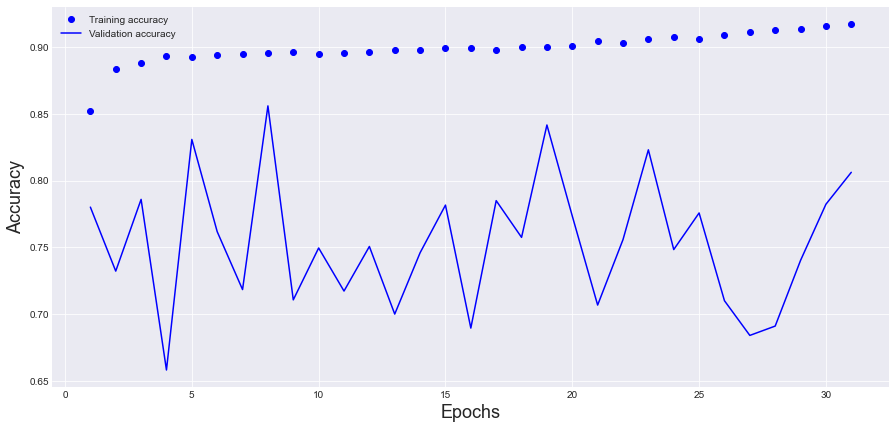

In [121]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['accuracy']

val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()

### Binary Crossentropy graphs during training 

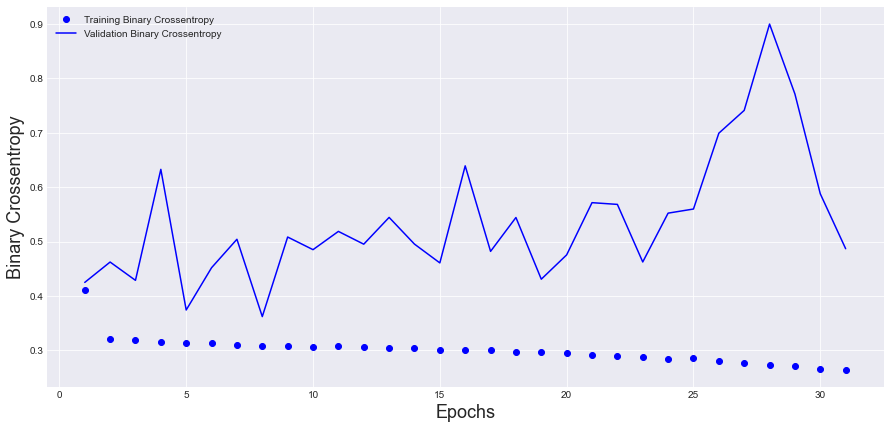

In [124]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['binary_crossentropy']

val_accuracy_values = history_dict['val_binary_crossentropy']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training Binary Crossentropy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Binary Crossentropy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Binary Crossentropy', size=18)
plt.legend()
plt.show()

### Evaluation and load the saved model

In [125]:
model = keras.models.load_model('model_trend-flat_cnn_Ker31_loss_Batch200_Epoch100_Pat30_loss-008_acc-0.85591_loss-0.36207.h5')


In [126]:
# Evaluate the quality of network training on test data (which the network did NOT see)
scores = model.evaluate(X_test, y_test, verbose=0)


In [127]:
scores

[0.3618125021457672,
 0.8457796573638916,
 0.9608363509178162,
 0.8730397820472717,
 0.3618125021457672]

In [128]:
print("Accuracy: %.3f%%" % (scores[1]*100))

Accuracy: 84.578%


In [129]:
print("Precision: %.3f%%" % (scores[2]*100))

Precision: 96.084%


In [130]:
print("Recall: %.3f%%" % (scores[3]*100))

Recall: 87.304%


In [147]:
import random

pred = model.predict(X_test)

# Check: we take a random element random.randint () and look: what is the difference between test and predict

n_rec = random.randint(0, X_test.shape[0])
print(n_rec)


print("Predicted probability:", pred[n_rec], ", right answer:", y_test[n_rec], ", error:", pred[n_rec]-y_test[n_rec])


328/328 [==============================] - 6s 20ms/step
9478
Predicted probability: [0.933724] , right answer: [1.] , error: [-0.06627601]


Right answer:  [0. 1.]
1/1 [==============================] - 0s 19ms/step


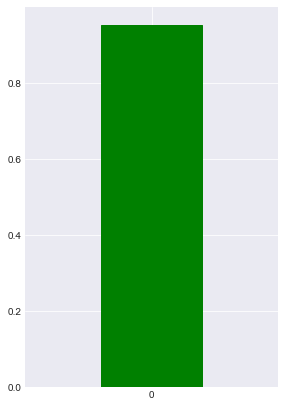

Predicted answer: 0 is Flat 
 
Right answer: 0 is Flat
['0 is Flat', '1 is Trend']


In [132]:
index = random.randint(0, Y_test.shape[0])
print('Right answer: ', Y_test[index])

x = X_test[index]
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
sample = x

ans = np.argmax(prediction)

fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(1), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(1))
ax.set_xlim([-1, 1])
ax.grid('on')

plt.show()
print('Predicted answer: {}'.format(classes[ans]), "\n ")
print('Right answer: {}'.format(classes[Y_test[index][0].astype(int)]) )
print(classes)